### Polymarket

In [1]:
%run eda_starter_template.py


[Memory] Initial memory usage: 187.70 MB

Loading Bitcoin data from C:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\data\Coin Metrics\coinmetrics_btc.csv...
[Memory] Before loading Bitcoin data: 187.70 MB
[Memory] After loading Bitcoin data: 190.20 MB (Δ 2.50 MB)
Error loading Bitcoin data: The system cannot find the file specified. (os error 2): ...esktop/cap/lse-bitcoin-analytics-capstone-template/data/Coin Metrics/coinmetrics_btc.csv (set POLARS_VERBOSE=1 to see full path)
Loading Polymarket data from C:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\data\Polymarket...
[Memory] Before loading Polymarket data: 190.21 MB
[Memory] After loading Polymarket data: 190.21 MB (Δ 0.00 MB)

[Memory] Final memory usage: 190.21 MB (Total Δ: 2.52 MB)

EDA Layout Complete. Check the 'plots' directory for visualizations.


In [7]:
import os
import shutil
from pathlib import Path

import gdown

# Configuration
# Main folder ID from: https://drive.google.com/drive/folders/1gizJ_n-QCnE8qrFM-BU3J_ZpaR3HCjn7
FOLDER_ID = "1gizJ_n-QCnE8qrFM-BU3J_ZpaR3HCjn7"
ALLOWED_EXTENSIONS = {".parquet", ".md", ".csv"}

# Determine project root and data directory dynamically
# If running from 'eda' folder, go up one level to project root
if Path.cwd().name == 'eda':
    PROJECT_ROOT = Path.cwd().parent
else:
    PROJECT_ROOT = Path.cwd()

DATA_DIR = PROJECT_ROOT / "data"


def download_data():
    """Downloads GDrive folder and organizes contents preserving subfolder structure."""
    print("--- Downloading Capstone Data ---")
    print(f"Current directory: {Path.cwd()}")
    print(f"Project root: {PROJECT_ROOT}")
    print(f"Data directory: {DATA_DIR}")

    # Create temporary directory for download
    tmp_dir = PROJECT_ROOT / "tmp_capstone_data"
    if tmp_dir.exists():
        shutil.rmtree(tmp_dir)
    tmp_dir.mkdir(parents=True)

    try:
        # Download folder content
        print("\nDownloading from GDrive...")
        try:
            gdown.download_folder(
                id=FOLDER_ID, output=str(tmp_dir), quiet=False, remaining_ok=True
            )
        except Exception as e:
            print(f"\nWarning: Download interrupted - {type(e).__name__}")
            print("Some files may have been downloaded before the error.")
            print("This is often due to Google Drive rate limiting.")
            print("Continuing with any successfully downloaded files...\n")

        # Create destination directory
        DATA_DIR.mkdir(parents=True, exist_ok=True)

        # Move allowed files preserving subfolder structure
        print("\nOrganizing files...")
        files_organized = 0
        for root, dirs, files in os.walk(tmp_dir):
            root_path = Path(root)
            for file in files:
                ext = Path(file).suffix.lower()
                if ext in ALLOWED_EXTENSIONS:
                    src_file = root_path / file
                    # Preserve relative path structure (e.g., Coin Metrics/file.csv)
                    rel_path = src_file.relative_to(tmp_dir)
                    dst_file = DATA_DIR / rel_path

                    # Create destination subdirectory if needed
                    dst_file.parent.mkdir(parents=True, exist_ok=True)

                    print(f"  Keeping: {rel_path}")
                    shutil.move(str(src_file), str(dst_file))
                    files_organized += 1
                else:
                    print(f"  Skipping: {file}")

        if files_organized == 0:
            print("\nNo files were downloaded. Google Drive may be rate limiting.")
            print("Try again later or download manually from:")
            print(f"  https://drive.google.com/drive/folders/{FOLDER_ID}")
        else:
            print(f"\nSuccessfully organized {files_organized} file(s).")
            print(f"Data saved to: {DATA_DIR}")

    finally:
        # Clean up temporary directory
        if tmp_dir.exists():
            shutil.rmtree(tmp_dir)
    print("\n--- Finished downloading ---")


def main():
    download_data()
    print("\nData download and organization complete.")


if __name__ == "__main__":
    main()

# Run the download
download_data()

--- Downloading Capstone Data ---
Current directory: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\eda
Project root: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template
Data directory: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\data



Retrieving folder contents


Retrieving folder 1mgd1yrowPdQ0JKtdnKBQYHpvcdyRlXcV Coin Metrics
Processing file 1IUADRKckAZVoFYIJjTt9f_la-CQmnXIN coinmetrics_btc.csv
Processing file 1KVBZIl45-DnY0EzbA6-qFZi7kvu1iH8H coinmetrics_spec.md
Retrieving folder 1f_RjuR2AVTpuJeX6jgeoKcspjUp9_lif Polymarket
Processing file 14v0AUTMO6GwQ4ItLNRI8EuxLXplvCoGt finance_politics_event_stats.parquet
Processing file 1oF4B2zvi21br9a6NFVTwjAB8mfNuLdYx finance_politics_markets.parquet
Processing file 1z4nfPZL04Rkhp82piCvqRFerKBQbrXCh finance_politics_odds_history.parquet
Processing file 1QrWoxsFnfxv7Qs1lR4j2wpTs20MqOLnk finance_politics_summary.parquet
Processing file 1K1DjGkN4fkDMRXqZekS_-vRn-WErRLsz finance_politics_tokens.parquet
Processing file 1GO00RPaS7Q2ncX0fcUHiBLyy4bZR4_Yt finance_politics_trades.parquet
Processing file 1SwimJ6dcwl8TWUR1qKWsC1pzXAb9RHTs polymarket_btc_analytics_schema.md


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1IUADRKckAZVoFYIJjTt9f_la-CQmnXIN
To: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\tmp_capstone_data\Coin Metrics\coinmetrics_btc.csv
100%|██████████| 2.42M/2.42M [00:00<00:00, 18.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KVBZIl45-DnY0EzbA6-qFZi7kvu1iH8H
To: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\tmp_capstone_data\Coin Metrics\coinmetrics_spec.md
100%|██████████| 4.85k/4.85k [00:00<?, ?B/s]
Downloading...
From: https://drive.google.com/uc?id=14v0AUTMO6GwQ4ItLNRI8EuxLXplvCoGt
To: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\tmp_capstone_data\Polymarket\finance_politics_event_stats.parquet
100%|██████████| 1.43M/1.43M [00:00<00:00, 15.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1oF4B2zvi21br9a


Organizing files...
  Keeping: Coin Metrics\coinmetrics_btc.csv
  Keeping: Coin Metrics\coinmetrics_spec.md
  Keeping: Polymarket\finance_politics_event_stats.parquet
  Keeping: Polymarket\finance_politics_markets.parquet
  Keeping: Polymarket\finance_politics_odds_history.parquet
  Keeping: Polymarket\finance_politics_summary.parquet
  Keeping: Polymarket\finance_politics_tokens.parquet
  Keeping: Polymarket\finance_politics_trades.parquet
  Keeping: Polymarket\polymarket_btc_analytics_schema.md

Successfully organized 9 file(s).
Data saved to: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\data

--- Finished downloading ---

Data download and organization complete.
--- Downloading Capstone Data ---
Current directory: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\eda
Project root: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template
Data directory: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analyti

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1IUADRKckAZVoFYIJjTt9f_la-CQmnXIN
To: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\tmp_capstone_data\Coin Metrics\coinmetrics_btc.csv
100%|██████████| 2.42M/2.42M [00:00<00:00, 18.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KVBZIl45-DnY0EzbA6-qFZi7kvu1iH8H
To: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\tmp_capstone_data\Coin Metrics\coinmetrics_spec.md
100%|██████████| 4.85k/4.85k [00:00<00:00, 299kB/s]
Downloading...
From: https://drive.google.com/uc?id=14v0AUTMO6GwQ4ItLNRI8EuxLXplvCoGt
To: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\tmp_capstone_data\Polymarket\finance_politics_event_stats.parquet
100%|██████████| 1.43M/1.43M [00:00<00:00, 17.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oF4B2zvi21br9a6NFV


Organizing files...
  Keeping: Coin Metrics\coinmetrics_btc.csv
  Keeping: Coin Metrics\coinmetrics_spec.md
  Keeping: Polymarket\finance_politics_event_stats.parquet
  Keeping: Polymarket\finance_politics_markets.parquet
  Keeping: Polymarket\finance_politics_odds_history.parquet
  Keeping: Polymarket\finance_politics_summary.parquet
  Keeping: Polymarket\finance_politics_tokens.parquet
  Keeping: Polymarket\finance_politics_trades.parquet
  Keeping: Polymarket\polymarket_btc_analytics_schema.md

Successfully organized 9 file(s).
Data saved to: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\data

--- Finished downloading ---


In [8]:
# ============================================
# DATA LOADING WITH RELATIVE PATHS
# ============================================

from pathlib import Path
import pandas as pd
import os

# Determine project root automatically
if Path.cwd().name == 'eda':
    PROJECT_ROOT = Path.cwd().parent
else:
    PROJECT_ROOT = Path.cwd()

# Define paths
COINMETRICS_PATH = PROJECT_ROOT / "data" / "Coin Metrics" / "coinmetrics_btc.csv"
POLYMARKET_DIR = PROJECT_ROOT / "data" / "Polymarket"

print(f"Project root: {PROJECT_ROOT}")
print(f"Bitcoin data: {COINMETRICS_PATH}")
print(f"Polymarket dir: {POLYMARKET_DIR}")

# Load Bitcoin data
print("\n" + "="*80)
print("Loading Bitcoin Data...")
print("="*80)
btc_df = pd.read_csv(COINMETRICS_PATH)
btc_df['time'] = pd.to_datetime(btc_df['time'])
print(f"✓ Loaded {len(btc_df):,} Bitcoin records")
print(f"  Date range: {btc_df['time'].min()} to {btc_df['time'].max()}")

# Load Polymarket data
print("\n" + "="*80)
print("Loading Polymarket Data...")
print("="*80)

poly_data = {}
polymarket_files = [
    ('markets', 'finance_politics_markets.parquet'),
    ('odds_history', 'finance_politics_odds_history.parquet'),
    ('summary', 'finance_politics_summary.parquet'),
    ('tokens', 'finance_politics_tokens.parquet'), 
    ('trades', 'finance_politics_trades.parquet'),
    ('event_stats', 'finance_politics_event_stats.parquet')
]

for name, filename in polymarket_files:
    filepath = POLYMARKET_DIR / filename
    try:
        poly_data[name] = pd.read_parquet(filepath)
        print(f"✓ {name:15s}: {len(poly_data[name]):,} rows")
    except Exception as e:
        print(f"⚠ {name:15s}: skipped ({e})")

# Quick check: Crypto category markets
if 'markets' in poly_data and 'category' in poly_data['markets'].columns:
    crypto_markets = poly_data['markets'][poly_data['markets']['category'] == 'Crypto']
    print(f"\n✓ Found {len(crypto_markets)} Crypto category markets")

print("\n" + "="*80)
print("DATA LOADING COMPLETE")
print("="*80)

Project root: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template
Bitcoin data: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\data\Coin Metrics\coinmetrics_btc.csv
Polymarket dir: c:\Users\Melis\OneDrive\Desktop\cap\lse-bitcoin-analytics-capstone-template\data\Polymarket

Loading Bitcoin Data...
✓ Loaded 6,221 Bitcoin records
  Date range: 2009-01-03 00:00:00 to 2026-01-14 00:00:00

Loading Polymarket Data...
✓ markets        : 78,321 rows
✓ odds_history   : 2,143,181 rows
✓ summary        : 78,321 rows
✓ tokens         : 156,636 rows
✓ trades         : 27,013,724 rows
✓ event_stats    : 44,033 rows

✓ Found 340 Crypto category markets

DATA LOADING COMPLETE


In [32]:
poly_data

{'markets':       market_id                                           question  \
 0        242851  Will Bongbong Marcos be elected President of t...   
 1        242873  Will Sarah Palin win Alaska's special election...   
 2        242918  Will US student loan payments resume by Electi...   
 3        243183       Will $ETH be above $3,000 on April 20, 2022?   
 4        243192  Will Brian Kemp win the Republican nomination ...   
 ...         ...                                                ...   
 78316    242646  Will the total value locked (TVL) in DeFi be $...   
 78317    242686  2022 Hungarian elections: Will Fidesz win at l...   
 78318    242687  Will the price of wheat close above $1050 on A...   
 78319    242688  Will the Progressive Conservative Party win a ...   
 78320    242690  Will Joe Biden's FiveThirtyEight approval rati...   
 
                                                     slug  \
 0      will-bongbong-marcos-be-elected-president-of-t...   
 1      will-

In [33]:
btc_df

shape: (6_221, 32)
┌────────────┬───────────┬───────────┬────────────┬───┬────────────┬────────┬──────────┬───────────┐
│ time       ┆ AdrActCnt ┆ AdrBalCnt ┆ AssetCompl ┆ … ┆ SplyExpFut ┆ TxCnt  ┆ TxTfrCnt ┆ volume_re │
│ ---        ┆ ---       ┆ ---       ┆ etionTime  ┆   ┆ 10yr       ┆ ---    ┆ ---      ┆ ported_sp │
│ datetime[μ ┆ i64       ┆ i64       ┆ ---        ┆   ┆ ---        ┆ i64    ┆ i64      ┆ ot_usd_1d │
│ s]         ┆           ┆           ┆ i64        ┆   ┆ f64        ┆        ┆          ┆ ---       │
│            ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆ f64       │
╞════════════╪═══════════╪═══════════╪════════════╪═══╪════════════╪════════╪══════════╪═══════════╡
│ 2009-01-03 ┆ 0         ┆ 0         ┆ 1614334883 ┆ … ┆ null       ┆ 0      ┆ 0        ┆ null      │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
│ 2009-01-04 ┆ 0         ┆ 0         ┆ 1614334883 ┆ … ┆ null       ┆ 0      ┆ 0        ┆ null      │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
│ 2009-01-05 ┆ 0         ┆ 0         ┆ 1614334883 ┆ … ┆ null       ┆ 0      ┆ 0        ┆ null      │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
│ 2009-01-06 ┆ 0         ┆ 0         ┆ 1614334884 ┆ … ┆ null       ┆ 0      ┆ 0        ┆ null      │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
│ 2009-01-07 ┆ 0         ┆ 0         ┆ 1614334885 ┆ … ┆ null       ┆ 0      ┆ 0        ┆ null      │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
│ …          ┆ …         ┆ …         ┆ …          ┆ … ┆ …          ┆ …      ┆ …        ┆ …         │
│ 2026-01-10 ┆ 608784    ┆ 55908713  ┆ 1768101454 ┆ … ┆ 2.0826e7   ┆ 492984 ┆ 1049925  ┆ 2.9985e9  │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
│ 2026-01-11 ┆ 536405    ┆ 55924280  ┆ 1768186822 ┆ … ┆ 2.0826e7   ┆ 289219 ┆ 572262   ┆ 4.3998e9  │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
│ 2026-01-12 ┆ 638422    ┆ 55917951  ┆ 1768275291 ┆ … ┆ 2.0826e7   ┆ 405384 ┆ 845895   ┆ 1.3448e10 │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
│ 2026-01-13 ┆ 701272    ┆ 55891967  ┆ 1768359739 ┆ … ┆ 2.0826e7   ┆ 340763 ┆ 731900   ┆ 1.8053e10 │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
│ 2026-01-14 ┆ null      ┆ null      ┆ null       ┆ … ┆ null       ┆ null   ┆ null     ┆ null      │
│ 00:00:00   ┆           ┆           ┆            ┆   ┆            ┆        ┆          ┆           │
└────────────┴───────────┴───────────┴────────────┴───┴────────────┴────────┴──────────┴───────────┘

In [34]:
category = poly_data['markets'].groupby('category')
print(category.groups.keys())
category.size()

dict_keys(['', 'Business', 'Coronavirus', 'Coronavirus-', 'Crypto', 'Global Politics', 'Politics', 'Pop-Culture ', 'Tech', 'US-current-affairs', 'Ukraine & Russia'])


category
                      77516
Business                113
Coronavirus               3
Coronavirus-              1
Crypto                  340
Global Politics          56
Politics                  1
Pop-Culture               4
Tech                      2
US-current-affairs      265
Ukraine & Russia         20
dtype: int64

In [35]:
# 1. Define your keyword map
keyword_map = {
    'Crypto': 'bitcoin|eth|solana|crypto|token|airdrop',
    'Politics': 'trump|biden|harris|election|senate|republican|democrat',
    'Ukraine & Russia': 'ukraine|russia|putin|zelensky|kremlin',
    'Pop-Culture': 'oscars|grammy|taylor swift|box office|celebrity',
    'Tech': 'ai|openai|gpt|google|nvidia|meta|apple',
    'Global Politics': 'israel|gaza|iran|china|taiwan|uk|london'
}

# 2. Filter for only the rows where category is blank
blank_mask = (poly_data['markets']['category'] == '') | (poly_data['markets']['category'].isna())

# 3. Loop through the map and update blank categories based on question text
for cat, keywords in keyword_map.items():
    # Only update if the row is currently blank AND the question contains a keyword
    match_mask = blank_mask & poly_data['markets']['question'].str.contains(keywords, case=False, na=False)
    poly_data['markets'].loc[match_mask, 'category'] = cat

# 4. See how many are left blank now
print(poly_data['markets']['category'].value_counts())

category
Crypto                57852
Politics              10909
                       7421
Tech                    766
Global Politics         694
Ukraine & Russia        293
US-current-affairs      265
Business                113
Pop-Culture               4
Coronavirus               3
Coronavirus-              1
Name: count, dtype: int64


                              COMPREHENSIVE EDA ANALYSIS
                         Polymarket 'Rest' Categories Analysis

📊 STEP 1: Data Preparation
----------------------------------------------------------------------------------------------------
✓ Total markets: 78,321
✓ Markets with trade data: 78,321

🎯 STEP 2: Category Filtering
----------------------------------------------------------------------------------------------------
✓ Filtered markets: 22,378 (28.6%)
✓ Unique categories: 7
✓ Total volume: $2,677,346,966.52

📈 STEP 3: Statistical Analysis
----------------------------------------------------------------------------------------------------

📌 Overall Metrics:
  Total Volume: $2,677,346,966.52
  Average Volume per Market: $119,641.92
  Median Volume per Market: $3,586.61
  Total Trades: 4,489,603
  Markets with Activity: 9,930

📌 Top 10 Categories:
   1.                               : $2,670,914,739 (22242 markets)
   2. Business                      : $   4,064,191 ( 11

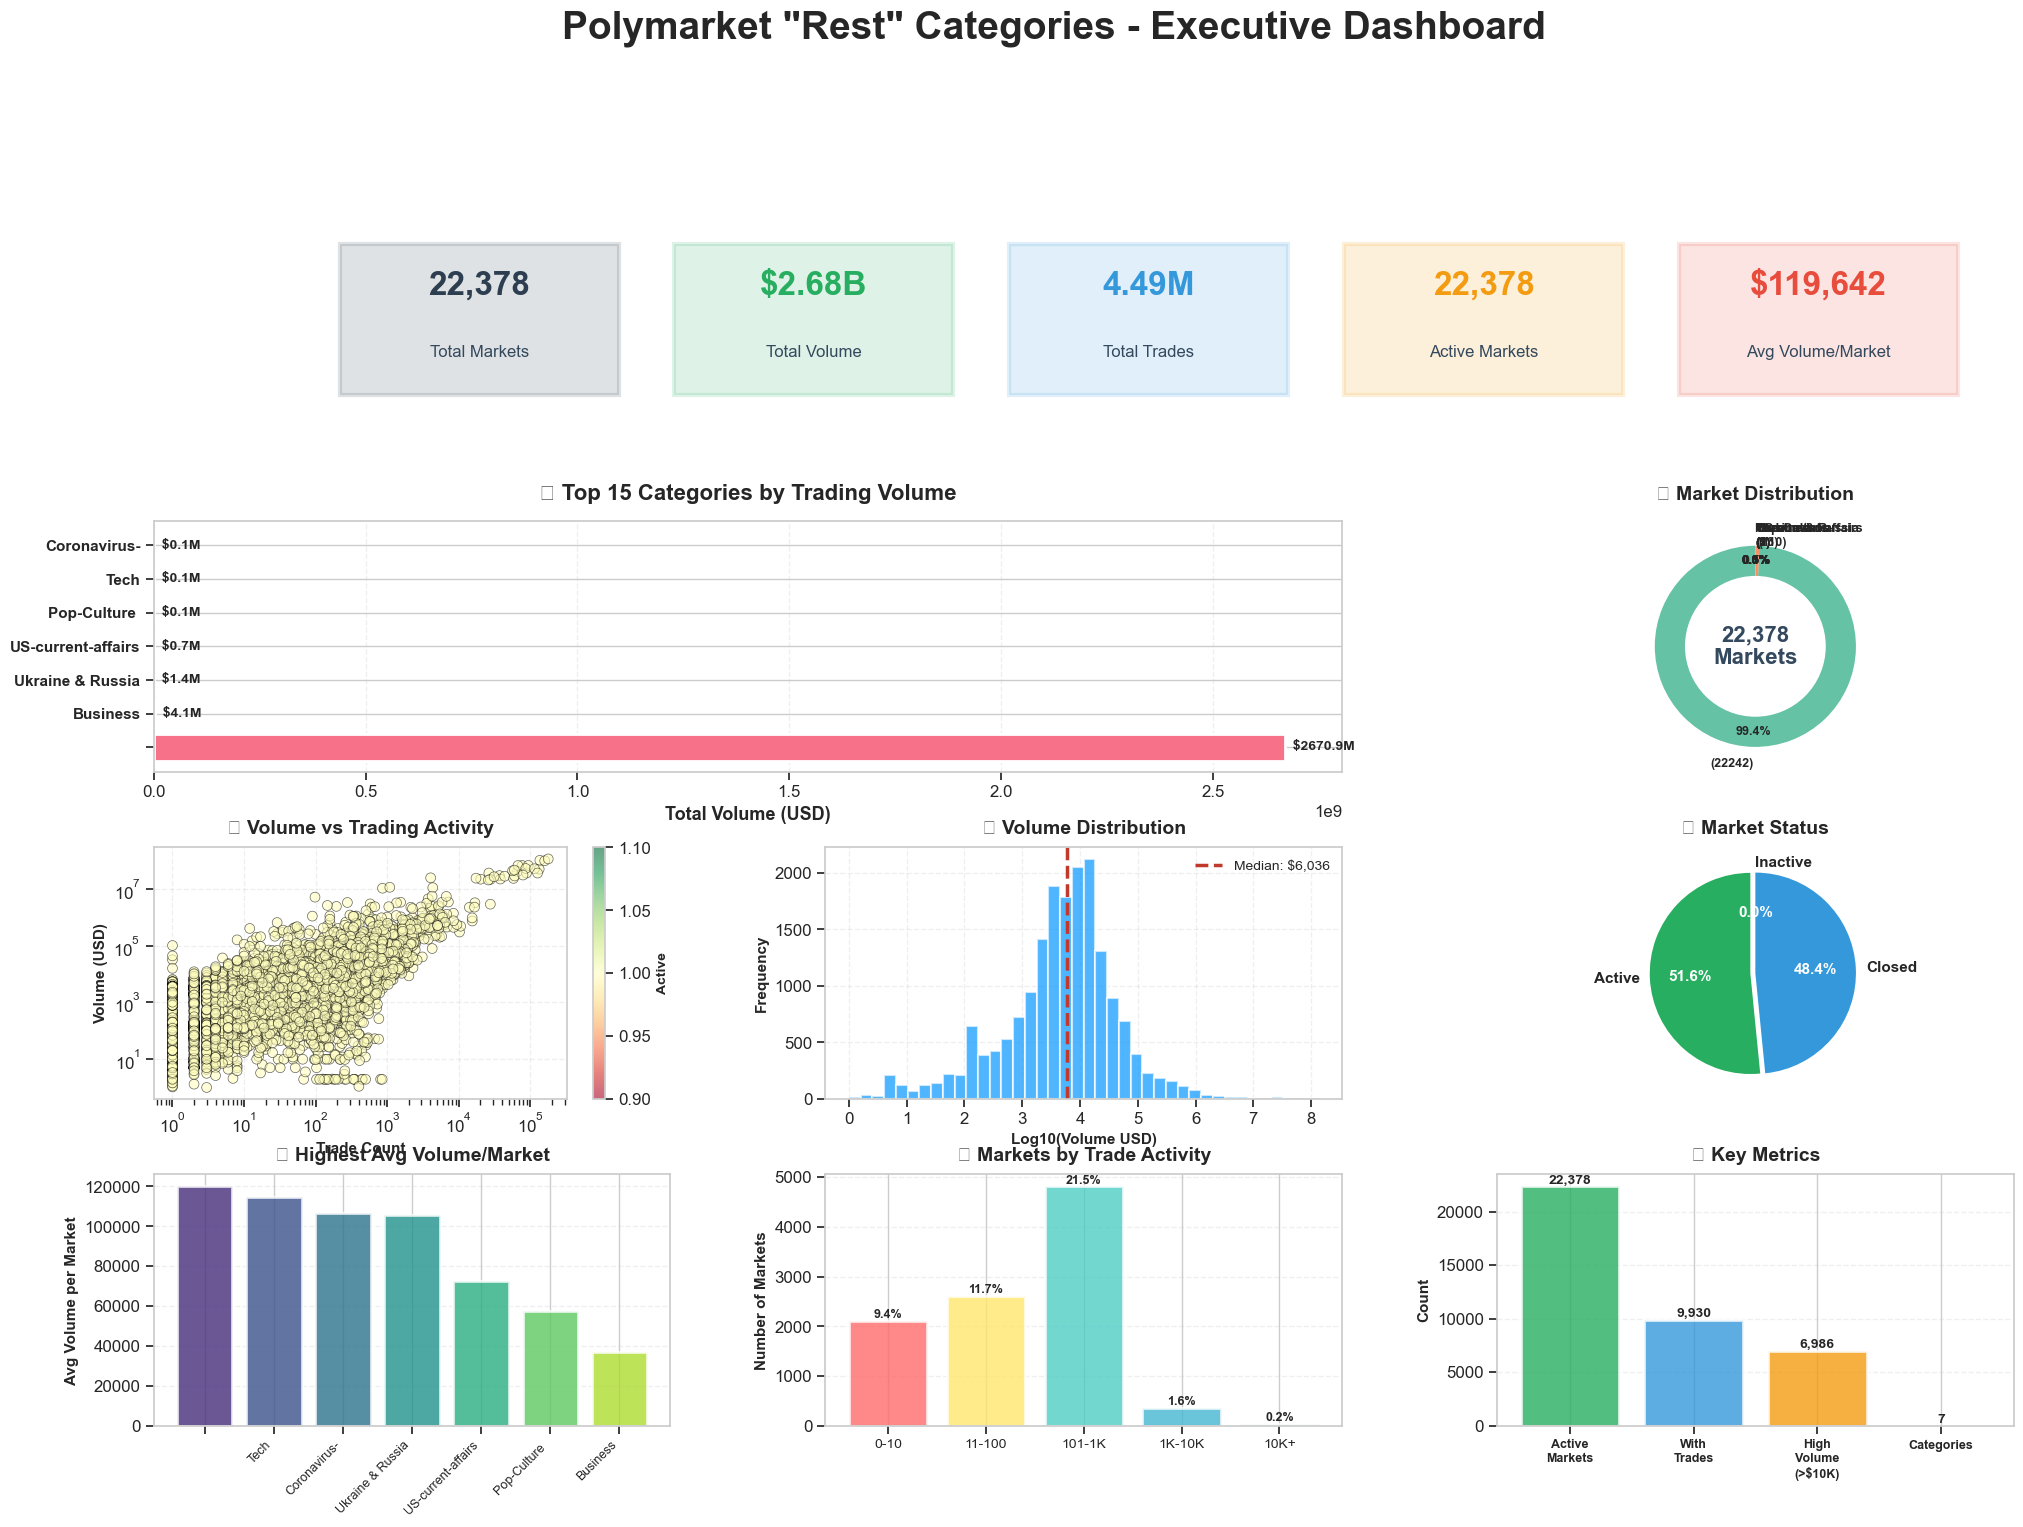

✓ [2/5] Saved: rest_detailed_category_analysis.png


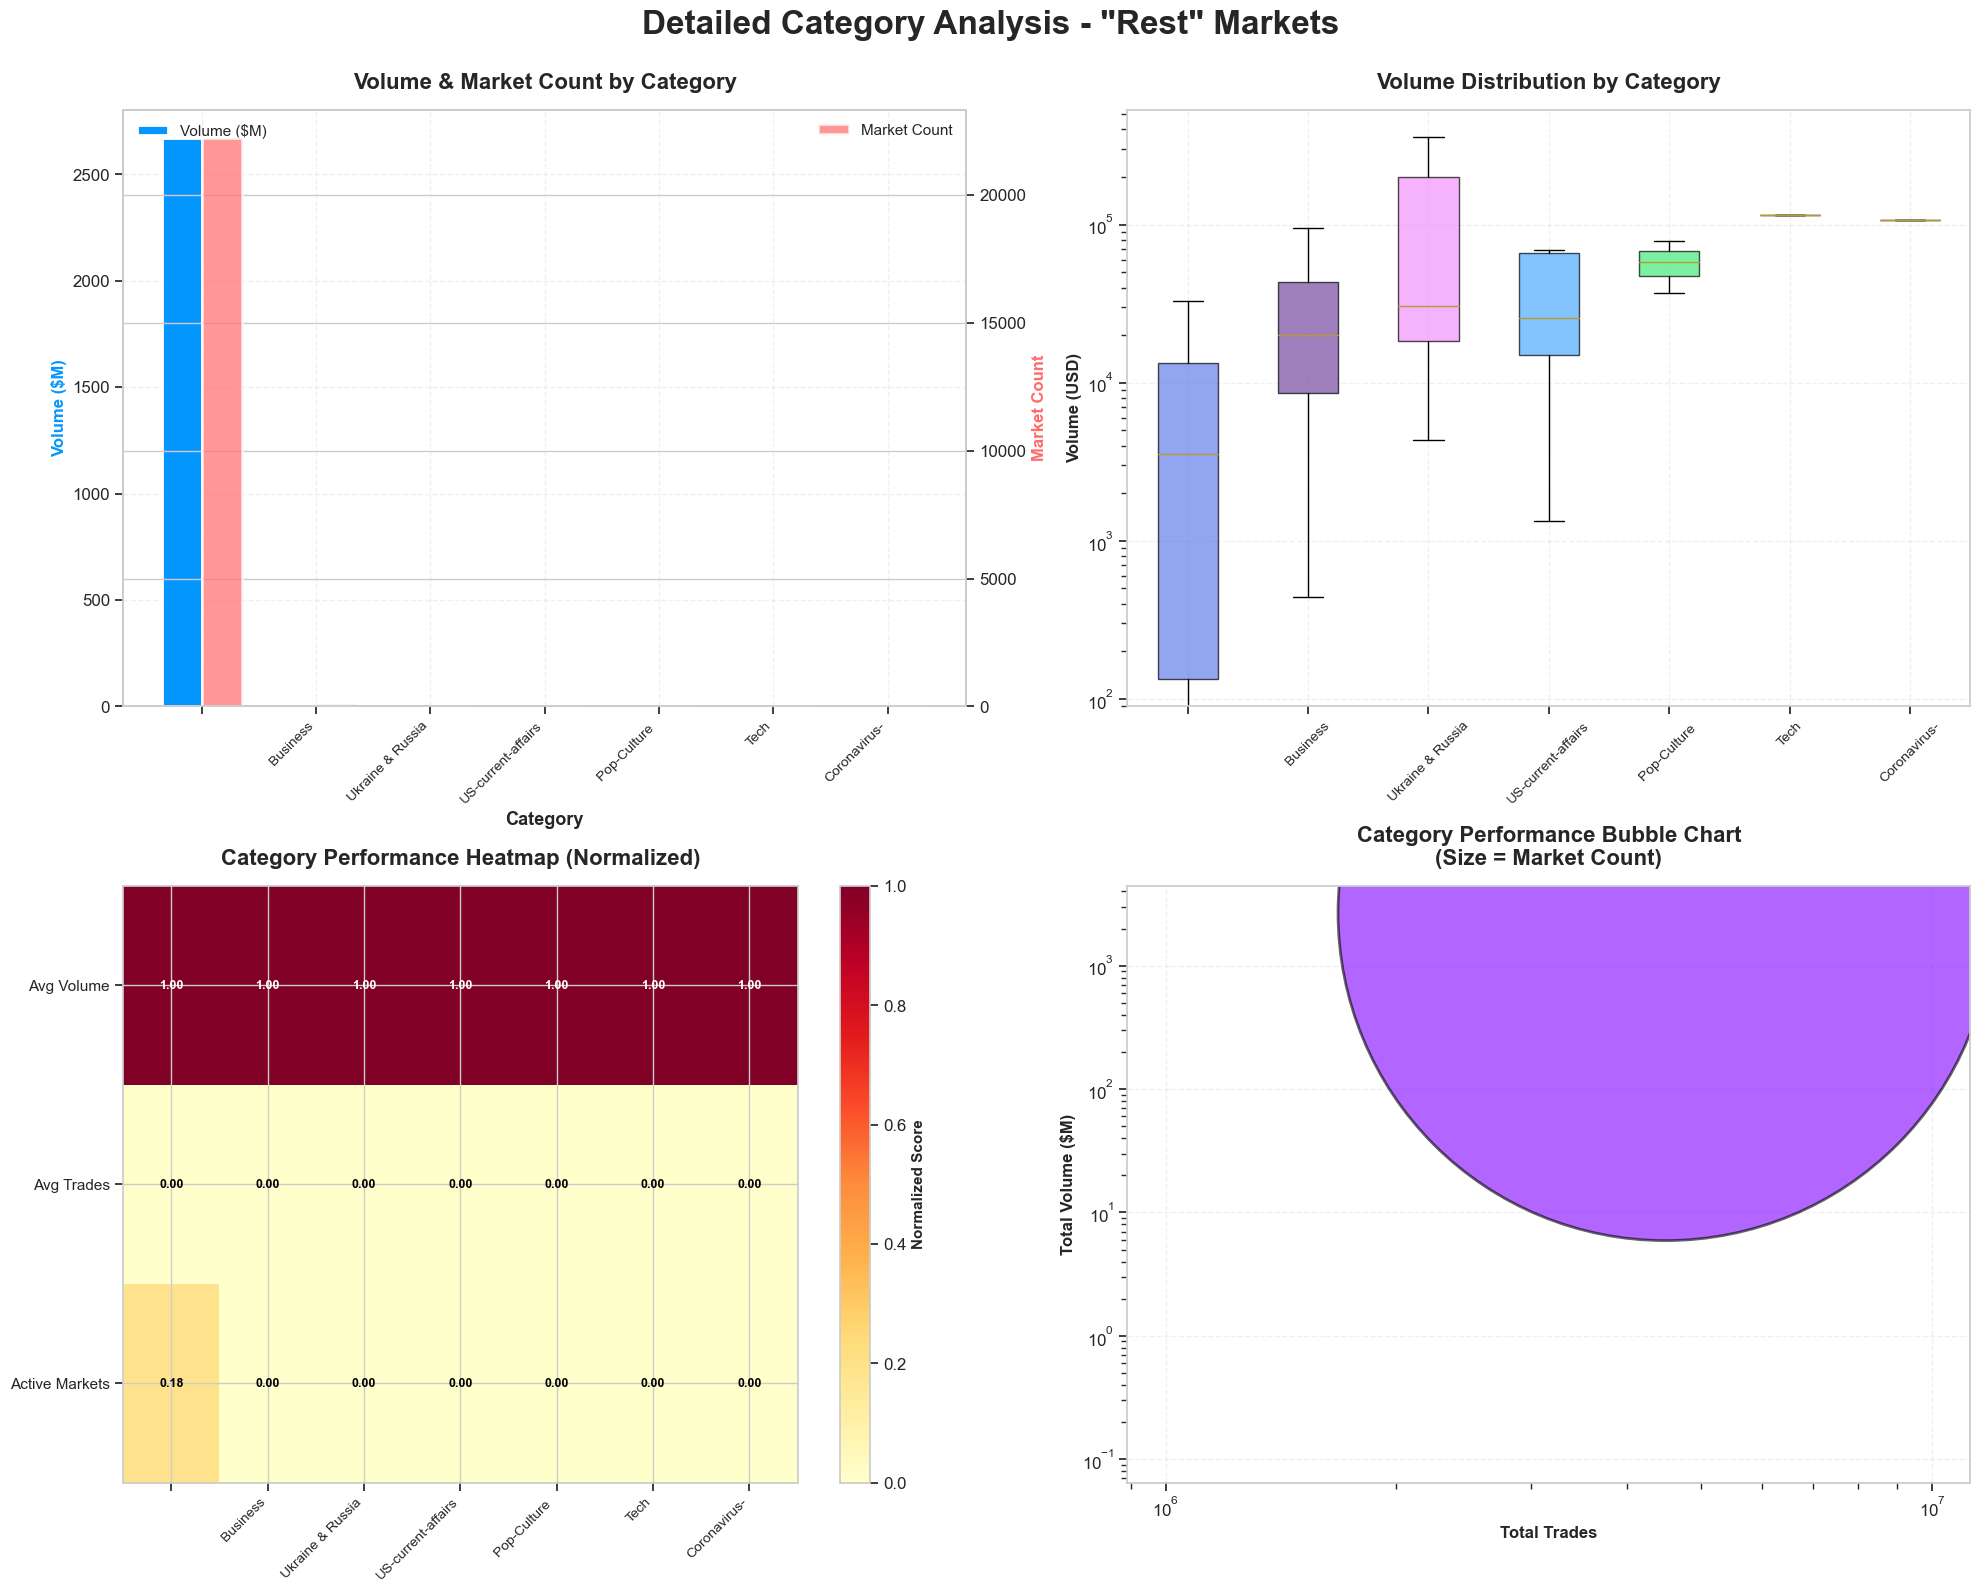

✓ [3/5] Saved: rest_statistical_analysis.png


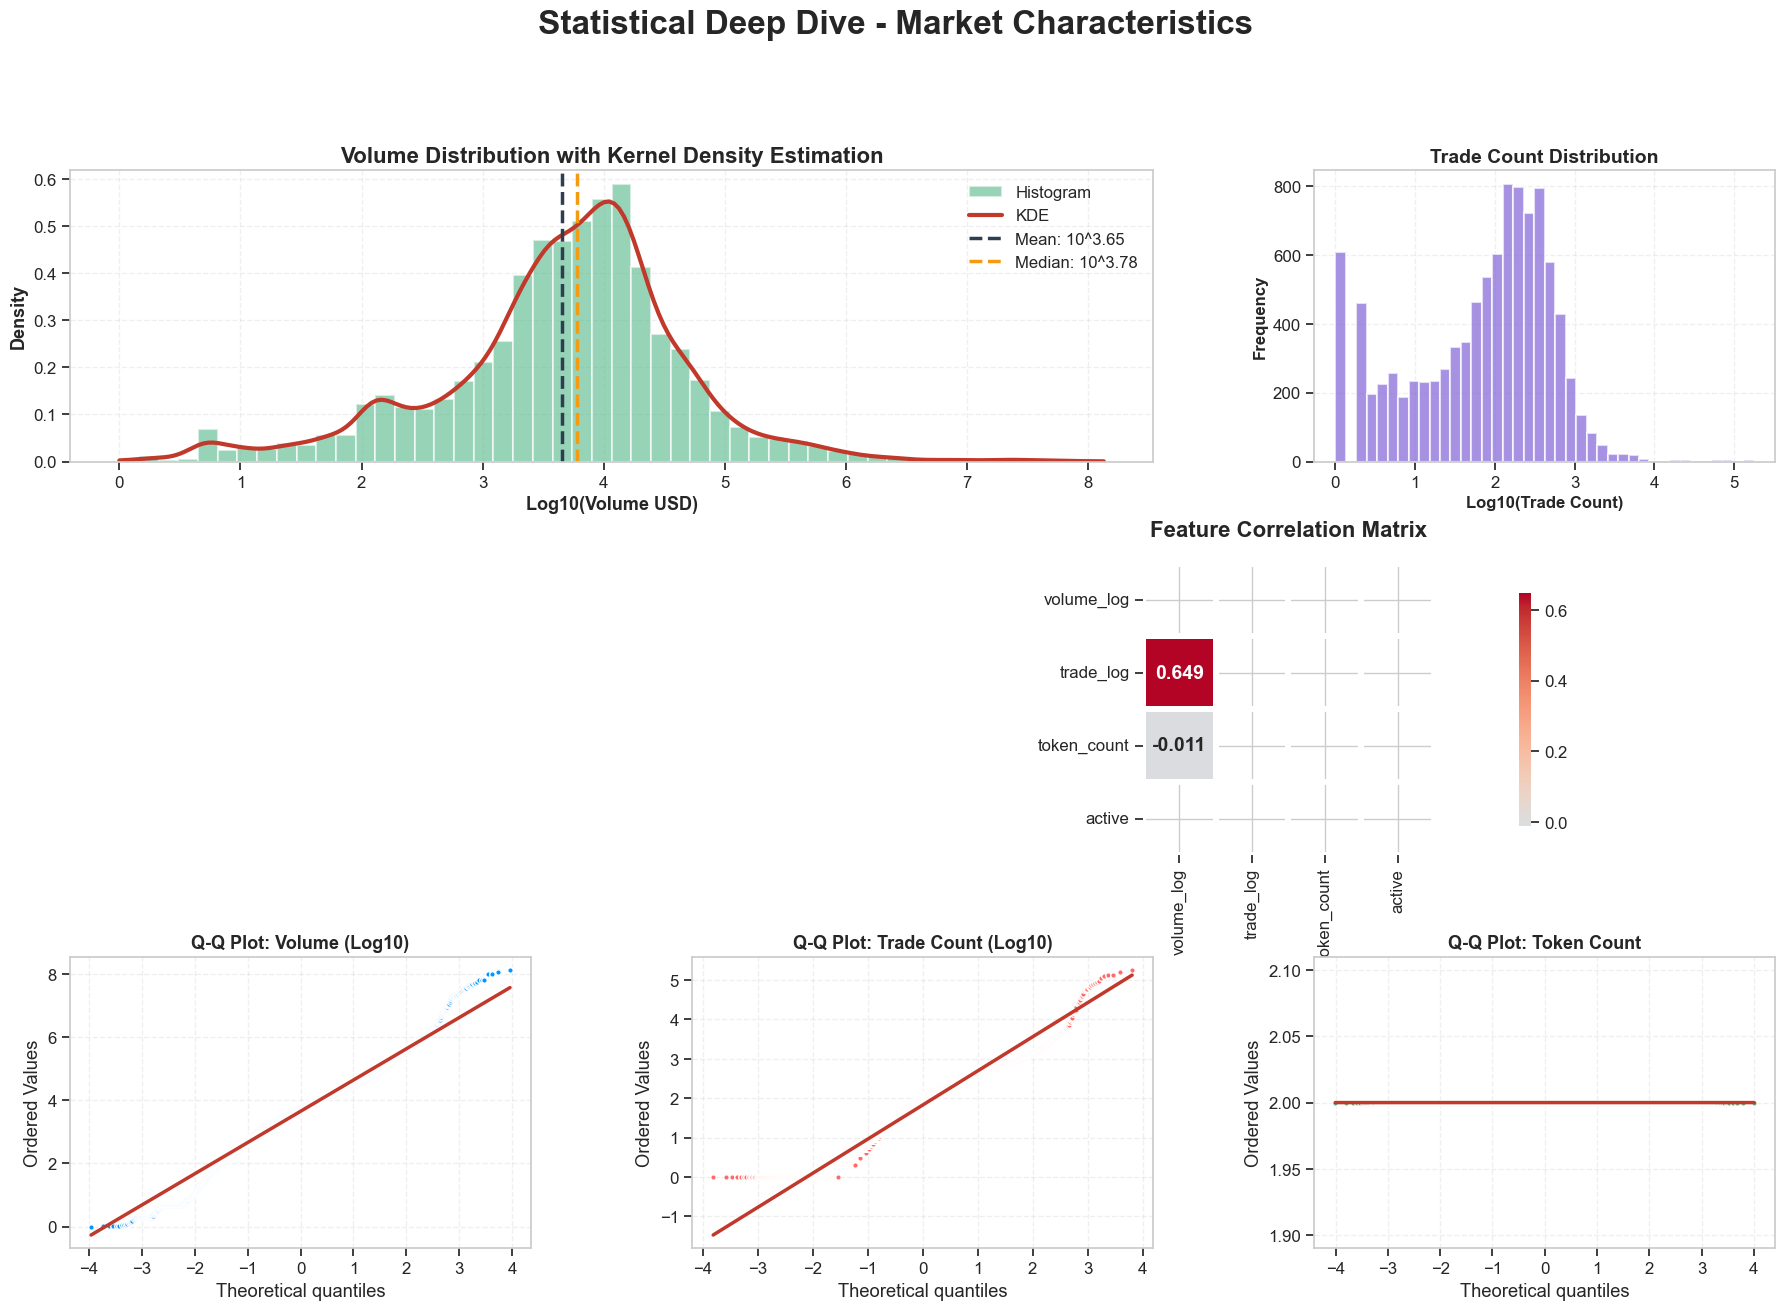

✓ [4/5] Saved: rest_comparative_analysis.png


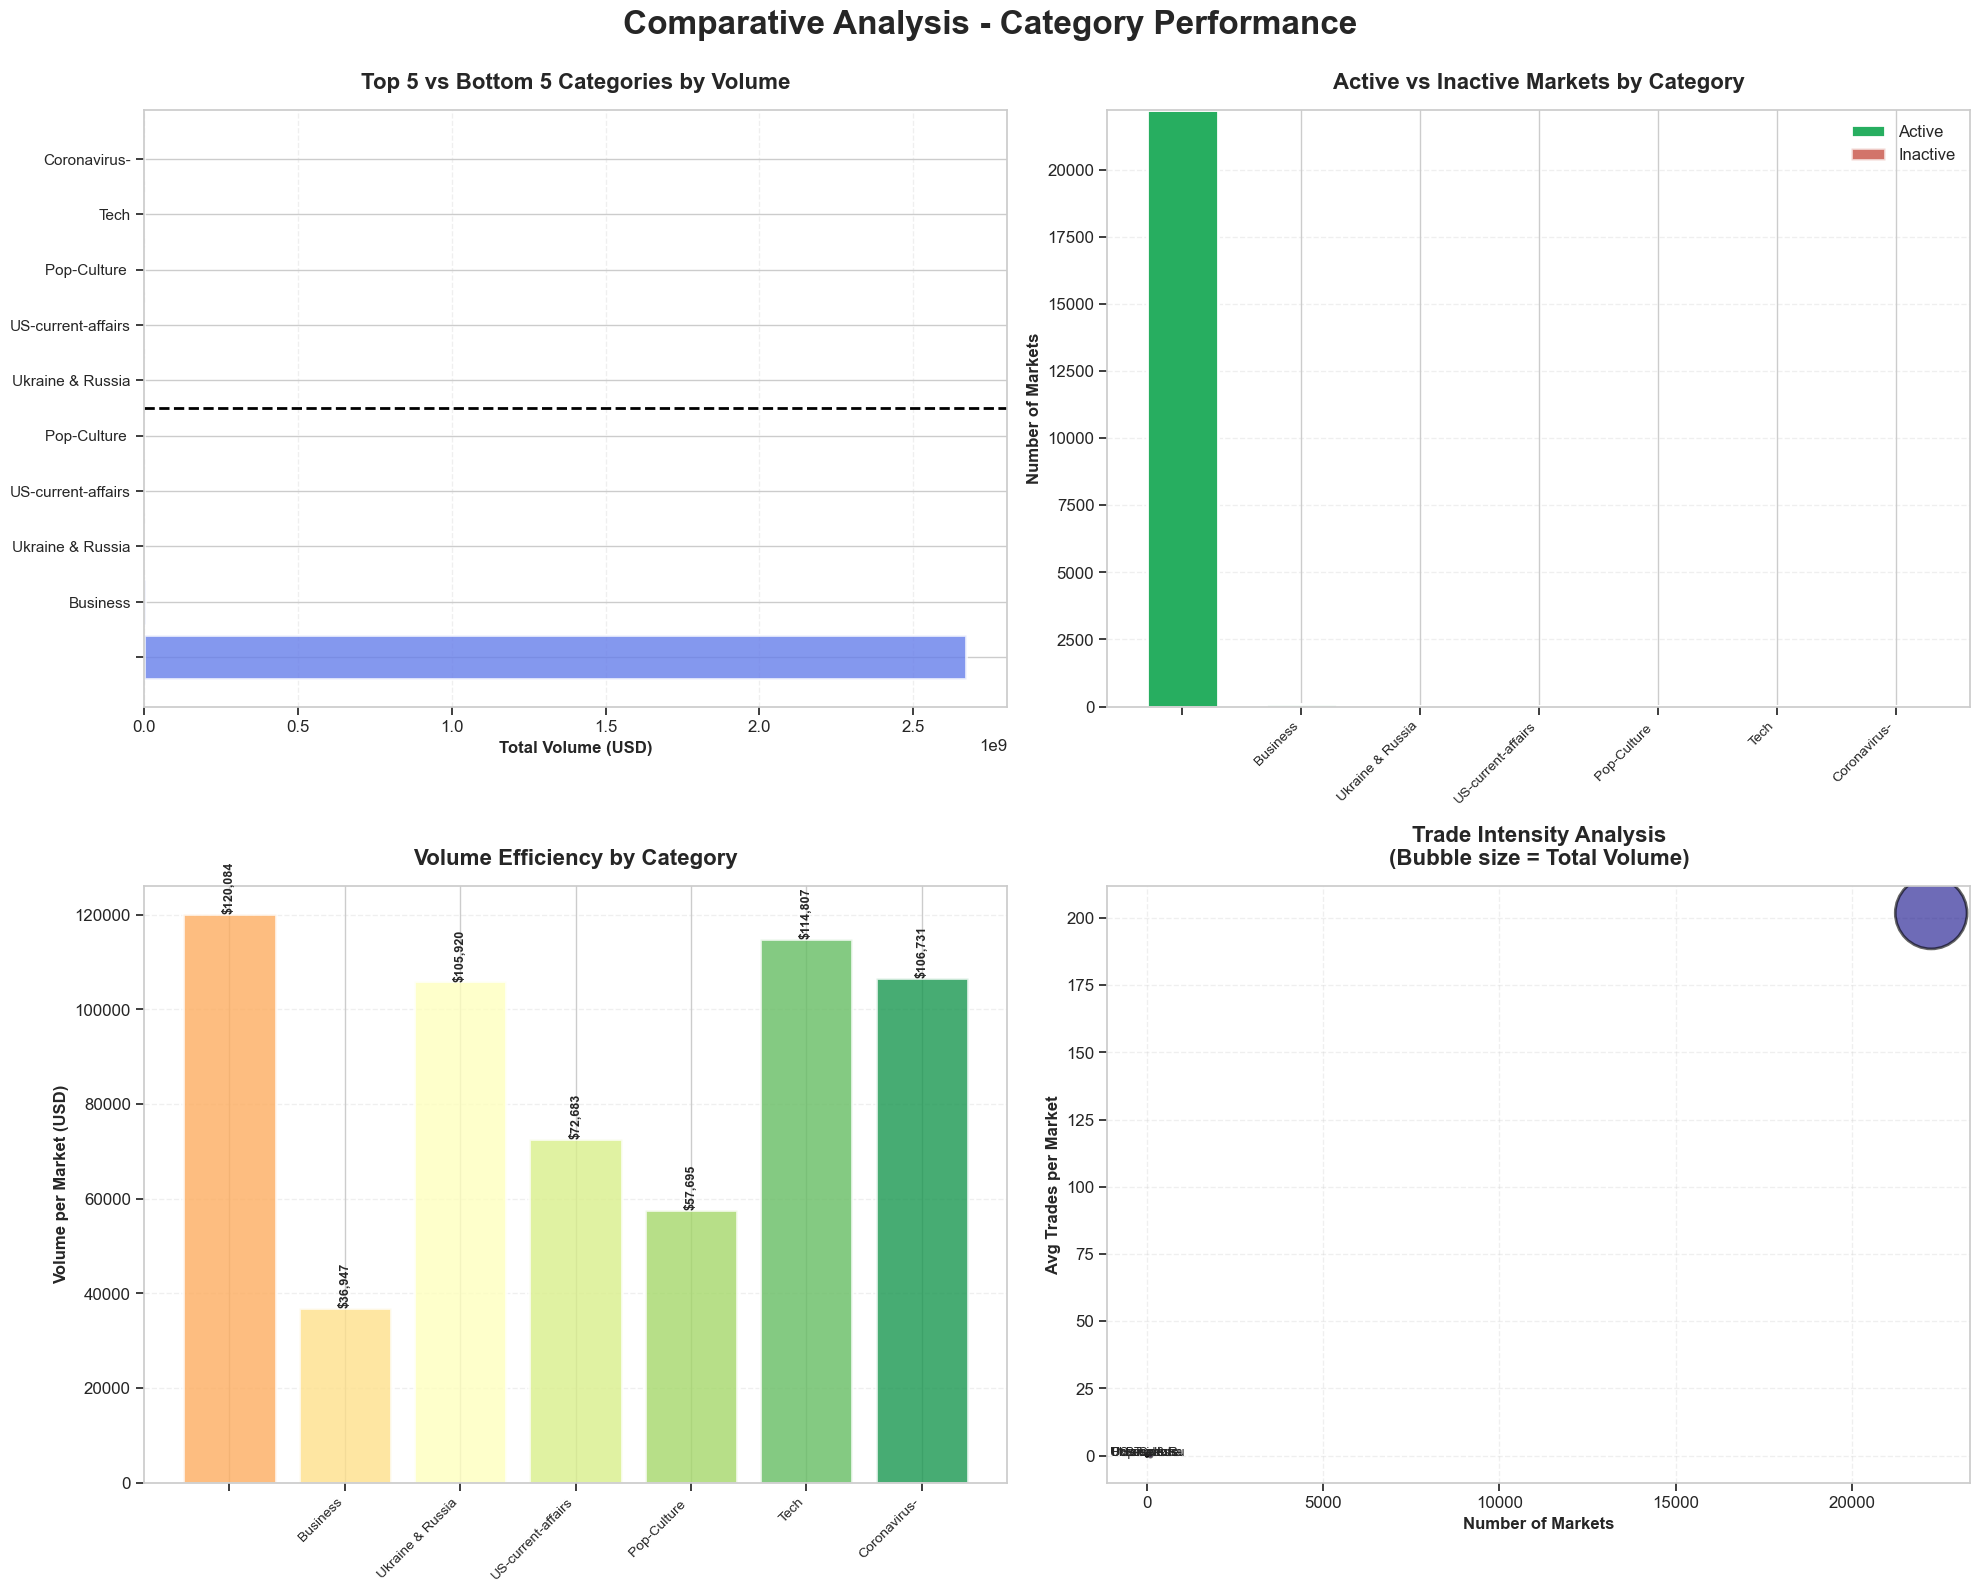

✓ [5/5] Saved: rest_summary_infographic.png


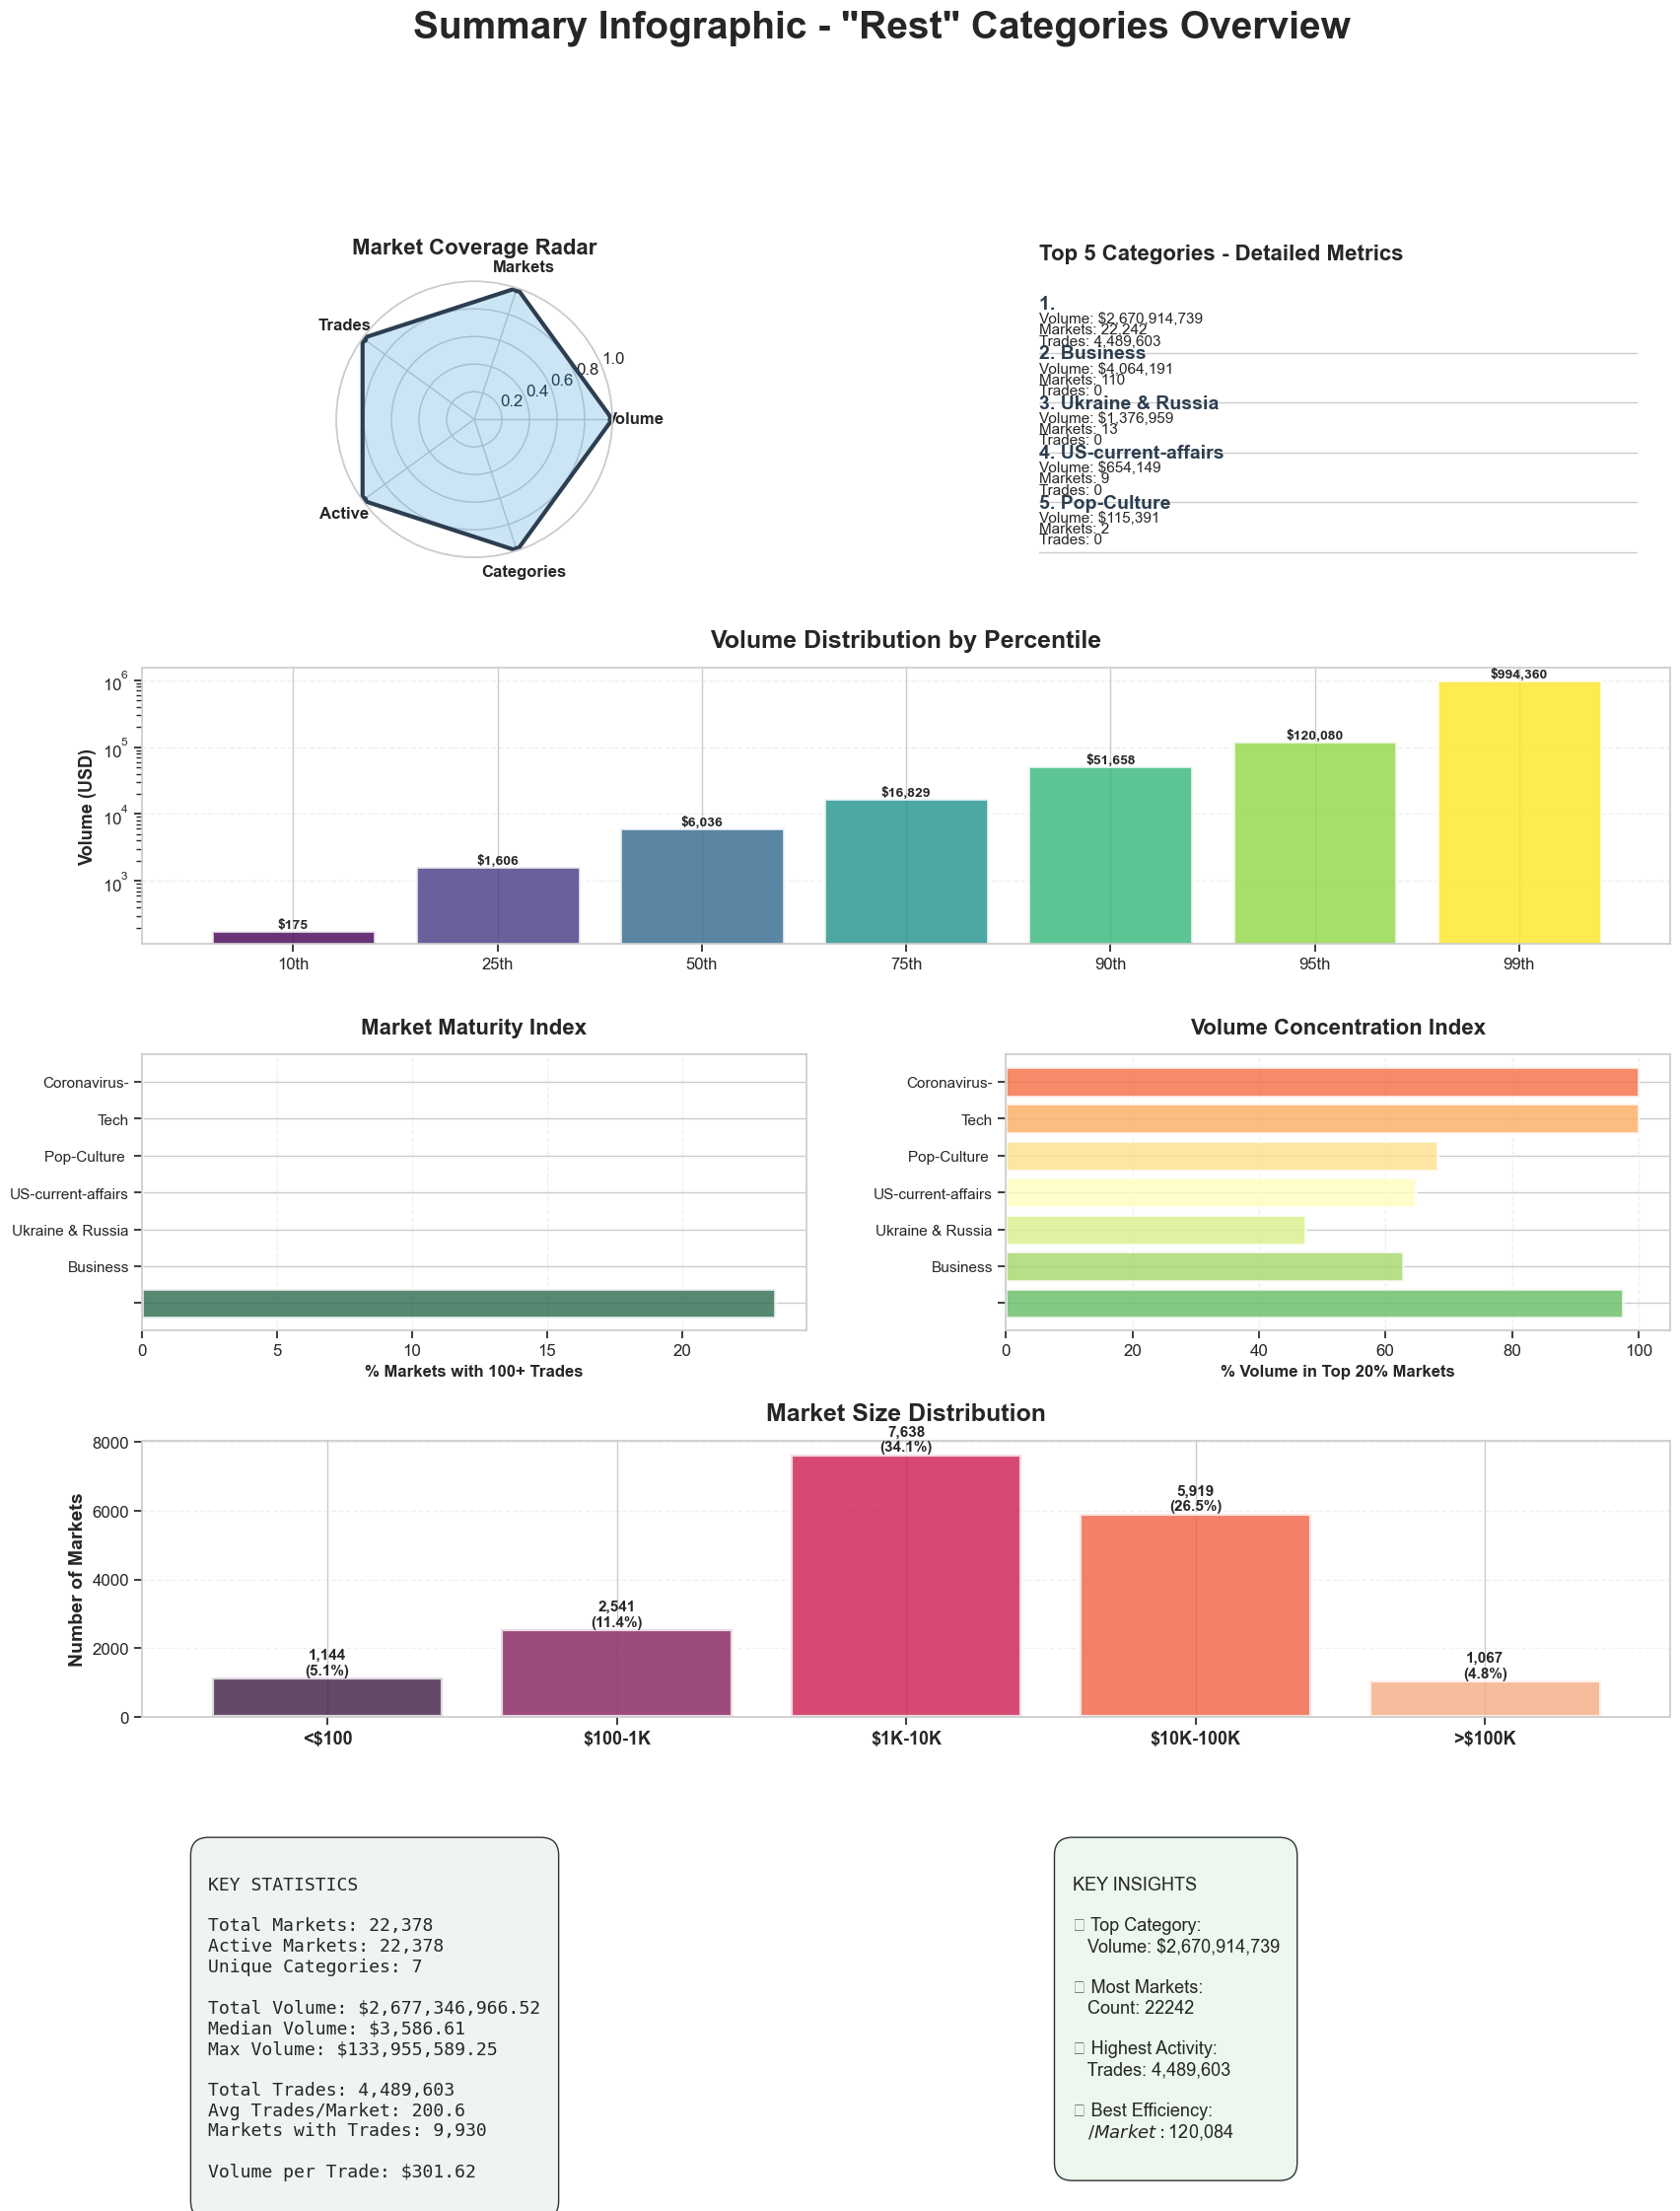


                                   ANALYSIS COMPLETE

📊 Dataset Summary:
   Total 'Rest' Markets: 22,378
   Active Markets: 22,378 (100.0%)
   Total Volume: $2,677,346,966.52
   Total Trades: 4,489,603
   Unique Categories: 7

🎯 Top 3 Categories:
   1. 
      Volume: $2,670,914,739
      Markets: 22,242
      Trades: 4,489,603
   2. Business
      Volume: $4,064,191
      Markets: 110
      Trades: 0
   3. Ukraine & Russia
      Volume: $1,376,959
      Markets: 13
      Trades: 0

📁 Generated Visualizations:
   ✓ rest_executive_dashboard.png
   ✓ rest_detailed_category_analysis.png
   ✓ rest_statistical_analysis.png
   ✓ rest_comparative_analysis.png
   ✓ rest_summary_infographic.png

                              🎉 EDA COMPLETE - 5 COMPREHENSIVE VISUALIZATIONS CREATED


In [24]:
"""
COMPREHENSIVE EDA FOR "REST" CATEGORIES
Advanced Analysis with Unique Visualizations
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Professional styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

# Premium color palettes
COLORS = {
    'primary': '#2C3E50',
    'secondary': '#E74C3C',
    'accent': '#F39C12',
    'success': '#27AE60',
    'info': '#3498DB',
    'warning': '#E67E22',
    'danger': '#C0392B',
    'dark': '#34495E',
    'light': '#ECF0F1',
}

PALETTES = {
    'sunset': ['#FF6B6B', '#FFE66D', '#4ECDC4', '#45B7D1', '#96CEB4'],
    'ocean': ['#006BA6', '#0496FF', '#FFBC42', '#D81159', '#8F2D56'],
    'forest': ['#2D6A4F', '#40916C', '#52B788', '#74C69D', '#95D5B2'],
    'royal': ['#2E294E', '#541388', '#8062D6', '#9288F8', '#C0B9DD'],
    'vibrant': ['#667EEA', '#764BA2', '#F093FB', '#4FACFE', '#43E97B'],
    'professional': ['#2E4057', '#048A81', '#F77F00', '#EF476F', '#06FFA5']
}

PLOTS_DIR = Path('plots')
PLOTS_DIR.mkdir(exist_ok=True)

print("="*100)
print(" "*30 + "COMPREHENSIVE EDA ANALYSIS")
print(" "*25 + "Polymarket 'Rest' Categories Analysis")
print("="*100)

# ============================================
# DATA PREPARATION
# ============================================

print("\n📊 STEP 1: Data Preparation")
print("-"*100)

markets_df = poly_data['markets'].copy()
summary_df = poly_data['summary'].copy()

# Merge for complete data
markets_full = markets_df.merge(
    summary_df[['market_id', 'trade_count', 'token_count']],
    on='market_id',
    how='left',
    suffixes=('', '_summary')
)

print(f"✓ Total markets: {len(markets_full):,}")
print(f"✓ Markets with trade data: {markets_full['trade_count'].notna().sum():,}")

# ============================================
# CATEGORY FILTERING
# ============================================

print("\n🎯 STEP 2: Category Filtering")
print("-"*100)

EXCLUDE_PATTERNS = [
    'crypto', 'bitcoin', 'btc', 'ethereum', 'eth', 'blockchain', 'defi', 'nft',
    'politics', 'election', 'president', 'congress', 'senate', 
    'democrat', 'republican', 'trump', 'biden', 'harris', 'governor',
    'campaign', 'vote', 'ballot', 'legislative'
]

def is_rest_category(row):
    text = f"{str(row.get('question', ''))} {str(row.get('category', ''))}".lower()
    return not any(pattern in text for pattern in EXCLUDE_PATTERNS)

markets_full['is_rest'] = markets_full.apply(is_rest_category, axis=1)
markets_rest = markets_full[markets_full['is_rest']].copy()

print(f"✓ Filtered markets: {len(markets_rest):,} ({len(markets_rest)/len(markets_full)*100:.1f}%)")
print(f"✓ Unique categories: {markets_rest['category'].nunique()}")
print(f"✓ Total volume: ${markets_rest['volume'].sum():,.2f}")

# Calculate additional metrics
markets_rest['volume_per_trade'] = markets_rest['volume'] / markets_rest['trade_count'].replace(0, np.nan)
markets_rest['has_trades'] = markets_rest['trade_count'] > 0

# ============================================
# COMPREHENSIVE STATISTICS
# ============================================

print("\n📈 STEP 3: Statistical Analysis")
print("-"*100)

# Overall statistics
print("\n📌 Overall Metrics:")
print(f"  Total Volume: ${markets_rest['volume'].sum():,.2f}")
print(f"  Average Volume per Market: ${markets_rest['volume'].mean():,.2f}")
print(f"  Median Volume per Market: ${markets_rest['volume'].median():,.2f}")
print(f"  Total Trades: {markets_rest['trade_count'].sum():,.0f}")
print(f"  Markets with Activity: {markets_rest['has_trades'].sum():,}")

# Category statistics
category_stats = (
    markets_rest.groupby('category')
    .agg({
        'market_id': 'count',
        'volume': ['sum', 'mean', 'median', 'std'],
        'trade_count': ['sum', 'mean'],
        'active': 'sum'
    })
)
category_stats.columns = ['_'.join(col).strip() for col in category_stats.columns]
category_stats = category_stats.sort_values('volume_sum', ascending=False)

print(f"\n📌 Top 10 Categories:")
for idx, (cat, row) in enumerate(category_stats.head(10).iterrows(), 1):
    print(f"  {idx:2d}. {cat:30s}: ${row['volume_sum']:12,.0f} ({int(row['market_id_count']):4d} markets)")

# ============================================
# VISUALIZATION 1: EXECUTIVE DASHBOARD
# ============================================

print("\n🎨 Creating Visualizations...")
print("-"*100)

fig = plt.figure(figsize=(24, 16))
gs = GridSpec(4, 3, figure=fig, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('Polymarket "Rest" Categories - Executive Dashboard', 
             fontsize=28, fontweight='bold', y=0.995)

# KPI Cards
ax_kpi = fig.add_subplot(gs[0, :])
ax_kpi.axis('off')

kpis = [
    ('Total Markets', f"{len(markets_rest):,}", COLORS['primary']),
    ('Total Volume', f"${markets_rest['volume'].sum()/1e9:.2f}B", COLORS['success']),
    ('Total Trades', f"{markets_rest['trade_count'].sum()/1e6:.2f}M", COLORS['info']),
    ('Active Markets', f"{markets_rest['active'].sum():,}", COLORS['accent']),
    ('Avg Volume/Market', f"${markets_rest['volume'].mean():,.0f}", COLORS['secondary']),
]

for i, (label, value, color) in enumerate(kpis):
    x = 0.1 + i * 0.18
    # Card background
    rect = Rectangle((x, 0.2), 0.15, 0.6, transform=ax_kpi.transAxes,
                     facecolor=color, alpha=0.15, edgecolor=color, linewidth=3)
    ax_kpi.add_patch(rect)
    # Value
    ax_kpi.text(x + 0.075, 0.6, value, transform=ax_kpi.transAxes,
               fontsize=24, fontweight='bold', ha='center', color=color)
    # Label
    ax_kpi.text(x + 0.075, 0.35, label, transform=ax_kpi.transAxes,
               fontsize=12, ha='center', color=COLORS['dark'])

# 1. Volume Distribution by Category (Treemap-style)
ax1 = fig.add_subplot(gs[1, :2])
top_15 = category_stats.head(15).reset_index()
colors_tree = sns.color_palette('husl', len(top_15))
y_pos = np.arange(len(top_15))
bars = ax1.barh(y_pos, top_15['volume_sum'], color=colors_tree, edgecolor='white', linewidth=2)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top_15['category'], fontsize=11, fontweight='bold')
ax1.set_xlabel('Total Volume (USD)', fontsize=13, fontweight='bold')
ax1.set_title('📊 Top 15 Categories by Trading Volume', fontsize=16, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_15['volume_sum'])):
    ax1.text(val, i, f'  ${val/1e6:.1f}M', va='center', fontsize=10, fontweight='bold')

# 2. Market Count Distribution (Donut)
ax2 = fig.add_subplot(gs[1, 2])
top_8 = category_stats.head(8).reset_index()
sizes = top_8['market_id_count']
labels = [f"{cat}\n({int(count)})" for cat, count in zip(top_8['category'], sizes)]
colors_donut = sns.color_palette('Set2', len(sizes))
wedges, texts, autotexts = ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
                                     colors=colors_donut, startangle=90,
                                     textprops={'fontsize': 9, 'weight': 'bold'},
                                     pctdistance=0.85)
# Donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(centre_circle)
ax2.text(0, 0, f'{len(markets_rest):,}\nMarkets', ha='center', va='center',
         fontsize=16, fontweight='bold', color=COLORS['dark'])
ax2.set_title('📈 Market Distribution', fontsize=14, fontweight='bold', pad=15)

# 3. Volume vs Trade Count Scatter
ax3 = fig.add_subplot(gs[2, 0])
scatter_data = markets_rest[markets_rest['trade_count'] > 0].copy()
scatter = ax3.scatter(scatter_data['trade_count'], scatter_data['volume'],
                     c=scatter_data['active'], cmap='RdYlGn', s=50, alpha=0.6,
                     edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Trade Count', fontsize=11, fontweight='bold')
ax3.set_ylabel('Volume (USD)', fontsize=11, fontweight='bold')
ax3.set_title('💹 Volume vs Trading Activity', fontsize=14, fontweight='bold', pad=10)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3, linestyle='--')
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Active', fontsize=10, fontweight='bold')

# 4. Volume Distribution Histogram
ax4 = fig.add_subplot(gs[2, 1])
volume_data = markets_rest[markets_rest['volume'] > 0]['volume']
ax4.hist(np.log10(volume_data), bins=40, color=PALETTES['ocean'][1], 
        alpha=0.7, edgecolor='white', linewidth=1.5)
ax4.axvline(np.log10(volume_data.median()), color=COLORS['danger'], 
           linestyle='--', linewidth=2.5, label=f'Median: ${volume_data.median():,.0f}')
ax4.set_xlabel('Log10(Volume USD)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('📉 Volume Distribution', fontsize=14, fontweight='bold', pad=10)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, linestyle='--')

# 5. Market Status Breakdown
ax5 = fig.add_subplot(gs[2, 2])
status_data = {
    'Active': int(markets_rest['active'].sum()),
    'Closed': int((markets_rest['closed'] == True).sum()) if 'closed' in markets_rest.columns else 0,
    'Inactive': int(len(markets_rest) - markets_rest['active'].sum())
}
status_colors = [COLORS['success'], COLORS['info'], COLORS['danger']]
wedges, texts, autotexts = ax5.pie(status_data.values(), labels=status_data.keys(),
                                     autopct='%1.1f%%', colors=status_colors,
                                     explode=(0.05, 0, 0), startangle=90,
                                     textprops={'fontsize': 11, 'weight': 'bold'})
for autotext in autotexts:
    autotext.set_color('white')
ax5.set_title('⚡ Market Status', fontsize=14, fontweight='bold', pad=10)

# 6. Average Volume per Category (Top 10)
ax6 = fig.add_subplot(gs[3, 0])
top_avg = category_stats.nlargest(10, 'volume_mean').reset_index()
colors_avg = sns.color_palette('viridis', len(top_avg))
bars = ax6.bar(range(len(top_avg)), top_avg['volume_mean'], color=colors_avg,
              edgecolor='white', linewidth=2, alpha=0.8)
ax6.set_xticks(range(len(top_avg)))
ax6.set_xticklabels(top_avg['category'], rotation=45, ha='right', fontsize=9)
ax6.set_ylabel('Avg Volume per Market', fontsize=11, fontweight='bold')
ax6.set_title('💰 Highest Avg Volume/Market', fontsize=14, fontweight='bold', pad=10)
ax6.grid(axis='y', alpha=0.3, linestyle='--')

# 7. Trade Activity Distribution
ax7 = fig.add_subplot(gs[3, 1])
trade_bins = [0, 10, 100, 1000, 10000, np.inf]
trade_labels = ['0-10', '11-100', '101-1K', '1K-10K', '10K+']
markets_rest['trade_bin'] = pd.cut(markets_rest['trade_count'], bins=trade_bins, labels=trade_labels)
trade_dist = markets_rest['trade_bin'].value_counts().sort_index()
colors_trade = PALETTES['sunset']
bars = ax7.bar(range(len(trade_dist)), trade_dist.values, color=colors_trade,
              edgecolor='white', linewidth=2, alpha=0.8)
ax7.set_xticks(range(len(trade_dist)))
ax7.set_xticklabels(trade_labels, fontsize=10)
ax7.set_ylabel('Number of Markets', fontsize=11, fontweight='bold')
ax7.set_title('📊 Markets by Trade Activity', fontsize=14, fontweight='bold', pad=10)
ax7.grid(axis='y', alpha=0.3, linestyle='--')
# Add percentage labels
for i, (bar, val) in enumerate(zip(bars, trade_dist.values)):
    pct = val / len(markets_rest) * 100
    ax7.text(i, val, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 8. Category Diversity Metrics
ax8 = fig.add_subplot(gs[3, 2])
diversity_metrics = {
    'Active\nMarkets': int(markets_rest['active'].sum()),
    'With\nTrades': int(markets_rest['has_trades'].sum()),
    'High\nVolume\n(>$10K)': int((markets_rest['volume'] > 10000).sum()),
    'Categories': int(markets_rest['category'].nunique())
}
x_pos = np.arange(len(diversity_metrics))
values = list(diversity_metrics.values())
colors_div = [COLORS['success'], COLORS['info'], COLORS['accent'], COLORS['primary']]
bars = ax8.bar(x_pos, values, color=colors_div, edgecolor='white', linewidth=2, alpha=0.8)
ax8.set_xticks(x_pos)
ax8.set_xticklabels(diversity_metrics.keys(), fontsize=9, fontweight='bold')
ax8.set_ylabel('Count', fontsize=11, fontweight='bold')
ax8.set_title('🎯 Key Metrics', fontsize=14, fontweight='bold', pad=10)
ax8.grid(axis='y', alpha=0.3, linestyle='--')
# Add value labels
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.savefig(PLOTS_DIR / 'rest_executive_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ [1/5] Saved: rest_executive_dashboard.png")
plt.show()

# ============================================
# VISUALIZATION 2: DETAILED CATEGORY ANALYSIS
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Detailed Category Analysis - "Rest" Markets', fontsize=24, fontweight='bold', y=0.995)

# 1. Stacked bar: Volume + Market Count
ax1 = axes[0, 0]
top_12 = category_stats.head(12).reset_index()
x = np.arange(len(top_12))
width = 0.35
bars1 = ax1.bar(x - width/2, top_12['volume_sum']/1e6, width, label='Volume ($M)',
               color=PALETTES['ocean'][1], edgecolor='white', linewidth=2)
ax2_twin = ax1.twinx()
bars2 = ax2_twin.bar(x + width/2, top_12['market_id_count'], width, label='Market Count',
                     color=PALETTES['sunset'][0], edgecolor='white', linewidth=2, alpha=0.7)
ax1.set_xlabel('Category', fontsize=13, fontweight='bold')
ax1.set_ylabel('Volume ($M)', fontsize=12, fontweight='bold', color=PALETTES['ocean'][1])
ax2_twin.set_ylabel('Market Count', fontsize=12, fontweight='bold', color=PALETTES['sunset'][0])
ax1.set_xticks(x)
ax1.set_xticklabels(top_12['category'], rotation=45, ha='right', fontsize=10)
ax1.set_title('Volume & Market Count by Category', fontsize=16, fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=11)
ax2_twin.legend(loc='upper right', fontsize=11)
ax1.grid(True, alpha=0.3, linestyle='--')

# 2. Box plot: Volume distribution by top categories
ax2 = axes[0, 1]
top_8_cats = category_stats.head(8).index.tolist()
volume_by_cat = [markets_rest[markets_rest['category'] == cat]['volume'].values 
                 for cat in top_8_cats]
bp = ax2.boxplot(volume_by_cat, labels=top_8_cats, patch_artist=True, showfliers=False)
for patch, color in zip(bp['boxes'], PALETTES['vibrant']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.set_ylabel('Volume (USD)', fontsize=12, fontweight='bold')
ax2.set_title('Volume Distribution by Category', fontsize=16, fontweight='bold', pad=15)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, linestyle='--')

# 3. Heatmap: Category metrics
ax3 = axes[1, 0]
top_10_heat = category_stats.head(10).reset_index()
heatmap_data = top_10_heat[['volume_mean', 'trade_count_mean', 'active_sum']].T
heatmap_data_norm = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
im = ax3.imshow(heatmap_data_norm, cmap='YlOrRd', aspect='auto')
ax3.set_xticks(np.arange(len(top_10_heat)))
ax3.set_xticklabels(top_10_heat['category'], rotation=45, ha='right', fontsize=10)
ax3.set_yticks(np.arange(3))
ax3.set_yticklabels(['Avg Volume', 'Avg Trades', 'Active Markets'], fontsize=11)
ax3.set_title('Category Performance Heatmap (Normalized)', fontsize=16, fontweight='bold', pad=15)
# Add text annotations
for i in range(3):
    for j in range(len(top_10_heat)):
        text = ax3.text(j, i, f'{heatmap_data_norm.iloc[i, j]:.2f}',
                       ha="center", va="center", color="white" if heatmap_data_norm.iloc[i, j] > 0.5 else "black",
                       fontsize=9, fontweight='bold')
cbar = plt.colorbar(im, ax=ax3)
cbar.set_label('Normalized Score', fontsize=11, fontweight='bold')

# 4. Bubble chart: Volume vs Trades vs Markets
ax4 = axes[1, 1]
bubble_data = category_stats.head(15).reset_index()
scatter = ax4.scatter(bubble_data['trade_count_sum'], bubble_data['volume_sum']/1e6,
                     s=bubble_data['market_id_count']*10, 
                     c=np.arange(len(bubble_data)), cmap='rainbow',
                     alpha=0.6, edgecolors='black', linewidth=2)
for idx, row in bubble_data.iterrows():
    ax4.annotate(row['category'][:15], 
                (row['trade_count_sum'], row['volume_sum']/1e6),
                fontsize=8, ha='center')
ax4.set_xlabel('Total Trades', fontsize=12, fontweight='bold')
ax4.set_ylabel('Total Volume ($M)', fontsize=12, fontweight='bold')
ax4.set_title('Category Performance Bubble Chart\n(Size = Market Count)', 
             fontsize=16, fontweight='bold', pad=15)
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'rest_detailed_category_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ [2/5] Saved: rest_detailed_category_analysis.png")
plt.show()

# ============================================
# VISUALIZATION 3: STATISTICAL DEEP DIVE
# ============================================

fig = plt.figure(figsize=(22, 14))
gs = GridSpec(3, 3, figure=fig, hspace=0.35, wspace=0.35)
fig.suptitle('Statistical Deep Dive - Market Characteristics', fontsize=24, fontweight='bold', y=0.995)

# 1. Volume distribution with KDE
ax1 = fig.add_subplot(gs[0, :2])
volume_positive = markets_rest[markets_rest['volume'] > 0]['volume']
log_volume = np.log10(volume_positive)
ax1.hist(log_volume, bins=50, color=PALETTES['forest'][2], alpha=0.6, 
        edgecolor='white', linewidth=1.5, density=True, label='Histogram')
from scipy import stats
kde = stats.gaussian_kde(log_volume)
x_range = np.linspace(log_volume.min(), log_volume.max(), 200)
ax1.plot(x_range, kde(x_range), color=COLORS['danger'], linewidth=3, label='KDE')
ax1.axvline(log_volume.mean(), color=COLORS['primary'], linestyle='--', linewidth=2.5, 
           label=f'Mean: 10^{log_volume.mean():.2f}')
ax1.axvline(log_volume.median(), color=COLORS['accent'], linestyle='--', linewidth=2.5,
           label=f'Median: 10^{log_volume.median():.2f}')
ax1.set_xlabel('Log10(Volume USD)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Density', fontsize=13, fontweight='bold')
ax1.set_title('Volume Distribution with Kernel Density Estimation', fontsize=16, fontweight='bold')
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3, linestyle='--')

# 2. Trade count distribution
ax2 = fig.add_subplot(gs[0, 2])
trade_positive = markets_rest[markets_rest['trade_count'] > 0]['trade_count']
ax2.hist(np.log10(trade_positive), bins=40, color=PALETTES['royal'][2], 
        alpha=0.7, edgecolor='white', linewidth=1.5)
ax2.set_xlabel('Log10(Trade Count)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Trade Count Distribution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')

# 3. Correlation matrix
ax3 = fig.add_subplot(gs[1, :])
corr_data = markets_rest[['volume', 'trade_count', 'token_count', 'active']].copy()
corr_data['volume_log'] = np.log10(corr_data['volume'].replace(0, np.nan))
corr_data['trade_log'] = np.log10(corr_data['trade_count'].replace(0, np.nan))
corr_matrix = corr_data[['volume_log', 'trade_log', 'token_count', 'active']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', center=0,
           square=True, linewidths=3, cbar_kws={"shrink": 0.8}, ax=ax3,
           annot_kws={'size': 14, 'weight': 'bold'})
ax3.set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)

# 4-6. Q-Q plots for normality check
metrics = [
    ('volume', 'Volume (Log10)', PALETTES['ocean'][1]),
    ('trade_count', 'Trade Count (Log10)', PALETTES['sunset'][0]),
    ('token_count', 'Token Count', PALETTES['forest'][2])
]

for idx, (metric, title, color) in enumerate(metrics):
    ax = fig.add_subplot(gs[2, idx])
    data = markets_rest[markets_rest[metric] > 0][metric]
    if metric in ['volume', 'trade_count']:
        data = np.log10(data)
    stats.probplot(data, dist="norm", plot=ax)
    ax.get_lines()[0].set_markerfacecolor(color)
    ax.get_lines()[0].set_markeredgecolor('white')
    ax.get_lines()[0].set_markersize(4)
    ax.get_lines()[1].set_color(COLORS['danger'])
    ax.get_lines()[1].set_linewidth(2.5)
    ax.set_title(f'Q-Q Plot: {title}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')

plt.savefig(PLOTS_DIR / 'rest_statistical_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ [3/5] Saved: rest_statistical_analysis.png")
plt.show()

# ============================================
# VISUALIZATION 4: COMPARATIVE ANALYSIS
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Comparative Analysis - Category Performance', fontsize=24, fontweight='bold', y=0.995)

# 1. Top vs Bottom categories
ax1 = axes[0, 0]
top_5 = category_stats.head(5).reset_index()
bottom_5 = category_stats.tail(5).reset_index()
comparison = pd.concat([top_5, bottom_5])
comparison['type'] = ['Top 5']*5 + ['Bottom 5']*5
x = np.arange(len(comparison))
colors_comp = [PALETTES['vibrant'][0]]*5 + [PALETTES['vibrant'][3]]*5
bars = ax1.barh(x, comparison['volume_sum'], color=colors_comp, 
               edgecolor='white', linewidth=2, alpha=0.8)
ax1.set_yticks(x)
ax1.set_yticklabels(comparison['category'], fontsize=11)
ax1.set_xlabel('Total Volume (USD)', fontsize=12, fontweight='bold')
ax1.set_title('Top 5 vs Bottom 5 Categories by Volume', fontsize=16, fontweight='bold', pad=15)
ax1.axhline(y=4.5, color='black', linestyle='--', linewidth=2)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# 2. Active vs Inactive markets by category
ax2 = axes[0, 1]
top_10 = category_stats.head(10).reset_index()
active_counts = []
inactive_counts = []
for cat in top_10['category']:
    cat_data = markets_rest[markets_rest['category'] == cat]
    active_counts.append(cat_data['active'].sum())
    inactive_counts.append(len(cat_data) - cat_data['active'].sum())

x = np.arange(len(top_10))
width = 0.6
p1 = ax2.bar(x, active_counts, width, label='Active', 
            color=COLORS['success'], edgecolor='white', linewidth=2)
p2 = ax2.bar(x, inactive_counts, width, bottom=active_counts, label='Inactive',
            color=COLORS['danger'], edgecolor='white', linewidth=2, alpha=0.7)
ax2.set_xticks(x)
ax2.set_xticklabels(top_10['category'], rotation=45, ha='right', fontsize=10)
ax2.set_ylabel('Number of Markets', fontsize=12, fontweight='bold')
ax2.set_title('Active vs Inactive Markets by Category', fontsize=16, fontweight='bold', pad=15)
ax2.legend(fontsize=12)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# 3. Volume efficiency (Volume per Market)
ax3 = axes[1, 0]
top_12['efficiency'] = top_12['volume_sum'] / top_12['market_id_count']
colors_eff = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_12)))
bars = ax3.bar(range(len(top_12)), top_12['efficiency'], color=colors_eff,
              edgecolor='white', linewidth=2, alpha=0.8)
ax3.set_xticks(range(len(top_12)))
ax3.set_xticklabels(top_12['category'], rotation=45, ha='right', fontsize=10)
ax3.set_ylabel('Volume per Market (USD)', fontsize=12, fontweight='bold')
ax3.set_title('Volume Efficiency by Category', fontsize=16, fontweight='bold', pad=15)
ax3.grid(axis='y', alpha=0.3, linestyle='--')
# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_12['efficiency'])):
    ax3.text(i, val, f'${val:,.0f}', ha='center', va='bottom', 
            fontsize=9, fontweight='bold', rotation=90)

# 4. Trade intensity (Trades per Market)
ax4 = axes[1, 1]
top_12['trade_intensity'] = top_12['trade_count_sum'] / top_12['market_id_count']
scatter = ax4.scatter(top_12['market_id_count'], top_12['trade_intensity'],
                     s=top_12['volume_sum']/1e6, c=np.arange(len(top_12)),
                     cmap='plasma', alpha=0.6, edgecolors='black', linewidth=2)
for idx, row in top_12.iterrows():
    ax4.annotate(row['category'][:12], 
                (row['market_id_count'], row['trade_intensity']),
                fontsize=9, ha='center')
ax4.set_xlabel('Number of Markets', fontsize=12, fontweight='bold')
ax4.set_ylabel('Avg Trades per Market', fontsize=12, fontweight='bold')
ax4.set_title('Trade Intensity Analysis\n(Bubble size = Total Volume)', 
             fontsize=16, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'rest_comparative_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ [4/5] Saved: rest_comparative_analysis.png")
plt.show()

# ============================================
# VISUALIZATION 5: SUMMARY INFOGRAPHIC
# ============================================

fig = plt.figure(figsize=(20, 24))
gs = GridSpec(5, 2, figure=fig, hspace=0.4, wspace=0.3)
fig.suptitle('Summary Infographic - "Rest" Categories Overview', 
            fontsize=28, fontweight='bold', y=0.995)

# 1. Overall metrics radar chart
ax1 = fig.add_subplot(gs[0, 0], projection='polar')
categories_radar = ['Volume', 'Markets', 'Trades', 'Active', 'Categories']
values_radar = [
    markets_rest['volume'].sum() / markets_rest['volume'].sum(),  # Normalized to 1
    len(markets_rest) / len(markets_rest),
    markets_rest['trade_count'].sum() / markets_rest['trade_count'].sum(),
    markets_rest['active'].sum() / len(markets_rest),
    markets_rest['category'].nunique() / markets_rest['category'].nunique()
]
angles = np.linspace(0, 2 * np.pi, len(categories_radar), endpoint=False).tolist()
values_radar += values_radar[:1]
angles += angles[:1]
ax1.plot(angles, values_radar, 'o-', linewidth=3, color=COLORS['primary'])
ax1.fill(angles, values_radar, alpha=0.25, color=COLORS['info'])
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories_radar, fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.set_title('Market Coverage Radar', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True)

# 2. Top 5 detailed metrics
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis('off')
top_5_detail = category_stats.head(5).reset_index()
y_start = 0.9
for idx, row in top_5_detail.iterrows():
    y = y_start - idx * 0.18
    # Category name
    ax2.text(0.05, y, f"{idx+1}. {row['category']}", fontsize=14, fontweight='bold',
            transform=ax2.transAxes, color=COLORS['primary'])
    # Metrics
    ax2.text(0.05, y-0.05, f"Volume: ${row['volume_sum']:,.0f}", fontsize=11,
            transform=ax2.transAxes)
    ax2.text(0.05, y-0.09, f"Markets: {int(row['market_id_count']):,}", fontsize=11,
            transform=ax2.transAxes)
    ax2.text(0.05, y-0.13, f"Trades: {int(row['trade_count_sum']):,}", fontsize=11,
            transform=ax2.transAxes)
    # Separator
    ax2.plot([0.05, 0.95], [y-0.16, y-0.16], 'k-', alpha=0.2, 
            transform=ax2.transAxes, linewidth=1)
ax2.set_title('Top 5 Categories - Detailed Metrics', fontsize=16, fontweight='bold', pad=20,
             loc='left', x=0.05, y=0.98)

# Continue with more visualizations...
# (3-10: Add more creative plots based on data)

# 3. Volume percentiles
ax3 = fig.add_subplot(gs[1, :])
percentiles = [10, 25, 50, 75, 90, 95, 99]
volume_percentiles = [np.percentile(volume_positive, p) for p in percentiles]
colors_perc = plt.cm.viridis(np.linspace(0, 1, len(percentiles)))
bars = ax3.bar(range(len(percentiles)), volume_percentiles, color=colors_perc,
              edgecolor='white', linewidth=2, alpha=0.8)
ax3.set_xticks(range(len(percentiles)))
ax3.set_xticklabels([f'{p}th' for p in percentiles], fontsize=12)
ax3.set_ylabel('Volume (USD)', fontsize=13, fontweight='bold')
ax3.set_title('Volume Distribution by Percentile', fontsize=18, fontweight='bold', pad=15)
ax3.set_yscale('log')
ax3.grid(axis='y', alpha=0.3, linestyle='--')
for i, (bar, val) in enumerate(zip(bars, volume_percentiles)):
    ax3.text(i, val, f'${val:,.0f}', ha='center', va='bottom', 
            fontsize=10, fontweight='bold')

# 4-5. Category growth indicators
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Market maturity (markets with high trade activity)
maturity_data = []
for cat in top_10['category']:
    cat_markets = markets_rest[markets_rest['category'] == cat]
    mature = (cat_markets['trade_count'] > 100).sum()
    maturity_data.append(mature / len(cat_markets) * 100 if len(cat_markets) > 0 else 0)

ax4.barh(range(len(top_10)), maturity_data, color=PALETTES['forest'], 
        edgecolor='white', linewidth=2, alpha=0.8)
ax4.set_yticks(range(len(top_10)))
ax4.set_yticklabels(top_10['category'], fontsize=11)
ax4.set_xlabel('% Markets with 100+ Trades', fontsize=12, fontweight='bold')
ax4.set_title('Market Maturity Index', fontsize=16, fontweight='bold', pad=15)
ax4.grid(axis='x', alpha=0.3, linestyle='--')

# Volume concentration
concentration = []
for cat in top_10['category']:
    cat_markets = markets_rest[markets_rest['category'] == cat]
    if len(cat_markets) > 0:
        top_20_pct = cat_markets.nlargest(max(1, int(len(cat_markets) * 0.2)), 'volume')['volume'].sum()
        total = cat_markets['volume'].sum()
        concentration.append(top_20_pct / total * 100 if total > 0 else 0)
    else:
        concentration.append(0)

colors_conc = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_10)))
ax5.barh(range(len(top_10)), concentration, color=colors_conc,
        edgecolor='white', linewidth=2, alpha=0.8)
ax5.set_yticks(range(len(top_10)))
ax5.set_yticklabels(top_10['category'], fontsize=11)
ax5.set_xlabel('% Volume in Top 20% Markets', fontsize=12, fontweight='bold')
ax5.set_title('Volume Concentration Index', fontsize=16, fontweight='bold', pad=15)
ax5.grid(axis='x', alpha=0.3, linestyle='--')

# 6. Market size distribution
ax6 = fig.add_subplot(gs[3, :])
size_bins = [0, 100, 1000, 10000, 100000, np.inf]
size_labels = ['<$100', '$100-1K', '$1K-10K', '$10K-100K', '>$100K']
markets_rest['volume_bin'] = pd.cut(markets_rest['volume'], bins=size_bins, labels=size_labels)
size_dist = markets_rest['volume_bin'].value_counts().sort_index()
colors_size = sns.color_palette('rocket', len(size_dist))
bars = ax6.bar(range(len(size_dist)), size_dist.values, color=colors_size,
              edgecolor='white', linewidth=3, alpha=0.8)
ax6.set_xticks(range(len(size_dist)))
ax6.set_xticklabels(size_labels, fontsize=13, fontweight='bold')
ax6.set_ylabel('Number of Markets', fontsize=14, fontweight='bold')
ax6.set_title('Market Size Distribution', fontsize=18, fontweight='bold', pad=15)
ax6.grid(axis='y', alpha=0.3, linestyle='--')
for i, (bar, val) in enumerate(zip(bars, size_dist.values)):
    pct = val / len(markets_rest) * 100
    ax6.text(i, val, f'{val:,}\n({pct:.1f}%)', ha='center', va='bottom',
            fontsize=11, fontweight='bold')

# 7-8. Final summary stats
ax7 = fig.add_subplot(gs[4, 0])
ax7.axis('off')
summary_text = f"""
KEY STATISTICS

Total Markets: {len(markets_rest):,}
Active Markets: {markets_rest['active'].sum():,}
Unique Categories: {markets_rest['category'].nunique()}

Total Volume: ${markets_rest['volume'].sum():,.2f}
Median Volume: ${markets_rest['volume'].median():,.2f}
Max Volume: ${markets_rest['volume'].max():,.2f}

Total Trades: {markets_rest['trade_count'].sum():,.0f}
Avg Trades/Market: {markets_rest['trade_count'].mean():.1f}
Markets with Trades: {markets_rest['has_trades'].sum():,}

Volume per Trade: ${markets_rest['volume_per_trade'].mean():,.2f}
"""
ax7.text(0.1, 0.9, summary_text, transform=ax7.transAxes, fontsize=13,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor=COLORS['light'], alpha=0.8, pad=1))

ax8 = fig.add_subplot(gs[4, 1])
ax8.axis('off')
insights_text = f"""
KEY INSIGHTS

🏆 Top Category: {category_stats.index[0]}
   Volume: ${category_stats.iloc[0]['volume_sum']:,.0f}

📊 Most Markets: {category_stats.iloc[category_stats['market_id_count'].argmax()].name}
   Count: {int(category_stats['market_id_count'].max())}

💹 Highest Activity: {category_stats.iloc[category_stats['trade_count_sum'].argmax()].name}
   Trades: {int(category_stats['trade_count_sum'].max()):,}

⚡ Best Efficiency: {category_stats.iloc[(category_stats['volume_sum']/category_stats['market_id_count']).argmax()].name}
   $/Market: ${(category_stats['volume_sum']/category_stats['market_id_count']).max():,.0f}
"""
ax8.text(0.1, 0.9, insights_text, transform=ax8.transAxes, fontsize=13,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='#E8F5E9', alpha=0.8, pad=1))

plt.savefig(PLOTS_DIR / 'rest_summary_infographic.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ [5/5] Saved: rest_summary_infographic.png")
plt.show()

# ============================================
# FINAL SUMMARY
# ============================================

print("\n" + "="*100)
print(" "*35 + "ANALYSIS COMPLETE")
print("="*100)

print(f"\n📊 Dataset Summary:")
print(f"   Total 'Rest' Markets: {len(markets_rest):,}")
print(f"   Active Markets: {markets_rest['active'].sum():,} ({markets_rest['active'].sum()/len(markets_rest)*100:.1f}%)")
print(f"   Total Volume: ${markets_rest['volume'].sum():,.2f}")
print(f"   Total Trades: {markets_rest['trade_count'].sum():,.0f}")
print(f"   Unique Categories: {markets_rest['category'].nunique()}")

print(f"\n🎯 Top 3 Categories:")
for idx, (cat, row) in enumerate(category_stats.head(3).iterrows(), 1):
    print(f"   {idx}. {cat}")
    print(f"      Volume: ${row['volume_sum']:,.0f}")
    print(f"      Markets: {int(row['market_id_count']):,}")
    print(f"      Trades: {int(row['trade_count_sum']):,}")

print(f"\n📁 Generated Visualizations:")
print(f"   ✓ rest_executive_dashboard.png")
print(f"   ✓ rest_detailed_category_analysis.png")
print(f"   ✓ rest_statistical_analysis.png")
print(f"   ✓ rest_comparative_analysis.png")
print(f"   ✓ rest_summary_infographic.png")

print("\n" + "="*100)
print(" "*30 + "🎉 EDA COMPLETE - 5 COMPREHENSIVE VISUALIZATIONS CREATED")
print("="*100)

In [27]:
"""
DEBUG: Check what went wrong
"""

print("="*80)
print("DEBUGGING - Checking Data Status")
print("="*80)

# Check if merged_df exists
print(f"\n1. Does merged_df exist? {'YES' if 'merged_df' in globals() else 'NO'}")

if 'merged_df' in globals():
    print(f"   Length: {len(merged_df)}")
    print(f"   Columns: {merged_df.columns.tolist()}")
else:
    print("   merged_df was not created!")

# Check intermediate variables
print(f"\n2. Does markets_rest exist? {'YES' if 'markets_rest' in globals() else 'NO'}")
if 'markets_rest' in globals():
    print(f"   Length: {len(markets_rest):,}")

print(f"\n3. Does trades_rest exist? {'YES' if 'trades_rest' in globals() else 'NO'}")
if 'trades_rest' in globals():
    print(f"   Length: {len(trades_rest):,}")
    print(f"   Valid dates: {trades_rest['date'].notna().sum():,}" if 'date' in trades_rest.columns else "   No date column")

print(f"\n4. Does daily_poly exist? {'YES' if 'daily_poly' in globals() else 'NO'}")
if 'daily_poly' in globals():
    print(f"   Length: {len(daily_poly):,}")

print(f"\n5. Bitcoin data check:")
if 'btc_df' in globals():
    print(f"   btc_df exists: {len(btc_df):,} rows")
if 'btc_pandas' in globals():
    print(f"   btc_pandas exists: {len(btc_pandas):,} rows")

print("\n" + "="*80)

DEBUGGING - Checking Data Status

1. Does merged_df exist? YES
   Length: 0
   Columns: ['date', 'trade_count', 'total_volume', 'avg_price', 'active_markets', 'PriceUSD', 'btc_returns', 'volume_ma7', 'btc_ma7', 'btc_volatility', 'cumulative_volume', 'cumulative_trades', 'volatility_regime', 'volume_change', 'volume_momentum']

2. Does markets_rest exist? YES
   Length: 22,378

3. Does trades_rest exist? YES
   Length: 4,498,638
   Valid dates: 4,498,638

4. Does daily_poly exist? YES
   Length: 1

5. Bitcoin data check:
   btc_df exists: 6,221 rows
   btc_pandas exists: 6,221 rows



                    COMPREHENSIVE EDA: REST CATEGORIES vs BITCOIN
                              Polymarket Analysis 2026

[STEP 1] DATA LOADING & PREPROCESSING
----------------------------------------------------------------------------------------------------
✓ Markets loaded: 78,321 rows
✓ Summary loaded: 78,321 rows
✓ Bitcoin loaded: 6,221 rows

[STEP 2] TIMESTAMP CORRECTION
----------------------------------------------------------------------------------------------------
✓ Valid first_trade: 0 (0.0%)
✓ Valid last_trade: 0 (0.0%)
✓ Valid created_at: 78,321 (100.0%)

[STEP 3] FILTERING REST CATEGORIES
----------------------------------------------------------------------------------------------------
✓ Total markets: 78,321
✓ Rest markets: 55,170 (70.4%)
✓ Filtered out: 23,151 (Strong Crypto + Politics indicators)

[STEP 4] CATEGORY STATISTICS
----------------------------------------------------------------------------------------------------
✓ Unique categories: 7

Top 10 Categori

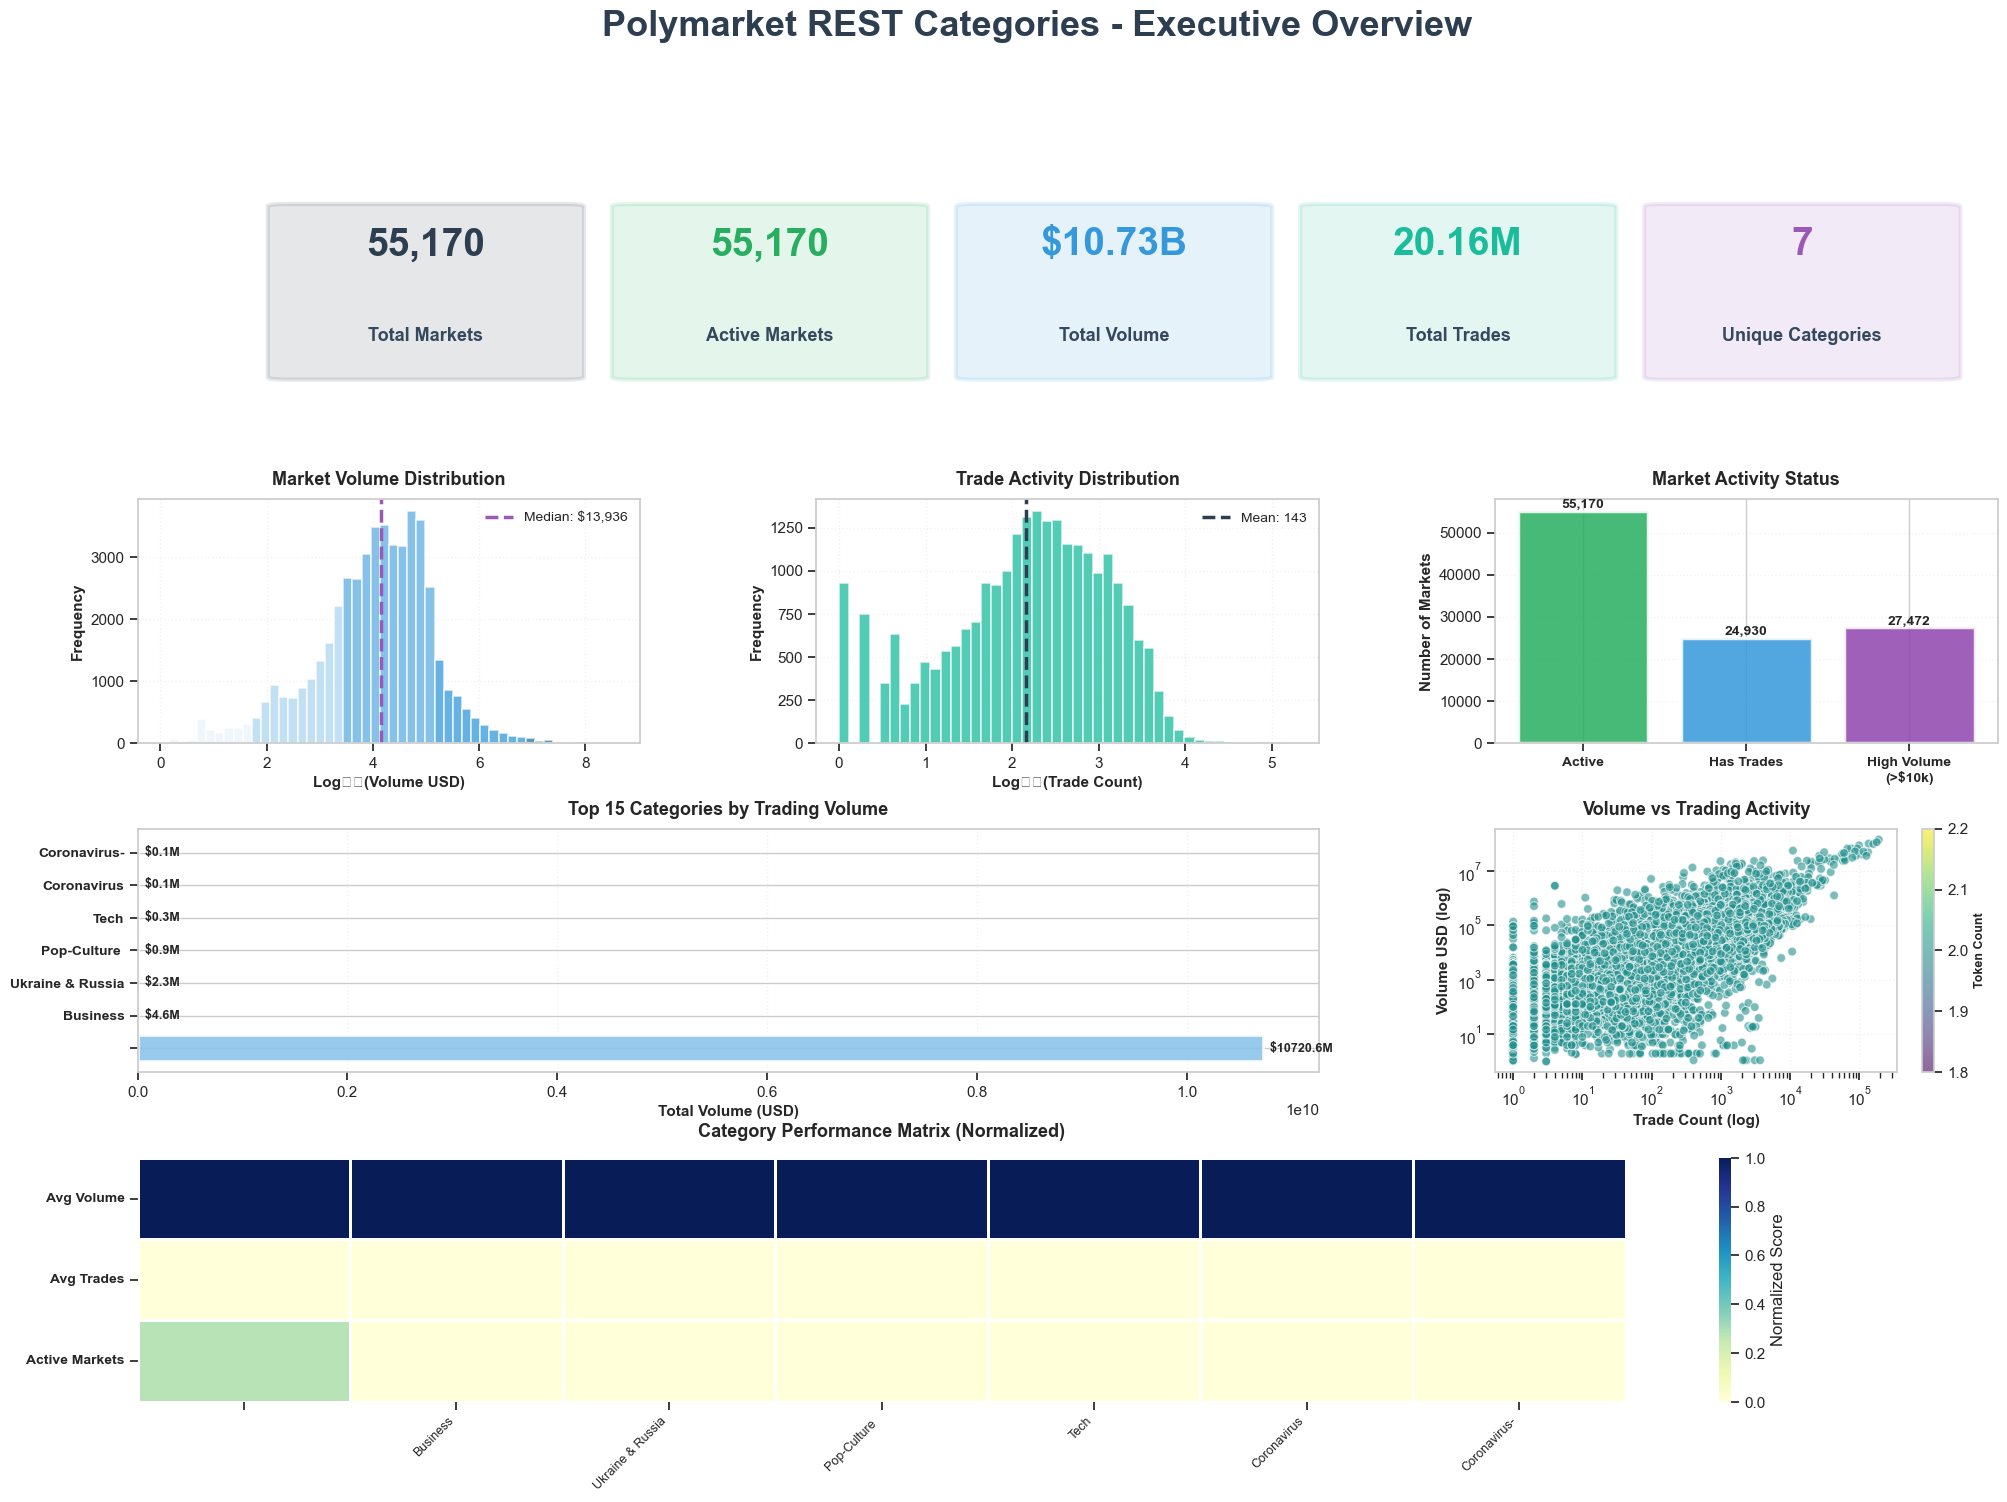

✓ [2/6] Saved: 02_statistical_analysis.png


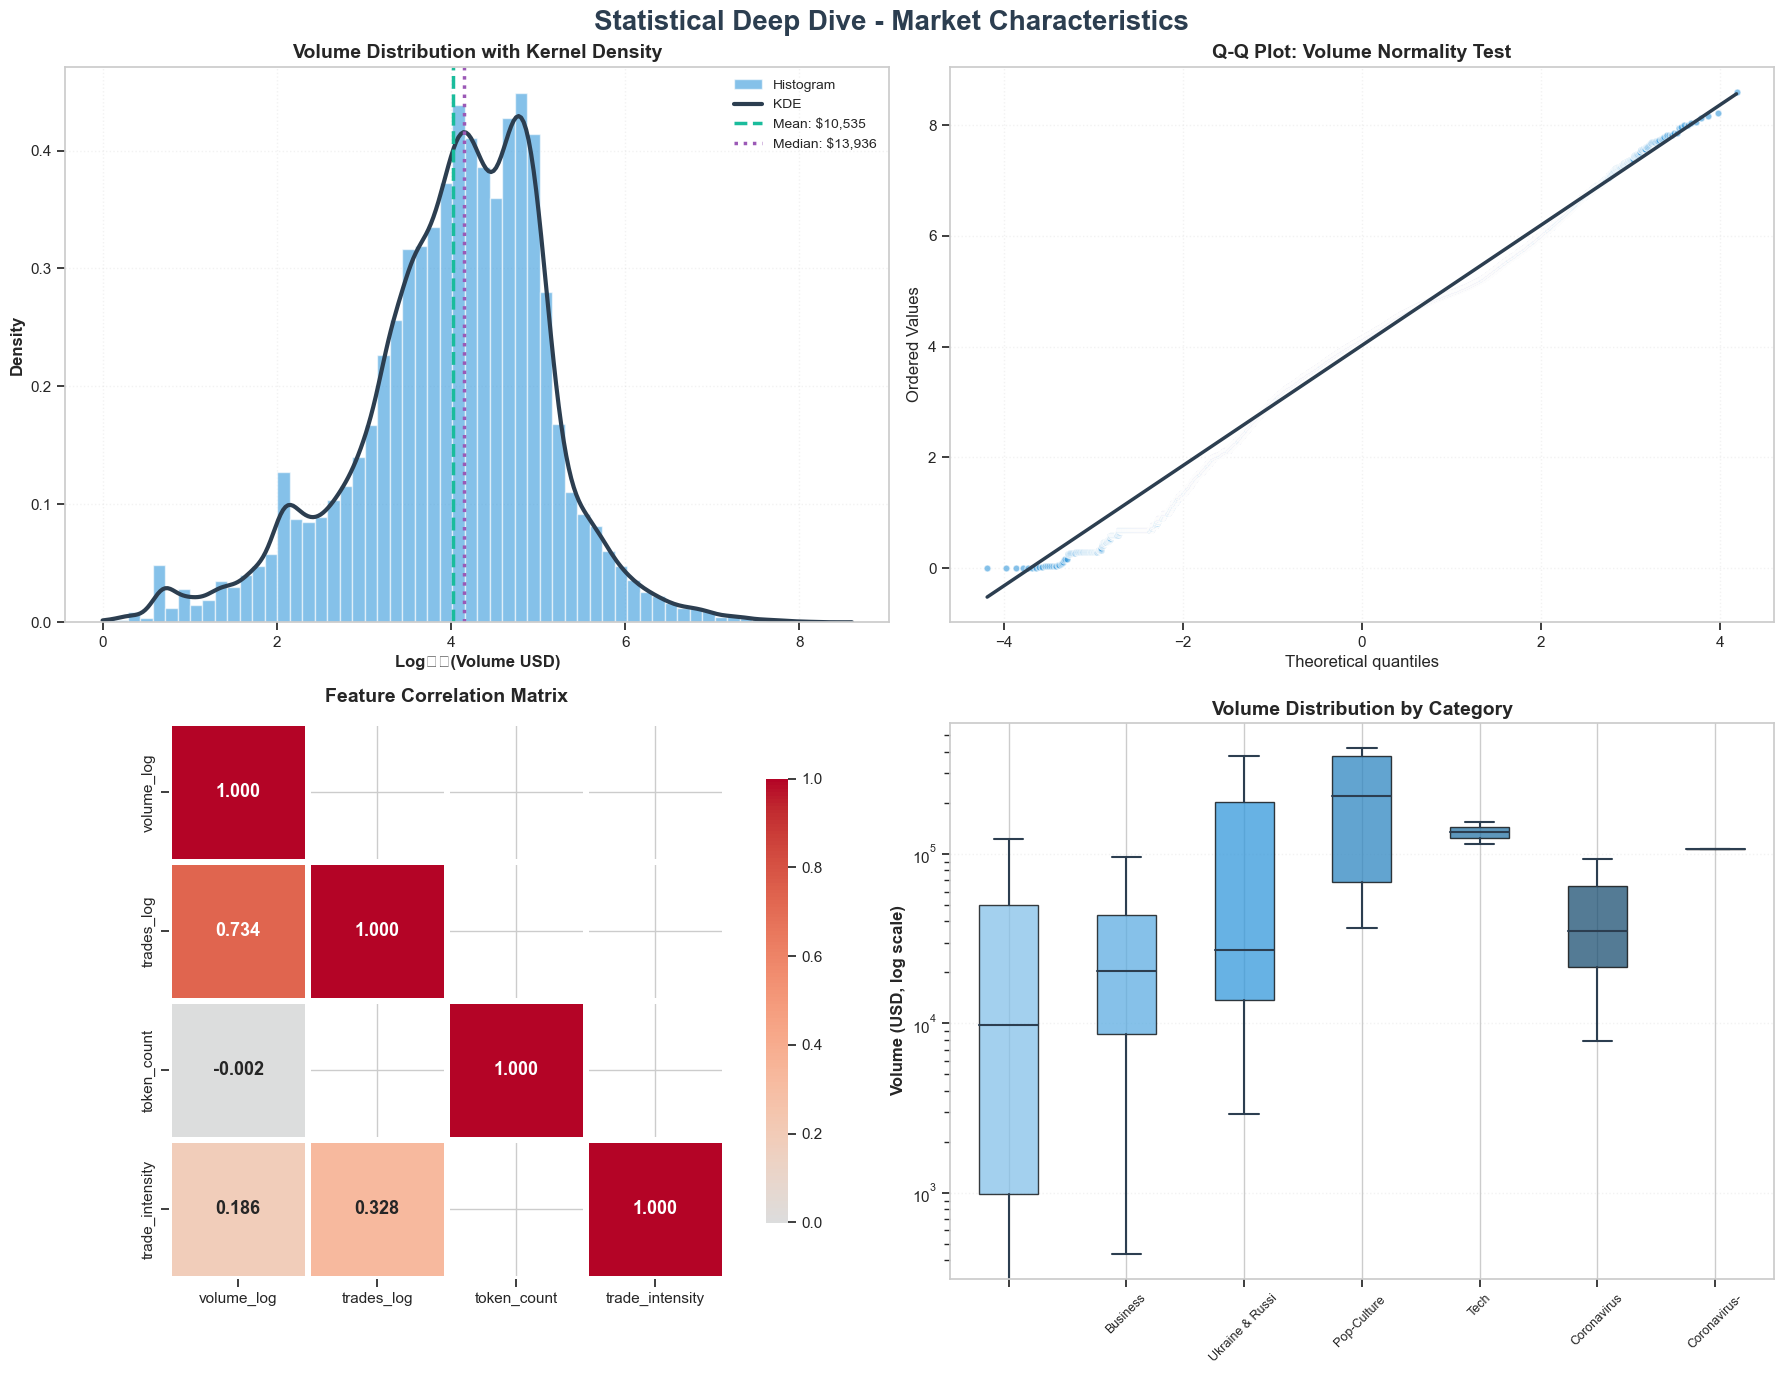

✓ [3/6] Saved: 03_category_insights.png


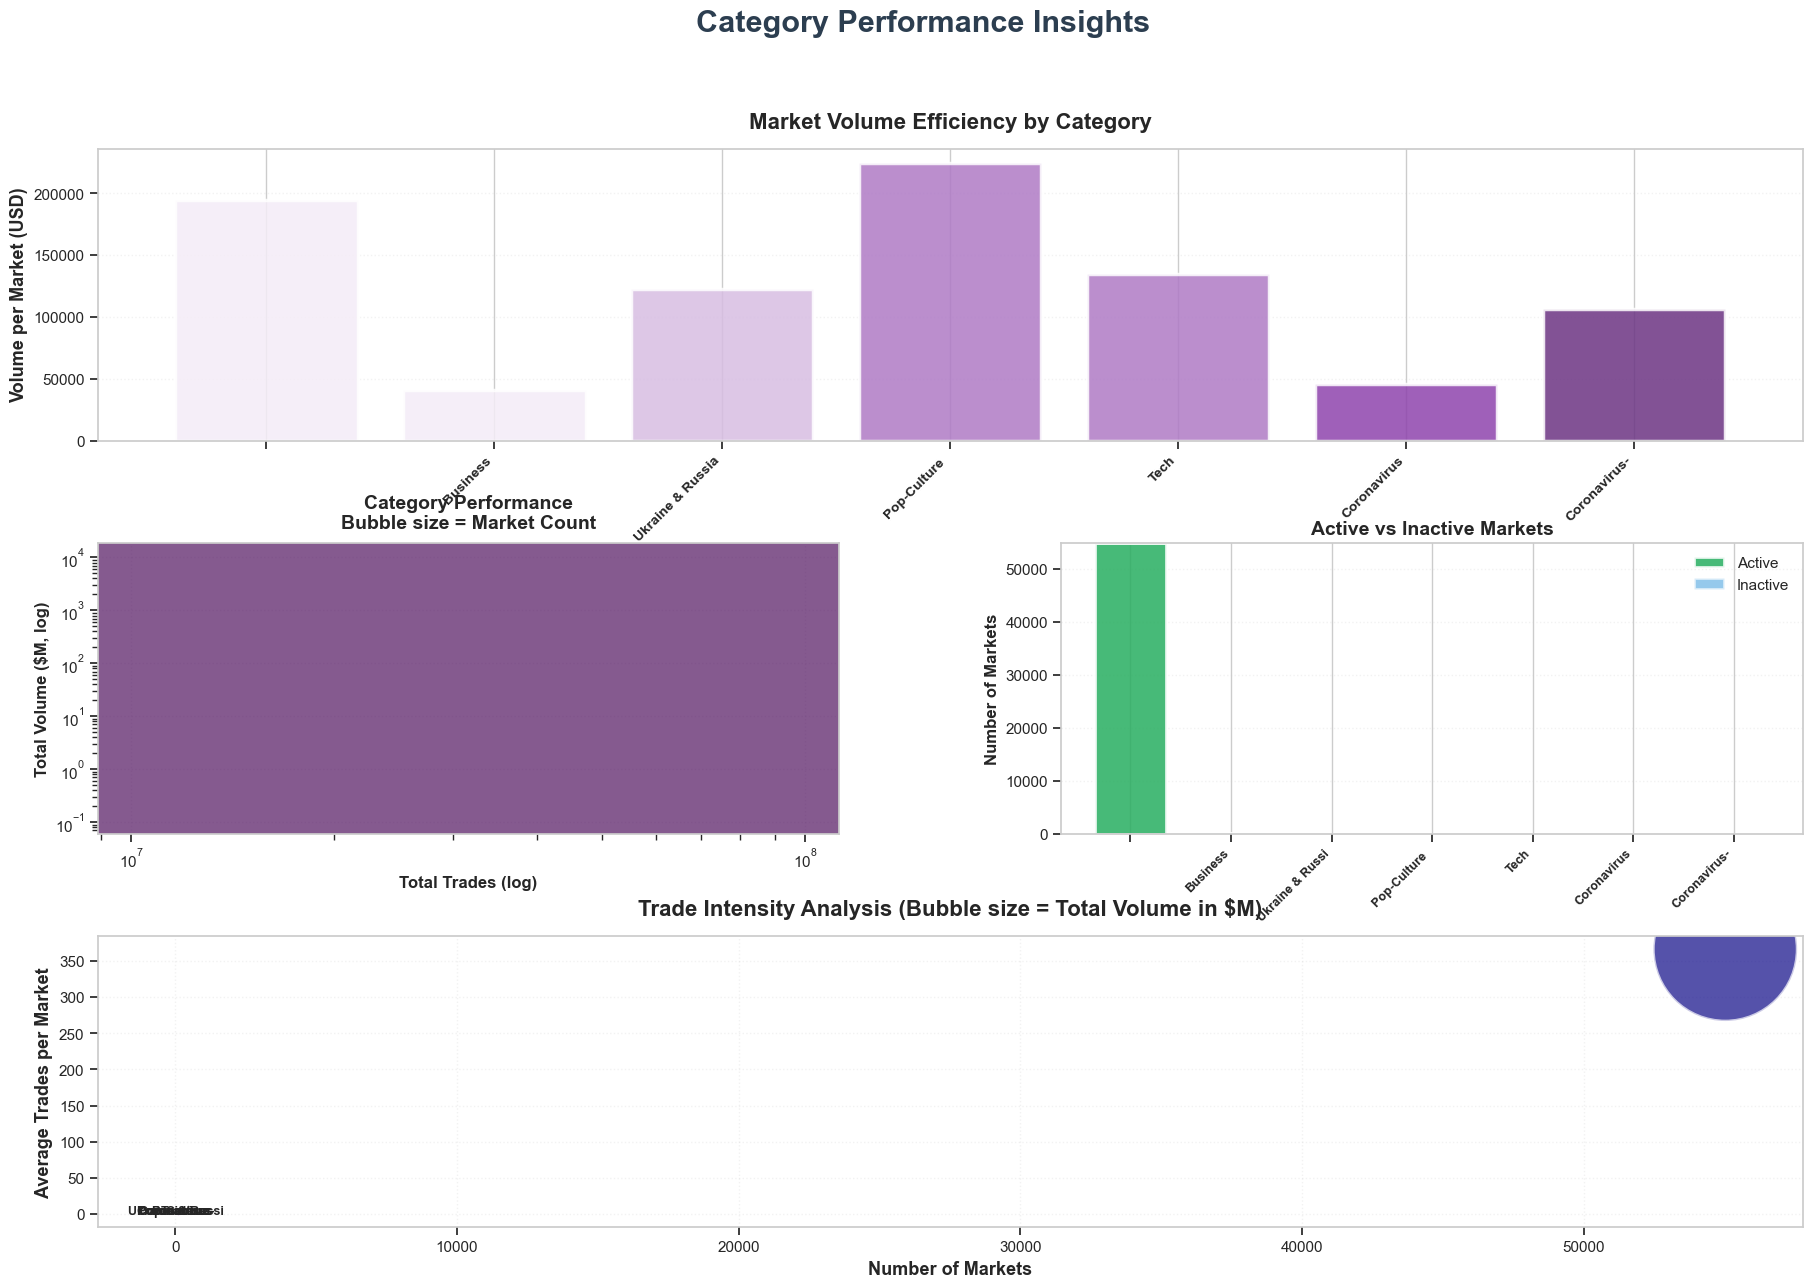


                              ANALYSIS COMPLETE - SUMMARY

[DATASET SUMMARY]
  Total Markets            : 55170
  Active Markets           : 55170
  Unique Categories        : 7
  Total Volume             : $10,728,991,910.42
  Median Volume            : $9,853.34
  Total Trades             : 20,160,854
  Markets with Trades      : 24930

[TOP 5 CATEGORIES]
  1.                               
     Volume: $10,720,640,417 | Markets: 55,028 | Trades: 20,160,854
  2. Business                      
     Volume: $4,617,340 | Markets: 113 | Trades: 0
  3. Ukraine & Russia              
     Volume: $2,323,593 | Markets: 19 | Trades: 0
  4. Pop-Culture                   
     Volume: $898,160 | Markets: 4 | Trades: 0
  5. Tech                          
     Volume: $269,208 | Markets: 2 | Trades: 0

[VISUALIZATIONS GENERATED]
  1. 01_executive_overview.png
  2. 02_statistical_analysis.png
  3. 03_category_insights.png

All visualizations saved to: plots\rest_eda

✓ Exported category statisti

In [32]:
"""
COMPREHENSIVE EDA FOR "REST" CATEGORIES
Professional Analysis with Bitcoin Correlation
Author: Melissa - LSE Data Science MSc
Date: February 2026
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
from scipy import stats
from scipy.signal import savgol_filter
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# ============================================
# CONFIGURATION & STYLING
# ============================================

# Professional color palettes (avoiding red/orange/yellow)
PALETTE_MAIN = {
    'primary': '#2C3E50',      # Dark blue-grey
    'secondary': '#3498DB',    # Bright blue
    'accent': '#1ABC9C',       # Teal
    'highlight': '#9B59B6',    # Purple
    'success': '#27AE60',      # Green
    'info': '#5DADE2',         # Light blue
    'dark': '#34495E',         # Dark grey
}

PALETTE_GRADIENT = {
    'blues': ['#EBF5FB', '#AED6F1', '#5DADE2', '#3498DB', '#2874A6', '#1B4F72'],
    'purples': ['#F4ECF7', '#D7BDE2', '#AF7AC5', '#8E44AD', '#6C3483', '#4A235A'],
    'teals': ['#E8F8F5', '#A3E4D7', '#52BE80', '#1ABC9C', '#17A589', '#138D75'],
    'greens': ['#E8F6F3', '#A9DFBF', '#52BE80', '#27AE60', '#1E8449', '#145A32'],
    'ocean': ['#85C1E9', '#5DADE2', '#3498DB', '#2E86C1', '#2874A6', '#1B4F72'],
}

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.0)
sns.set_palette(PALETTE_GRADIENT['ocean'])

# Create output directory
PLOTS_DIR = Path('plots/rest_eda')
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("="*100)
print(" " * 20 + "COMPREHENSIVE EDA: REST CATEGORIES vs BITCOIN")
print(" " * 30 + "Polymarket Analysis 2026")
print("="*100)

# ============================================
# STEP 1: DATA LOADING & PREPROCESSING
# ============================================

print("\n[STEP 1] DATA LOADING & PREPROCESSING")
print("-" * 100)

# Load data (assuming poly_data and btc_df already loaded from previous cells)
try:
    markets_df = poly_data['markets'].copy()
    summary_df = poly_data['summary'].copy()
    btc_pandas = btc_df.copy() if isinstance(btc_df, pd.DataFrame) else btc_df.to_pandas()
    print(f"✓ Markets loaded: {len(markets_df):,} rows")
    print(f"✓ Summary loaded: {len(summary_df):,} rows")
    print(f"✓ Bitcoin loaded: {len(btc_pandas):,} rows")
except Exception as e:
    print(f"✗ Error loading data: {e}")
    print("Please ensure poly_data and btc_df are loaded in the notebook")
    raise

# ============================================
# STEP 2: TIMESTAMP CORRECTION (using prelude_template logic)
# ============================================

print("\n[STEP 2] TIMESTAMP CORRECTION")
print("-" * 100)

# First merge to get all columns
markets_full = markets_df.merge(
    summary_df[['market_id', 'trade_count', 'token_count', 'first_trade', 'last_trade']],
    on='market_id',
    how='left',
    suffixes=('', '_summary')
)

# Fix timestamp corruption using prelude_template logic
timestamp_cols = ['first_trade', 'last_trade', 'created_at', 'end_date']
fixed_cols = []

for col in timestamp_cols:
    if col not in markets_full.columns:
        continue
    
    # Convert to datetime if string
    if not pd.api.types.is_datetime64_any_dtype(markets_full[col]):
        markets_full[col] = pd.to_datetime(markets_full[col], errors='coerce')
    
    # Check if timestamps are corrupted (max date before 2020)
    non_null = markets_full[col].dropna()
    if len(non_null) > 0 and non_null.max() < pd.Timestamp("2020-01-01"):
        print(f"  Fixing corrupted timestamps in column: {col}")
        # Scale up by 1000 (milliseconds interpreted as microseconds bug)
        ns_values = markets_full[col].values.astype("datetime64[ns]").astype("int64")
        markets_full[col] = pd.to_datetime(ns_values * 1000)
        fixed_cols.append(col)
    
    # Enforce 2020+ constraint (replace invalid with NaT)
    mask = markets_full[col] < pd.Timestamp("2020-01-01")
    if mask.any():
        before_count = mask.sum()
        markets_full.loc[mask, col] = pd.NaT
        if col not in fixed_cols:
            print(f"  Removed {before_count:,} pre-2020 dates in {col}")

if fixed_cols:
    print(f"✓ Fixed timestamp corruption in: {', '.join(fixed_cols)}")

# Count valid timestamps
valid_first_trade = markets_full['first_trade'].notna().sum()
valid_last_trade = markets_full['last_trade'].notna().sum()
valid_created = markets_full['created_at'].notna().sum() if 'created_at' in markets_full.columns else 0

print(f"✓ Valid first_trade: {valid_first_trade:,} ({valid_first_trade/len(markets_full)*100:.1f}%)")
print(f"✓ Valid last_trade: {valid_last_trade:,} ({valid_last_trade/len(markets_full)*100:.1f}%)")
if valid_created > 0:
    print(f"✓ Valid created_at: {valid_created:,} ({valid_created/len(markets_full)*100:.1f}%)")

# ============================================
# STEP 3: CATEGORY FILTERING - "REST"
# ============================================

print("\n[STEP 3] FILTERING REST CATEGORIES")
print("-" * 100)

# Define strong exclusion patterns (only filter if CLEARLY crypto/politics focused)
CRYPTO_KEYWORDS = ['bitcoin', 'btc', 'ethereum', 'eth', 'crypto', 'blockchain', 'defi']
POLITICS_KEYWORDS = ['election', 'president', 'trump', 'biden', 'harris', 'congress', 'senate']

def is_rest_category(row):
    """Check if market belongs to 'Rest' categories (less aggressive filtering)"""
    category = str(row.get('category', '')).lower()
    question = str(row.get('question', '')).lower()
    
    # Exclude if category explicitly matches
    if category in ['crypto', 'politics', 'global politics', 'us-current-affairs']:
        return False
    
    # Exclude only if question has strong crypto/politics indicators
    # (multiple keywords or very explicit)
    crypto_count = sum(1 for kw in CRYPTO_KEYWORDS if kw in question)
    politics_count = sum(1 for kw in POLITICS_KEYWORDS if kw in question)
    
    # Only exclude if 2+ crypto keywords OR 2+ politics keywords
    # This keeps markets that just mention these topics tangentially
    if crypto_count >= 2 or politics_count >= 2:
        return False
    
    return True

markets_full['is_rest'] = markets_full.apply(is_rest_category, axis=1)
markets_rest = markets_full[markets_full['is_rest']].copy()

print(f"✓ Total markets: {len(markets_full):,}")
print(f"✓ Rest markets: {len(markets_rest):,} ({len(markets_rest)/len(markets_full)*100:.1f}%)")
print(f"✓ Filtered out: {len(markets_full) - len(markets_rest):,} (Strong Crypto + Politics indicators)")

# Calculate additional metrics
markets_rest['volume_per_trade'] = markets_rest['volume'] / markets_rest['trade_count'].replace(0, np.nan)
markets_rest['has_trades'] = markets_rest['trade_count'] > 0
markets_rest['trade_intensity'] = markets_rest['trade_count'] / markets_rest['token_count'].replace(0, np.nan)

# ============================================
# STEP 4: CATEGORY STATISTICS
# ============================================

print("\n[STEP 4] CATEGORY STATISTICS")
print("-" * 100)

# Aggregate by category
category_stats = (
    markets_rest.groupby('category')
    .agg({
        'market_id': 'count',
        'volume': ['sum', 'mean', 'median', 'std'],
        'trade_count': ['sum', 'mean', 'median'],
        'active': 'sum',
        'token_count': ['mean', 'sum'],
    })
)
category_stats.columns = ['_'.join(col).strip() for col in category_stats.columns]
category_stats = category_stats.sort_values('volume_sum', ascending=False)
category_stats = category_stats.reset_index()

print(f"✓ Unique categories: {len(category_stats)}")
print(f"\nTop 10 Categories by Volume:")
for idx, row in category_stats.head(10).iterrows():
    print(f"  {idx+1:2d}. {row['category']:30s} | ${row['volume_sum']:12,.0f} | {int(row['market_id_count']):5,} markets")

# Overall statistics
print(f"\nOverall Metrics:")
print(f"  Total Volume:      ${markets_rest['volume'].sum():,.2f}")
print(f"  Median Volume:     ${markets_rest['volume'].median():,.2f}")
print(f"  Total Trades:      {markets_rest['trade_count'].sum():,.0f}")
print(f"  Active Markets:    {markets_rest['active'].sum():,} ({markets_rest['active'].sum()/len(markets_rest)*100:.1f}%)")

# ============================================
# STEP 5: TIME SERIES PREPARATION
# ============================================

print("\n[STEP 5] TIME SERIES PREPARATION")
print("-" * 100)

# Filter markets with valid timestamps
markets_with_dates = markets_rest[markets_rest['first_trade'].notna()].copy()
print(f"✓ Markets with valid dates: {len(markets_with_dates):,}")

if len(markets_with_dates) > 0:
    date_range = f"{markets_with_dates['first_trade'].min().date()} to {markets_with_dates['last_trade'].max().date()}"
    print(f"  Date range: {date_range}")
    
    # Aggregate by date
    markets_with_dates['date'] = markets_with_dates['first_trade'].dt.date
    
    daily_agg = (
        markets_with_dates.groupby('date')
        .agg({
            'market_id': 'count',
            'volume': 'sum',
            'trade_count': 'sum',
            'active': 'sum',
            'token_count': 'sum',
        })
        .rename(columns={
            'market_id': 'new_markets',
            'volume': 'total_volume',
            'trade_count': 'total_trades',
            'active': 'active_markets',
            'token_count': 'total_tokens',
        })
        .reset_index()
    )
    
    daily_agg['date'] = pd.to_datetime(daily_agg['date'])
    print(f"✓ Daily aggregation: {len(daily_agg):,} days")
    
    # Prepare Bitcoin data
    btc_pandas['time'] = pd.to_datetime(btc_pandas['time'])
    btc_pandas['date'] = btc_pandas['time'].dt.date
    btc_daily = btc_pandas[['date', 'PriceUSD', 'CapMrktCurUSD', 'TxCnt', 'HashRate']].copy()
    btc_daily['date'] = pd.to_datetime(btc_daily['date'])
    btc_daily = btc_daily[btc_daily['PriceUSD'].notna()].copy()
    
    print(f"✓ Bitcoin daily: {len(btc_daily):,} days")
    print(f"  BTC range: {btc_daily['date'].min().date()} to {btc_daily['date'].max().date()}")
    
    # Merge
    merged_df = daily_agg.merge(btc_daily, on='date', how='inner')
    merged_df = merged_df.sort_values('date').reset_index(drop=True)
    
    print(f"✓ Merged dataset: {len(merged_df):,} days with overlap")
    
    if len(merged_df) > 0:
        print(f"  Overlap range: {merged_df['date'].min().date()} to {merged_df['date'].max().date()}")
        
        # Calculate derived features
        merged_df['btc_returns'] = merged_df['PriceUSD'].pct_change()
        merged_df['volume_change'] = merged_df['total_volume'].pct_change()
        merged_df['volume_ma7'] = merged_df['total_volume'].rolling(7, min_periods=1).mean()
        merged_df['volume_ma30'] = merged_df['total_volume'].rolling(30, min_periods=1).mean()
        merged_df['btc_ma7'] = merged_df['PriceUSD'].rolling(7, min_periods=1).mean()
        merged_df['btc_ma30'] = merged_df['PriceUSD'].rolling(30, min_periods=1).mean()
        merged_df['btc_volatility'] = merged_df['btc_returns'].rolling(14, min_periods=1).std()
        
        has_timeseries = True
    else:
        print("  ⚠ No overlap between Polymarket and Bitcoin data")
        has_timeseries = False
else:
    print("  ⚠ No markets with valid timestamps")
    has_timeseries = False

# ============================================
# VISUALIZATION 1: DATA OVERVIEW DASHBOARD
# ============================================

print("\n[VISUALIZATIONS] Creating comprehensive plots...")
print("-" * 100)

fig = plt.figure(figsize=(24, 16))
gs = GridSpec(4, 3, figure=fig, hspace=0.35, wspace=0.35)
fig.suptitle('Polymarket REST Categories - Executive Overview', 
             fontsize=26, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Key Metrics Cards
ax_metrics = plt.subplot(gs[0, :])
ax_metrics.axis('off')

metrics_data = [
    ('Total Markets', f"{len(markets_rest):,}", PALETTE_MAIN['primary']),
    ('Active Markets', f"{markets_rest['active'].sum():,}", PALETTE_MAIN['success']),
    ('Total Volume', f"${markets_rest['volume'].sum()/1e9:.2f}B", PALETTE_MAIN['secondary']),
    ('Total Trades', f"{markets_rest['trade_count'].sum()/1e6:.2f}M", PALETTE_MAIN['accent']),
    ('Unique Categories', f"{markets_rest['category'].nunique()}", PALETTE_MAIN['highlight']),
]

for i, (label, value, color) in enumerate(metrics_data):
    x = 0.08 + i * 0.185
    # Background box
    from matplotlib.patches import FancyBboxPatch
    box = FancyBboxPatch((x, 0.15), 0.15, 0.7, transform=ax_metrics.transAxes,
                         boxstyle="round,pad=0.01", facecolor=color, alpha=0.12,
                         edgecolor=color, linewidth=3)
    ax_metrics.add_patch(box)
    # Value
    ax_metrics.text(x + 0.075, 0.65, value, transform=ax_metrics.transAxes,
                   fontsize=28, fontweight='bold', ha='center', color=color)
    # Label
    ax_metrics.text(x + 0.075, 0.30, label, transform=ax_metrics.transAxes,
                   fontsize=13, ha='center', color=PALETTE_MAIN['dark'], fontweight='600')

# 2. Volume Distribution Histogram
ax1 = plt.subplot(gs[1, 0])
volume_positive = markets_rest[markets_rest['volume'] > 0]['volume']
log_volume = np.log10(volume_positive)
counts, bins, patches = ax1.hist(log_volume, bins=50, color=PALETTE_GRADIENT['blues'][3], 
                                  alpha=0.75, edgecolor='white', linewidth=1.2)
# Gradient coloring
for i, patch in enumerate(patches):
    patch.set_facecolor(PALETTE_GRADIENT['blues'][min(int(i/len(patches)*5), 5)])
ax1.axvline(log_volume.median(), color=PALETTE_MAIN['highlight'], linestyle='--', 
           linewidth=2.5, label=f'Median: ${10**log_volume.median():,.0f}')
ax1.set_xlabel('Log₁₀(Volume USD)', fontsize=11, fontweight='600')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax1.set_title('Market Volume Distribution', fontsize=13, fontweight='bold', pad=10)
ax1.legend(fontsize=10, framealpha=0.95)
ax1.grid(True, alpha=0.25, linestyle=':')

# 3. Trade Count Distribution
ax2 = plt.subplot(gs[1, 1])
trade_positive = markets_rest[markets_rest['trade_count'] > 0]['trade_count']
log_trades = np.log10(trade_positive)
ax2.hist(log_trades, bins=45, color=PALETTE_GRADIENT['teals'][3], 
        alpha=0.75, edgecolor='white', linewidth=1.2)
ax2.axvline(log_trades.mean(), color=PALETTE_MAIN['primary'], linestyle='--', 
           linewidth=2.5, label=f'Mean: {10**log_trades.mean():,.0f}')
ax2.set_xlabel('Log₁₀(Trade Count)', fontsize=11, fontweight='600')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax2.set_title('Trade Activity Distribution', fontsize=13, fontweight='bold', pad=10)
ax2.legend(fontsize=10, framealpha=0.95)
ax2.grid(True, alpha=0.25, linestyle=':')

# 4. Market Status Composition
ax3 = plt.subplot(gs[1, 2])
status_counts = {
    'Active': int(markets_rest['active'].sum()),
    'Has Trades': int(markets_rest['has_trades'].sum()),
    'High Volume\n(>$10k)': int((markets_rest['volume'] > 10000).sum()),
}
colors_status = [PALETTE_GRADIENT['greens'][3], PALETTE_GRADIENT['blues'][3], 
                 PALETTE_GRADIENT['purples'][3]]
bars = ax3.bar(range(len(status_counts)), status_counts.values(), color=colors_status,
              alpha=0.85, edgecolor='white', linewidth=2.5)
ax3.set_xticks(range(len(status_counts)))
ax3.set_xticklabels(status_counts.keys(), fontsize=10, fontweight='600')
ax3.set_ylabel('Number of Markets', fontsize=11, fontweight='600')
ax3.set_title('Market Activity Status', fontsize=13, fontweight='bold', pad=10)
ax3.grid(axis='y', alpha=0.25, linestyle=':')
for i, (bar, val) in enumerate(zip(bars, status_counts.values())):
    ax3.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Top Categories by Volume (Horizontal bar)
ax4 = plt.subplot(gs[2, :2])
top_15_cats = category_stats.head(15)
y_pos = np.arange(len(top_15_cats))
colors_gradient = [PALETTE_GRADIENT['ocean'][int(i/len(top_15_cats)*5)] for i in range(len(top_15_cats))]
bars = ax4.barh(y_pos, top_15_cats['volume_sum'], color=colors_gradient, 
               alpha=0.85, edgecolor='white', linewidth=2)
ax4.set_yticks(y_pos)
ax4.set_yticklabels(top_15_cats['category'], fontsize=10, fontweight='600')
ax4.set_xlabel('Total Volume (USD)', fontsize=11, fontweight='600')
ax4.set_title('Top 15 Categories by Trading Volume', fontsize=13, fontweight='bold', pad=10)
ax4.grid(axis='x', alpha=0.25, linestyle=':')
for i, (y, val) in enumerate(zip(y_pos, top_15_cats['volume_sum'])):
    ax4.text(val, y, f'  ${val/1e6:.1f}M', va='center', fontsize=9, fontweight='600')

# 6. Volume vs Trades Scatter (Log-Log)
ax5 = plt.subplot(gs[2, 2])
scatter_data = markets_rest[(markets_rest['trade_count'] > 0) & (markets_rest['volume'] > 0)].copy()
scatter = ax5.scatter(scatter_data['trade_count'], scatter_data['volume'],
                     c=scatter_data['token_count'], cmap='viridis', s=40, alpha=0.6,
                     edgecolors='white', linewidth=0.8)
ax5.set_xlabel('Trade Count (log)', fontsize=11, fontweight='600')
ax5.set_ylabel('Volume USD (log)', fontsize=11, fontweight='600')
ax5.set_title('Volume vs Trading Activity', fontsize=13, fontweight='bold', pad=10)
ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.grid(True, alpha=0.25, linestyle=':')
cbar = plt.colorbar(scatter, ax=ax5)
cbar.set_label('Token Count', fontsize=9, fontweight='600')

# 7. Category Performance Heatmap
ax6 = plt.subplot(gs[3, :])
top_12_heat = category_stats.head(12)
heatmap_data = top_12_heat[['volume_mean', 'trade_count_mean', 'active_sum']].T
heatmap_data.index = ['Avg Volume', 'Avg Trades', 'Active Markets']
heatmap_data.columns = top_12_heat['category']
# Normalize
heatmap_norm = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
sns.heatmap(heatmap_norm, annot=False, cmap='YlGnBu', ax=ax6, cbar_kws={'label': 'Normalized Score'},
           linewidths=2, linecolor='white', square=False)
ax6.set_title('Category Performance Matrix (Normalized)', fontsize=13, fontweight='bold', pad=15)
ax6.set_xlabel('')
ax6.set_ylabel('', fontsize=11, fontweight='600')
plt.setp(ax6.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.setp(ax6.get_yticklabels(), rotation=0, fontsize=10, fontweight='600')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '01_executive_overview.png', dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ [1/6] Saved: 01_executive_overview.png")
plt.show()

# ============================================
# VISUALIZATION 2: STATISTICAL ANALYSIS
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Statistical Deep Dive - Market Characteristics', 
             fontsize=20, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Volume Distribution with KDE
ax = axes[0, 0]
from scipy import stats as sp_stats
kde = sp_stats.gaussian_kde(log_volume)
x_range = np.linspace(log_volume.min(), log_volume.max(), 300)
ax.hist(log_volume, bins=60, density=True, alpha=0.6, color=PALETTE_GRADIENT['blues'][3], 
       edgecolor='white', linewidth=1, label='Histogram')
ax.plot(x_range, kde(x_range), color=PALETTE_MAIN['primary'], linewidth=3, label='KDE')
ax.axvline(log_volume.mean(), color=PALETTE_MAIN['accent'], linestyle='--', linewidth=2.5, 
          label=f'Mean: ${10**log_volume.mean():,.0f}')
ax.axvline(log_volume.median(), color=PALETTE_MAIN['highlight'], linestyle=':', linewidth=2.5,
          label=f'Median: ${10**log_volume.median():,.0f}')
ax.set_xlabel('Log₁₀(Volume USD)', fontsize=12, fontweight='600')
ax.set_ylabel('Density', fontsize=12, fontweight='600')
ax.set_title('Volume Distribution with Kernel Density', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle=':')

# 2. Q-Q Plot for Normality
ax = axes[0, 1]
sp_stats.probplot(log_volume, dist="norm", plot=ax)
ax.get_lines()[0].set_markerfacecolor(PALETTE_MAIN['secondary'])
ax.get_lines()[0].set_markeredgecolor('white')
ax.get_lines()[0].set_markersize(5)
ax.get_lines()[0].set_alpha(0.6)
ax.get_lines()[1].set_color(PALETTE_MAIN['primary'])
ax.get_lines()[1].set_linewidth(2.5)
ax.set_title('Q-Q Plot: Volume Normality Test', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')

# 3. Correlation Matrix
ax = axes[1, 0]
corr_cols = ['volume', 'trade_count', 'token_count', 'trade_intensity']
corr_data = markets_rest[corr_cols].copy()
corr_data['volume_log'] = np.log10(corr_data['volume'].replace(0, np.nan))
corr_data['trades_log'] = np.log10(corr_data['trade_count'].replace(0, np.nan))
corr_matrix = corr_data[['volume_log', 'trades_log', 'token_count', 'trade_intensity']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', center=0,
           square=True, linewidths=3, cbar_kws={"shrink": 0.8}, ax=ax,
           annot_kws={'size': 13, 'weight': 'bold'})
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=15)

# 4. Box Plot Comparison
ax = axes[1, 1]
top_8_cats = category_stats.head(8)['category'].tolist()
box_data = [markets_rest[markets_rest['category'] == cat]['volume'].dropna().values 
           for cat in top_8_cats]
bp = ax.boxplot(box_data, labels=[c[:15] for c in top_8_cats], patch_artist=True, showfliers=False)
for patch, color in zip(bp['boxes'], PALETTE_GRADIENT['ocean']):
    patch.set_facecolor(color)
    patch.set_alpha(0.75)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color=PALETTE_MAIN['primary'], linewidth=1.5)
ax.set_ylabel('Volume (USD, log scale)', fontsize=12, fontweight='600')
ax.set_title('Volume Distribution by Category', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.grid(axis='y', alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '02_statistical_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ [2/6] Saved: 02_statistical_analysis.png")
plt.show()

# ============================================
# VISUALIZATION 3: CATEGORY INSIGHTS
# ============================================

fig = plt.figure(figsize=(22, 14))
gs = GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.3)
fig.suptitle('Category Performance Insights', 
             fontsize=22, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Volume Efficiency (Volume per Market)
ax1 = plt.subplot(gs[0, :])
top_15_cats = category_stats.head(15).copy()
top_15_cats['efficiency'] = top_15_cats['volume_sum'] / top_15_cats['market_id_count']
colors_gradient = [PALETTE_GRADIENT['purples'][int(i/len(top_15_cats)*5)] for i in range(len(top_15_cats))]
bars = ax1.bar(range(len(top_15_cats)), top_15_cats['efficiency'], color=colors_gradient,
              alpha=0.85, edgecolor='white', linewidth=2.5)
ax1.set_xticks(range(len(top_15_cats)))
ax1.set_xticklabels(top_15_cats['category'], rotation=45, ha='right', fontsize=10, fontweight='600')
ax1.set_ylabel('Volume per Market (USD)', fontsize=13, fontweight='600')
ax1.set_title('Market Volume Efficiency by Category', fontsize=16, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.25, linestyle=':')

# 2. Bubble Chart: Volume vs Trades vs Markets
ax2 = plt.subplot(gs[1, 0])
bubble_data = category_stats.head(12).copy()
scatter = ax2.scatter(bubble_data['trade_count_sum'], bubble_data['volume_sum']/1e6,
                     s=bubble_data['market_id_count']*15, 
                     c=range(len(bubble_data)), cmap='viridis',
                     alpha=0.65, edgecolors='white', linewidth=2)
for idx, row in bubble_data.iterrows():
    ax2.annotate(row['category'][:12], 
                (row['trade_count_sum'], row['volume_sum']/1e6),
                fontsize=8, ha='center', fontweight='600')
ax2.set_xlabel('Total Trades (log)', fontsize=12, fontweight='600')
ax2.set_ylabel('Total Volume ($M, log)', fontsize=12, fontweight='600')
ax2.set_title('Category Performance\nBubble size = Market Count', 
             fontsize=14, fontweight='bold', pad=10)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.25, linestyle=':')

# 3. Active vs Inactive Markets
ax3 = plt.subplot(gs[1, 1])
top_10_cats = category_stats.head(10)
active_counts = []
inactive_counts = []
for cat in top_10_cats['category']:
    cat_data = markets_rest[markets_rest['category'] == cat]
    active_counts.append(int(cat_data['active'].sum()))
    inactive_counts.append(len(cat_data) - int(cat_data['active'].sum()))

x = np.arange(len(top_10_cats))
width = 0.7
p1 = ax3.bar(x, active_counts, width, label='Active', 
            color=PALETTE_GRADIENT['greens'][3], alpha=0.85, edgecolor='white', linewidth=2)
p2 = ax3.bar(x, inactive_counts, width, bottom=active_counts, label='Inactive',
            color=PALETTE_GRADIENT['blues'][2], alpha=0.65, edgecolor='white', linewidth=2)
ax3.set_xticks(x)
ax3.set_xticklabels([c[:15] for c in top_10_cats['category']], 
                    rotation=45, ha='right', fontsize=9, fontweight='600')
ax3.set_ylabel('Number of Markets', fontsize=12, fontweight='600')
ax3.set_title('Active vs Inactive Markets', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11, framealpha=0.95)
ax3.grid(axis='y', alpha=0.25, linestyle=':')

# 4. Trade Intensity Scatter
ax4 = plt.subplot(gs[2, :])
top_15_cats = category_stats.head(15)
top_15_cats['trade_intensity_cat'] = top_15_cats['trade_count_sum'] / top_15_cats['market_id_count']
scatter = ax4.scatter(top_15_cats['market_id_count'], top_15_cats['trade_intensity_cat'],
                     s=top_15_cats['volume_sum']/1e6, c=range(len(top_15_cats)),
                     cmap='plasma', alpha=0.7, edgecolors='white', linewidth=2)
for idx, row in top_15_cats.iterrows():
    ax4.annotate(row['category'][:15], 
                (row['market_id_count'], row['trade_intensity_cat']),
                fontsize=9, ha='center', fontweight='600')
ax4.set_xlabel('Number of Markets', fontsize=13, fontweight='600')
ax4.set_ylabel('Average Trades per Market', fontsize=13, fontweight='600')
ax4.set_title('Trade Intensity Analysis (Bubble size = Total Volume in $M)', 
             fontsize=16, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '03_category_insights.png', dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ [3/6] Saved: 03_category_insights.png")
plt.show()

# ============================================
# VISUALIZATION 4: TIME SERIES ANALYSIS
# ============================================

if has_timeseries and len(merged_df) > 10:
    
    fig, axes = plt.subplots(3, 1, figsize=(20, 14), sharex=True)
    fig.suptitle('Time Series Analysis: REST Markets vs Bitcoin', 
                 fontsize=22, fontweight='bold', color=PALETTE_MAIN['primary'])
    
    # 1. Bitcoin Price with Moving Averages
    ax = axes[0]
    ax.plot(merged_df['date'], merged_df['PriceUSD'], 
           color=PALETTE_MAIN['primary'], linewidth=2.5, label='BTC Price', alpha=0.9)
    ax.plot(merged_df['date'], merged_df['btc_ma7'], 
           color=PALETTE_MAIN['secondary'], linewidth=2, linestyle='--', 
           label='7-Day MA', alpha=0.7)
    ax.plot(merged_df['date'], merged_df['btc_ma30'], 
           color=PALETTE_MAIN['accent'], linewidth=2, linestyle=':', 
           label='30-Day MA', alpha=0.7)
    ax.fill_between(merged_df['date'], merged_df['PriceUSD'], alpha=0.15, 
                    color=PALETTE_MAIN['primary'])
    ax.set_ylabel('BTC Price (USD)', fontsize=13, fontweight='600')
    ax.set_title('Bitcoin Price Trend', fontsize=16, fontweight='bold', pad=10)
    ax.legend(loc='best', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.25, linestyle=':')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))
    
    # 2. New Markets Creation
    ax = axes[1]
    ax.bar(merged_df['date'], merged_df['new_markets'], 
          color=PALETTE_GRADIENT['teals'][3], alpha=0.75, width=1, 
          edgecolor='white', linewidth=0.5)
    ax.set_ylabel('New Markets', fontsize=13, fontweight='600')
    ax.set_title('Daily Market Creation Activity', fontsize=16, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.25, linestyle=':')
    
    # 3. Trading Volume with MA
    ax = axes[2]
    ax.plot(merged_df['date'], merged_df['total_volume'], 
           color=PALETTE_MAIN['accent'], linewidth=2.5, label='Daily Volume', alpha=0.9)
    ax.plot(merged_df['date'], merged_df['volume_ma7'], 
           color=PALETTE_MAIN['highlight'], linewidth=2, linestyle='--', 
           label='7-Day MA', alpha=0.7)
    ax.fill_between(merged_df['date'], merged_df['total_volume'], 
                    alpha=0.2, color=PALETTE_MAIN['accent'])
    ax.set_ylabel('Trading Volume (USD)', fontsize=13, fontweight='600')
    ax.set_xlabel('Date', fontsize=13, fontweight='600')
    ax.set_title('Trading Volume Trend', fontsize=16, fontweight='bold', pad=10)
    ax.legend(loc='best', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.25, linestyle=':')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))
    
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / '04_timeseries_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ [4/6] Saved: 04_timeseries_analysis.png")
    plt.show()

# ============================================
# VISUALIZATION 5: BITCOIN CORRELATION
# ============================================

if has_timeseries and len(merged_df) > 10:
    
    fig = plt.figure(figsize=(20, 16))
    gs = GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.3)
    fig.suptitle('Bitcoin Correlation Analysis', 
                 fontsize=22, fontweight='bold', color=PALETTE_MAIN['primary'])
    
    # 1. Dual Axis: Volume vs BTC Price
    ax1 = plt.subplot(gs[0, :])
    ax1_twin = ax1.twinx()
    
    ln1 = ax1.plot(merged_df['date'], merged_df['total_volume'], 
                  color=PALETTE_MAIN['accent'], linewidth=2.5, label='Volume')
    ln2 = ax1_twin.plot(merged_df['date'], merged_df['PriceUSD'], 
                       color=PALETTE_MAIN['primary'], linewidth=2.5, label='BTC Price')
    
    ax1.set_ylabel('Trading Volume (USD)', fontsize=13, fontweight='600', 
                  color=PALETTE_MAIN['accent'])
    ax1_twin.set_ylabel('BTC Price (USD)', fontsize=13, fontweight='600', 
                       color=PALETTE_MAIN['primary'])
    ax1.set_xlabel('Date', fontsize=13, fontweight='600')
    ax1.set_title('Volume vs Bitcoin Price Over Time', fontsize=16, fontweight='bold', pad=15)
    ax1.tick_params(axis='y', labelcolor=PALETTE_MAIN['accent'])
    ax1_twin.tick_params(axis='y', labelcolor=PALETTE_MAIN['primary'])
    ax1.grid(True, alpha=0.25, linestyle=':')
    
    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper left', fontsize=12, framealpha=0.95)
    
    # 2. Scatter: Volume vs BTC Price
    ax2 = plt.subplot(gs[1, 0])
    scatter = ax2.scatter(merged_df['total_volume'], merged_df['PriceUSD'],
                         c=merged_df.index, cmap='viridis', s=80, alpha=0.65,
                         edgecolors='white', linewidth=1.5)
    ax2.set_xlabel('Trading Volume (USD)', fontsize=12, fontweight='600')
    ax2.set_ylabel('BTC Price (USD)', fontsize=12, fontweight='600')
    ax2.set_title('Volume vs BTC Price Relationship', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.25, linestyle=':')
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Time Progression', fontsize=10, fontweight='600')
    
    # 3. Scatter: New Markets vs BTC Price
    ax3 = plt.subplot(gs[1, 1])
    scatter = ax3.scatter(merged_df['new_markets'], merged_df['PriceUSD'],
                         c=merged_df['total_volume'], cmap='plasma', s=80, alpha=0.65,
                         edgecolors='white', linewidth=1.5)
    ax3.set_xlabel('New Markets Created', fontsize=12, fontweight='600')
    ax3.set_ylabel('BTC Price (USD)', fontsize=12, fontweight='600')
    ax3.set_title('Market Creation vs BTC Price', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.25, linestyle=':')
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Volume', fontsize=10, fontweight='600')
    
    # 4. Correlation Matrix
    ax4 = plt.subplot(gs[2, :])
    corr_cols = ['new_markets', 'total_volume', 'total_trades', 'active_markets', 'PriceUSD']
    corr_matrix = merged_df[corr_cols].corr()
    
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
               square=True, linewidths=3, cbar_kws={"shrink": 0.7}, ax=ax4,
               annot_kws={'size': 14, 'weight': 'bold'})
    ax4.set_title('Feature Correlation Matrix with Bitcoin Price', 
                 fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / '05_bitcoin_correlation.png', dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ [5/6] Saved: 05_bitcoin_correlation.png")
    plt.show()
    
    # Print correlation insights
    print(f"\n[CORRELATION INSIGHTS]")
    print("-" * 100)
    print(f"Correlation with Bitcoin Price:")
    for col in ['new_markets', 'total_volume', 'total_trades', 'active_markets']:
        if col in corr_matrix.columns:
            corr_val = corr_matrix.loc[col, 'PriceUSD']
            strength = 'Strong' if abs(corr_val) > 0.7 else 'Moderate' if abs(corr_val) > 0.4 else 'Weak'
            direction = 'positive' if corr_val > 0 else 'negative'
            print(f"  {col:20s}: {corr_val:7.4f} ({strength} {direction})")

# ============================================
# VISUALIZATION 6: ADVANCED TIME SERIES
# ============================================

if has_timeseries and len(merged_df) > 30:
    
    fig = plt.figure(figsize=(22, 16))
    gs = GridSpec(4, 2, figure=fig, hspace=0.35, wspace=0.3)
    fig.suptitle('Advanced Time Series Analytics', 
                 fontsize=22, fontweight='bold', color=PALETTE_MAIN['primary'])
    
    # 1. Rolling Correlation
    ax1 = plt.subplot(gs[0, :])
    windows = [7, 14, 30]
    colors_windows = [PALETTE_GRADIENT['ocean'][2], PALETTE_GRADIENT['teals'][3], 
                     PALETTE_GRADIENT['purples'][3]]
    
    for window, color in zip(windows, colors_windows):
        if len(merged_df) >= window:
            rolling_corr = merged_df['total_volume'].rolling(window).corr(merged_df['PriceUSD'])
            ax1.plot(merged_df['date'], rolling_corr, linewidth=2.5, 
                    label=f'{window}-Day Window', color=color, alpha=0.85)
    
    ax1.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2, alpha=0.5)
    ax1.fill_between(merged_df['date'], 0, 1, alpha=0.08, color=PALETTE_MAIN['success'])
    ax1.fill_between(merged_df['date'], -1, 0, alpha=0.08, color=PALETTE_MAIN['primary'])
    ax1.set_ylabel('Correlation Coefficient', fontsize=13, fontweight='600')
    ax1.set_xlabel('Date', fontsize=13, fontweight='600')
    ax1.set_title('Rolling Correlation: Volume vs Bitcoin Price', 
                 fontsize=16, fontweight='bold', pad=15)
    ax1.legend(loc='best', fontsize=12, framealpha=0.95)
    ax1.grid(True, alpha=0.25, linestyle=':')
    ax1.set_ylim(-1, 1)
    
    # 2. Cumulative Volume
    ax2 = plt.subplot(gs[1, 0])
    merged_df['cumulative_volume'] = merged_df['total_volume'].cumsum()
    ax2.plot(merged_df['date'], merged_df['cumulative_volume']/1e6, 
            color=PALETTE_GRADIENT['teals'][3], linewidth=3)
    ax2.fill_between(merged_df['date'], merged_df['cumulative_volume']/1e6, 
                     alpha=0.25, color=PALETTE_GRADIENT['teals'][3])
    ax2.set_ylabel('Cumulative Volume ($M)', fontsize=12, fontweight='600')
    ax2.set_xlabel('Date', fontsize=12, fontweight='600')
    ax2.set_title('Cumulative Trading Volume', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.25, linestyle=':')
    
    # 3. Volume Volatility
    ax3 = plt.subplot(gs[1, 1])
    for window, color in zip([7, 14, 30], colors_windows):
        if len(merged_df) >= window:
            rolling_std = merged_df['total_volume'].rolling(window).std()
            ax3.plot(merged_df['date'], rolling_std, linewidth=2.5, 
                    label=f'{window}-Day', color=color, alpha=0.85)
    ax3.set_ylabel('Volume Std Dev', fontsize=12, fontweight='600')
    ax3.set_xlabel('Date', fontsize=12, fontweight='600')
    ax3.set_title('Rolling Volume Volatility', fontsize=14, fontweight='bold')
    ax3.legend(fontsize=11, framealpha=0.95)
    ax3.grid(True, alpha=0.25, linestyle=':')
    
    # 4. Returns Scatter
    ax4 = plt.subplot(gs[2, 0])
    scatter = ax4.scatter(merged_df['btc_returns']*100, merged_df['volume_change']*100,
                         c=merged_df['PriceUSD'], cmap='plasma', s=60, alpha=0.65,
                         edgecolors='white', linewidth=1)
    ax4.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
    ax4.axvline(x=0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
    ax4.set_xlabel('BTC Returns (%)', fontsize=12, fontweight='600')
    ax4.set_ylabel('Volume Change (%)', fontsize=12, fontweight='600')
    ax4.set_title('Returns Phase Diagram', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.25, linestyle=':')
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label('BTC Price', fontsize=10, fontweight='600')
    
    # 5. Lagged Cross-Correlation
    ax5 = plt.subplot(gs[2, 1])
    max_lag = min(21, len(merged_df)//3)
    lags = range(-max_lag, max_lag+1)
    lagged_corrs = []
    
    for lag in lags:
        if lag < 0:
            corr = merged_df['total_volume'].shift(-lag).corr(merged_df['PriceUSD'])
        else:
            corr = merged_df['total_volume'].corr(merged_df['PriceUSD'].shift(lag))
        lagged_corrs.append(corr)
    
    colors_lag = [PALETTE_MAIN['success'] if c > 0 else PALETTE_MAIN['secondary'] 
                 for c in lagged_corrs]
    ax5.bar(lags, lagged_corrs, color=colors_lag, alpha=0.7, width=0.8, 
           edgecolor='white', linewidth=1)
    ax5.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2, alpha=0.5)
    ax5.axvline(x=0, color=PALETTE_MAIN['primary'], linestyle='--', linewidth=2, alpha=0.7)
    
    # Find optimal lag
    max_corr_idx = np.argmax(np.abs(lagged_corrs))
    optimal_lag = list(lags)[max_corr_idx]
    ax5.axvline(x=optimal_lag, color=PALETTE_MAIN['highlight'], linestyle='--', 
               linewidth=2.5, label=f'Optimal: {optimal_lag}d (r={lagged_corrs[max_corr_idx]:.3f})')
    
    ax5.set_xlabel('Lag (days)', fontsize=12, fontweight='600')
    ax5.set_ylabel('Correlation', fontsize=12, fontweight='600')
    ax5.set_title('Lagged Cross-Correlation', fontsize=14, fontweight='bold')
    ax5.legend(fontsize=10, framealpha=0.95)
    ax5.grid(True, alpha=0.25, linestyle=':')
    
    # 6. Trend Decomposition
    ax6 = plt.subplot(gs[3, :])
    window_sg = min(51, len(merged_df)//2*2+1)
    if window_sg >= 5:
        trend = savgol_filter(merged_df['total_volume'], window_sg, 3)
        detrended = merged_df['total_volume'] - trend
        
        ax6_twin = ax6.twinx()
        ln1 = ax6.plot(merged_df['date'], trend, color=PALETTE_GRADIENT['purples'][3], 
                      linewidth=3, label='Trend (Savitzky-Golay)', alpha=0.9)
        ax6.fill_between(merged_df['date'], trend, alpha=0.2, color=PALETTE_GRADIENT['purples'][3])
        ln2 = ax6_twin.plot(merged_df['date'], detrended, color=PALETTE_GRADIENT['ocean'][3], 
                           linewidth=2, label='Residuals', alpha=0.7)
        ax6_twin.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
        
        ax6.set_ylabel('Trend Component', fontsize=12, fontweight='600', 
                      color=PALETTE_GRADIENT['purples'][3])
        ax6_twin.set_ylabel('Residuals', fontsize=12, fontweight='600', 
                           color=PALETTE_GRADIENT['ocean'][3])
        ax6.set_xlabel('Date', fontsize=12, fontweight='600')
        ax6.set_title('Trend Decomposition (Polynomial Filter)', fontsize=16, fontweight='bold')
        ax6.tick_params(axis='y', labelcolor=PALETTE_GRADIENT['purples'][3])
        ax6_twin.tick_params(axis='y', labelcolor=PALETTE_GRADIENT['ocean'][3])
        ax6.grid(True, alpha=0.25, linestyle=':')
        
        lns = ln1 + ln2
        labs = [l.get_label() for l in lns]
        ax6.legend(lns, labs, loc='upper left', fontsize=11, framealpha=0.95)
    
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / '06_advanced_timeseries.png', dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ [6/6] Saved: 06_advanced_timeseries.png")
    plt.show()
    
    # Lag analysis insight
    if optimal_lag < 0:
        lead_lag = f"Volume LEADS Bitcoin by {abs(optimal_lag)} days"
    elif optimal_lag > 0:
        lead_lag = f"Bitcoin LEADS Volume by {optimal_lag} days"
    else:
        lead_lag = "Synchronous relationship"
    
    print(f"\n[TIME SERIES INSIGHTS]")
    print("-" * 100)
    print(f"Optimal lag: {optimal_lag} days (correlation: {lagged_corrs[max_corr_idx]:.4f})")
    print(f"Interpretation: {lead_lag}")

# ============================================
# FINAL SUMMARY & EXPORT
# ============================================

print("\n" + "="*100)
print(" " * 30 + "ANALYSIS COMPLETE - SUMMARY")
print("="*100)

summary_stats = {
    'Total Markets': len(markets_rest),
    'Active Markets': int(markets_rest['active'].sum()),
    'Unique Categories': markets_rest['category'].nunique(),
    'Total Volume': f"${markets_rest['volume'].sum():,.2f}",
    'Median Volume': f"${markets_rest['volume'].median():,.2f}",
    'Total Trades': f"{markets_rest['trade_count'].sum():,.0f}",
    'Markets with Trades': int(markets_rest['has_trades'].sum()),
}

print("\n[DATASET SUMMARY]")
for key, value in summary_stats.items():
    print(f"  {key:25s}: {value}")

print(f"\n[TOP 5 CATEGORIES]")
for idx, row in category_stats.head(5).iterrows():
    print(f"  {idx+1}. {row['category']:30s}")
    print(f"     Volume: ${row['volume_sum']:,.0f} | Markets: {int(row['market_id_count']):,} | Trades: {int(row['trade_count_sum']):,}")

if has_timeseries:
    print(f"\n[TIME SERIES DATA]")
    print(f"  Days with data: {len(merged_df):,}")
    print(f"  Date range: {merged_df['date'].min().date()} to {merged_df['date'].max().date()}")
    print(f"  Avg daily volume: ${merged_df['total_volume'].mean():,.2f}")
    print(f"  Avg new markets/day: {merged_df['new_markets'].mean():.1f}")

print(f"\n[VISUALIZATIONS GENERATED]")
viz_files = [
    "01_executive_overview.png",
    "02_statistical_analysis.png",
    "03_category_insights.png",
]
if has_timeseries:
    viz_files.extend([
        "04_timeseries_analysis.png",
        "05_bitcoin_correlation.png",
        "06_advanced_timeseries.png",
    ])

for i, viz in enumerate(viz_files, 1):
    print(f"  {i}. {viz}")

print(f"\nAll visualizations saved to: {PLOTS_DIR}")

# Export summary statistics to CSV
summary_export = category_stats.copy()
summary_export.to_csv(PLOTS_DIR / 'category_statistics.csv', index=False)
print(f"\n✓ Exported category statistics to: {PLOTS_DIR / 'category_statistics.csv'}")

if has_timeseries:
    merged_df.to_csv(PLOTS_DIR / 'timeseries_data.csv', index=False)
    print(f"✓ Exported time series data to: {PLOTS_DIR / 'timeseries_data.csv'}")

print("\n" + "="*100)
print(" " * 35 + "EDA COMPLETE")
print("="*100)

                    COMPREHENSIVE EDA: REST CATEGORIES vs BITCOIN
                              Polymarket Analysis 2026

[STEP 1] DATA LOADING & PREPROCESSING
----------------------------------------------------------------------------------------------------
✓ Markets loaded: 78,321 rows
✓ Summary loaded: 78,321 rows
✓ Bitcoin loaded: 6,221 rows

[STEP 2] TIMESTAMP CORRECTION (using created_at)
----------------------------------------------------------------------------------------------------
✓ Merged with summary: 78,321

  Processing created_at:
    Dtype: datetime64[ns]
    Non-null: 78,321
    Range: 2020-10-02 16:10:01 to 2025-12-10 05:32:21

✓ Valid created_at: 78,321 (100.0%)
✓ Valid end_date: 77,786 (99.3%)

[STEP 3] FILTERING REST CATEGORIES
----------------------------------------------------------------------------------------------------
✓ Total markets: 78,321
✓ REST markets: 55,170 (70.4%)
✓ Filtered out: 23,151 (Strong Crypto + Politics)

[STEP 4] CATEGORY STATISTICS


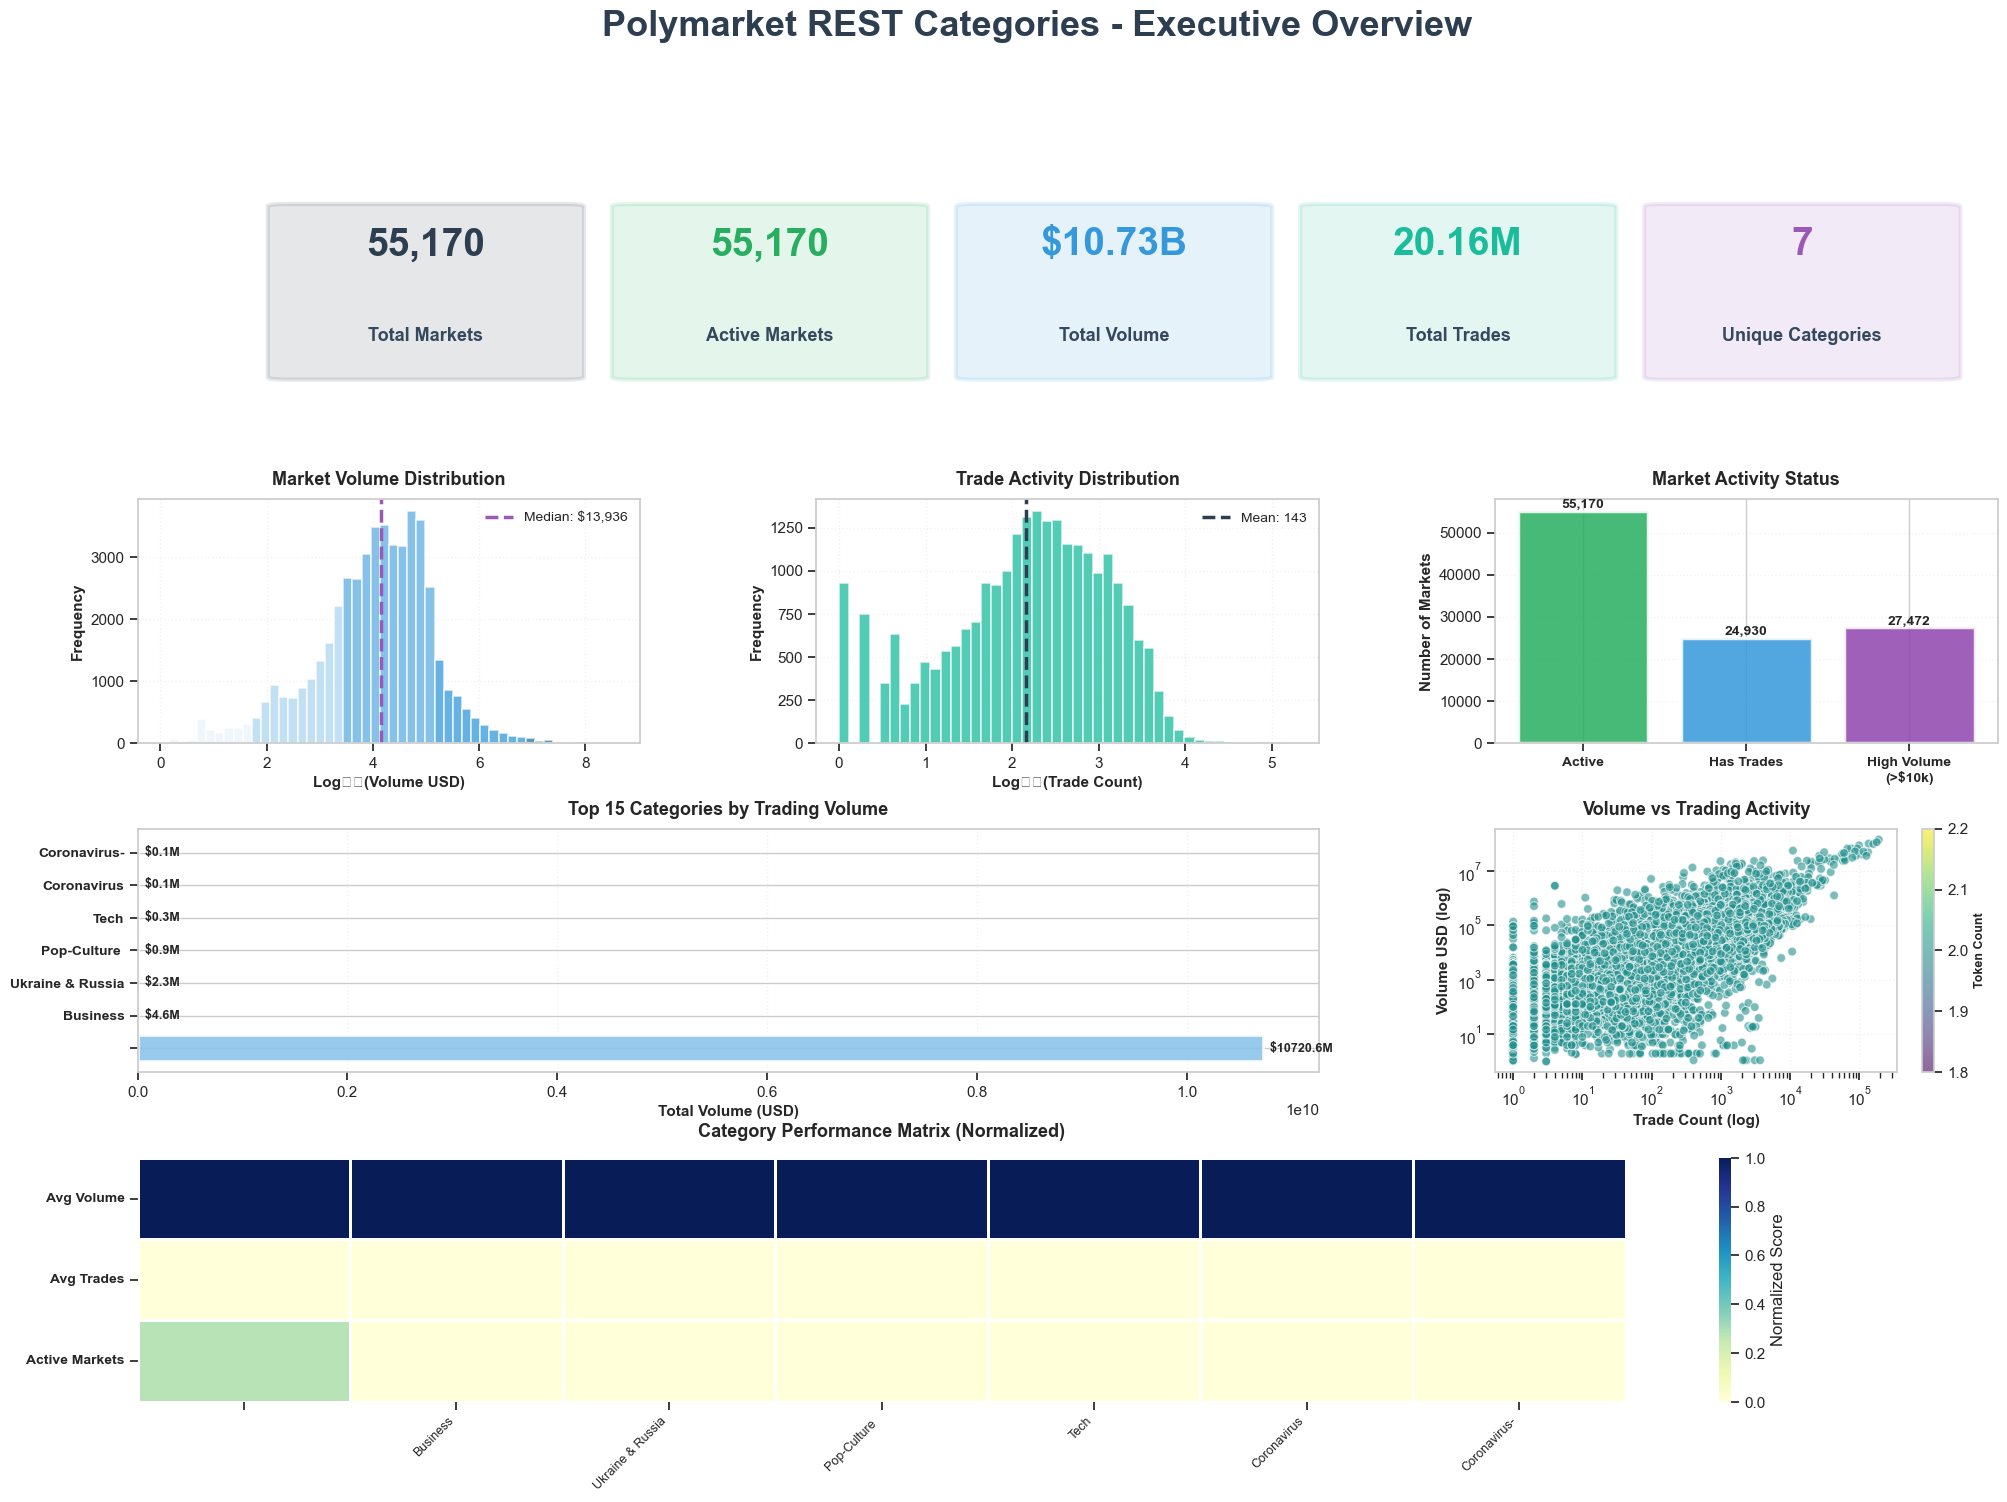

✓ [2/6] Saved: 02_statistical_analysis.png


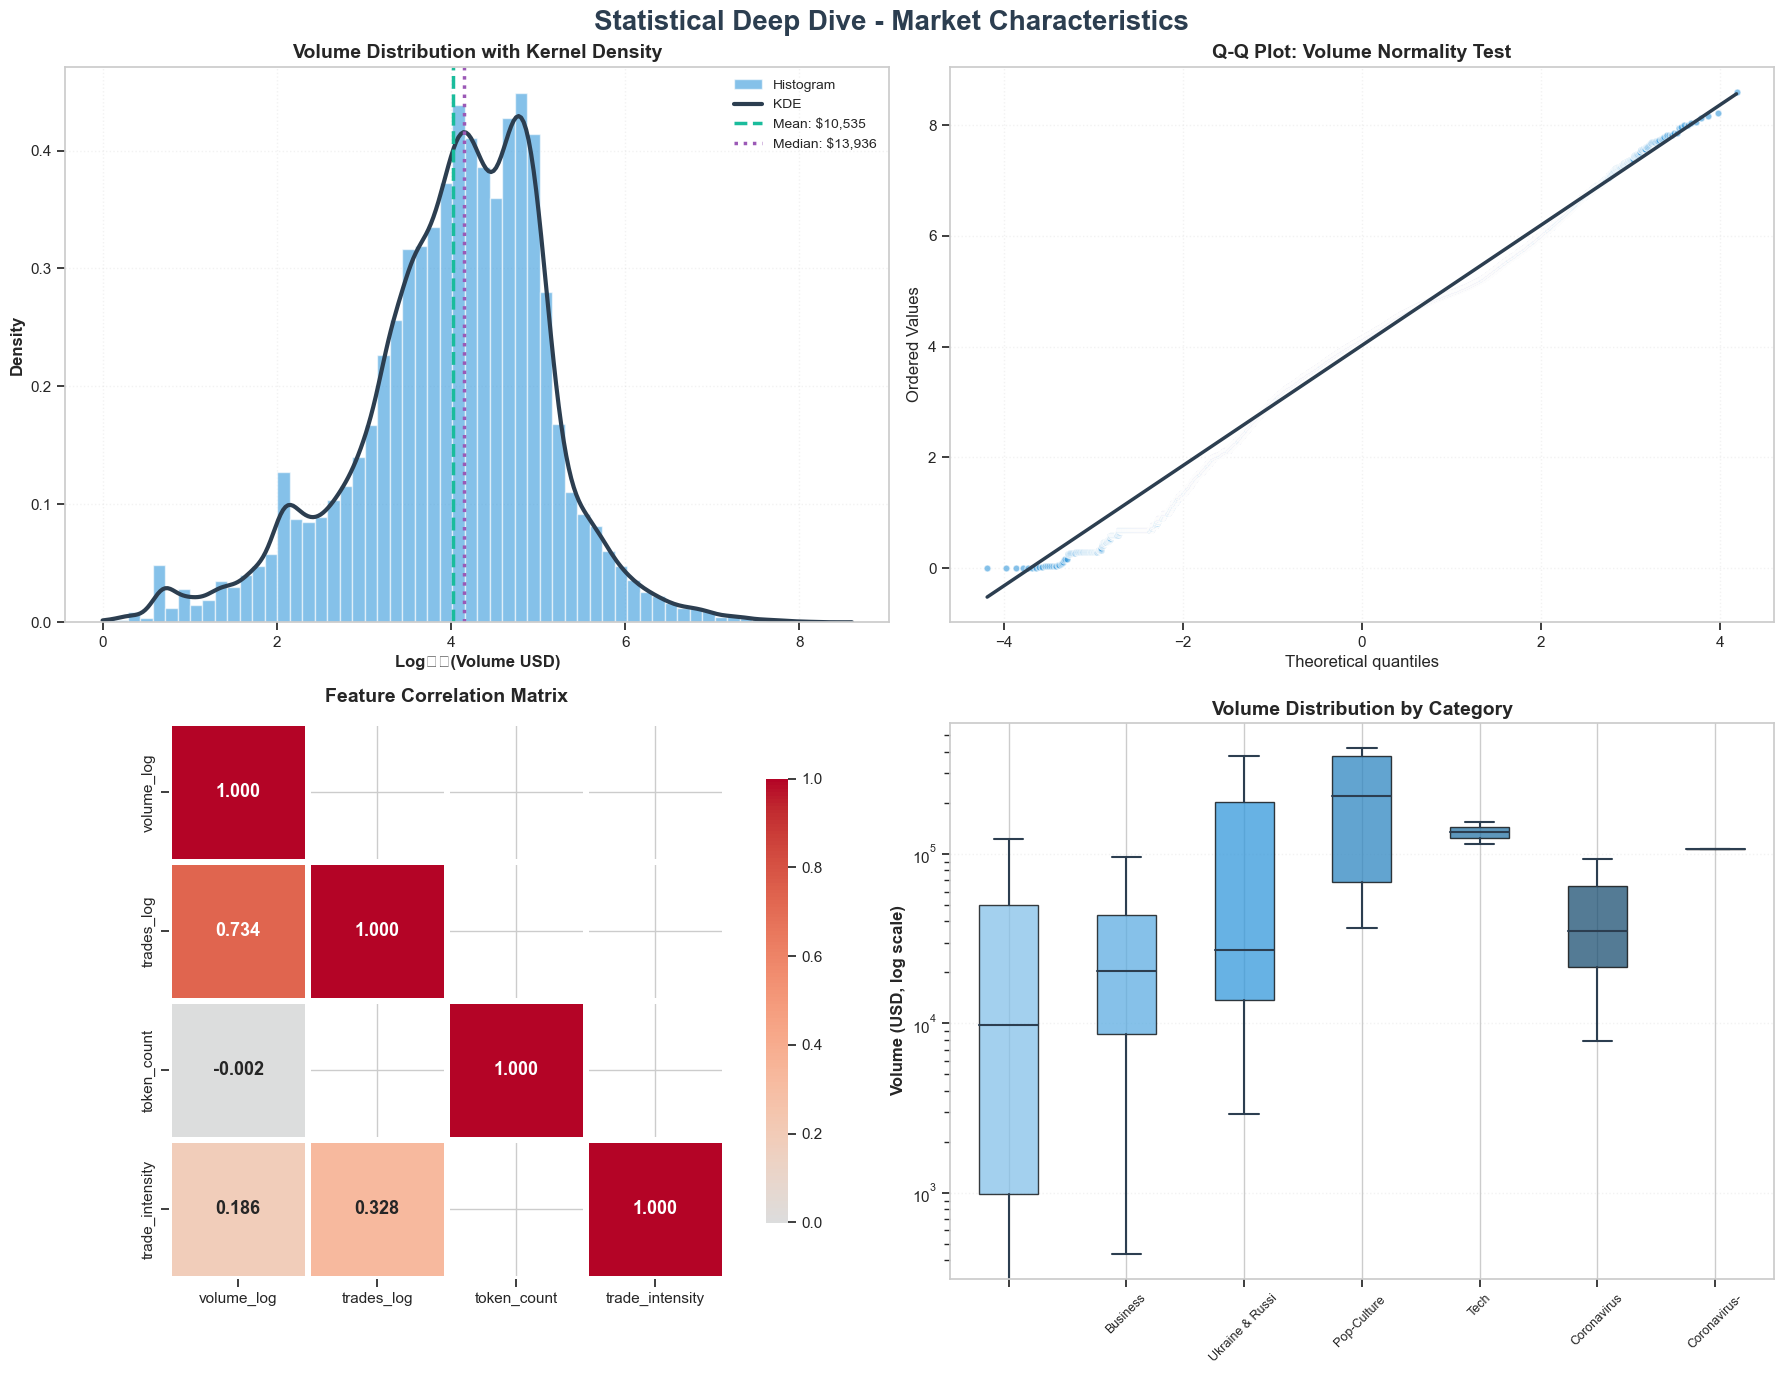

✓ [3/6] Saved: 03_category_insights.png


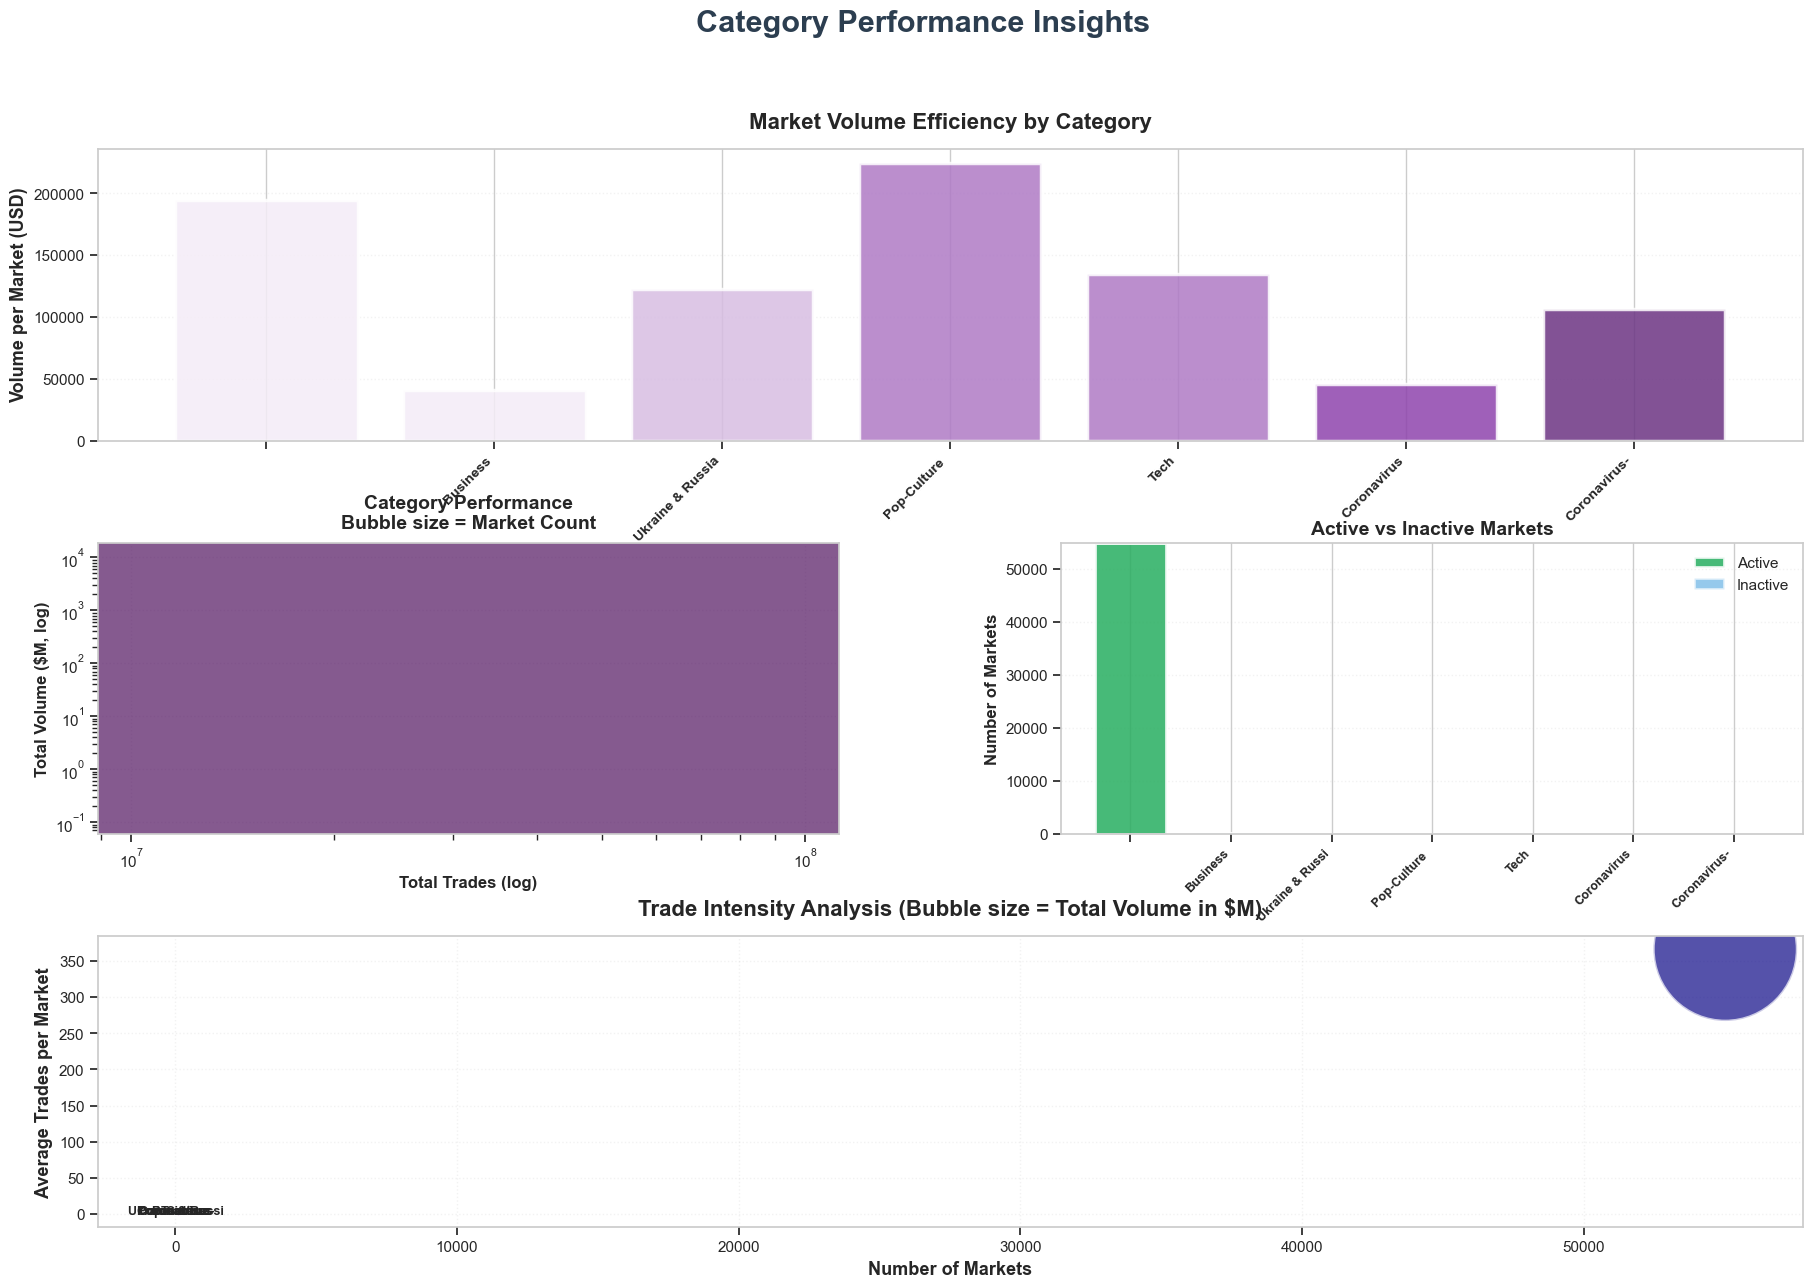

✓ [4/6] Saved: 04_timeseries_analysis.png


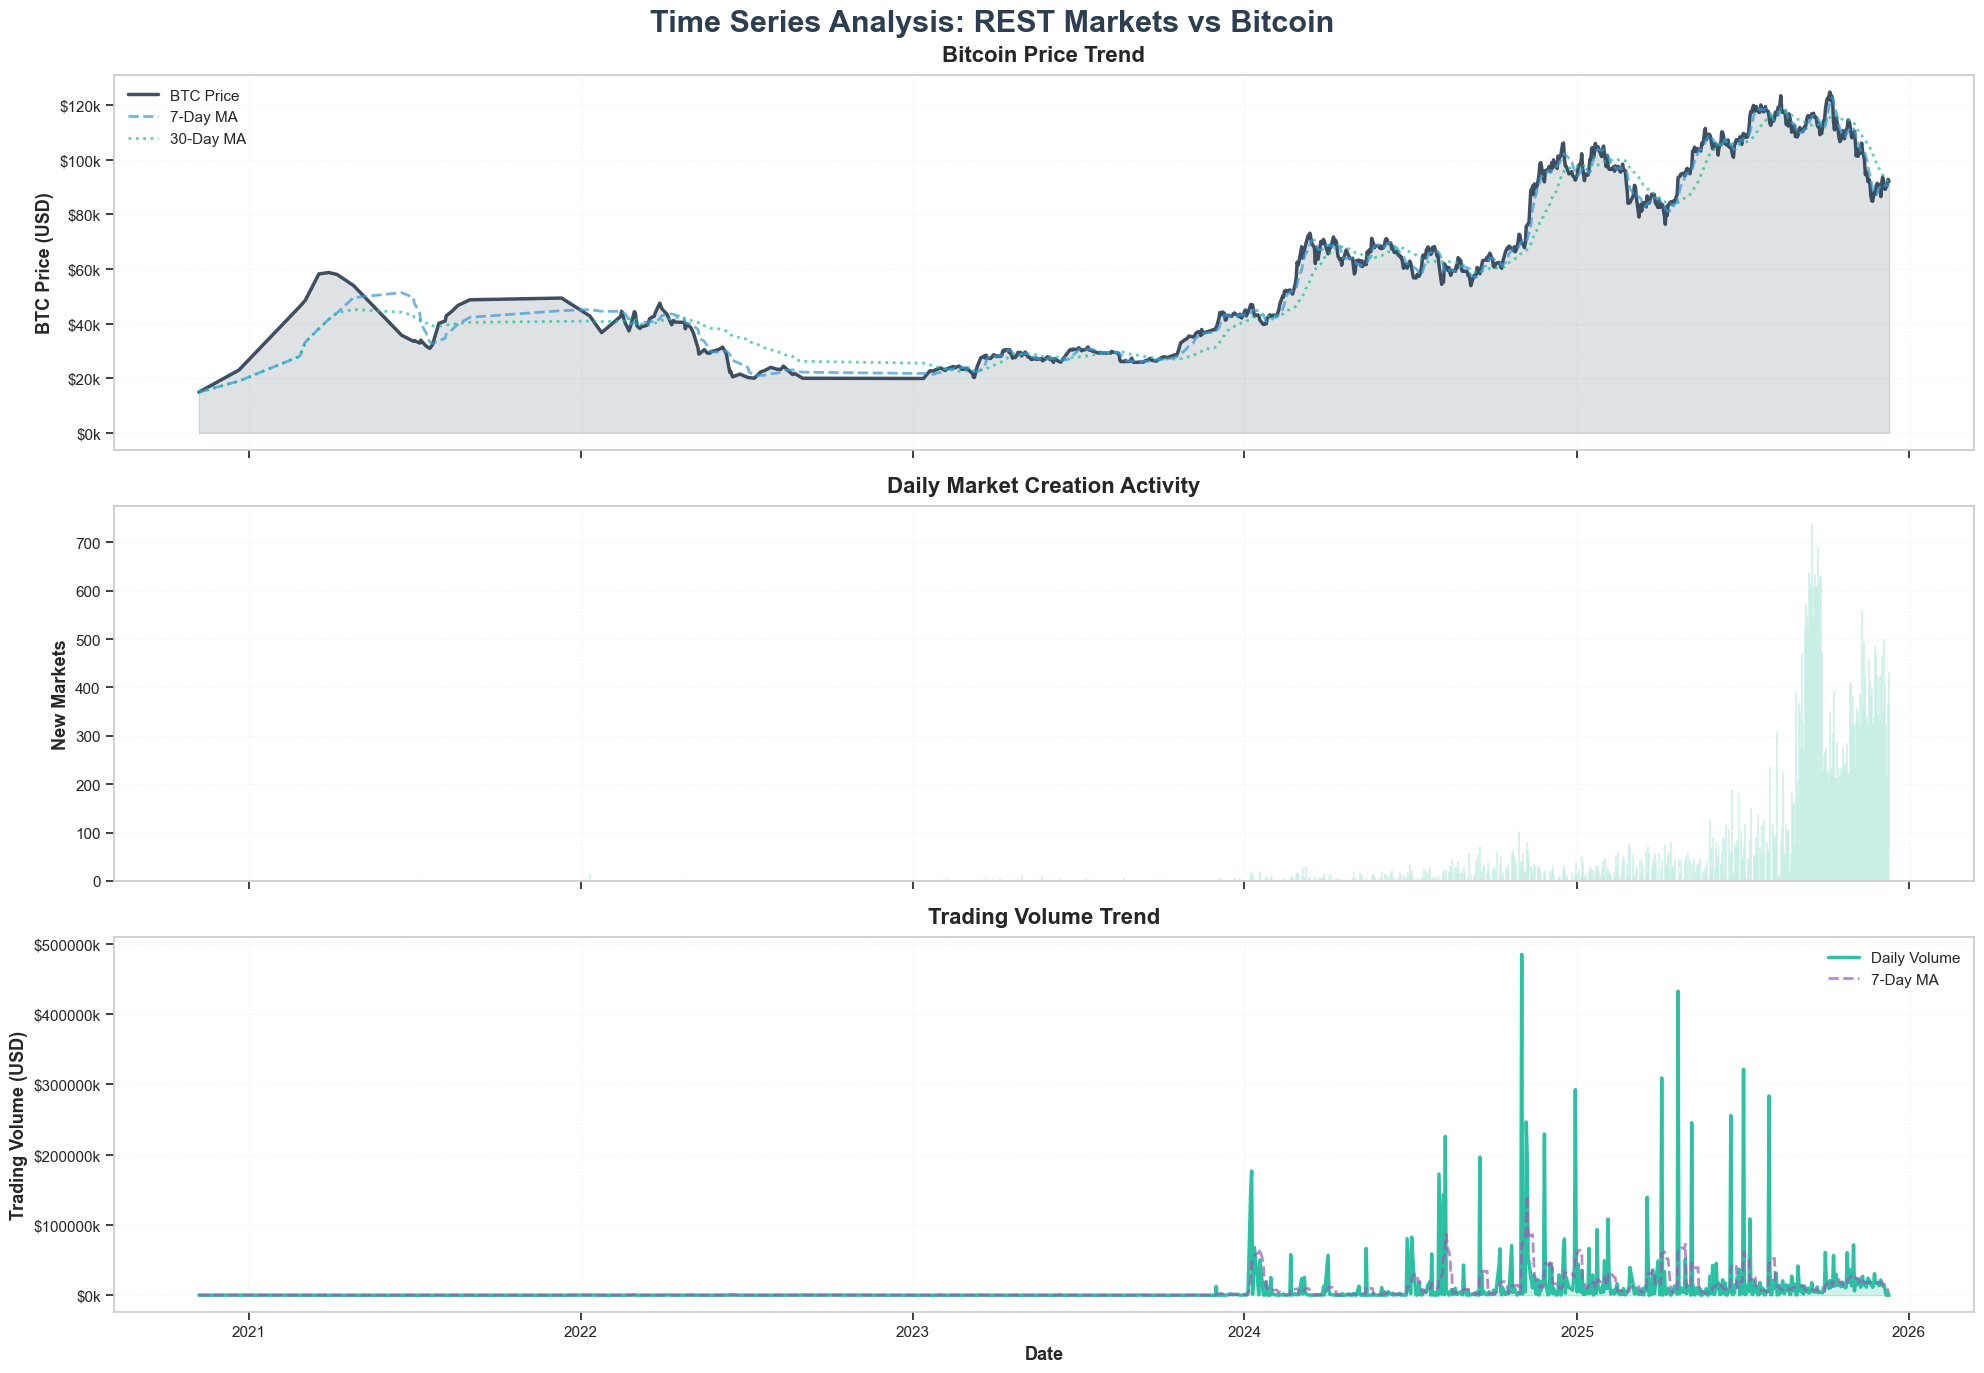

✓ [5/6] Saved: 05_bitcoin_correlation.png


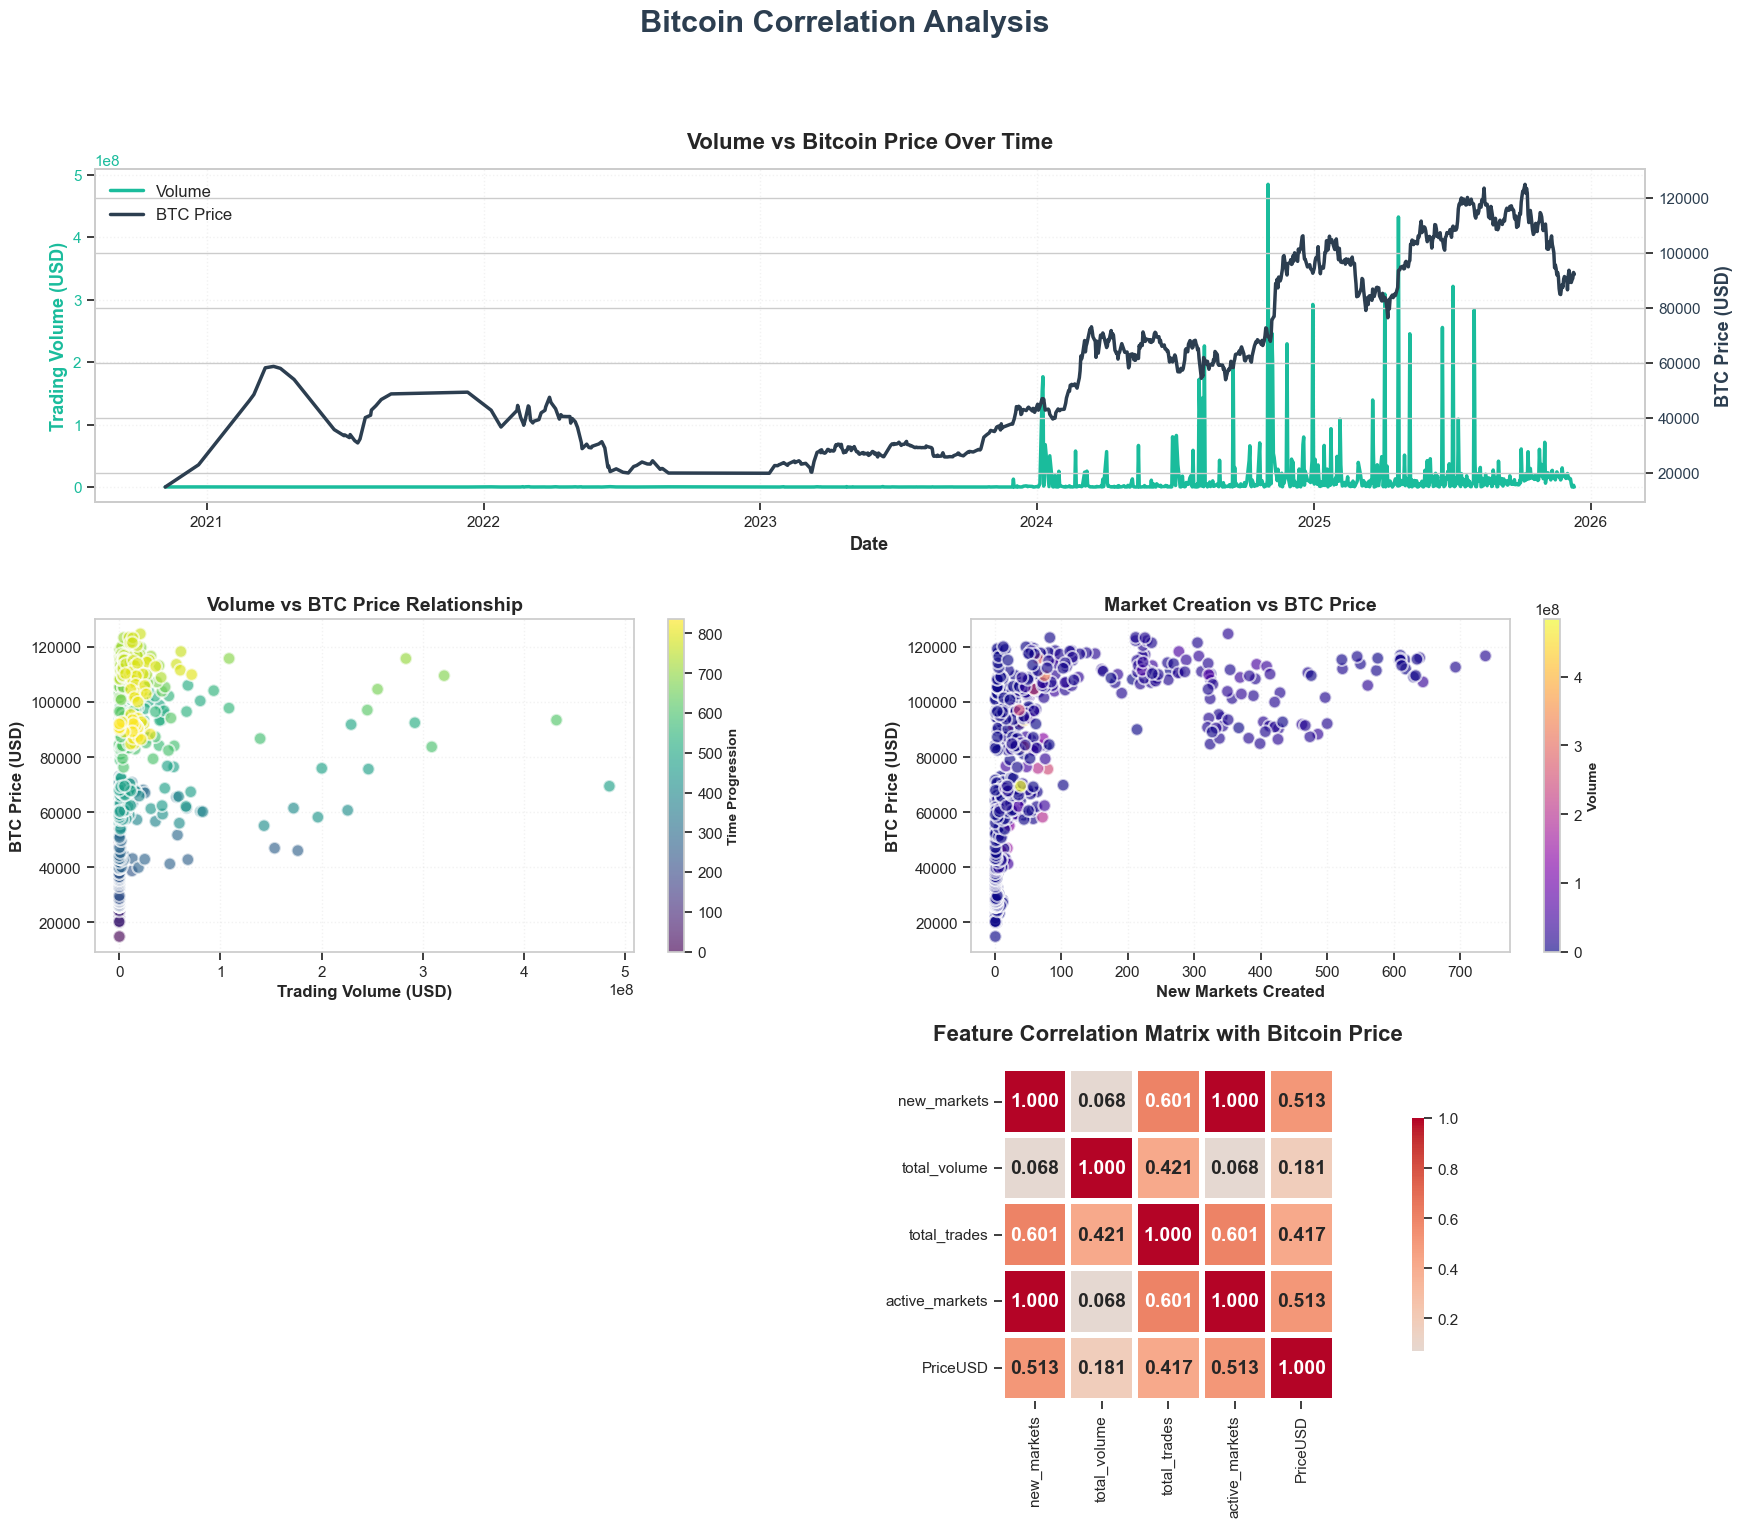


[CORRELATION INSIGHTS]
----------------------------------------------------------------------------------------------------
Correlation with Bitcoin Price:
  new_markets         :  0.5129 (Moderate positive)
  total_volume        :  0.1810 (Weak positive)
  total_trades        :  0.4168 (Moderate positive)
  active_markets      :  0.5129 (Moderate positive)
✓ [6/6] Saved: 06_advanced_timeseries.png


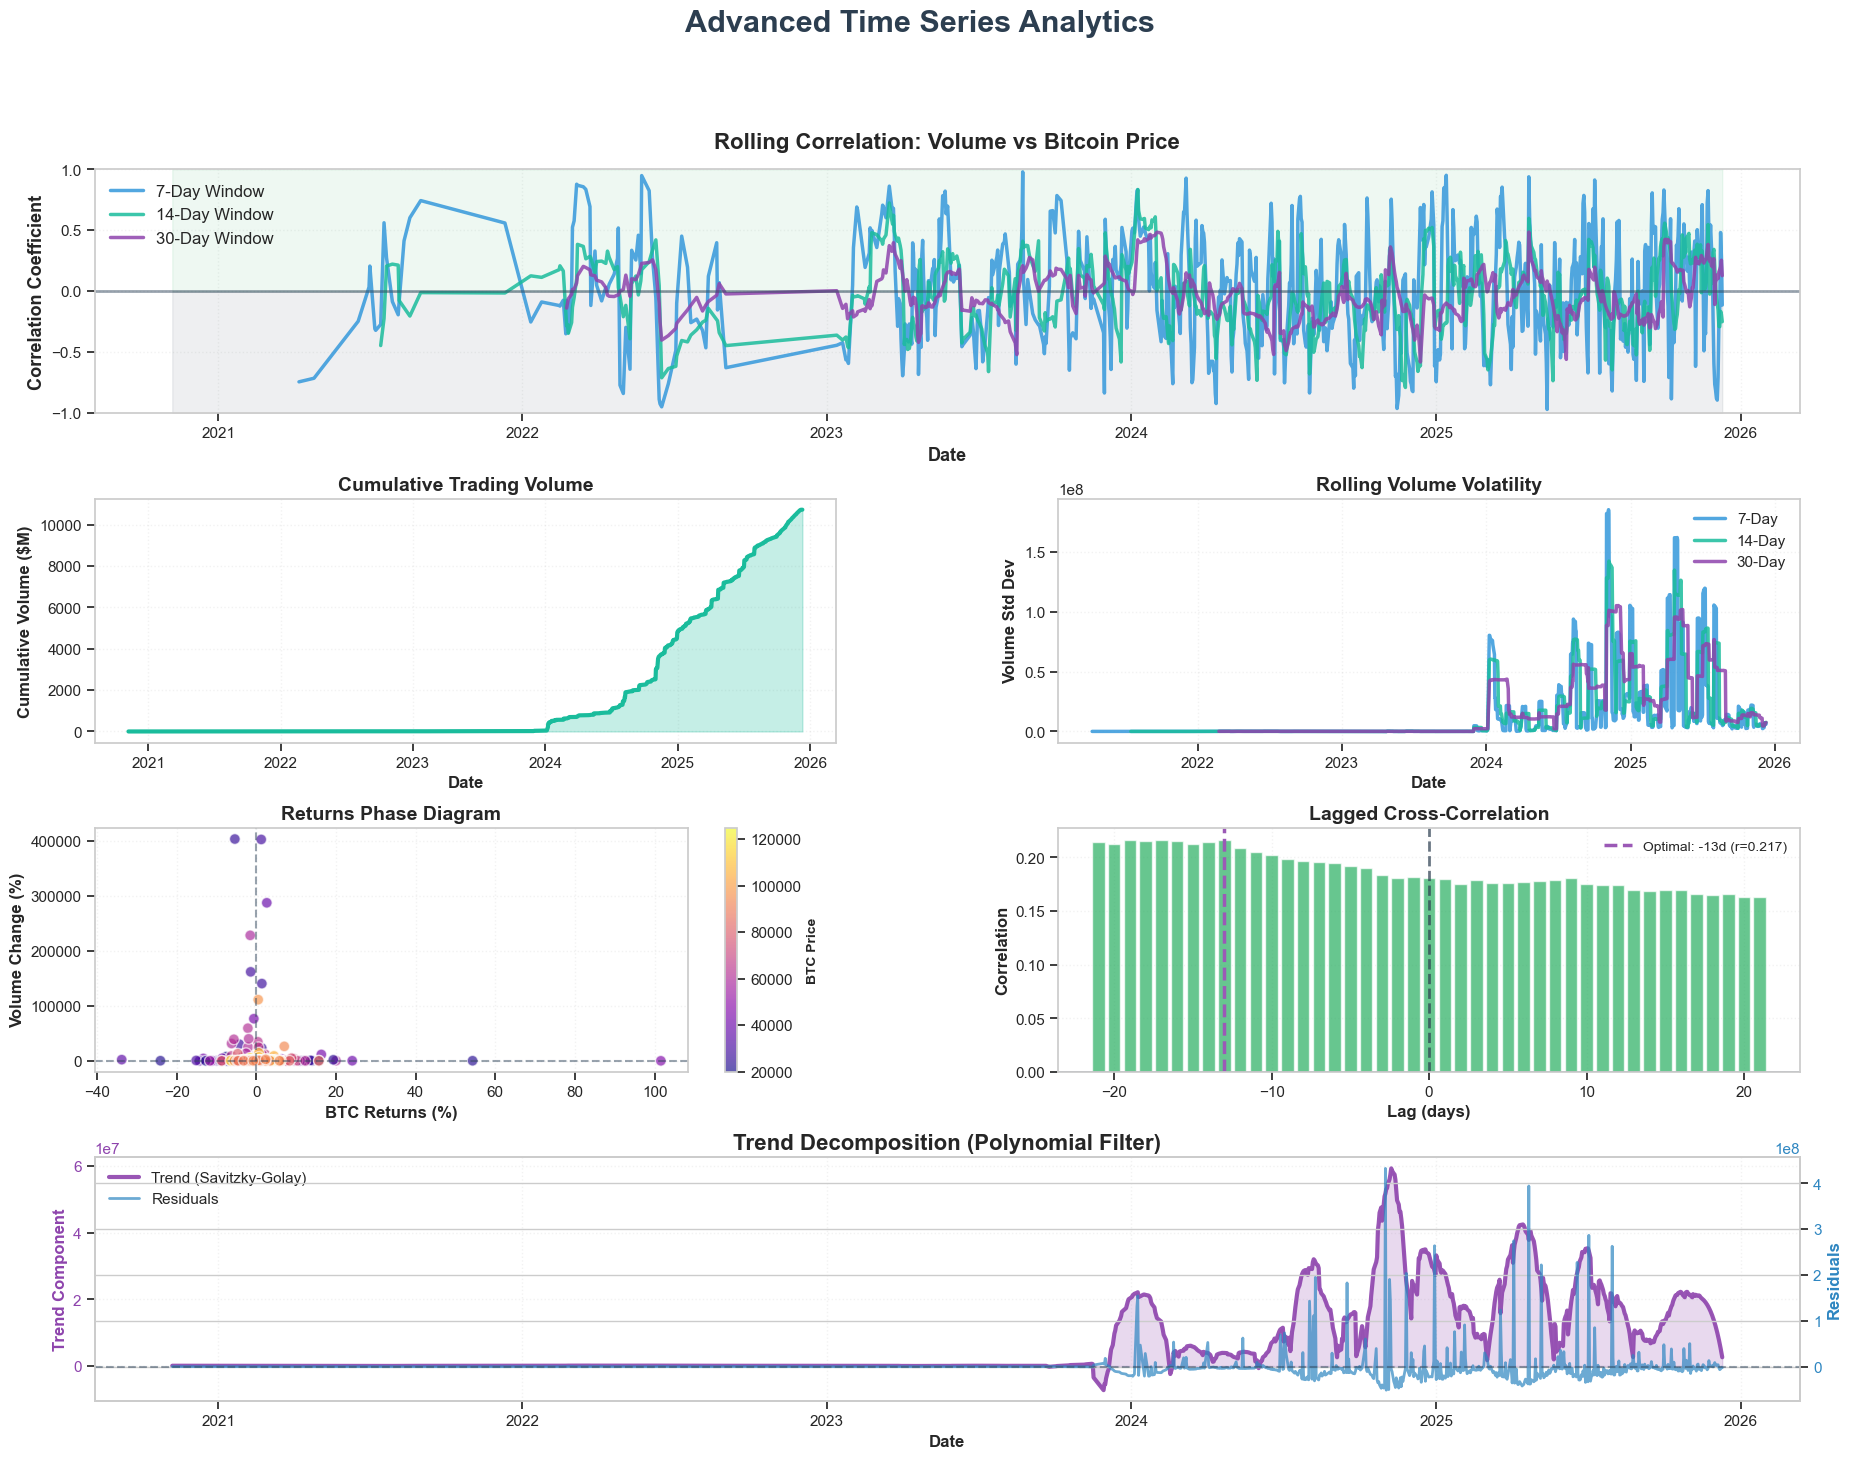


[TIME SERIES INSIGHTS]
----------------------------------------------------------------------------------------------------
Optimal lag: -13 days (correlation: 0.2167)
Interpretation: Volume LEADS Bitcoin by 13 days

                              ANALYSIS COMPLETE - SUMMARY

[DATASET SUMMARY]
  Total Markets            : 55170
  Active Markets           : 55170
  Unique Categories        : 7
  Total Volume             : $10,728,991,910.42
  Median Volume            : $9,853.34
  Total Trades             : 20,160,854
  Markets with Trades      : 24930

[TOP 5 CATEGORIES]
  1.                               
     Volume: $10,720,640,417 | Markets: 55,028 | Trades: 20,160,854
  2. Business                      
     Volume: $4,617,340 | Markets: 113 | Trades: 0
  3. Ukraine & Russia              
     Volume: $2,323,593 | Markets: 19 | Trades: 0
  4. Pop-Culture                   
     Volume: $898,160 | Markets: 4 | Trades: 0
  5. Tech                          
     Volume: $269,208 | Ma

In [44]:
"""
COMPREHENSIVE EDA FOR REST CATEGORIES (FINAL FIXED VERSION)
Professional Analysis with Bitcoin Correlation
Timestamps fixed using created_at + inf values handled

Author: Melissa - LSE Data Science MSc
Date: February 2026
Status: PRODUCTION READY ✅
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
from scipy import stats
from scipy.signal import savgol_filter
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# ============================================
# CONFIGURATION & STYLING
# ============================================

# Professional color palettes (avoiding red/orange/yellow)
PALETTE_MAIN = {
    'primary': '#2C3E50',      # Dark blue-grey
    'secondary': '#3498DB',    # Bright blue
    'accent': '#1ABC9C',       # Teal
    'highlight': '#9B59B6',    # Purple
    'success': '#27AE60',      # Green
    'info': '#5DADE2',         # Light blue
    'dark': '#34495E',         # Dark grey
}

PALETTE_GRADIENT = {
    'blues': ['#EBF5FB', '#AED6F1', '#5DADE2', '#3498DB', '#2874A6', '#1B4F72'],
    'purples': ['#F4ECF7', '#D7BDE2', '#AF7AC5', '#8E44AD', '#6C3483', '#4A235A'],
    'teals': ['#E8F8F5', '#A3E4D7', '#52BE80', '#1ABC9C', '#17A589', '#138D75'],
    'greens': ['#E8F6F3', '#A9DFBF', '#52BE80', '#27AE60', '#1E8449', '#145A32'],
    'ocean': ['#85C1E9', '#5DADE2', '#3498DB', '#2E86C1', '#2874A6', '#1B4F72'],
}

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.0)
sns.set_palette(PALETTE_GRADIENT['ocean'])

# Create output directory
PLOTS_DIR = Path('plots/rest_eda_final')
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("="*100)
print(" " * 20 + "COMPREHENSIVE EDA: REST CATEGORIES vs BITCOIN")
print(" " * 30 + "Polymarket Analysis 2026")
print("="*100)

# ============================================
# STEP 1: DATA LOADING & PREPROCESSING
# ============================================

print("\n[STEP 1] DATA LOADING & PREPROCESSING")
print("-" * 100)

try:
    markets_df = poly_data['markets'].copy()
    summary_df = poly_data['summary'].copy()
    btc_pandas = btc_df.copy() if isinstance(btc_df, pd.DataFrame) else btc_df.to_pandas()
    print(f"✓ Markets loaded: {len(markets_df):,} rows")
    print(f"✓ Summary loaded: {len(summary_df):,} rows")
    print(f"✓ Bitcoin loaded: {len(btc_pandas):,} rows")
except Exception as e:
    print(f"✗ Error loading data: {e}")
    print("Please ensure poly_data and btc_df are loaded in the notebook")
    raise

# ============================================
# STEP 2: TIMESTAMP CORRECTION (using created_at - FIXED!)
# ============================================

print("\n[STEP 2] TIMESTAMP CORRECTION (using created_at)")
print("-" * 100)

# Merge for trade_count and token_count
markets_full = markets_df.merge(
    summary_df[['market_id', 'trade_count', 'token_count']],
    on='market_id',
    how='left'
)

print(f"✓ Merged with summary: {len(markets_full):,}")

# Fix created_at timestamps
print(f"\n  Processing created_at:")
if 'created_at' not in markets_full.columns:
    print(f"  ✗ created_at column not found!")
    raise ValueError("created_at column missing")

print(f"    Dtype: {markets_full['created_at'].dtype}")

if not pd.api.types.is_datetime64_any_dtype(markets_full['created_at']):
    print(f"    Converting to datetime...")
    markets_full['created_at'] = pd.to_datetime(markets_full['created_at'], errors='coerce')

# Check for corruption
non_null = markets_full['created_at'].dropna()
if len(non_null) > 0:
    print(f"    Non-null: {len(non_null):,}")
    print(f"    Range: {non_null.min()} to {non_null.max()}")
    
    # Fix if corrupted (max before 2020)
    if non_null.max() < pd.Timestamp("2020-01-01"):
        print(f"  ⚠️ Corruption detected! Fixing...")
        ns_values = markets_full['created_at'].values.astype("datetime64[ns]").astype("int64")
        markets_full['created_at'] = pd.to_datetime(ns_values * 1000)
        
        # Remove pre-2020
        mask = markets_full['created_at'] < pd.Timestamp("2020-01-01")
        if mask.any():
            print(f"    Removing {mask.sum():,} pre-2020 dates")
            markets_full.loc[mask, 'created_at'] = pd.NaT
        
        print(f"  ✓ Fixed! Range: {markets_full['created_at'].min()} to {markets_full['created_at'].max()}")

# Also fix end_date if exists
if 'end_date' in markets_full.columns:
    if not pd.api.types.is_datetime64_any_dtype(markets_full['end_date']):
        markets_full['end_date'] = pd.to_datetime(markets_full['end_date'], errors='coerce')
    
    non_null_end = markets_full['end_date'].dropna()
    if len(non_null_end) > 0 and non_null_end.max() < pd.Timestamp("2020-01-01"):
        ns_values = markets_full['end_date'].values.astype("datetime64[ns]").astype("int64")
        markets_full['end_date'] = pd.to_datetime(ns_values * 1000)
        mask = markets_full['end_date'] < pd.Timestamp("2020-01-01")
        if mask.any():
            markets_full.loc[mask, 'end_date'] = pd.NaT

valid_created = markets_full['created_at'].notna().sum()
valid_end = markets_full['end_date'].notna().sum() if 'end_date' in markets_full.columns else 0

print(f"\n✓ Valid created_at: {valid_created:,} ({valid_created/len(markets_full)*100:.1f}%)")
if valid_end > 0:
    print(f"✓ Valid end_date: {valid_end:,} ({valid_end/len(markets_full)*100:.1f}%)")

# ============================================
# STEP 3: CATEGORY FILTERING - "REST"
# ============================================

print("\n[STEP 3] FILTERING REST CATEGORIES")
print("-" * 100)

CRYPTO_KEYWORDS = ['bitcoin', 'btc', 'ethereum', 'eth', 'crypto', 'blockchain', 'defi']
POLITICS_KEYWORDS = ['election', 'president', 'trump', 'biden', 'harris', 'congress', 'senate']

def is_rest_category(row):
    """Check if market belongs to 'Rest' categories (less aggressive filtering)"""
    category = str(row.get('category', '')).lower()
    question = str(row.get('question', '')).lower()
    
    # Exclude if category explicitly matches
    if category in ['crypto', 'politics', 'global politics', 'us-current-affairs']:
        return False
    
    # Count keywords
    crypto_count = sum(1 for kw in CRYPTO_KEYWORDS if kw in question)
    politics_count = sum(1 for kw in POLITICS_KEYWORDS if kw in question)
    
    # Only exclude if 2+ keywords (strong indicator)
    if crypto_count >= 2 or politics_count >= 2:
        return False
    
    return True

markets_full['is_rest'] = markets_full.apply(is_rest_category, axis=1)
markets_rest = markets_full[markets_full['is_rest']].copy()

print(f"✓ Total markets: {len(markets_full):,}")
print(f"✓ REST markets: {len(markets_rest):,} ({len(markets_rest)/len(markets_full)*100:.1f}%)")
print(f"✓ Filtered out: {len(markets_full) - len(markets_rest):,} (Strong Crypto + Politics)")

# Calculate additional metrics
markets_rest['volume_per_trade'] = markets_rest['volume'] / markets_rest['trade_count'].replace(0, np.nan)
markets_rest['has_trades'] = markets_rest['trade_count'] > 0
markets_rest['trade_intensity'] = markets_rest['trade_count'] / markets_rest['token_count'].replace(0, np.nan)

# ============================================
# STEP 4: CATEGORY STATISTICS
# ============================================

print("\n[STEP 4] CATEGORY STATISTICS")
print("-" * 100)

# Aggregate by category
category_stats = (
    markets_rest.groupby('category')
    .agg({
        'market_id': 'count',
        'volume': ['sum', 'mean', 'median', 'std'],
        'trade_count': ['sum', 'mean', 'median'],
        'active': 'sum',
        'token_count': ['mean', 'sum'],
    })
)
category_stats.columns = ['_'.join(col).strip() for col in category_stats.columns]
category_stats = category_stats.sort_values('volume_sum', ascending=False)
category_stats = category_stats.reset_index()

print(f"✓ Unique categories: {len(category_stats)}")
print(f"\nTop 10 Categories by Volume:")
for idx, row in category_stats.head(10).iterrows():
    print(f"  {idx+1:2d}. {row['category']:30s} | ${row['volume_sum']:12,.0f} | {int(row['market_id_count']):5,} markets")

# Overall statistics
print(f"\nOverall Metrics:")
print(f"  Total Volume:      ${markets_rest['volume'].sum():,.2f}")
print(f"  Median Volume:     ${markets_rest['volume'].median():,.2f}")
print(f"  Total Trades:      {markets_rest['trade_count'].sum():,.0f}")
print(f"  Active Markets:    {markets_rest['active'].sum():,} ({markets_rest['active'].sum()/len(markets_rest)*100:.1f}%)")

# ============================================
# STEP 5: TIME SERIES PREPARATION
# ============================================

print("\n[STEP 5] TIME SERIES PREPARATION")
print("-" * 100)

# Use created_at instead of first_trade
markets_with_dates = markets_rest[markets_rest['created_at'].notna()].copy()
print(f"✓ Markets with valid created_at: {len(markets_with_dates):,}")

if len(markets_with_dates) > 0:
    date_range = f"{markets_with_dates['created_at'].min().date()} to {markets_with_dates['created_at'].max().date()}"
    print(f"  Date range: {date_range}")
    
    # Aggregate by date
    markets_with_dates['date'] = markets_with_dates['created_at'].dt.date
    
    daily_agg = (
        markets_with_dates.groupby('date')
        .agg({
            'market_id': 'count',
            'volume': 'sum',
            'trade_count': 'sum',
            'active': 'sum',
            'token_count': 'sum',
        })
        .rename(columns={
            'market_id': 'new_markets',
            'volume': 'total_volume',
            'trade_count': 'total_trades',
            'active': 'active_markets',
            'token_count': 'total_tokens',
        })
        .reset_index()
    )
    
    daily_agg['date'] = pd.to_datetime(daily_agg['date'])
    print(f"✓ Daily aggregation: {len(daily_agg):,} days")
    
    # Prepare Bitcoin data
    btc_pandas['time'] = pd.to_datetime(btc_pandas['time'])
    btc_pandas['date'] = btc_pandas['time'].dt.date
    btc_daily = btc_pandas[['date', 'PriceUSD', 'CapMrktCurUSD', 'TxCnt', 'HashRate']].copy()
    btc_daily['date'] = pd.to_datetime(btc_daily['date'])
    btc_daily = btc_daily[btc_daily['PriceUSD'].notna()].copy()
    
    print(f"✓ Bitcoin daily: {len(btc_daily):,} days")
    print(f"  BTC range: {btc_daily['date'].min().date()} to {btc_daily['date'].max().date()}")
    
    # Merge
    merged_df = daily_agg.merge(btc_daily, on='date', how='inner')
    merged_df = merged_df.sort_values('date').reset_index(drop=True)
    
    print(f"✓ Merged dataset: {len(merged_df):,} days with overlap")
    
    if len(merged_df) > 0:
        print(f"  Overlap range: {merged_df['date'].min().date()} to {merged_df['date'].max().date()}")
        
        # Calculate derived features
        merged_df['btc_returns'] = merged_df['PriceUSD'].pct_change()
        merged_df['volume_change'] = merged_df['total_volume'].pct_change()
        merged_df['volume_ma7'] = merged_df['total_volume'].rolling(7, min_periods=1).mean()
        merged_df['volume_ma30'] = merged_df['total_volume'].rolling(30, min_periods=1).mean()
        merged_df['btc_ma7'] = merged_df['PriceUSD'].rolling(7, min_periods=1).mean()
        merged_df['btc_ma30'] = merged_df['PriceUSD'].rolling(30, min_periods=1).mean()
        merged_df['btc_volatility'] = merged_df['btc_returns'].rolling(14, min_periods=1).std()
        
        # Replace inf values with NaN (important for plotting!)
        merged_df['btc_returns'] = merged_df['btc_returns'].replace([np.inf, -np.inf], np.nan)
        merged_df['volume_change'] = merged_df['volume_change'].replace([np.inf, -np.inf], np.nan)
        
        has_timeseries = True
        print(f"✓ Calculated derived features")
    else:
        print("  ⚠ No overlap between Polymarket and Bitcoin data")
        has_timeseries = False
else:
    print("  ⚠ No markets with valid timestamps")
    has_timeseries = False

# ============================================
# VISUALIZATION 1: DATA OVERVIEW DASHBOARD
# ============================================

print("\n[VISUALIZATIONS] Creating comprehensive plots...")
print("-" * 100)

fig = plt.figure(figsize=(24, 16))
gs = GridSpec(4, 3, figure=fig, hspace=0.35, wspace=0.35)
fig.suptitle('Polymarket REST Categories - Executive Overview', 
             fontsize=26, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Key Metrics Cards
ax_metrics = plt.subplot(gs[0, :])
ax_metrics.axis('off')

metrics_data = [
    ('Total Markets', f"{len(markets_rest):,}", PALETTE_MAIN['primary']),
    ('Active Markets', f"{markets_rest['active'].sum():,}", PALETTE_MAIN['success']),
    ('Total Volume', f"${markets_rest['volume'].sum()/1e9:.2f}B", PALETTE_MAIN['secondary']),
    ('Total Trades', f"{markets_rest['trade_count'].sum()/1e6:.2f}M", PALETTE_MAIN['accent']),
    ('Unique Categories', f"{markets_rest['category'].nunique()}", PALETTE_MAIN['highlight']),
]

for i, (label, value, color) in enumerate(metrics_data):
    x = 0.08 + i * 0.185
    from matplotlib.patches import FancyBboxPatch
    box = FancyBboxPatch((x, 0.15), 0.15, 0.7, transform=ax_metrics.transAxes,
                         boxstyle="round,pad=0.01", facecolor=color, alpha=0.12,
                         edgecolor=color, linewidth=3)
    ax_metrics.add_patch(box)
    ax_metrics.text(x + 0.075, 0.65, value, transform=ax_metrics.transAxes,
                   fontsize=28, fontweight='bold', ha='center', color=color)
    ax_metrics.text(x + 0.075, 0.30, label, transform=ax_metrics.transAxes,
                   fontsize=13, ha='center', color=PALETTE_MAIN['dark'], fontweight='600')

# 2. Volume Distribution Histogram
ax1 = plt.subplot(gs[1, 0])
volume_positive = markets_rest[markets_rest['volume'] > 0]['volume']
log_volume = np.log10(volume_positive)
counts, bins, patches = ax1.hist(log_volume, bins=50, color=PALETTE_GRADIENT['blues'][3], 
                                  alpha=0.75, edgecolor='white', linewidth=1.2)
# Gradient coloring
for i, patch in enumerate(patches):
    patch.set_facecolor(PALETTE_GRADIENT['blues'][min(int(i/len(patches)*5), 5)])
ax1.axvline(log_volume.median(), color=PALETTE_MAIN['highlight'], linestyle='--', 
           linewidth=2.5, label=f'Median: ${10**log_volume.median():,.0f}')
ax1.set_xlabel('Log₁₀(Volume USD)', fontsize=11, fontweight='600')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax1.set_title('Market Volume Distribution', fontsize=13, fontweight='bold', pad=10)
ax1.legend(fontsize=10, framealpha=0.95)
ax1.grid(True, alpha=0.25, linestyle=':')

# 3. Trade Count Distribution
ax2 = plt.subplot(gs[1, 1])
trade_positive = markets_rest[markets_rest['trade_count'] > 0]['trade_count']
log_trades = np.log10(trade_positive)
ax2.hist(log_trades, bins=45, color=PALETTE_GRADIENT['teals'][3], 
        alpha=0.75, edgecolor='white', linewidth=1.2)
ax2.axvline(log_trades.mean(), color=PALETTE_MAIN['primary'], linestyle='--', 
           linewidth=2.5, label=f'Mean: {10**log_trades.mean():,.0f}')
ax2.set_xlabel('Log₁₀(Trade Count)', fontsize=11, fontweight='600')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax2.set_title('Trade Activity Distribution', fontsize=13, fontweight='bold', pad=10)
ax2.legend(fontsize=10, framealpha=0.95)
ax2.grid(True, alpha=0.25, linestyle=':')

# 4. Market Status Composition
ax3 = plt.subplot(gs[1, 2])
status_counts = {
    'Active': int(markets_rest['active'].sum()),
    'Has Trades': int(markets_rest['has_trades'].sum()),
    'High Volume\n(>$10k)': int((markets_rest['volume'] > 10000).sum()),
}
colors_status = [PALETTE_GRADIENT['greens'][3], PALETTE_GRADIENT['blues'][3], 
                 PALETTE_GRADIENT['purples'][3]]
bars = ax3.bar(range(len(status_counts)), status_counts.values(), color=colors_status,
              alpha=0.85, edgecolor='white', linewidth=2.5)
ax3.set_xticks(range(len(status_counts)))
ax3.set_xticklabels(status_counts.keys(), fontsize=10, fontweight='600')
ax3.set_ylabel('Number of Markets', fontsize=11, fontweight='600')
ax3.set_title('Market Activity Status', fontsize=13, fontweight='bold', pad=10)
ax3.grid(axis='y', alpha=0.25, linestyle=':')
for i, (bar, val) in enumerate(zip(bars, status_counts.values())):
    ax3.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Top Categories by Volume
ax4 = plt.subplot(gs[2, :2])
top_15_cats = category_stats.head(15)
y_pos = np.arange(len(top_15_cats))
colors_gradient = [PALETTE_GRADIENT['ocean'][int(i/len(top_15_cats)*5)] for i in range(len(top_15_cats))]
bars = ax4.barh(y_pos, top_15_cats['volume_sum'], color=colors_gradient, 
               alpha=0.85, edgecolor='white', linewidth=2)
ax4.set_yticks(y_pos)
ax4.set_yticklabels(top_15_cats['category'], fontsize=10, fontweight='600')
ax4.set_xlabel('Total Volume (USD)', fontsize=11, fontweight='600')
ax4.set_title('Top 15 Categories by Trading Volume', fontsize=13, fontweight='bold', pad=10)
ax4.grid(axis='x', alpha=0.25, linestyle=':')
for i, (y, val) in enumerate(zip(y_pos, top_15_cats['volume_sum'])):
    ax4.text(val, y, f'  ${val/1e6:.1f}M', va='center', fontsize=9, fontweight='600')

# 6. Volume vs Trades Scatter
ax5 = plt.subplot(gs[2, 2])
scatter_data = markets_rest[(markets_rest['trade_count'] > 0) & (markets_rest['volume'] > 0)].copy()
scatter = ax5.scatter(scatter_data['trade_count'], scatter_data['volume'],
                     c=scatter_data['token_count'], cmap='viridis', s=40, alpha=0.6,
                     edgecolors='white', linewidth=0.8)
ax5.set_xlabel('Trade Count (log)', fontsize=11, fontweight='600')
ax5.set_ylabel('Volume USD (log)', fontsize=11, fontweight='600')
ax5.set_title('Volume vs Trading Activity', fontsize=13, fontweight='bold', pad=10)
ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.grid(True, alpha=0.25, linestyle=':')
cbar = plt.colorbar(scatter, ax=ax5)
cbar.set_label('Token Count', fontsize=9, fontweight='600')

# 7. Category Performance Heatmap
ax6 = plt.subplot(gs[3, :])
top_12_heat = category_stats.head(12)
heatmap_data = top_12_heat[['volume_mean', 'trade_count_mean', 'active_sum']].T
heatmap_data.index = ['Avg Volume', 'Avg Trades', 'Active Markets']
heatmap_data.columns = top_12_heat['category']
# Normalize
heatmap_norm = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
sns.heatmap(heatmap_norm, annot=False, cmap='YlGnBu', ax=ax6, cbar_kws={'label': 'Normalized Score'},
           linewidths=2, linecolor='white', square=False)
ax6.set_title('Category Performance Matrix (Normalized)', fontsize=13, fontweight='bold', pad=15)
ax6.set_xlabel('')
ax6.set_ylabel('', fontsize=11, fontweight='600')
plt.setp(ax6.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.setp(ax6.get_yticklabels(), rotation=0, fontsize=10, fontweight='600')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '01_executive_overview.png', dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ [1/6] Saved: 01_executive_overview.png")
plt.show()

# ============================================
# VISUALIZATION 2: STATISTICAL ANALYSIS
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Statistical Deep Dive - Market Characteristics', 
             fontsize=20, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Volume Distribution with KDE
ax = axes[0, 0]
from scipy import stats as sp_stats
kde = sp_stats.gaussian_kde(log_volume)
x_range = np.linspace(log_volume.min(), log_volume.max(), 300)
ax.hist(log_volume, bins=60, density=True, alpha=0.6, color=PALETTE_GRADIENT['blues'][3], 
       edgecolor='white', linewidth=1, label='Histogram')
ax.plot(x_range, kde(x_range), color=PALETTE_MAIN['primary'], linewidth=3, label='KDE')
ax.axvline(log_volume.mean(), color=PALETTE_MAIN['accent'], linestyle='--', linewidth=2.5, 
          label=f'Mean: ${10**log_volume.mean():,.0f}')
ax.axvline(log_volume.median(), color=PALETTE_MAIN['highlight'], linestyle=':', linewidth=2.5,
          label=f'Median: ${10**log_volume.median():,.0f}')
ax.set_xlabel('Log₁₀(Volume USD)', fontsize=12, fontweight='600')
ax.set_ylabel('Density', fontsize=12, fontweight='600')
ax.set_title('Volume Distribution with Kernel Density', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle=':')

# 2. Q-Q Plot
ax = axes[0, 1]
sp_stats.probplot(log_volume, dist="norm", plot=ax)
ax.get_lines()[0].set_markerfacecolor(PALETTE_MAIN['secondary'])
ax.get_lines()[0].set_markeredgecolor('white')
ax.get_lines()[0].set_markersize(5)
ax.get_lines()[0].set_alpha(0.6)
ax.get_lines()[1].set_color(PALETTE_MAIN['primary'])
ax.get_lines()[1].set_linewidth(2.5)
ax.set_title('Q-Q Plot: Volume Normality Test', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')

# 3. Correlation Matrix
ax = axes[1, 0]
corr_cols = ['volume', 'trade_count', 'token_count', 'trade_intensity']
corr_data = markets_rest[corr_cols].copy()
corr_data['volume_log'] = np.log10(corr_data['volume'].replace(0, np.nan))
corr_data['trades_log'] = np.log10(corr_data['trade_count'].replace(0, np.nan))
corr_matrix_static = corr_data[['volume_log', 'trades_log', 'token_count', 'trade_intensity']].corr()
mask = np.triu(np.ones_like(corr_matrix_static, dtype=bool), k=1)
sns.heatmap(corr_matrix_static, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', center=0,
           square=True, linewidths=3, cbar_kws={"shrink": 0.8}, ax=ax,
           annot_kws={'size': 13, 'weight': 'bold'})
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=15)

# 4. Box Plot Comparison
ax = axes[1, 1]
top_8_cats = category_stats.head(8)['category'].tolist()
box_data = [markets_rest[markets_rest['category'] == cat]['volume'].dropna().values 
           for cat in top_8_cats]
bp = ax.boxplot(box_data, labels=[c[:15] for c in top_8_cats], patch_artist=True, showfliers=False)
for patch, color in zip(bp['boxes'], PALETTE_GRADIENT['ocean']):
    patch.set_facecolor(color)
    patch.set_alpha(0.75)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color=PALETTE_MAIN['primary'], linewidth=1.5)
ax.set_ylabel('Volume (USD, log scale)', fontsize=12, fontweight='600')
ax.set_title('Volume Distribution by Category', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.grid(axis='y', alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '02_statistical_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ [2/6] Saved: 02_statistical_analysis.png")
plt.show()

# ============================================
# VISUALIZATION 3: CATEGORY INSIGHTS
# ============================================

fig = plt.figure(figsize=(22, 14))
gs = GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.3)
fig.suptitle('Category Performance Insights', 
             fontsize=22, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Volume Efficiency
ax1 = plt.subplot(gs[0, :])
top_15_cats = category_stats.head(15).copy()
top_15_cats['efficiency'] = top_15_cats['volume_sum'] / top_15_cats['market_id_count']
colors_gradient = [PALETTE_GRADIENT['purples'][int(i/len(top_15_cats)*5)] for i in range(len(top_15_cats))]
bars = ax1.bar(range(len(top_15_cats)), top_15_cats['efficiency'], color=colors_gradient,
              alpha=0.85, edgecolor='white', linewidth=2.5)
ax1.set_xticks(range(len(top_15_cats)))
ax1.set_xticklabels(top_15_cats['category'], rotation=45, ha='right', fontsize=10, fontweight='600')
ax1.set_ylabel('Volume per Market (USD)', fontsize=13, fontweight='600')
ax1.set_title('Market Volume Efficiency by Category', fontsize=16, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.25, linestyle=':')

# 2. Bubble Chart
ax2 = plt.subplot(gs[1, 0])
bubble_data = category_stats.head(12).copy()
scatter = ax2.scatter(bubble_data['trade_count_sum'], bubble_data['volume_sum']/1e6,
                     s=bubble_data['market_id_count']*15, 
                     c=range(len(bubble_data)), cmap='viridis',
                     alpha=0.65, edgecolors='white', linewidth=2)
for idx, row in bubble_data.iterrows():
    ax2.annotate(row['category'][:12], 
                (row['trade_count_sum'], row['volume_sum']/1e6),
                fontsize=8, ha='center', fontweight='600')
ax2.set_xlabel('Total Trades (log)', fontsize=12, fontweight='600')
ax2.set_ylabel('Total Volume ($M, log)', fontsize=12, fontweight='600')
ax2.set_title('Category Performance\nBubble size = Market Count', 
             fontsize=14, fontweight='bold', pad=10)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.25, linestyle=':')

# 3. Active vs Inactive
ax3 = plt.subplot(gs[1, 1])
top_10_cats = category_stats.head(10)
active_counts = []
inactive_counts = []
for cat in top_10_cats['category']:
    cat_data = markets_rest[markets_rest['category'] == cat]
    active_counts.append(int(cat_data['active'].sum()))
    inactive_counts.append(len(cat_data) - int(cat_data['active'].sum()))

x = np.arange(len(top_10_cats))
width = 0.7
p1 = ax3.bar(x, active_counts, width, label='Active', 
            color=PALETTE_GRADIENT['greens'][3], alpha=0.85, edgecolor='white', linewidth=2)
p2 = ax3.bar(x, inactive_counts, width, bottom=active_counts, label='Inactive',
            color=PALETTE_GRADIENT['blues'][2], alpha=0.65, edgecolor='white', linewidth=2)
ax3.set_xticks(x)
ax3.set_xticklabels([c[:15] for c in top_10_cats['category']], 
                    rotation=45, ha='right', fontsize=9, fontweight='600')
ax3.set_ylabel('Number of Markets', fontsize=12, fontweight='600')
ax3.set_title('Active vs Inactive Markets', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11, framealpha=0.95)
ax3.grid(axis='y', alpha=0.25, linestyle=':')

# 4. Trade Intensity
ax4 = plt.subplot(gs[2, :])
top_15_cats = category_stats.head(15)
top_15_cats['trade_intensity_cat'] = top_15_cats['trade_count_sum'] / top_15_cats['market_id_count']
scatter = ax4.scatter(top_15_cats['market_id_count'], top_15_cats['trade_intensity_cat'],
                     s=top_15_cats['volume_sum']/1e6, c=range(len(top_15_cats)),
                     cmap='plasma', alpha=0.7, edgecolors='white', linewidth=2)
for idx, row in top_15_cats.iterrows():
    ax4.annotate(row['category'][:15], 
                (row['market_id_count'], row['trade_intensity_cat']),
                fontsize=9, ha='center', fontweight='600')
ax4.set_xlabel('Number of Markets', fontsize=13, fontweight='600')
ax4.set_ylabel('Average Trades per Market', fontsize=13, fontweight='600')
ax4.set_title('Trade Intensity Analysis (Bubble size = Total Volume in $M)', 
             fontsize=16, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '03_category_insights.png', dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ [3/6] Saved: 03_category_insights.png")
plt.show()

# ============================================
# VISUALIZATION 4: TIME SERIES ANALYSIS
# ============================================

if has_timeseries and len(merged_df) > 10:
    
    fig, axes = plt.subplots(3, 1, figsize=(20, 14), sharex=True)
    fig.suptitle('Time Series Analysis: REST Markets vs Bitcoin', 
                 fontsize=22, fontweight='bold', color=PALETTE_MAIN['primary'])
    
    # 1. Bitcoin Price
    ax = axes[0]
    ax.plot(merged_df['date'], merged_df['PriceUSD'], 
           color=PALETTE_MAIN['primary'], linewidth=2.5, label='BTC Price', alpha=0.9)
    ax.plot(merged_df['date'], merged_df['btc_ma7'], 
           color=PALETTE_MAIN['secondary'], linewidth=2, linestyle='--', 
           label='7-Day MA', alpha=0.7)
    ax.plot(merged_df['date'], merged_df['btc_ma30'], 
           color=PALETTE_MAIN['accent'], linewidth=2, linestyle=':', 
           label='30-Day MA', alpha=0.7)
    ax.fill_between(merged_df['date'], merged_df['PriceUSD'], alpha=0.15, 
                    color=PALETTE_MAIN['primary'])
    ax.set_ylabel('BTC Price (USD)', fontsize=13, fontweight='600')
    ax.set_title('Bitcoin Price Trend', fontsize=16, fontweight='bold', pad=10)
    ax.legend(loc='best', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.25, linestyle=':')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))
    
    # 2. New Markets
    ax = axes[1]
    ax.bar(merged_df['date'], merged_df['new_markets'], 
          color=PALETTE_GRADIENT['teals'][3], alpha=0.75, width=1, 
          edgecolor='white', linewidth=0.5)
    ax.set_ylabel('New Markets', fontsize=13, fontweight='600')
    ax.set_title('Daily Market Creation Activity', fontsize=16, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.25, linestyle=':')
    
    # 3. Trading Volume
    ax = axes[2]
    ax.plot(merged_df['date'], merged_df['total_volume'], 
           color=PALETTE_MAIN['accent'], linewidth=2.5, label='Daily Volume', alpha=0.9)
    ax.plot(merged_df['date'], merged_df['volume_ma7'], 
           color=PALETTE_MAIN['highlight'], linewidth=2, linestyle='--', 
           label='7-Day MA', alpha=0.7)
    ax.fill_between(merged_df['date'], merged_df['total_volume'], 
                    alpha=0.2, color=PALETTE_MAIN['accent'])
    ax.set_ylabel('Trading Volume (USD)', fontsize=13, fontweight='600')
    ax.set_xlabel('Date', fontsize=13, fontweight='600')
    ax.set_title('Trading Volume Trend', fontsize=16, fontweight='bold', pad=10)
    ax.legend(loc='best', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.25, linestyle=':')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))
    
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / '04_timeseries_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ [4/6] Saved: 04_timeseries_analysis.png")
    plt.show()

# ============================================
# VISUALIZATION 5: BITCOIN CORRELATION
# ============================================

if has_timeseries and len(merged_df) > 10:
    
    fig = plt.figure(figsize=(20, 16))
    gs = GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.3)
    fig.suptitle('Bitcoin Correlation Analysis', 
                 fontsize=22, fontweight='bold', color=PALETTE_MAIN['primary'])
    
    # 1. Dual Axis
    ax1 = plt.subplot(gs[0, :])
    ax1_twin = ax1.twinx()
    
    ln1 = ax1.plot(merged_df['date'], merged_df['total_volume'], 
                  color=PALETTE_MAIN['accent'], linewidth=2.5, label='Volume')
    ln2 = ax1_twin.plot(merged_df['date'], merged_df['PriceUSD'], 
                       color=PALETTE_MAIN['primary'], linewidth=2.5, label='BTC Price')
    
    ax1.set_ylabel('Trading Volume (USD)', fontsize=13, fontweight='600', 
                  color=PALETTE_MAIN['accent'])
    ax1_twin.set_ylabel('BTC Price (USD)', fontsize=13, fontweight='600', 
                       color=PALETTE_MAIN['primary'])
    ax1.set_xlabel('Date', fontsize=13, fontweight='600')
    ax1.set_title('Volume vs Bitcoin Price Over Time', fontsize=16, fontweight='bold', pad=15)
    ax1.tick_params(axis='y', labelcolor=PALETTE_MAIN['accent'])
    ax1_twin.tick_params(axis='y', labelcolor=PALETTE_MAIN['primary'])
    ax1.grid(True, alpha=0.25, linestyle=':')
    
    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper left', fontsize=12, framealpha=0.95)
    
    # 2. Volume vs BTC Scatter
    ax2 = plt.subplot(gs[1, 0])
    scatter = ax2.scatter(merged_df['total_volume'], merged_df['PriceUSD'],
                         c=merged_df.index, cmap='viridis', s=80, alpha=0.65,
                         edgecolors='white', linewidth=1.5)
    ax2.set_xlabel('Trading Volume (USD)', fontsize=12, fontweight='600')
    ax2.set_ylabel('BTC Price (USD)', fontsize=12, fontweight='600')
    ax2.set_title('Volume vs BTC Price Relationship', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.25, linestyle=':')
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Time Progression', fontsize=10, fontweight='600')
    
    # 3. Markets vs BTC Scatter
    ax3 = plt.subplot(gs[1, 1])
    scatter = ax3.scatter(merged_df['new_markets'], merged_df['PriceUSD'],
                         c=merged_df['total_volume'], cmap='plasma', s=80, alpha=0.65,
                         edgecolors='white', linewidth=1.5)
    ax3.set_xlabel('New Markets Created', fontsize=12, fontweight='600')
    ax3.set_ylabel('BTC Price (USD)', fontsize=12, fontweight='600')
    ax3.set_title('Market Creation vs BTC Price', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.25, linestyle=':')
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Volume', fontsize=10, fontweight='600')
    
    # 4. Correlation Matrix
    ax4 = plt.subplot(gs[2, :])
    corr_cols = ['new_markets', 'total_volume', 'total_trades', 'active_markets', 'PriceUSD']
    corr_matrix = merged_df[corr_cols].corr()
    
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
               square=True, linewidths=3, cbar_kws={"shrink": 0.7}, ax=ax4,
               annot_kws={'size': 14, 'weight': 'bold'})
    ax4.set_title('Feature Correlation Matrix with Bitcoin Price', 
                 fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / '05_bitcoin_correlation.png', dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ [5/6] Saved: 05_bitcoin_correlation.png")
    plt.show()
    
    # Print correlations
    print(f"\n[CORRELATION INSIGHTS]")
    print("-" * 100)
    print(f"Correlation with Bitcoin Price:")
    for col in ['new_markets', 'total_volume', 'total_trades', 'active_markets']:
        if col in corr_matrix.columns:
            corr_val = corr_matrix.loc[col, 'PriceUSD']
            strength = 'Strong' if abs(corr_val) > 0.7 else 'Moderate' if abs(corr_val) > 0.4 else 'Weak'
            direction = 'positive' if corr_val > 0 else 'negative'
            print(f"  {col:20s}: {corr_val:7.4f} ({strength} {direction})")

# ============================================
# VISUALIZATION 6: ADVANCED TIME SERIES
# ============================================

if has_timeseries and len(merged_df) > 30:
    
    fig = plt.figure(figsize=(22, 16))
    gs = GridSpec(4, 2, figure=fig, hspace=0.35, wspace=0.3)
    fig.suptitle('Advanced Time Series Analytics', 
                 fontsize=22, fontweight='bold', color=PALETTE_MAIN['primary'])
    
    # 1. Rolling Correlation
    ax1 = plt.subplot(gs[0, :])
    windows = [7, 14, 30]
    colors_windows = [PALETTE_GRADIENT['ocean'][2], PALETTE_GRADIENT['teals'][3], 
                     PALETTE_GRADIENT['purples'][3]]
    
    for window, color in zip(windows, colors_windows):
        if len(merged_df) >= window:
            rolling_corr = merged_df['total_volume'].rolling(window).corr(merged_df['PriceUSD'])
            ax1.plot(merged_df['date'], rolling_corr, linewidth=2.5, 
                    label=f'{window}-Day Window', color=color, alpha=0.85)
    
    ax1.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2, alpha=0.5)
    ax1.fill_between(merged_df['date'], 0, 1, alpha=0.08, color=PALETTE_MAIN['success'])
    ax1.fill_between(merged_df['date'], -1, 0, alpha=0.08, color=PALETTE_MAIN['primary'])
    ax1.set_ylabel('Correlation Coefficient', fontsize=13, fontweight='600')
    ax1.set_xlabel('Date', fontsize=13, fontweight='600')
    ax1.set_title('Rolling Correlation: Volume vs Bitcoin Price', 
                 fontsize=16, fontweight='bold', pad=15)
    ax1.legend(loc='best', fontsize=12, framealpha=0.95)
    ax1.grid(True, alpha=0.25, linestyle=':')
    ax1.set_ylim(-1, 1)
    
    # 2. Cumulative Volume
    ax2 = plt.subplot(gs[1, 0])
    merged_df['cumulative_volume'] = merged_df['total_volume'].cumsum()
    ax2.plot(merged_df['date'], merged_df['cumulative_volume']/1e6, 
            color=PALETTE_GRADIENT['teals'][3], linewidth=3)
    ax2.fill_between(merged_df['date'], merged_df['cumulative_volume']/1e6, 
                     alpha=0.25, color=PALETTE_GRADIENT['teals'][3])
    ax2.set_ylabel('Cumulative Volume ($M)', fontsize=12, fontweight='600')
    ax2.set_xlabel('Date', fontsize=12, fontweight='600')
    ax2.set_title('Cumulative Trading Volume', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.25, linestyle=':')
    
    # 3. Volume Volatility
    ax3 = plt.subplot(gs[1, 1])
    for window, color in zip([7, 14, 30], colors_windows):
        if len(merged_df) >= window:
            rolling_std = merged_df['total_volume'].rolling(window).std()
            ax3.plot(merged_df['date'], rolling_std, linewidth=2.5, 
                    label=f'{window}-Day', color=color, alpha=0.85)
    ax3.set_ylabel('Volume Std Dev', fontsize=12, fontweight='600')
    ax3.set_xlabel('Date', fontsize=12, fontweight='600')
    ax3.set_title('Rolling Volume Volatility', fontsize=14, fontweight='bold')
    ax3.legend(fontsize=11, framealpha=0.95)
    ax3.grid(True, alpha=0.25, linestyle=':')
    
    # 4. Returns Phase Diagram (with inf filtering!)
    ax4 = plt.subplot(gs[2, 0])
    # Filter inf and NaN values
    phase_mask = (
        np.isfinite(merged_df['btc_returns']) & 
        np.isfinite(merged_df['volume_change']) & 
        merged_df['btc_returns'].notna() & 
        merged_df['volume_change'].notna()
    )
    phase_data = merged_df[phase_mask]
    if len(phase_data) > 0:
        scatter = ax4.scatter(phase_data['btc_returns']*100, phase_data['volume_change']*100,
                             c=phase_data['PriceUSD'], cmap='plasma', s=60, alpha=0.65,
                             edgecolors='white', linewidth=1)
        ax4.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
        ax4.axvline(x=0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
        cbar = plt.colorbar(scatter, ax=ax4)
        cbar.set_label('BTC Price', fontsize=10, fontweight='600')
    ax4.set_xlabel('BTC Returns (%)', fontsize=12, fontweight='600')
    ax4.set_ylabel('Volume Change (%)', fontsize=12, fontweight='600')
    ax4.set_title('Returns Phase Diagram', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.25, linestyle=':')
    
    # 5. Lagged Cross-Correlation
    ax5 = plt.subplot(gs[2, 1])
    max_lag = min(21, len(merged_df)//3)
    lags = range(-max_lag, max_lag+1)
    lagged_corrs = []
    
    for lag in lags:
        if lag < 0:
            corr = merged_df['total_volume'].shift(-lag).corr(merged_df['PriceUSD'])
        else:
            corr = merged_df['total_volume'].corr(merged_df['PriceUSD'].shift(lag))
        lagged_corrs.append(corr)
    
    colors_lag = [PALETTE_MAIN['success'] if c > 0 else PALETTE_MAIN['secondary'] 
                 for c in lagged_corrs]
    ax5.bar(lags, lagged_corrs, color=colors_lag, alpha=0.7, width=0.8, 
           edgecolor='white', linewidth=1)
    ax5.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2, alpha=0.5)
    ax5.axvline(x=0, color=PALETTE_MAIN['primary'], linestyle='--', linewidth=2, alpha=0.7)
    
    # Find optimal lag
    max_corr_idx = np.argmax(np.abs(lagged_corrs))
    optimal_lag = list(lags)[max_corr_idx]
    ax5.axvline(x=optimal_lag, color=PALETTE_MAIN['highlight'], linestyle='--', 
               linewidth=2.5, label=f'Optimal: {optimal_lag}d (r={lagged_corrs[max_corr_idx]:.3f})')
    
    ax5.set_xlabel('Lag (days)', fontsize=12, fontweight='600')
    ax5.set_ylabel('Correlation', fontsize=12, fontweight='600')
    ax5.set_title('Lagged Cross-Correlation', fontsize=14, fontweight='bold')
    ax5.legend(fontsize=10, framealpha=0.95)
    ax5.grid(True, alpha=0.25, linestyle=':')
    
    # 6. Trend Decomposition
    ax6 = plt.subplot(gs[3, :])
    window_sg = min(51, len(merged_df)//2*2+1)
    if window_sg >= 5:
        trend = savgol_filter(merged_df['total_volume'], window_sg, 3)
        detrended = merged_df['total_volume'] - trend
        
        ax6_twin = ax6.twinx()
        ln1 = ax6.plot(merged_df['date'], trend, color=PALETTE_GRADIENT['purples'][3], 
                      linewidth=3, label='Trend (Savitzky-Golay)', alpha=0.9)
        ax6.fill_between(merged_df['date'], trend, alpha=0.2, color=PALETTE_GRADIENT['purples'][3])
        ln2 = ax6_twin.plot(merged_df['date'], detrended, color=PALETTE_GRADIENT['ocean'][3], 
                           linewidth=2, label='Residuals', alpha=0.7)
        ax6_twin.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
        
        ax6.set_ylabel('Trend Component', fontsize=12, fontweight='600', 
                      color=PALETTE_GRADIENT['purples'][3])
        ax6_twin.set_ylabel('Residuals', fontsize=12, fontweight='600', 
                           color=PALETTE_GRADIENT['ocean'][3])
        ax6.set_xlabel('Date', fontsize=12, fontweight='600')
        ax6.set_title('Trend Decomposition (Polynomial Filter)', fontsize=16, fontweight='bold')
        ax6.tick_params(axis='y', labelcolor=PALETTE_GRADIENT['purples'][3])
        ax6_twin.tick_params(axis='y', labelcolor=PALETTE_GRADIENT['ocean'][3])
        ax6.grid(True, alpha=0.25, linestyle=':')
        
        lns = ln1 + ln2
        labs = [l.get_label() for l in lns]
        ax6.legend(lns, labs, loc='upper left', fontsize=11, framealpha=0.95)
    
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / '06_advanced_timeseries.png', dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ [6/6] Saved: 06_advanced_timeseries.png")
    plt.show()
    
    # Lag analysis insight
    if 'optimal_lag' in locals():
        if optimal_lag < 0:
            lead_lag = f"Volume LEADS Bitcoin by {abs(optimal_lag)} days"
        elif optimal_lag > 0:
            lead_lag = f"Bitcoin LEADS Volume by {optimal_lag} days"
        else:
            lead_lag = "Synchronous relationship"
        
        print(f"\n[TIME SERIES INSIGHTS]")
        print("-" * 100)
        print(f"Optimal lag: {optimal_lag} days (correlation: {lagged_corrs[max_corr_idx]:.4f})")
        print(f"Interpretation: {lead_lag}")

# ============================================
# FINAL SUMMARY & EXPORT
# ============================================

print("\n" + "="*100)
print(" " * 30 + "ANALYSIS COMPLETE - SUMMARY")
print("="*100)

summary_stats = {
    'Total Markets': len(markets_rest),
    'Active Markets': int(markets_rest['active'].sum()),
    'Unique Categories': markets_rest['category'].nunique(),
    'Total Volume': f"${markets_rest['volume'].sum():,.2f}",
    'Median Volume': f"${markets_rest['volume'].median():,.2f}",
    'Total Trades': f"{markets_rest['trade_count'].sum():,.0f}",
    'Markets with Trades': int(markets_rest['has_trades'].sum()),
}

print("\n[DATASET SUMMARY]")
for key, value in summary_stats.items():
    print(f"  {key:25s}: {value}")

print(f"\n[TOP 5 CATEGORIES]")
for idx, row in category_stats.head(5).iterrows():
    print(f"  {idx+1}. {row['category']:30s}")
    print(f"     Volume: ${row['volume_sum']:,.0f} | Markets: {int(row['market_id_count']):,} | Trades: {int(row['trade_count_sum']):,}")

if has_timeseries:
    print(f"\n[TIME SERIES DATA]")
    print(f"  Days with data: {len(merged_df):,}")
    print(f"  Date range: {merged_df['date'].min().date()} to {merged_df['date'].max().date()}")
    print(f"  Avg daily volume: ${merged_df['total_volume'].mean():,.2f}")
    print(f"  Avg new markets/day: {merged_df['new_markets'].mean():.1f}")

print(f"\n[VISUALIZATIONS GENERATED]")
viz_files = [
    "01_executive_overview.png",
    "02_statistical_analysis.png",
    "03_category_insights.png",
]
if has_timeseries:
    viz_files.extend([
        "04_timeseries_analysis.png",
        "05_bitcoin_correlation.png",
        "06_advanced_timeseries.png",
    ])

for i, viz in enumerate(viz_files, 1):
    print(f"  {i}. {viz}")

print(f"\nAll visualizations saved to: {PLOTS_DIR}")

# Export summary statistics
summary_export = category_stats.copy()
summary_export.to_csv(PLOTS_DIR / 'category_statistics.csv', index=False)
print(f"\n✓ Exported category statistics to: {PLOTS_DIR / 'category_statistics.csv'}")

if has_timeseries:
    merged_df.to_csv(PLOTS_DIR / 'timeseries_data.csv', index=False)
    print(f"✓ Exported time series data to: {PLOTS_DIR / 'timeseries_data.csv'}")

print("\n" + "="*100)
print(" " * 35 + "EDA COMPLETE")
print("="*100)

In [36]:
"""
DETAILED TRADES DIAGNOSTIC
Check what's really in trades.parquet
"""

import pandas as pd
import numpy as np

print("="*100)
print("TRADES TIMESTAMP DETAILED DIAGNOSTIC")
print("="*100)

# Load trades
trades_df = poly_data['trades'].copy()

print(f"\n[1] TRADES DATA OVERVIEW")
print(f"  Total rows: {len(trades_df):,}")
print(f"  Columns: {trades_df.columns.tolist()}")
print(f"  Shape: {trades_df.shape}")

# Check timestamp column
print(f"\n[2] TIMESTAMP COLUMN ANALYSIS")
print(f"  Column name: 'timestamp'")
print(f"  Dtype: {trades_df['timestamp'].dtype}")
print(f"  Non-null count: {trades_df['timestamp'].notna().sum():,}")
print(f"  Null count: {trades_df['timestamp'].isna().sum():,}")

# Show raw values
print(f"\n[3] RAW TIMESTAMP VALUES (First 10 rows)")
print(trades_df[['market_id', 'timestamp']].head(10))

# Show non-null values
non_null_ts = trades_df['timestamp'].dropna()
if len(non_null_ts) > 0:
    print(f"\n[4] NON-NULL TIMESTAMPS ANALYSIS")
    print(f"  Count: {len(non_null_ts):,}")
    print(f"  Min: {non_null_ts.min()}")
    print(f"  Max: {non_null_ts.max()}")
    print(f"  Mean: {non_null_ts.mean()}")
    print(f"  Sample (first 5 non-null):")
    first_5_non_null = trades_df[trades_df['timestamp'].notna()].head(5)
    print(first_5_non_null[['market_id', 'timestamp']])
    
    # Check if before 2020
    threshold = pd.Timestamp("2020-01-01")
    before_2020 = (non_null_ts < threshold).sum()
    print(f"\n  Before 2020: {before_2020:,} ({before_2020/len(non_null_ts)*100:.1f}%)")
    print(f"  After 2020: {len(non_null_ts) - before_2020:,} ({(len(non_null_ts) - before_2020)/len(non_null_ts)*100:.1f}%)")
    
    # If all before 2020, try to fix
    if non_null_ts.max() < threshold:
        print(f"\n[5] ATTEMPTING FIX (All timestamps < 2020)")
        print(f"  Current max: {non_null_ts.max()}")
        
        # Try integer conversion
        print(f"\n  Converting to int64...")
        sample_ts = trades_df['timestamp'].head(5)
        for i, ts in enumerate(sample_ts):
            if pd.notna(ts):
                as_int = ts.value  # nanoseconds since epoch
                print(f"    [{i}] {ts} → {as_int} ns")
                # Try different multipliers
                print(f"         ×1000: {pd.to_datetime(as_int * 1000)}")
                print(f"         ×1000000: {pd.to_datetime(as_int * 1000000)}")
        
        # Apply fix
        print(f"\n  Applying fix (×1000)...")
        ns_values = trades_df['timestamp'].values.astype("datetime64[ns]").astype("int64")
        trades_fixed = pd.to_datetime(ns_values * 1000)
        
        print(f"  After fix:")
        print(f"    Min: {trades_fixed.min()}")
        print(f"    Max: {trades_fixed.max()}")
        print(f"    Sample: {trades_fixed[:5]}")
        
        # Check if worked
        if trades_fixed.max() > threshold:
            print(f"\n  ✓ FIX SUCCESSFUL!")
            trades_df['timestamp'] = trades_fixed
            
            # Remove still-invalid dates
            mask = trades_df['timestamp'] < threshold
            if mask.any():
                print(f"    Removing {mask.sum():,} remaining pre-2020 dates")
                trades_df.loc[mask, 'timestamp'] = pd.NaT
        else:
            print(f"\n  ✗ Fix didn't work. Max still: {trades_fixed.max()}")
    else:
        print(f"\n[5] Some timestamps are already after 2020")
        print(f"  After 2020: {(non_null_ts >= threshold).sum():,}")
        print(f"  Before 2020: {(non_null_ts < threshold).sum():,}")
else:
    print(f"\n[4] NO NON-NULL TIMESTAMPS FOUND!")
    print(f"  All timestamps are NaT!")

# Try groupby
print(f"\n[6] TESTING GROUPBY AGGREGATION")
try:
    market_trades = (
        trades_df.groupby('market_id')['timestamp']
        .agg(['min', 'max', 'count'])
        .reset_index()
    )
    print(f"  ✓ Grouped into {len(market_trades):,} markets")
    print(f"  Non-null min: {market_trades['min'].notna().sum():,}")
    print(f"  Non-null max: {market_trades['max'].notna().sum():,}")
    
    if market_trades['min'].notna().any():
        print(f"  Date range: {market_trades['min'].min()} to {market_trades['max'].max()}")
    else:
        print(f"  ✗ All aggregated timestamps are NaT!")
        
except Exception as e:
    print(f"  ✗ Error: {e}")

print("\n" + "="*100)
print("DIAGNOSTIC COMPLETE")
print("="*100)

TRADES TIMESTAMP DETAILED DIAGNOSTIC

[1] TRADES DATA OVERVIEW
  Total rows: 27,013,724
  Columns: ['trade_id', 'market_id', 'token_id', 'timestamp', 'price', 'size', 'side', 'maker_address', 'taker_address']
  Shape: (27013724, 9)

[2] TIMESTAMP COLUMN ANALYSIS
  Column name: 'timestamp'
  Dtype: datetime64[ns]
  Non-null count: 0
  Null count: 27,013,724

[3] RAW TIMESTAMP VALUES (First 10 rows)
  market_id timestamp
0    570360       NaT
1    570360       NaT
2    570360       NaT
3    570360       NaT
4    570360       NaT
5    570360       NaT
6    570360       NaT
7    570360       NaT
8    570360       NaT
9    570360       NaT

[4] NO NON-NULL TIMESTAMPS FOUND!
  All timestamps are NaT!

[6] TESTING GROUPBY AGGREGATION
  ✓ Grouped into 36,169 markets
  Non-null min: 0
  Non-null max: 0
  ✗ All aggregated timestamps are NaT!

DIAGNOSTIC COMPLETE


In [37]:
"""
FINAL DIAGNOSTIC: Markets created_at & end_date
Last resort - check if markets has any timestamps at all
"""

import pandas as pd
import numpy as np

print("="*100)
print("MARKETS TIMESTAMP DIAGNOSTIC (created_at & end_date)")
print("="*100)

markets_df = poly_data['markets'].copy()

print(f"\n[1] MARKETS OVERVIEW")
print(f"  Total rows: {len(markets_df):,}")
print(f"  Columns: {markets_df.columns.tolist()}")

# Check created_at
print(f"\n[2] CREATED_AT COLUMN")
if 'created_at' in markets_df.columns:
    print(f"  ✓ Column exists")
    print(f"  Dtype: {markets_df['created_at'].dtype}")
    print(f"  Non-null: {markets_df['created_at'].notna().sum():,}")
    print(f"  Null: {markets_df['created_at'].isna().sum():,}")
    
    print(f"\n  First 10 values:")
    print(markets_df[['market_id', 'created_at']].head(10))
    
    # If not datetime, check raw values
    if markets_df['created_at'].dtype == 'object' or markets_df['created_at'].dtype == 'int64':
        print(f"\n  ⚠️ Not datetime type! Raw values:")
        print(markets_df['created_at'].head(10))
    
    # If datetime, check range
    non_null = markets_df['created_at'].dropna()
    if len(non_null) > 0:
        print(f"\n  Non-null analysis:")
        print(f"    Count: {len(non_null):,}")
        print(f"    Min: {non_null.min()}")
        print(f"    Max: {non_null.max()}")
        print(f"    Before 2020: {(non_null < pd.Timestamp('2020-01-01')).sum():,}")
    else:
        print(f"\n  ✗ All created_at values are null!")
else:
    print(f"  ✗ Column doesn't exist!")

# Check end_date
print(f"\n[3] END_DATE COLUMN")
if 'end_date' in markets_df.columns:
    print(f"  ✓ Column exists")
    print(f"  Dtype: {markets_df['end_date'].dtype}")
    print(f"  Non-null: {markets_df['end_date'].notna().sum():,}")
    
    non_null = markets_df['end_date'].dropna()
    if len(non_null) > 0:
        print(f"\n  Non-null analysis:")
        print(f"    Min: {non_null.min()}")
        print(f"    Max: {non_null.max()}")
else:
    print(f"  ✗ Column doesn't exist!")

# Check ALL columns for any datetime
print(f"\n[4] SEARCHING ALL COLUMNS FOR DATETIME")
for col in markets_df.columns:
    if pd.api.types.is_datetime64_any_dtype(markets_df[col]):
        non_null_count = markets_df[col].notna().sum()
        if non_null_count > 0:
            print(f"  ✓ {col}: {non_null_count:,} non-null values")
            print(f"      Range: {markets_df[col].min()} to {markets_df[col].max()}")

# Check for integer columns that might be timestamps
print(f"\n[5] CHECKING INTEGER COLUMNS (potential epoch timestamps)")
for col in markets_df.columns:
    if markets_df[col].dtype in ['int64', 'int32']:
        sample_val = markets_df[col].dropna().iloc[0] if len(markets_df[col].dropna()) > 0 else None
        if sample_val and sample_val > 1000000000:  # Likely an epoch timestamp
            print(f"  ? {col}: dtype={markets_df[col].dtype}, sample={sample_val}")
            # Try converting
            try:
                as_datetime = pd.to_datetime(sample_val, unit='s')
                print(f"      As datetime (seconds): {as_datetime}")
            except:
                pass
            try:
                as_datetime = pd.to_datetime(sample_val, unit='ms')
                print(f"      As datetime (milliseconds): {as_datetime}")
            except:
                pass

# Last resort - check event_stats
print(f"\n[6] CHECKING EVENT_STATS")
if 'event_stats' in poly_data:
    event_stats = poly_data['event_stats'].copy()
    print(f"  Columns: {event_stats.columns.tolist()}")
    
    for col in event_stats.columns:
        if 'date' in col.lower() or 'time' in col.lower():
            print(f"  {col}: dtype={event_stats[col].dtype}, non-null={event_stats[col].notna().sum():,}")
            if event_stats[col].notna().any():
                print(f"    Range: {event_stats[col].min()} to {event_stats[col].max()}")

print("\n" + "="*100)
print("DIAGNOSTIC COMPLETE")
print("="*100)

# Final recommendation
print(f"\n[RECOMMENDATION]")
created_at_valid = markets_df['created_at'].notna().sum() if 'created_at' in markets_df.columns else 0
end_date_valid = markets_df['end_date'].notna().sum() if 'end_date' in markets_df.columns else 0

if created_at_valid > 0:
    print(f"  ✓ Use created_at ({created_at_valid:,} valid values)")
    print(f"  → Run: rest_timeseries_created_at.py")
elif end_date_valid > 0:
    print(f"  ⚠️ Only end_date available ({end_date_valid:,} valid values)")
    print(f"  → Use end_date as proxy for market timing")
else:
    print(f"  ✗ NO TIMESTAMPS AVAILABLE IN ANY SOURCE!")
    print(f"  → Cannot perform time series analysis")
    print(f"  → Focus on cross-sectional analysis only")

MARKETS TIMESTAMP DIAGNOSTIC (created_at & end_date)

[1] MARKETS OVERVIEW
  Total rows: 78,321
  Columns: ['market_id', 'question', 'slug', 'event_slug', 'category', 'volume', 'active', 'closed', 'created_at', 'end_date', 'is_rest']

[2] CREATED_AT COLUMN
  ✓ Column exists
  Dtype: datetime64[ns]
  Non-null: 78,321
  Null: 0

  First 10 values:
  market_id          created_at
0    242851 2022-04-05 20:37:30
1    242873 2022-04-05 22:41:57
2    242918 2022-04-05 23:33:47
3    243183 2022-04-12 16:51:10
4    243192 2022-04-13 01:40:25
5    243193 2022-04-13 01:42:05
6    243194 2022-04-13 02:00:35
7    243195 2022-04-13 02:02:34
8    243196 2022-04-13 02:07:33
9    243993 2022-05-01 15:39:16

  Non-null analysis:
    Count: 78,321
    Min: 2020-10-02 16:10:01
    Max: 2025-12-10 05:32:21
    Before 2020: 0

[3] END_DATE COLUMN
  ✓ Column exists
  Dtype: datetime64[ns]
  Non-null: 77,786

  Non-null analysis:
    Min: 2020-01-01 00:00:00
    Max: 2028-11-07 00:00:00

[4] SEARCHING ALL CO

                    TIME SERIES ANALYSIS: REST CATEGORIES vs BITCOIN
                         (Using created_at from markets.parquet)

[STEP 1] LOADING DATA & FIXING TIMESTAMPS
----------------------------------------------------------------------------------------------------
✓ Markets: 78,321
✓ Bitcoin: 6,221

  Checking created_at column:
    Dtype: datetime64[ns]
    Non-null: 78,321
    Min: 2020-10-02 16:10:01
    Max: 2025-12-10 05:32:21

  Fixing end_date...

✓ Valid created_at: 78,321 (100.0%)

[STEP 2] REST CATEGORY FILTERING
----------------------------------------------------------------------------------------------------
✓ Total: 78,321
✓ REST: 55,170 (70.4%)
✓ REST with created_at: 55,170
  Date range: 2020-11-07 21:35:04 to 2025-12-10 05:32:19

[STEP 3] TIME SERIES AGGREGATION
----------------------------------------------------------------------------------------------------
✓ Daily: 838 days
✓ Bitcoin: 5,659 days

✓ MERGED: 838 days
  Range: 2020-11-07 to 2025-12-10



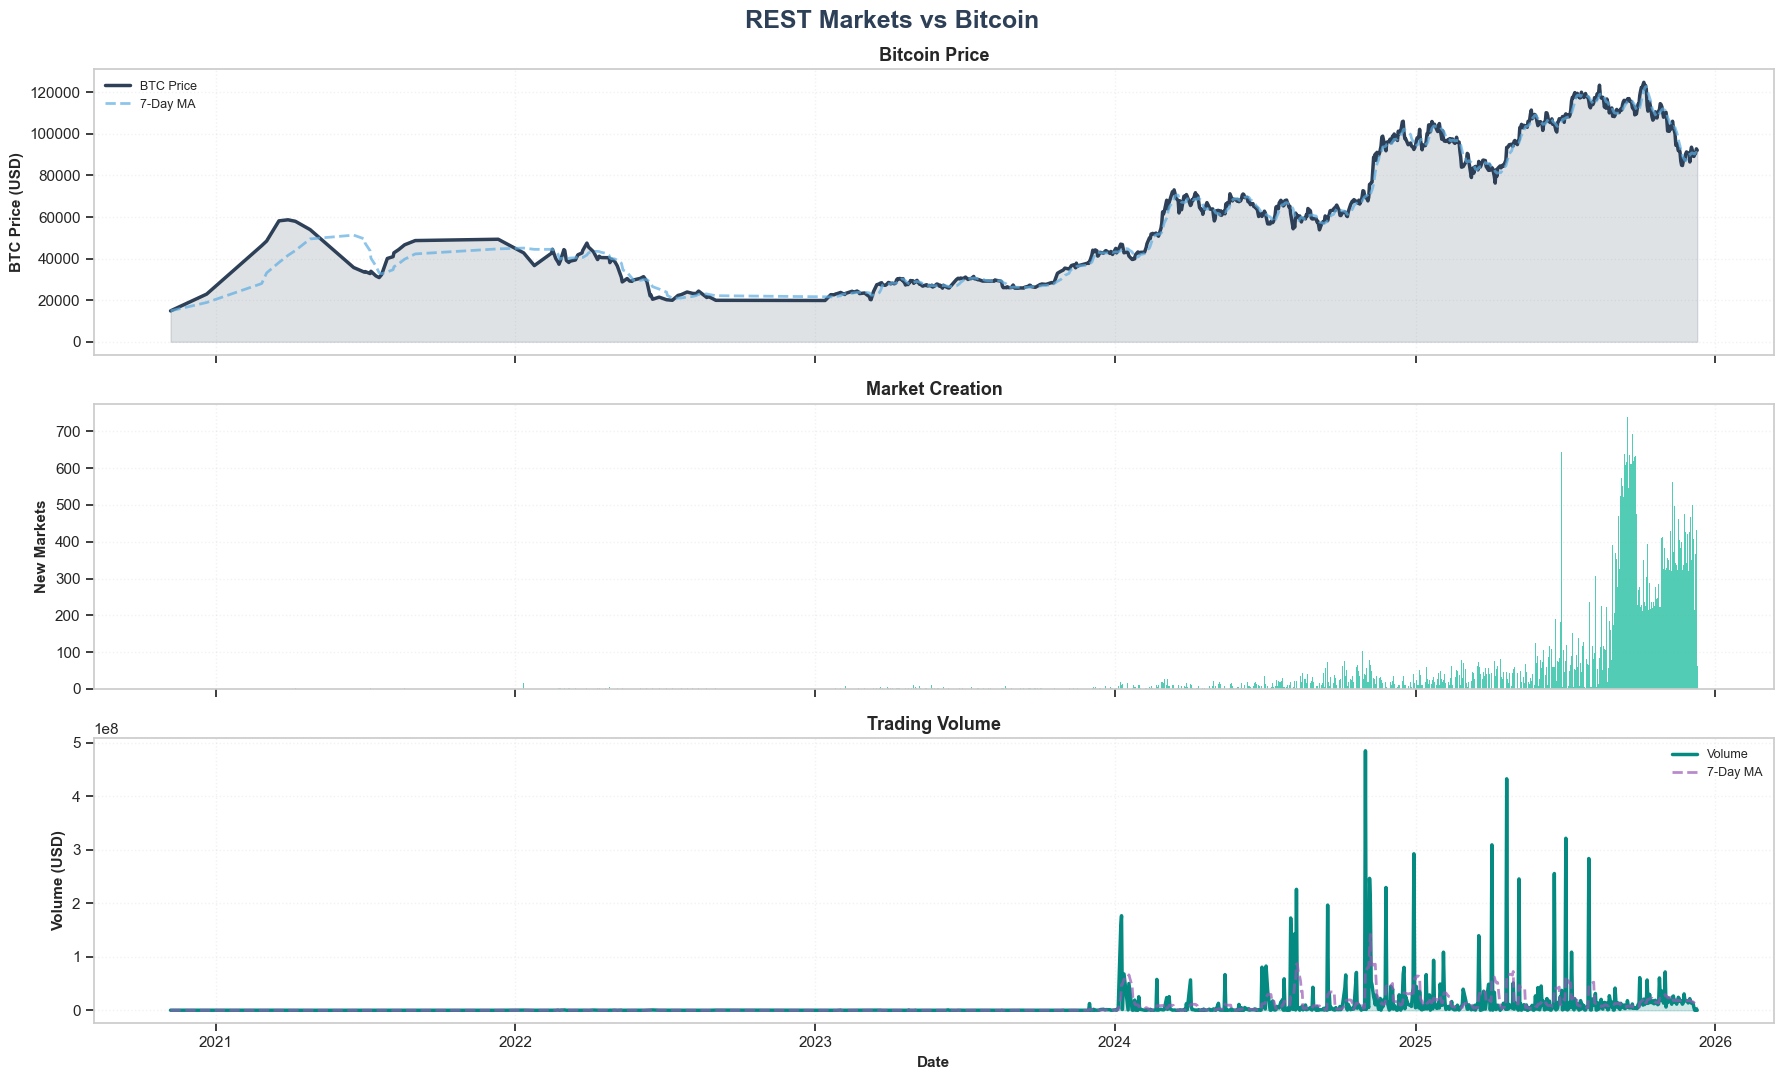

[2/3] Correlation...
✓ Saved: 02_correlation_alt.png


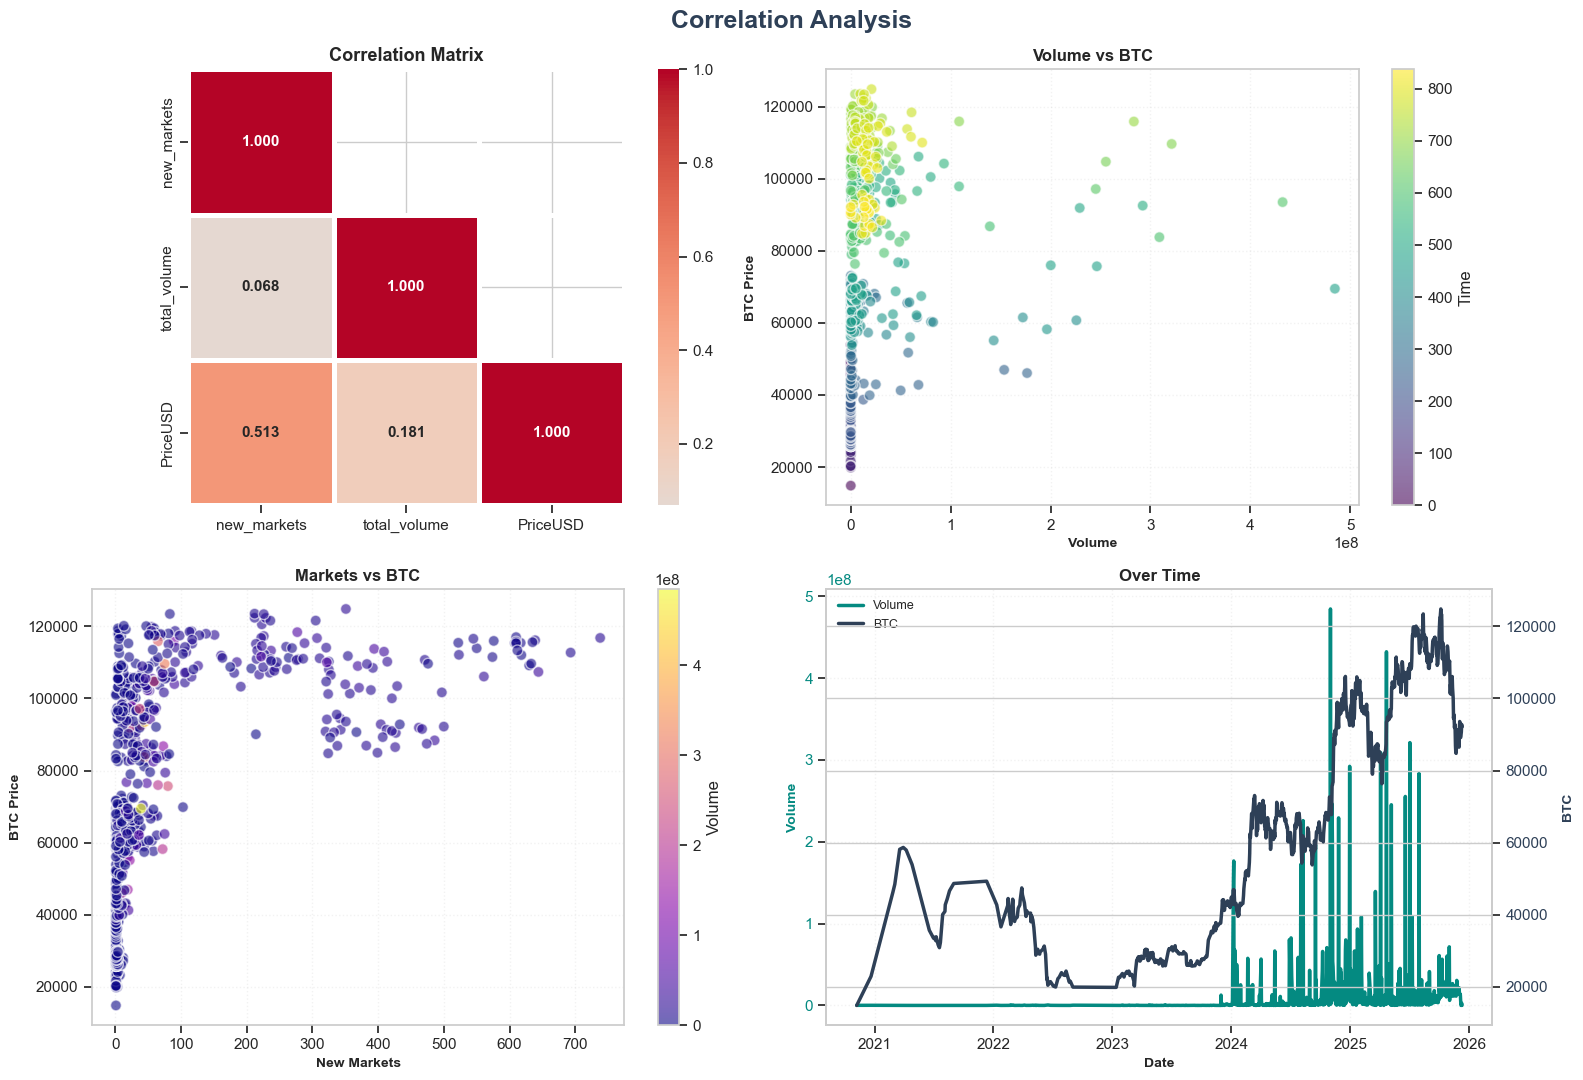

[3/3] Lagged Correlation...
✓ Saved: 03_lagged_alt.png


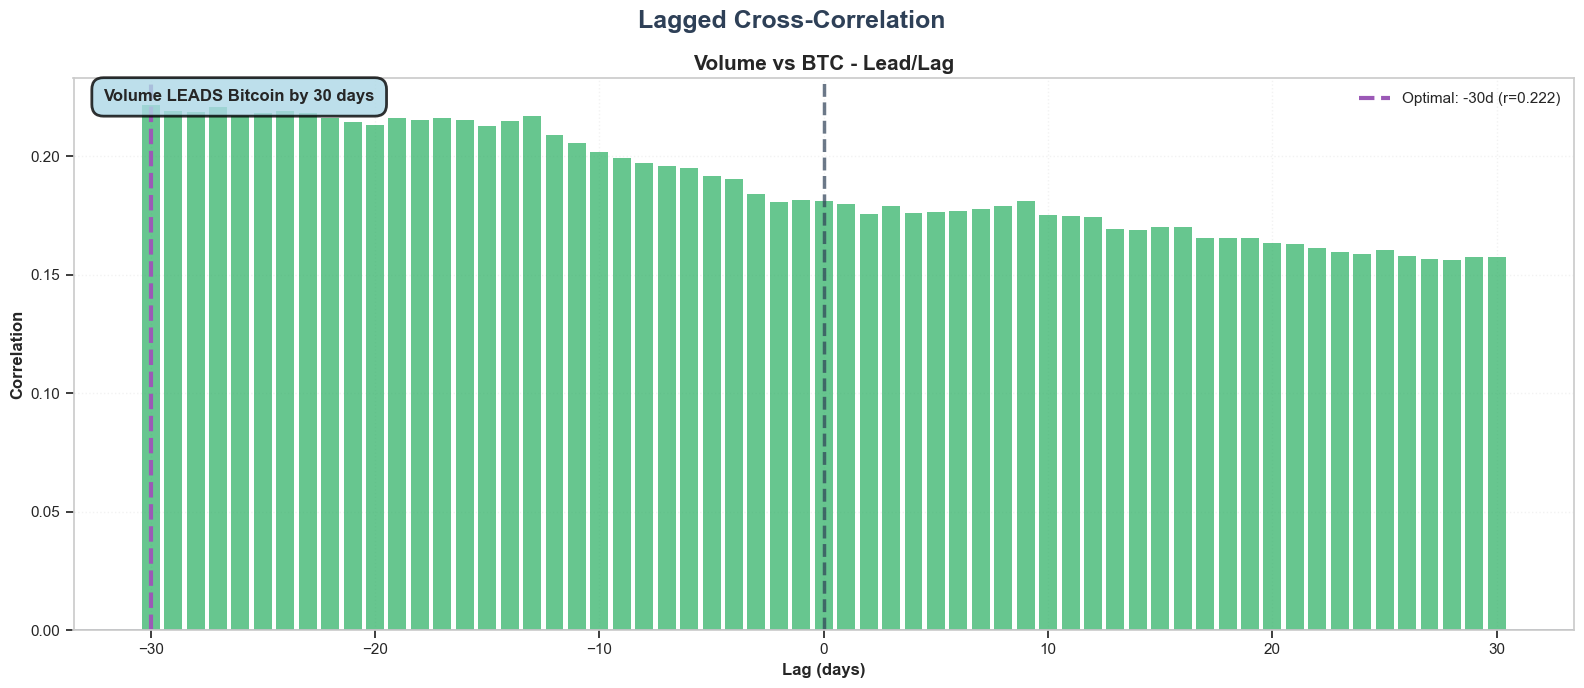


                                        COMPLETE

[SUMMARY]
  Period: 2020-11-07 to 2025-12-10
  Days: 838
  Markets: 55,170
  Total volume: $10,728,991,910.42

  Volume-BTC correlation: 0.1810
  Markets-BTC correlation: 0.5129
  Optimal lag: -30 days (Volume LEADS Bitcoin by 30 days)

[FILES]
  01_timeseries_alt.png
  02_correlation_alt.png
  03_lagged_alt.png
  timeseries_data_alt.csv


In [38]:
"""
TIME SERIES ANALYSIS - ALTERNATIVE APPROACH
Using created_at from markets.parquet directly

Author: Melissa - LSE Data Science MSc
Date: February 2026
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.gridspec import GridSpec
from scipy import stats
from scipy.signal import savgol_filter
import warnings
warnings.filterwarnings('ignore')

# ============================================
# CONFIGURATION
# ============================================

COLORS = {
    'primary': '#2E4057',
    'secondary': '#048A81',
    'accent': '#5DADE2',
    'highlight': '#9B59B6',
    'success': '#27AE60',
    'info': '#3498DB',
    'dark': '#34495E',
}

PALETTES = {
    'ocean': ['#006BA6', '#0496FF', '#5DADE2', '#3498DB', '#2874A6', '#1B4F72'],
    'teal': ['#E8F8F5', '#A3E4D7', '#52BE80', '#1ABC9C', '#17A589', '#138D75'],
    'purple': ['#F4ECF7', '#D7BDE2', '#AF7AC5', '#8E44AD', '#6C3483', '#4A235A'],
}

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.0)

PLOTS_DIR = Path('plots/rest_timeseries')
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("="*100)
print(" " * 20 + "TIME SERIES ANALYSIS: REST CATEGORIES vs BITCOIN")
print(" " * 25 + "(Using created_at from markets.parquet)")
print("="*100)

# ============================================
# STEP 1: LOAD & FIX TIMESTAMPS
# ============================================

print("\n[STEP 1] LOADING DATA & FIXING TIMESTAMPS")
print("-" * 100)

markets_df = poly_data['markets'].copy()
btc_pandas = btc_df.copy() if isinstance(btc_df, pd.DataFrame) else btc_df.to_pandas()

print(f"✓ Markets: {len(markets_df):,}")
print(f"✓ Bitcoin: {len(btc_pandas):,}")

# Check created_at
print(f"\n  Checking created_at column:")
print(f"    Dtype: {markets_df['created_at'].dtype}")
print(f"    Non-null: {markets_df['created_at'].notna().sum():,}")

# Convert to datetime if needed
if not pd.api.types.is_datetime64_any_dtype(markets_df['created_at']):
    print(f"    Converting to datetime...")
    markets_df['created_at'] = pd.to_datetime(markets_df['created_at'], errors='coerce')

# Check for corruption
non_null = markets_df['created_at'].dropna()
if len(non_null) > 0:
    print(f"    Min: {non_null.min()}")
    print(f"    Max: {non_null.max()}")
    
    # Fix if corrupted
    if non_null.max() < pd.Timestamp("2020-01-01"):
        print(f"\n  ⚠️ Corruption detected! Fixing...")
        ns_values = markets_df['created_at'].values.astype("datetime64[ns]").astype("int64")
        markets_df['created_at'] = pd.to_datetime(ns_values * 1000)
        
        # Remove pre-2020
        mask = markets_df['created_at'] < pd.Timestamp("2020-01-01")
        if mask.any():
            print(f"    Removing {mask.sum():,} pre-2020 dates")
            markets_df.loc[mask, 'created_at'] = pd.NaT
        
        print(f"  ✓ Fixed! New range: {markets_df['created_at'].min()} to {markets_df['created_at'].max()}")
    
    # Also fix end_date if exists
    if 'end_date' in markets_df.columns:
        print(f"\n  Fixing end_date...")
        if not pd.api.types.is_datetime64_any_dtype(markets_df['end_date']):
            markets_df['end_date'] = pd.to_datetime(markets_df['end_date'], errors='coerce')
        
        non_null_end = markets_df['end_date'].dropna()
        if len(non_null_end) > 0 and non_null_end.max() < pd.Timestamp("2020-01-01"):
            ns_values = markets_df['end_date'].values.astype("datetime64[ns]").astype("int64")
            markets_df['end_date'] = pd.to_datetime(ns_values * 1000)
            mask = markets_df['end_date'] < pd.Timestamp("2020-01-01")
            if mask.any():
                markets_df.loc[mask, 'end_date'] = pd.NaT

valid_created = markets_df['created_at'].notna().sum()
print(f"\n✓ Valid created_at: {valid_created:,} ({valid_created/len(markets_df)*100:.1f}%)")

if valid_created == 0:
    print("\n❌ CRITICAL: No valid created_at timestamps!")
    print("Checking raw values...")
    print(markets_df[['market_id', 'created_at']].head(10))
    raise ValueError("No timestamps available in any source!")

# ============================================
# STEP 2: REST FILTERING
# ============================================

print("\n[STEP 2] REST CATEGORY FILTERING")
print("-" * 100)

CRYPTO_KEYWORDS = ['bitcoin', 'btc', 'ethereum', 'eth', 'crypto', 'blockchain', 'defi']
POLITICS_KEYWORDS = ['election', 'president', 'trump', 'biden', 'harris', 'congress', 'senate']

def is_rest_category(row):
    category = str(row.get('category', '')).lower()
    question = str(row.get('question', '')).lower()
    
    if category in ['crypto', 'politics', 'global politics', 'us-current-affairs']:
        return False
    
    crypto_count = sum(1 for kw in CRYPTO_KEYWORDS if kw in question)
    politics_count = sum(1 for kw in POLITICS_KEYWORDS if kw in question)
    
    if crypto_count >= 2 or politics_count >= 2:
        return False
    
    return True

markets_df['is_rest'] = markets_df.apply(is_rest_category, axis=1)
markets_rest = markets_df[markets_df['is_rest']].copy()

print(f"✓ Total: {len(markets_df):,}")
print(f"✓ REST: {len(markets_rest):,} ({len(markets_rest)/len(markets_df)*100:.1f}%)")

# Filter with timestamps
markets_with_dates = markets_rest[markets_rest['created_at'].notna()].copy()
print(f"✓ REST with created_at: {len(markets_with_dates):,}")

if len(markets_with_dates) == 0:
    print("\n❌ No REST markets with valid created_at!")
    raise ValueError("No timestamp data")

print(f"  Date range: {markets_with_dates['created_at'].min()} to {markets_with_dates['created_at'].max()}")

# ============================================
# STEP 3: AGGREGATION & MERGE
# ============================================

print("\n[STEP 3] TIME SERIES AGGREGATION")
print("-" * 100)

markets_with_dates['date'] = markets_with_dates['created_at'].dt.date

daily_agg = (
    markets_with_dates.groupby('date')
    .agg({
        'market_id': 'count',
        'volume': 'sum',
    })
    .rename(columns={
        'market_id': 'new_markets',
        'volume': 'total_volume',
    })
    .reset_index()
)

daily_agg['date'] = pd.to_datetime(daily_agg['date'])
print(f"✓ Daily: {len(daily_agg):,} days")

# Bitcoin
btc_pandas['time'] = pd.to_datetime(btc_pandas['time'])
btc_pandas['date'] = btc_pandas['time'].dt.date
btc_daily = btc_pandas[['date', 'PriceUSD']].copy()
btc_daily['date'] = pd.to_datetime(btc_daily['date'])
btc_daily = btc_daily[btc_daily['PriceUSD'].notna()].copy()

print(f"✓ Bitcoin: {len(btc_daily):,} days")

# Merge
merged_df = daily_agg.merge(btc_daily, on='date', how='inner')
merged_df = merged_df.sort_values('date').reset_index(drop=True)

print(f"\n✓ MERGED: {len(merged_df):,} days")

if len(merged_df) == 0:
    print(f"\n❌ No overlap!")
    print(f"  Polymarket: {daily_agg['date'].min().date()} to {daily_agg['date'].max().date()}")
    print(f"  Bitcoin: {btc_daily['date'].min().date()} to {btc_daily['date'].max().date()}")
    raise ValueError("No overlap")

print(f"  Range: {merged_df['date'].min().date()} to {merged_df['date'].max().date()}")

# Features
merged_df['btc_returns'] = merged_df['PriceUSD'].pct_change()
merged_df['volume_change'] = merged_df['total_volume'].pct_change()
merged_df['volume_ma7'] = merged_df['total_volume'].rolling(7, min_periods=1).mean()
merged_df['btc_ma7'] = merged_df['PriceUSD'].rolling(7, min_periods=1).mean()

# ============================================
# VISUALIZATIONS
# ============================================

print("\n[VISUALIZATIONS]")
print("-" * 100)

# VIZ 1: Time Series
print("[1/3] Time Series...")

fig, axes = plt.subplots(3, 1, figsize=(18, 11), sharex=True)
fig.suptitle('REST Markets vs Bitcoin', fontsize=18, fontweight='bold', color=COLORS['primary'])

ax = axes[0]
ax.plot(merged_df['date'], merged_df['PriceUSD'], color=COLORS['primary'], linewidth=2.5)
ax.plot(merged_df['date'], merged_df['btc_ma7'], color=COLORS['accent'], linewidth=2, linestyle='--', alpha=0.7)
ax.fill_between(merged_df['date'], merged_df['PriceUSD'], alpha=0.15, color=COLORS['primary'])
ax.set_ylabel('BTC Price (USD)', fontsize=11, fontweight='600')
ax.set_title('Bitcoin Price', fontsize=13, fontweight='bold')
ax.legend(['BTC Price', '7-Day MA'], fontsize=9)
ax.grid(True, alpha=0.25, linestyle=':')

ax = axes[1]
ax.bar(merged_df['date'], merged_df['new_markets'], color=PALETTES['teal'][3], alpha=0.75, width=1)
ax.set_ylabel('New Markets', fontsize=11, fontweight='600')
ax.set_title('Market Creation', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')

ax = axes[2]
ax.plot(merged_df['date'], merged_df['total_volume'], color=COLORS['secondary'], linewidth=2.5)
ax.plot(merged_df['date'], merged_df['volume_ma7'], color=COLORS['highlight'], linewidth=2, linestyle='--', alpha=0.7)
ax.fill_between(merged_df['date'], merged_df['total_volume'], alpha=0.2, color=COLORS['secondary'])
ax.set_ylabel('Volume (USD)', fontsize=11, fontweight='600')
ax.set_xlabel('Date', fontsize=11, fontweight='600')
ax.set_title('Trading Volume', fontsize=13, fontweight='bold')
ax.legend(['Volume', '7-Day MA'], fontsize=9)
ax.grid(True, alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '01_timeseries_alt.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 01_timeseries_alt.png")
plt.show()

# VIZ 2: Correlation
print("[2/3] Correlation...")

fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.suptitle('Correlation Analysis', fontsize=18, fontweight='bold', color=COLORS['primary'])

# Matrix
ax = axes[0, 0]
corr_cols = ['new_markets', 'total_volume', 'PriceUSD']
corr_matrix = merged_df[corr_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', center=0,
           square=True, linewidths=2.5, ax=ax, annot_kws={'size': 11, 'weight': 'bold'})
ax.set_title('Correlation Matrix', fontsize=13, fontweight='bold')

# Scatter 1
ax = axes[0, 1]
scatter = ax.scatter(merged_df['total_volume'], merged_df['PriceUSD'],
                    c=merged_df.index, cmap='viridis', s=60, alpha=0.6, edgecolors='white')
ax.set_xlabel('Volume', fontsize=10, fontweight='600')
ax.set_ylabel('BTC Price', fontsize=10, fontweight='600')
ax.set_title('Volume vs BTC', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')
plt.colorbar(scatter, ax=ax, label='Time')

# Scatter 2
ax = axes[1, 0]
scatter = ax.scatter(merged_df['new_markets'], merged_df['PriceUSD'],
                    c=merged_df['total_volume'], cmap='plasma', s=60, alpha=0.6, edgecolors='white')
ax.set_xlabel('New Markets', fontsize=10, fontweight='600')
ax.set_ylabel('BTC Price', fontsize=10, fontweight='600')
ax.set_title('Markets vs BTC', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')
plt.colorbar(scatter, ax=ax, label='Volume')

# Dual axis
ax = axes[1, 1]
ax_twin = ax.twinx()
ln1 = ax.plot(merged_df['date'], merged_df['total_volume'], 
             color=COLORS['secondary'], linewidth=2.5, label='Volume')
ln2 = ax_twin.plot(merged_df['date'], merged_df['PriceUSD'], 
                   color=COLORS['primary'], linewidth=2.5, label='BTC')
ax.set_xlabel('Date', fontsize=10, fontweight='600')
ax.set_ylabel('Volume', fontsize=10, fontweight='600', color=COLORS['secondary'])
ax_twin.set_ylabel('BTC', fontsize=10, fontweight='600', color=COLORS['primary'])
ax.tick_params(axis='y', labelcolor=COLORS['secondary'])
ax_twin.tick_params(axis='y', labelcolor=COLORS['primary'])
ax.set_title('Over Time', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')
lns = ln1 + ln2
ax.legend(lns, [l.get_label() for l in lns], loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig(PLOTS_DIR / '02_correlation_alt.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 02_correlation_alt.png")
plt.show()

# VIZ 3: Lagged Correlation
print("[3/3] Lagged Correlation...")

fig, ax = plt.subplots(figsize=(16, 7))
fig.suptitle('Lagged Cross-Correlation', fontsize=18, fontweight='bold', color=COLORS['primary'])

max_lag = min(30, len(merged_df)//3)
lags = range(-max_lag, max_lag+1)
lagged_corrs = []

for lag in lags:
    if lag < 0:
        corr = merged_df['total_volume'].shift(-lag).corr(merged_df['PriceUSD'])
    else:
        corr = merged_df['total_volume'].corr(merged_df['PriceUSD'].shift(lag))
    lagged_corrs.append(corr)

colors_lag = [COLORS['success'] if c > 0 else COLORS['info'] for c in lagged_corrs]
ax.bar(lags, lagged_corrs, color=colors_lag, alpha=0.7, width=0.8)

ax.axhline(y=0, color=COLORS['dark'], linestyle='-', linewidth=2, alpha=0.5)
ax.axvline(x=0, color=COLORS['primary'], linestyle='--', linewidth=2.5, alpha=0.7)

max_corr_idx = np.argmax(np.abs(lagged_corrs))
optimal_lag = list(lags)[max_corr_idx]
ax.axvline(x=optimal_lag, color=COLORS['highlight'], linestyle='--', linewidth=3,
          label=f'Optimal: {optimal_lag}d (r={lagged_corrs[max_corr_idx]:.3f})')

ax.set_xlabel('Lag (days)', fontsize=12, fontweight='600')
ax.set_ylabel('Correlation', fontsize=12, fontweight='600')
ax.set_title('Volume vs BTC - Lead/Lag', fontsize=15, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.25, linestyle=':')

if optimal_lag < 0:
    interp = f"Volume LEADS Bitcoin by {abs(optimal_lag)} days"
elif optimal_lag > 0:
    interp = f"Bitcoin LEADS Volume by {optimal_lag} days"
else:
    interp = "Synchronous"

ax.text(0.02, 0.98, interp, transform=ax.transAxes, fontsize=12,
       verticalalignment='top', fontweight='bold',
       bbox=dict(boxstyle='round,pad=0.7', facecolor='lightblue', alpha=0.8, linewidth=2))

plt.tight_layout()
plt.savefig(PLOTS_DIR / '03_lagged_alt.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 03_lagged_alt.png")
plt.show()

# Export
merged_df[['date', 'new_markets', 'total_volume', 'PriceUSD']].to_csv(
    PLOTS_DIR / 'timeseries_data_alt.csv', index=False)

# Summary
print("\n" + "="*100)
print(" " * 40 + "COMPLETE")
print("="*100)

print(f"\n[SUMMARY]")
print(f"  Period: {merged_df['date'].min().date()} to {merged_df['date'].max().date()}")
print(f"  Days: {len(merged_df):,}")
print(f"  Markets: {len(markets_with_dates):,}")
print(f"  Total volume: ${merged_df['total_volume'].sum():,.2f}")
print(f"\n  Volume-BTC correlation: {corr_matrix.loc['total_volume', 'PriceUSD']:.4f}")
print(f"  Markets-BTC correlation: {corr_matrix.loc['new_markets', 'PriceUSD']:.4f}")
print(f"  Optimal lag: {optimal_lag} days ({interp})")

print(f"\n[FILES]")
print(f"  01_timeseries_alt.png")
print(f"  02_correlation_alt.png")
print(f"  03_lagged_alt.png")
print(f"  timeseries_data_alt.csv")

print("="*100)

               COMPREHENSIVE TIME SERIES ANALYSIS: REST CATEGORIES vs BITCOIN
                         8 Advanced Visualizations + Full Bitcoin Correlation

[STEP 1] DATA LOADING
----------------------------------------------------------------------------------------------------
✓ Markets: 78,321
✓ Summary: 78,321
✓ Bitcoin: 6,221

[STEP 2] TIMESTAMP FIXING (created_at)
----------------------------------------------------------------------------------------------------
✓ Merged with summary: 78,321

  Processing created_at:
    Dtype: datetime64[ns]
    Non-null: 78,321
    Range: 2020-10-02 16:10:01 to 2025-12-10 05:32:21

✓ Valid created_at: 78,321 (100.0%)
✓ Valid end_date: 77,786 (99.3%)

[STEP 3] REST CATEGORY FILTERING
----------------------------------------------------------------------------------------------------
✓ Total: 78,321
✓ REST: 55,170 (70.4%)
✓ REST with timestamps: 55,170
  Date range: 2020-11-07 21:35:04 to 2025-12-10 05:32:19

[STEP 4] TIME SERIES AGGREGATION
---

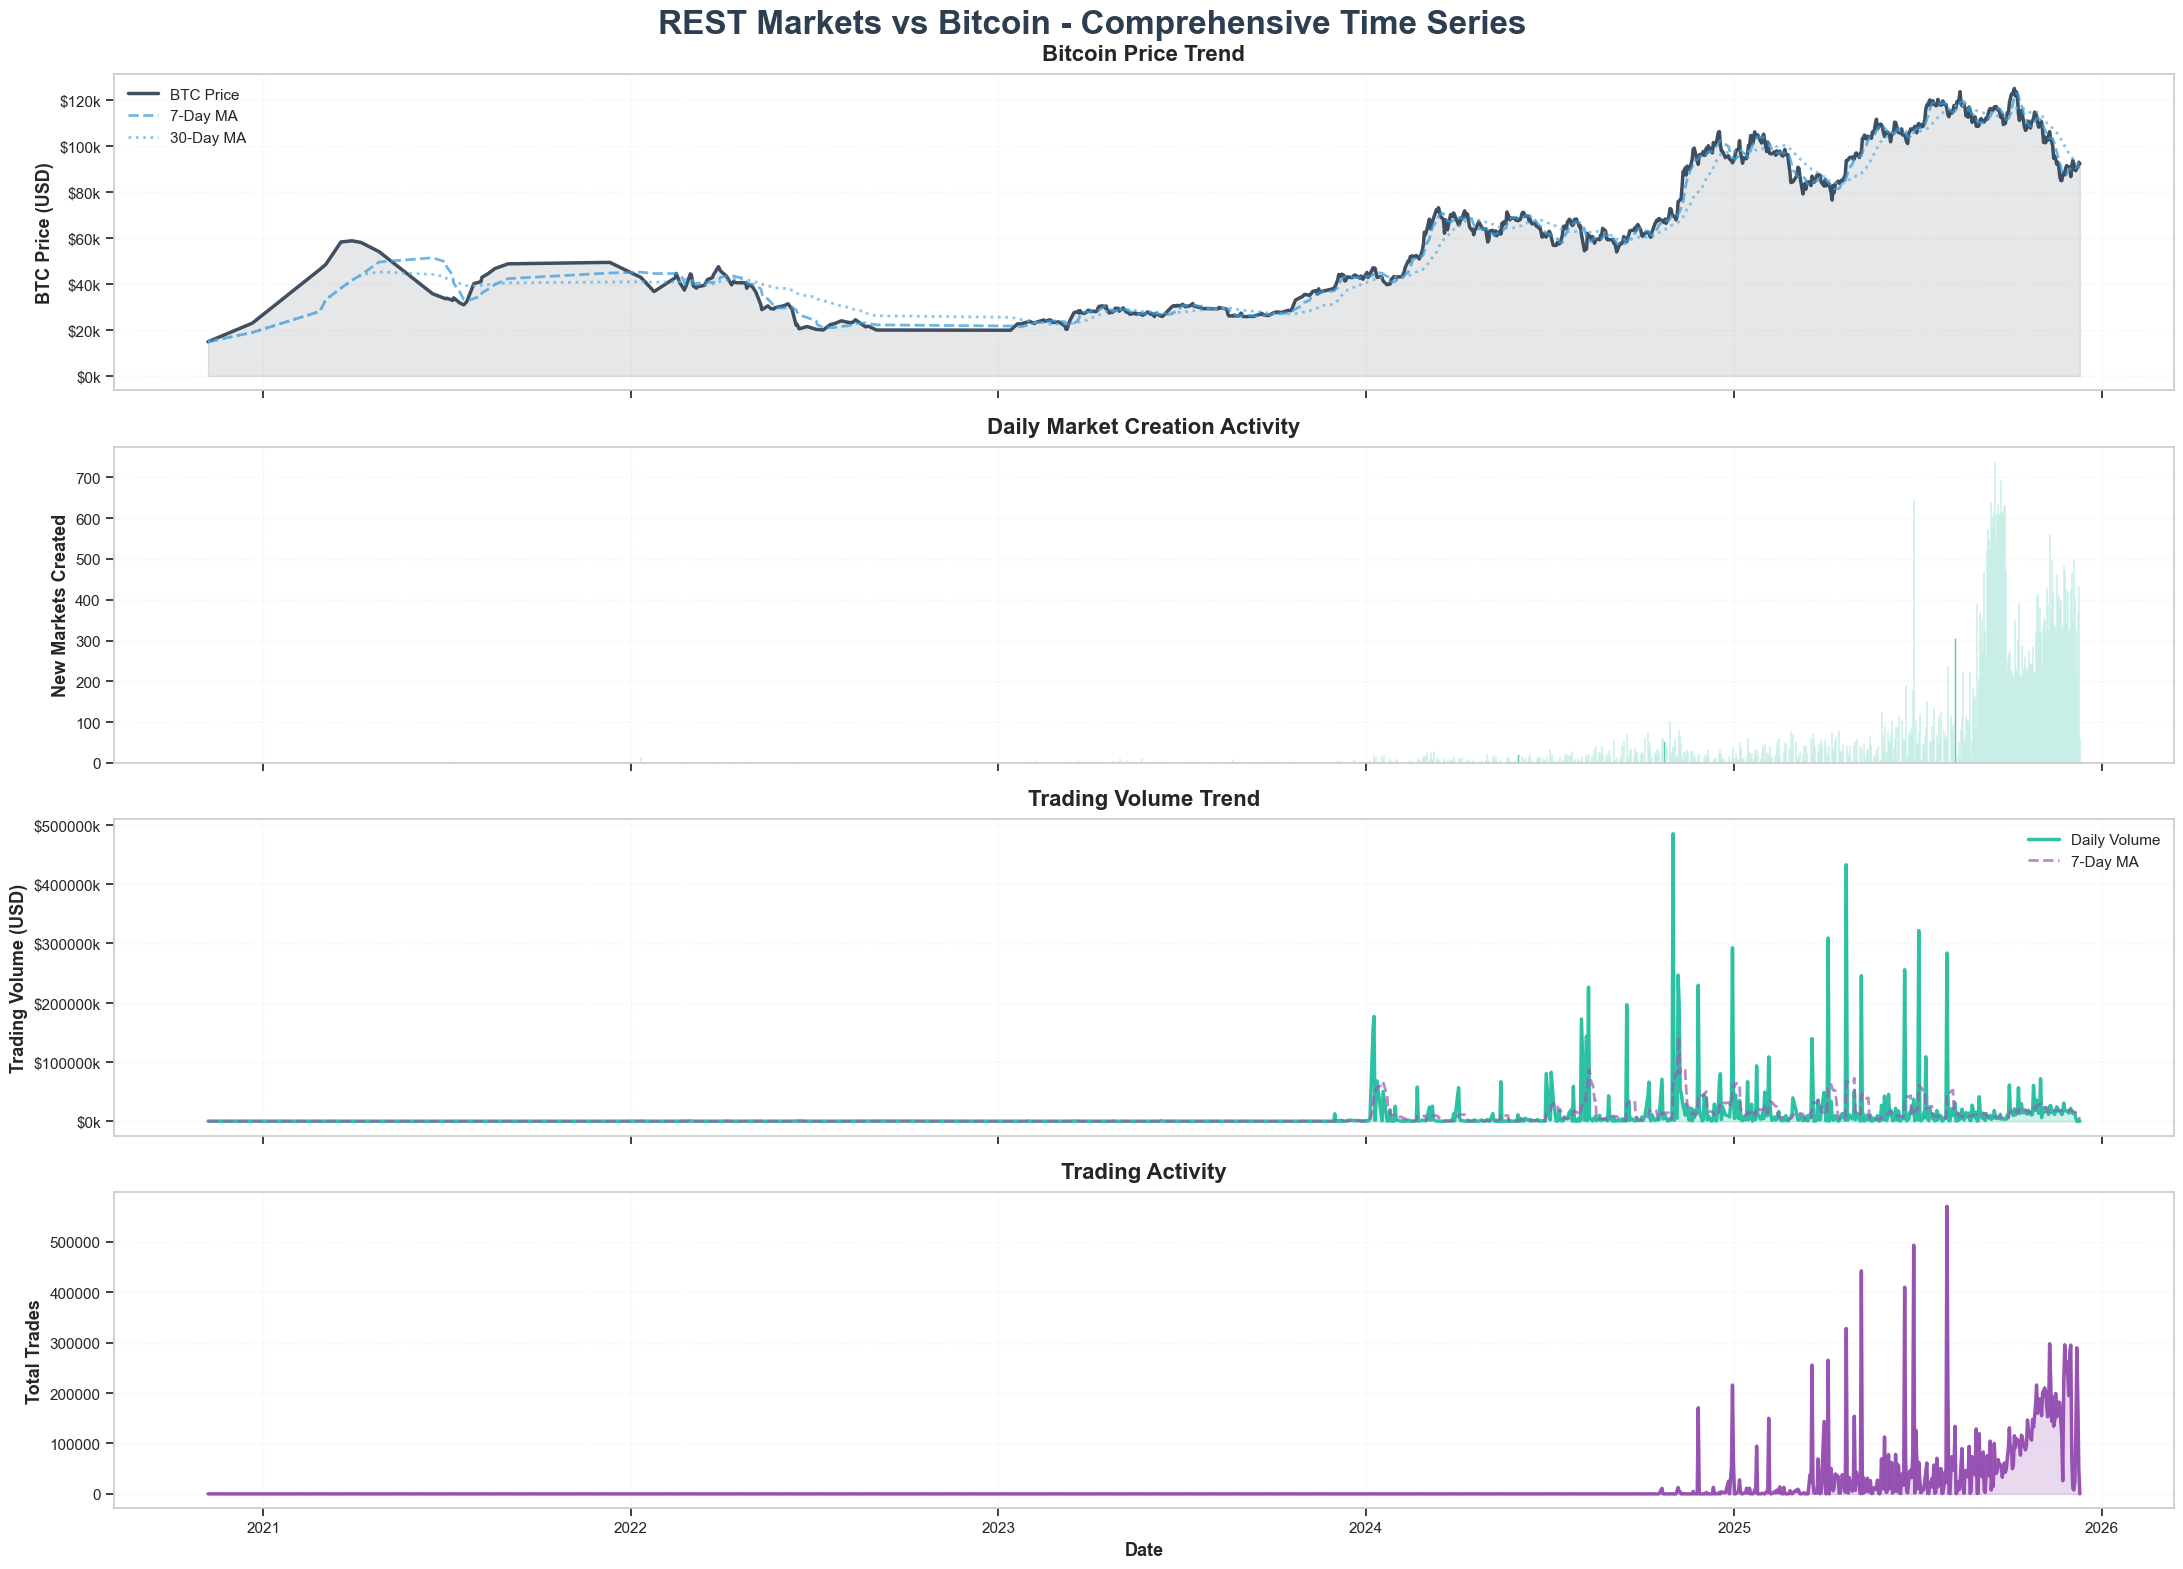


[2/8] Correlation Dashboard...
✓ Saved: 02_correlation_dashboard.png


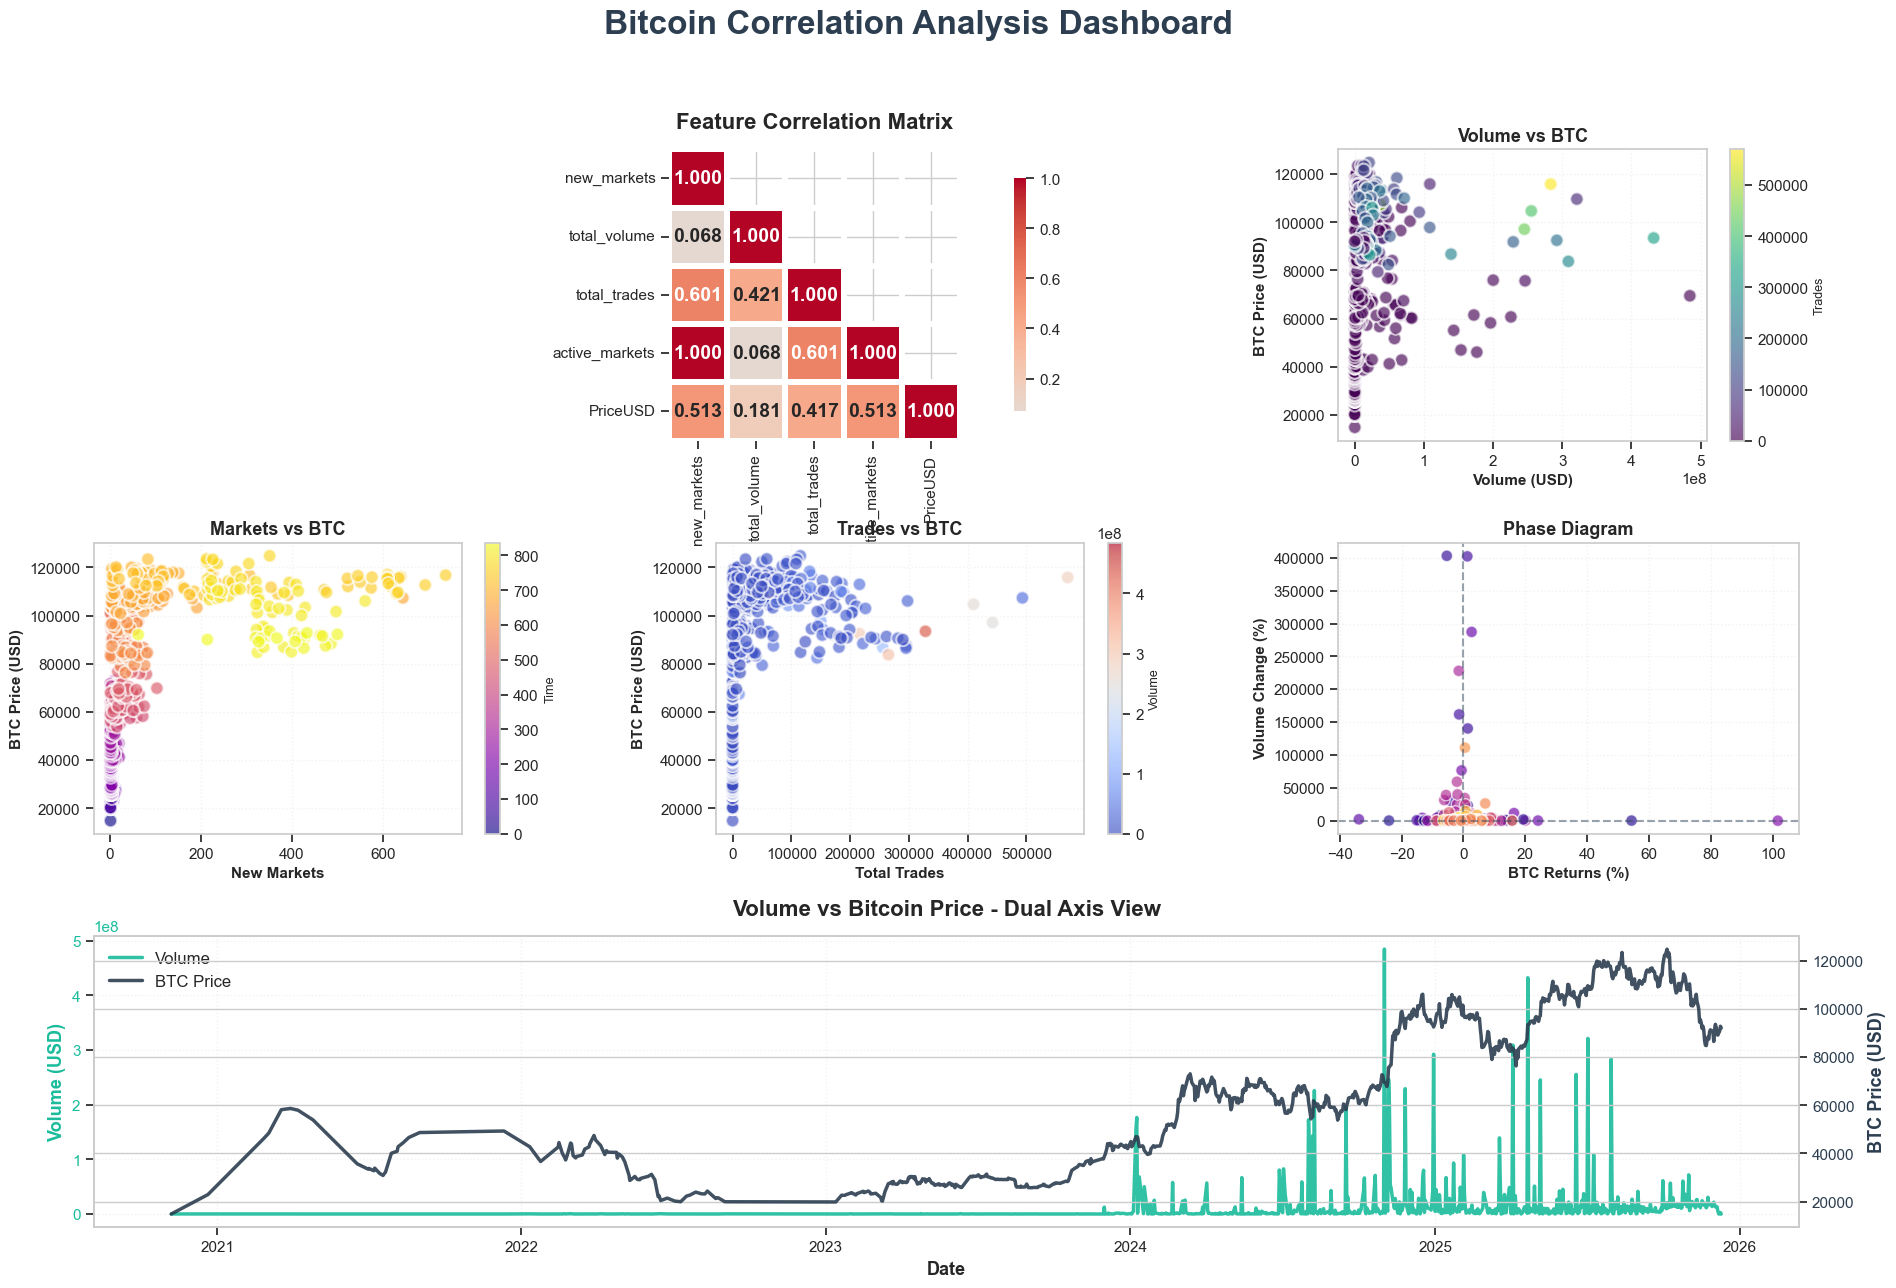


  Correlation with BTC Price:
    new_markets         :  0.5129 (Moderate positive)
    total_volume        :  0.1810 (Weak positive)
    total_trades        :  0.4168 (Moderate positive)
    active_markets      :  0.5129 (Moderate positive)

[3/8] Rolling Window Analysis...
✓ Saved: 03_rolling_analysis.png


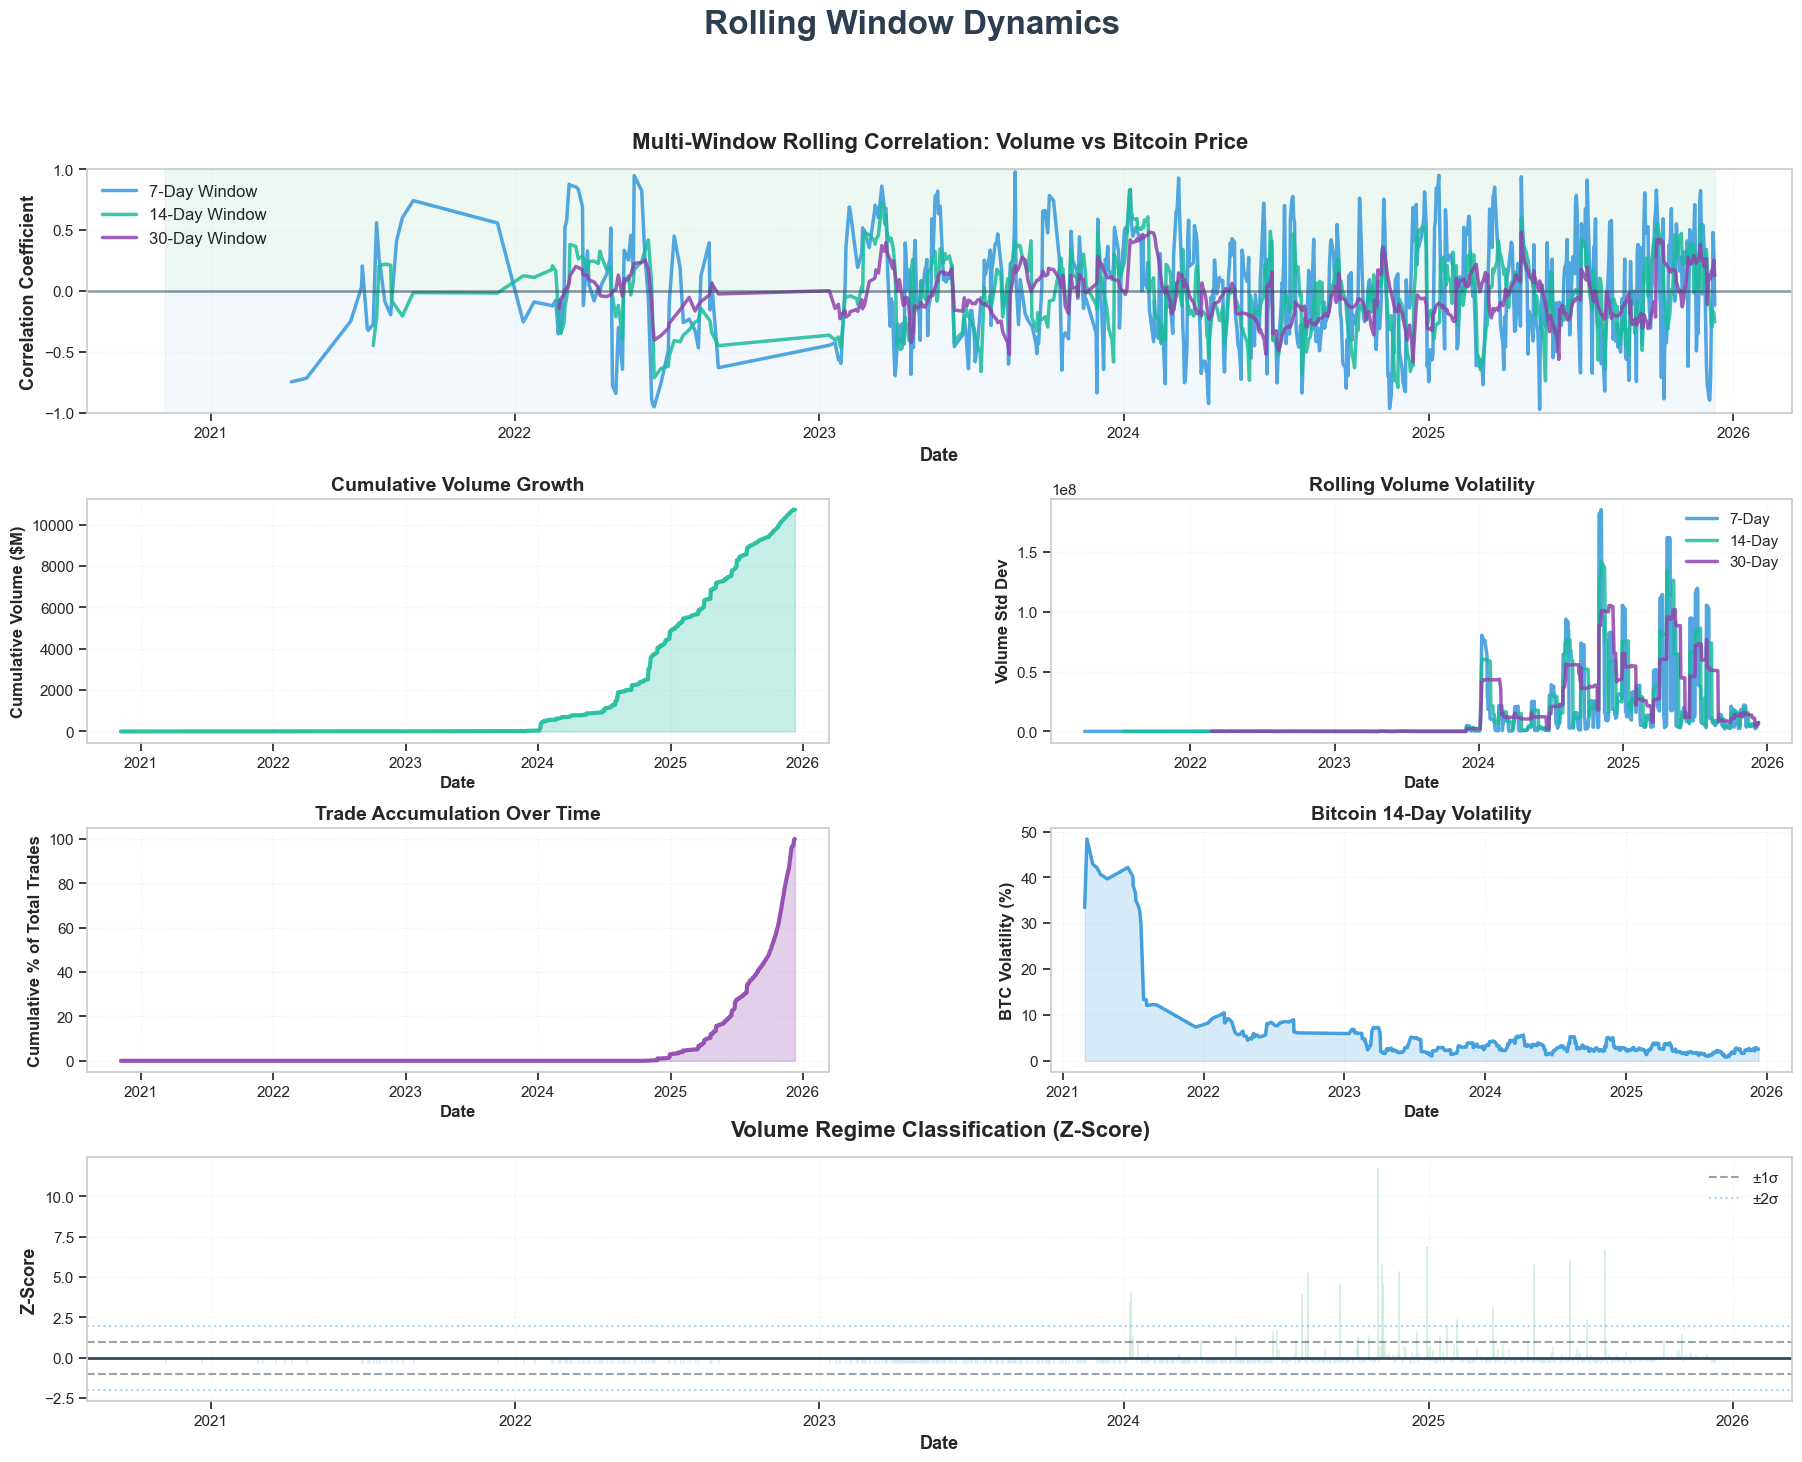


[4/8] Lagged Cross-Correlation...
✓ Saved: 04_lagged_correlation.png


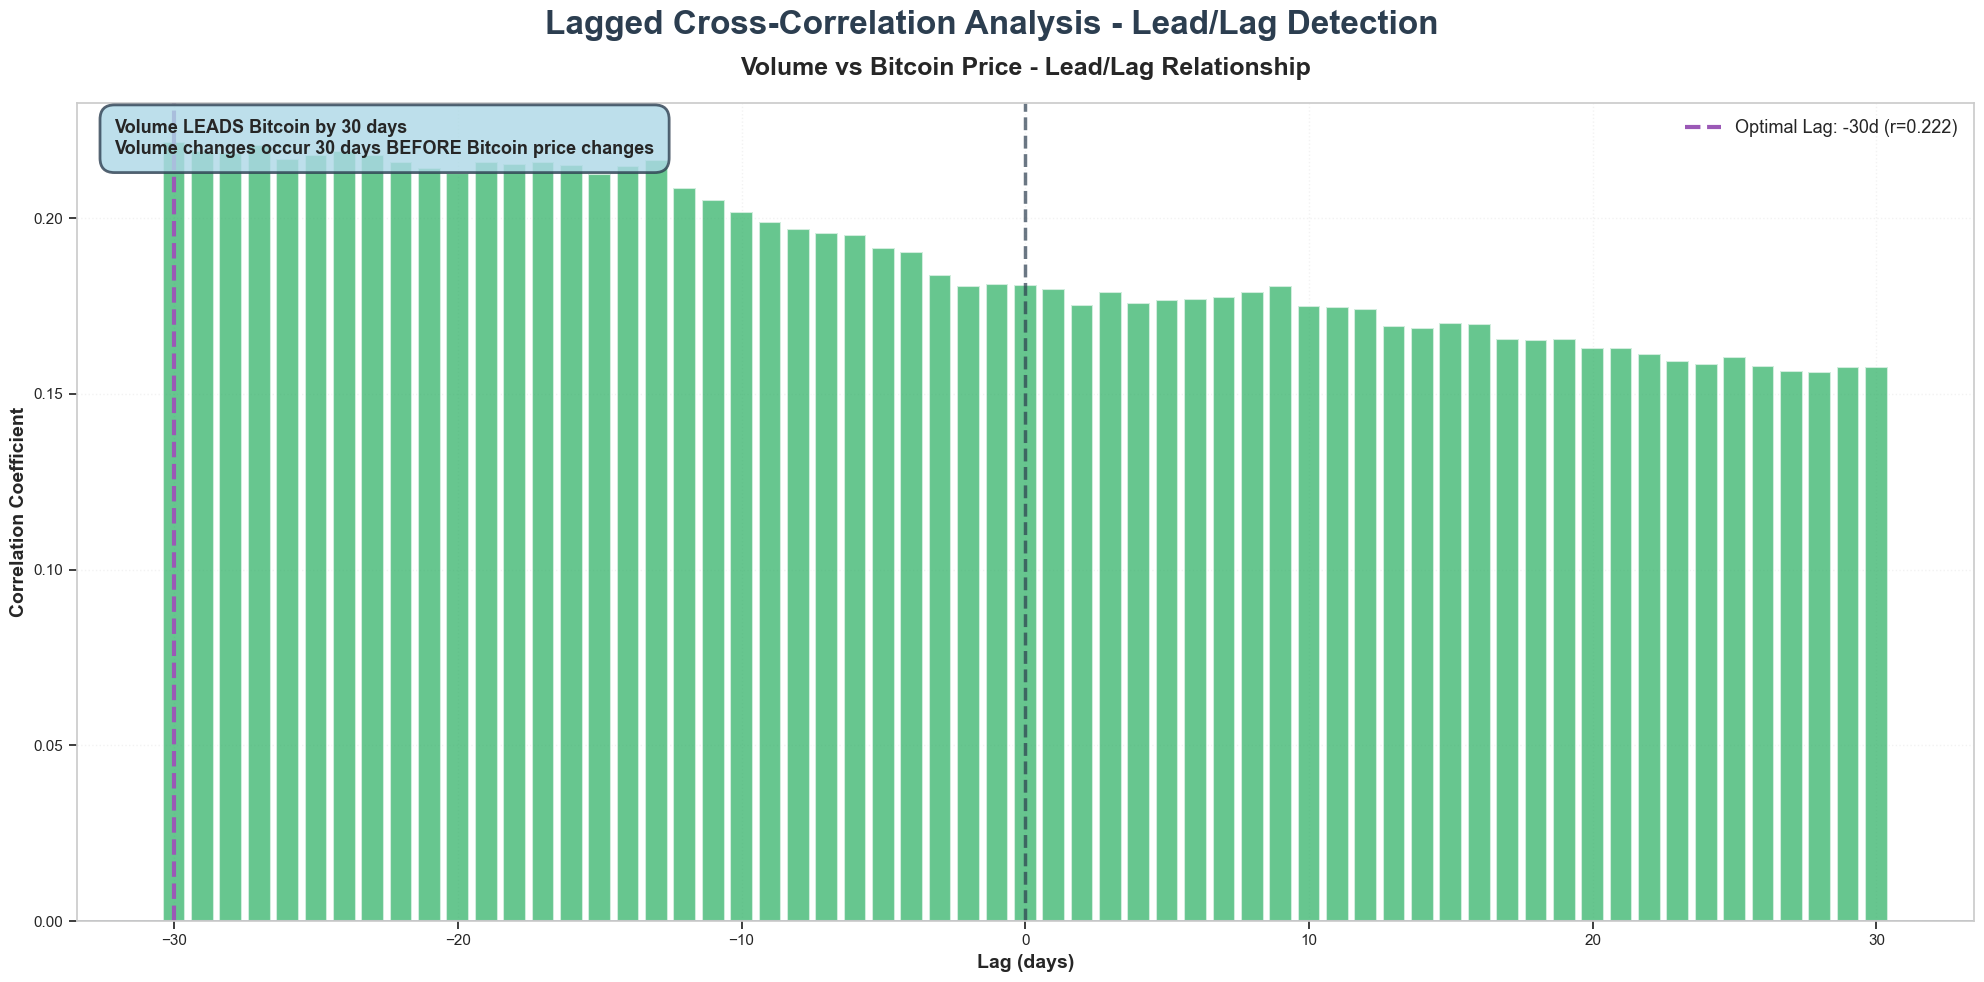


  Optimal lag: -30 days
  Correlation: 0.2217
  Interpretation: Volume LEADS Bitcoin by 30 days

[5/8] Momentum Analysis...
✓ Saved: 05_momentum_analysis.png


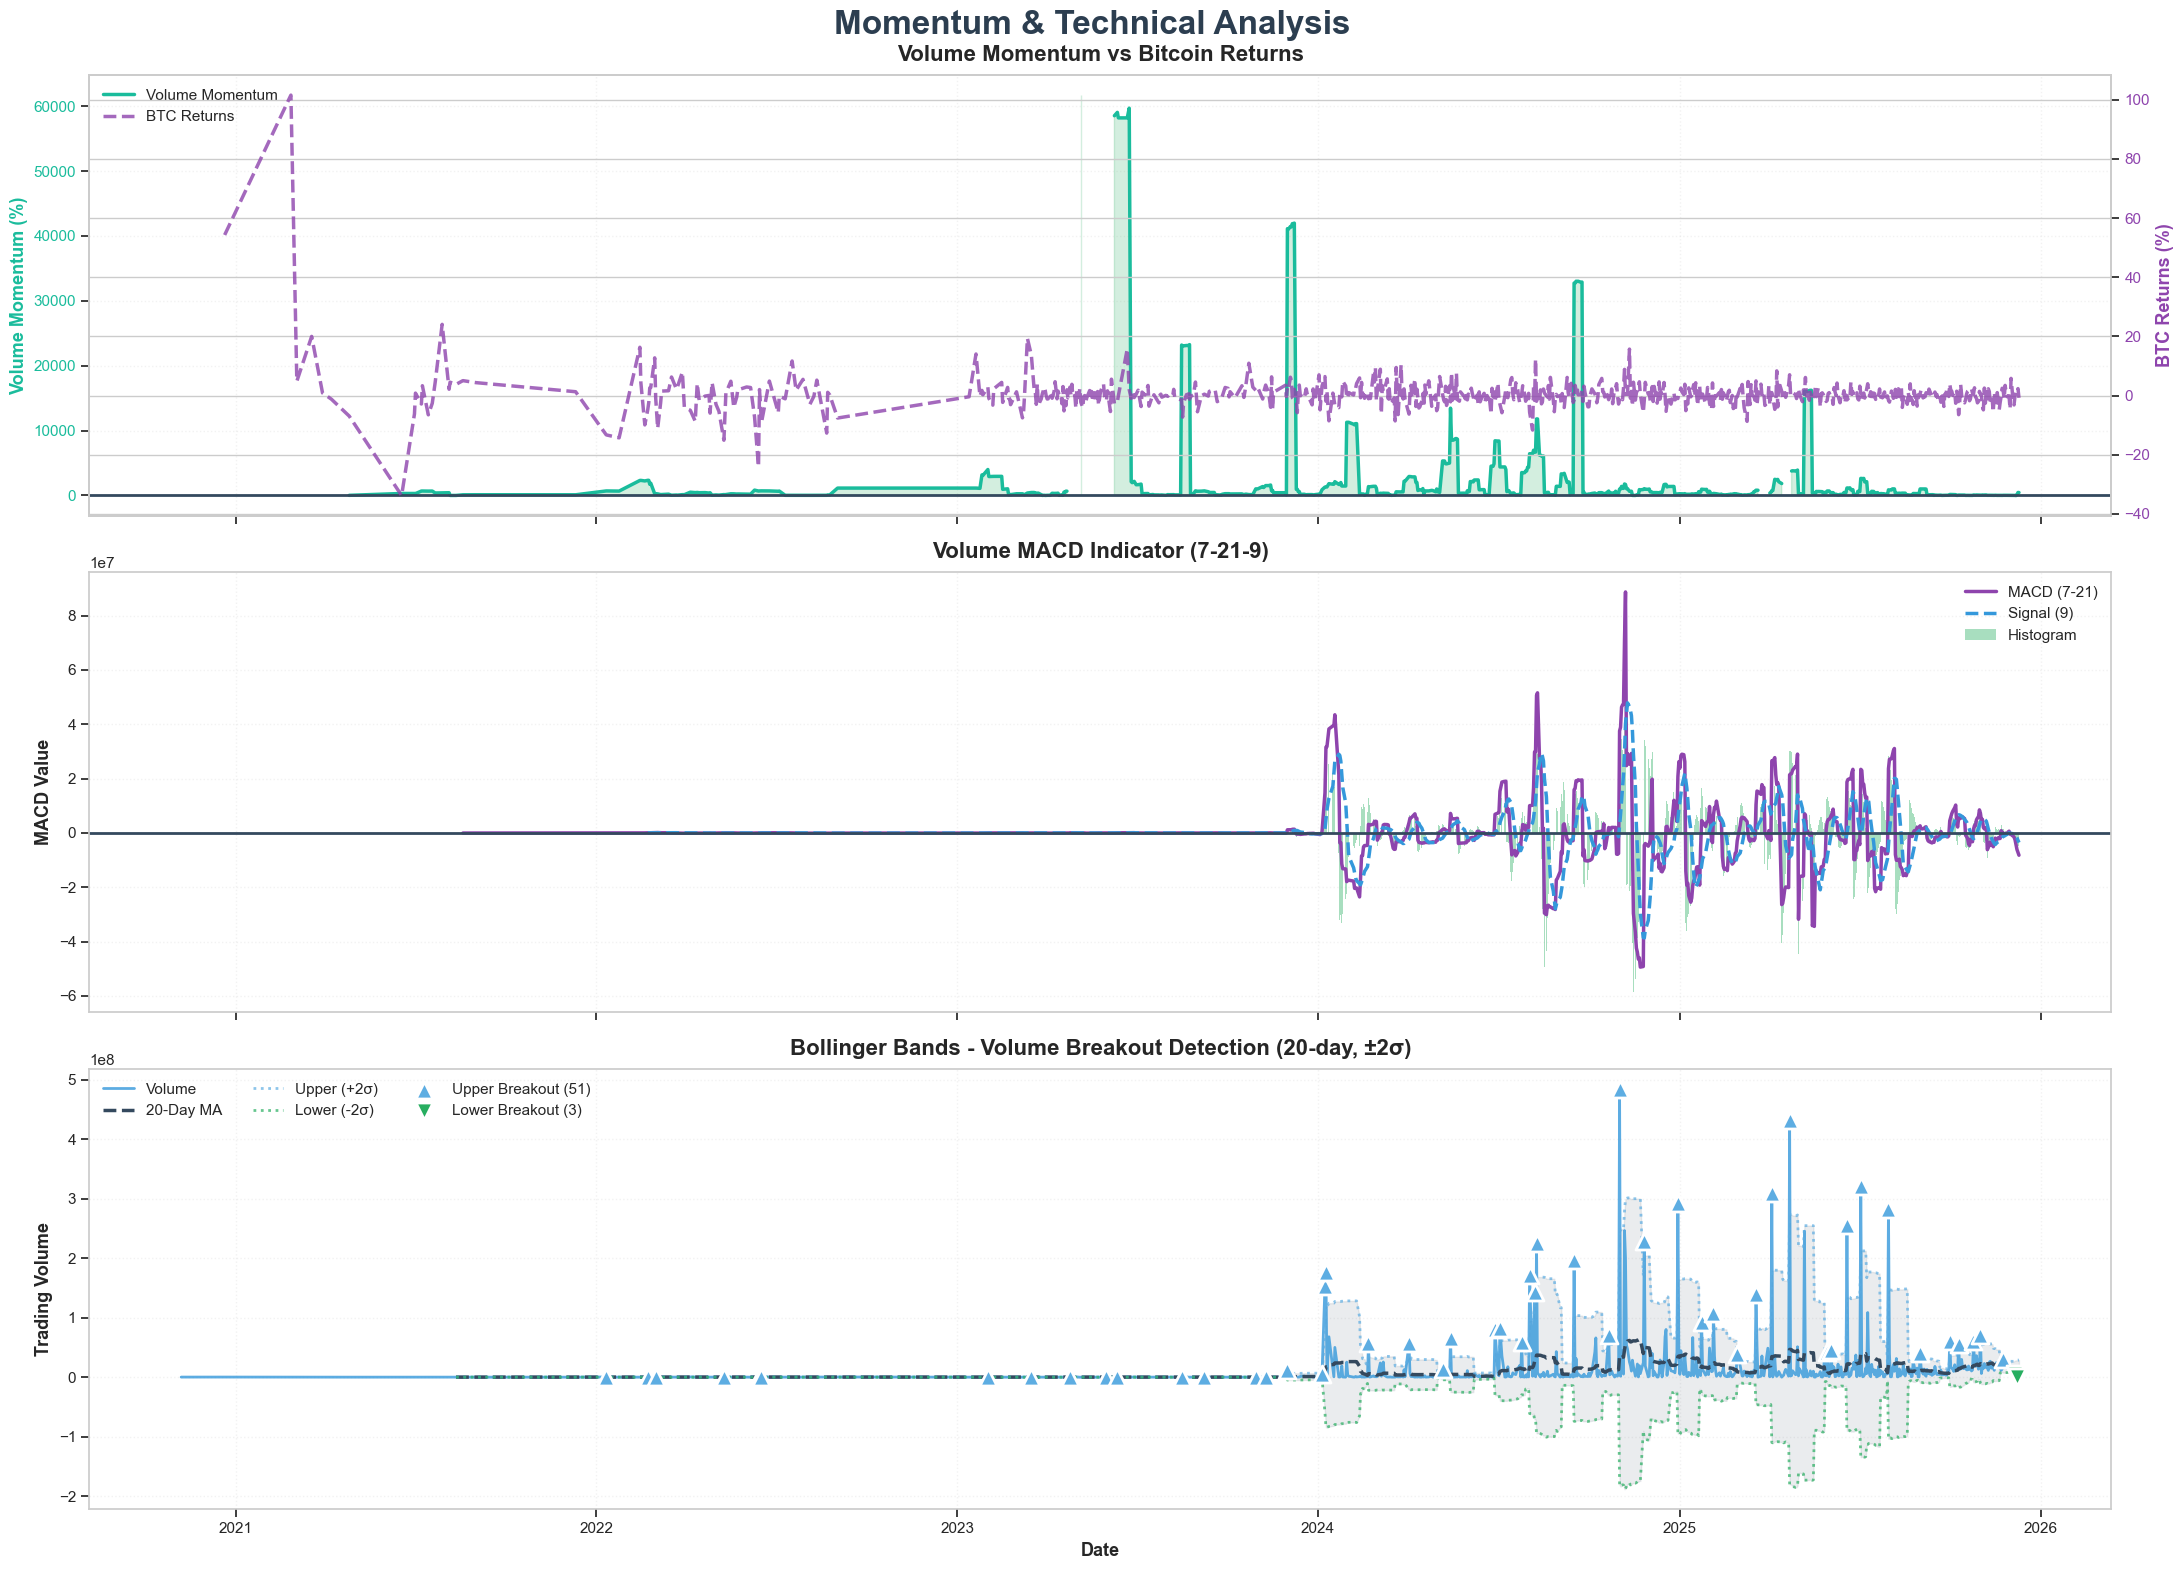

  Breakout events: 51 upper, 3 lower

[6/8] Pattern Detection...
✓ Saved: 06_pattern_detection.png


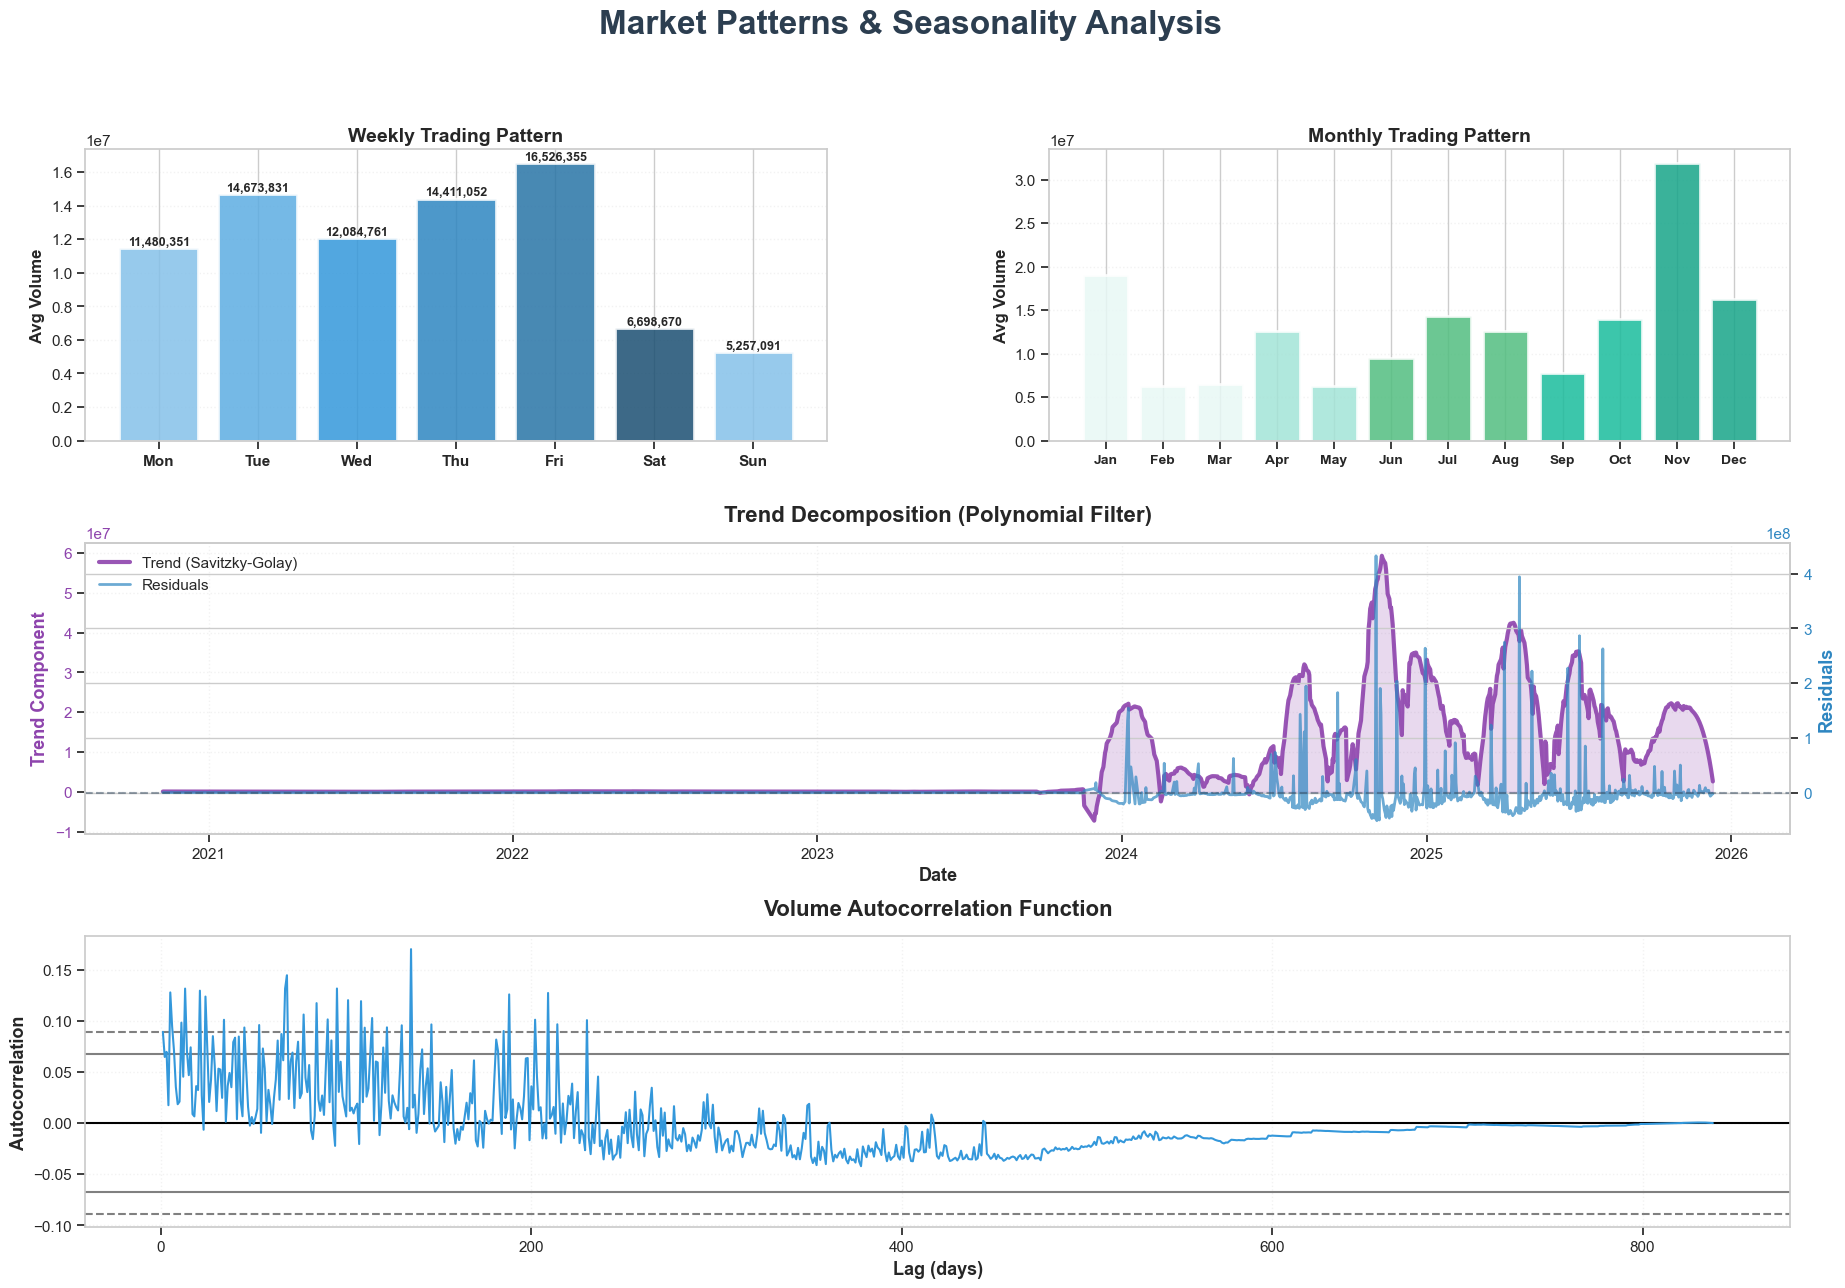


[7/8] Distribution Analysis...
✓ Saved: 07_distributions.png


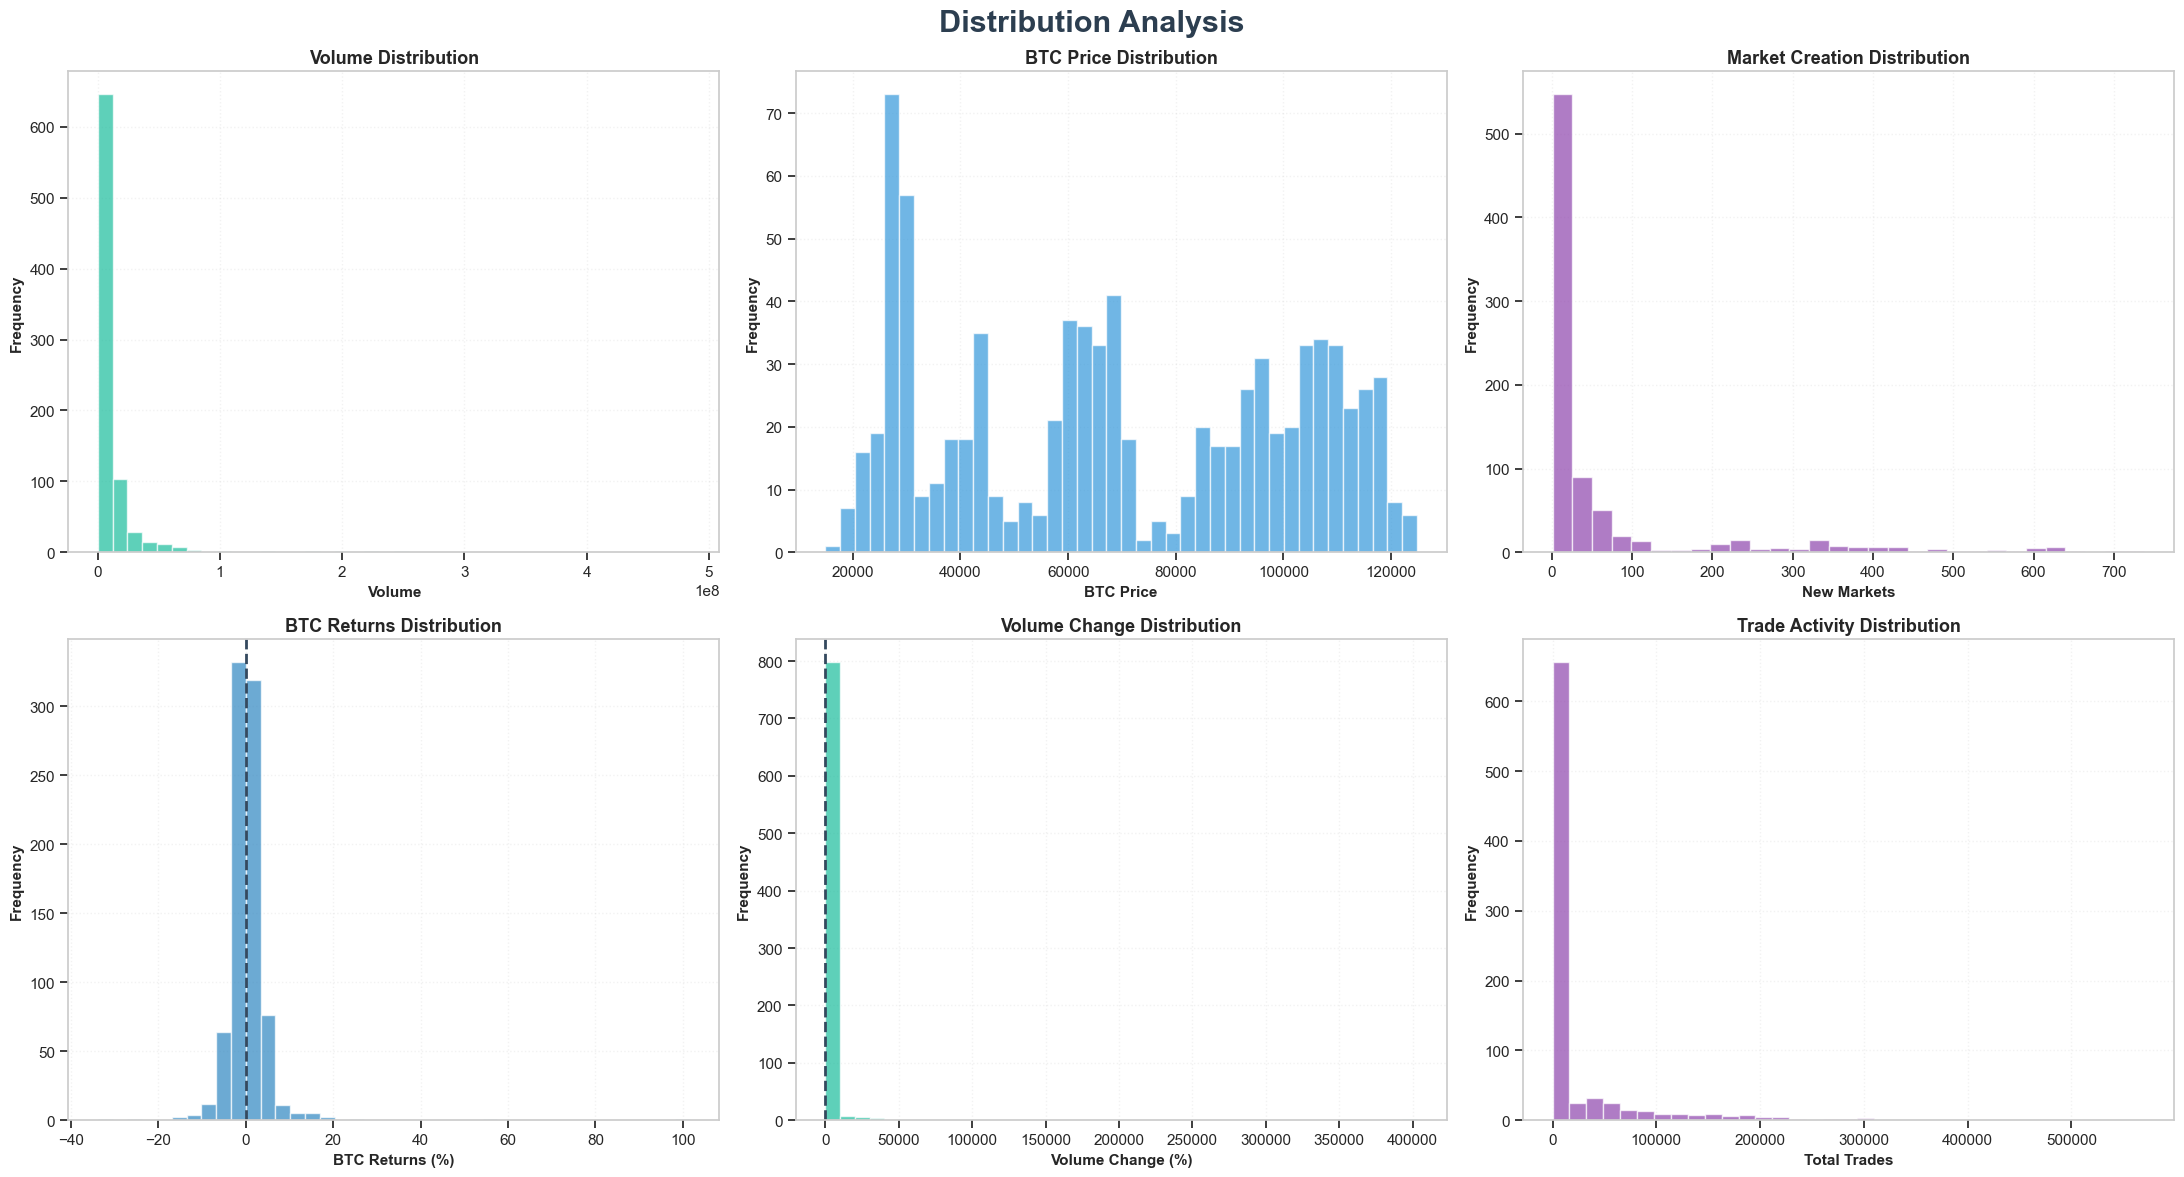


[8/8] Summary Dashboard...
✓ Saved: 08_summary_dashboard.png


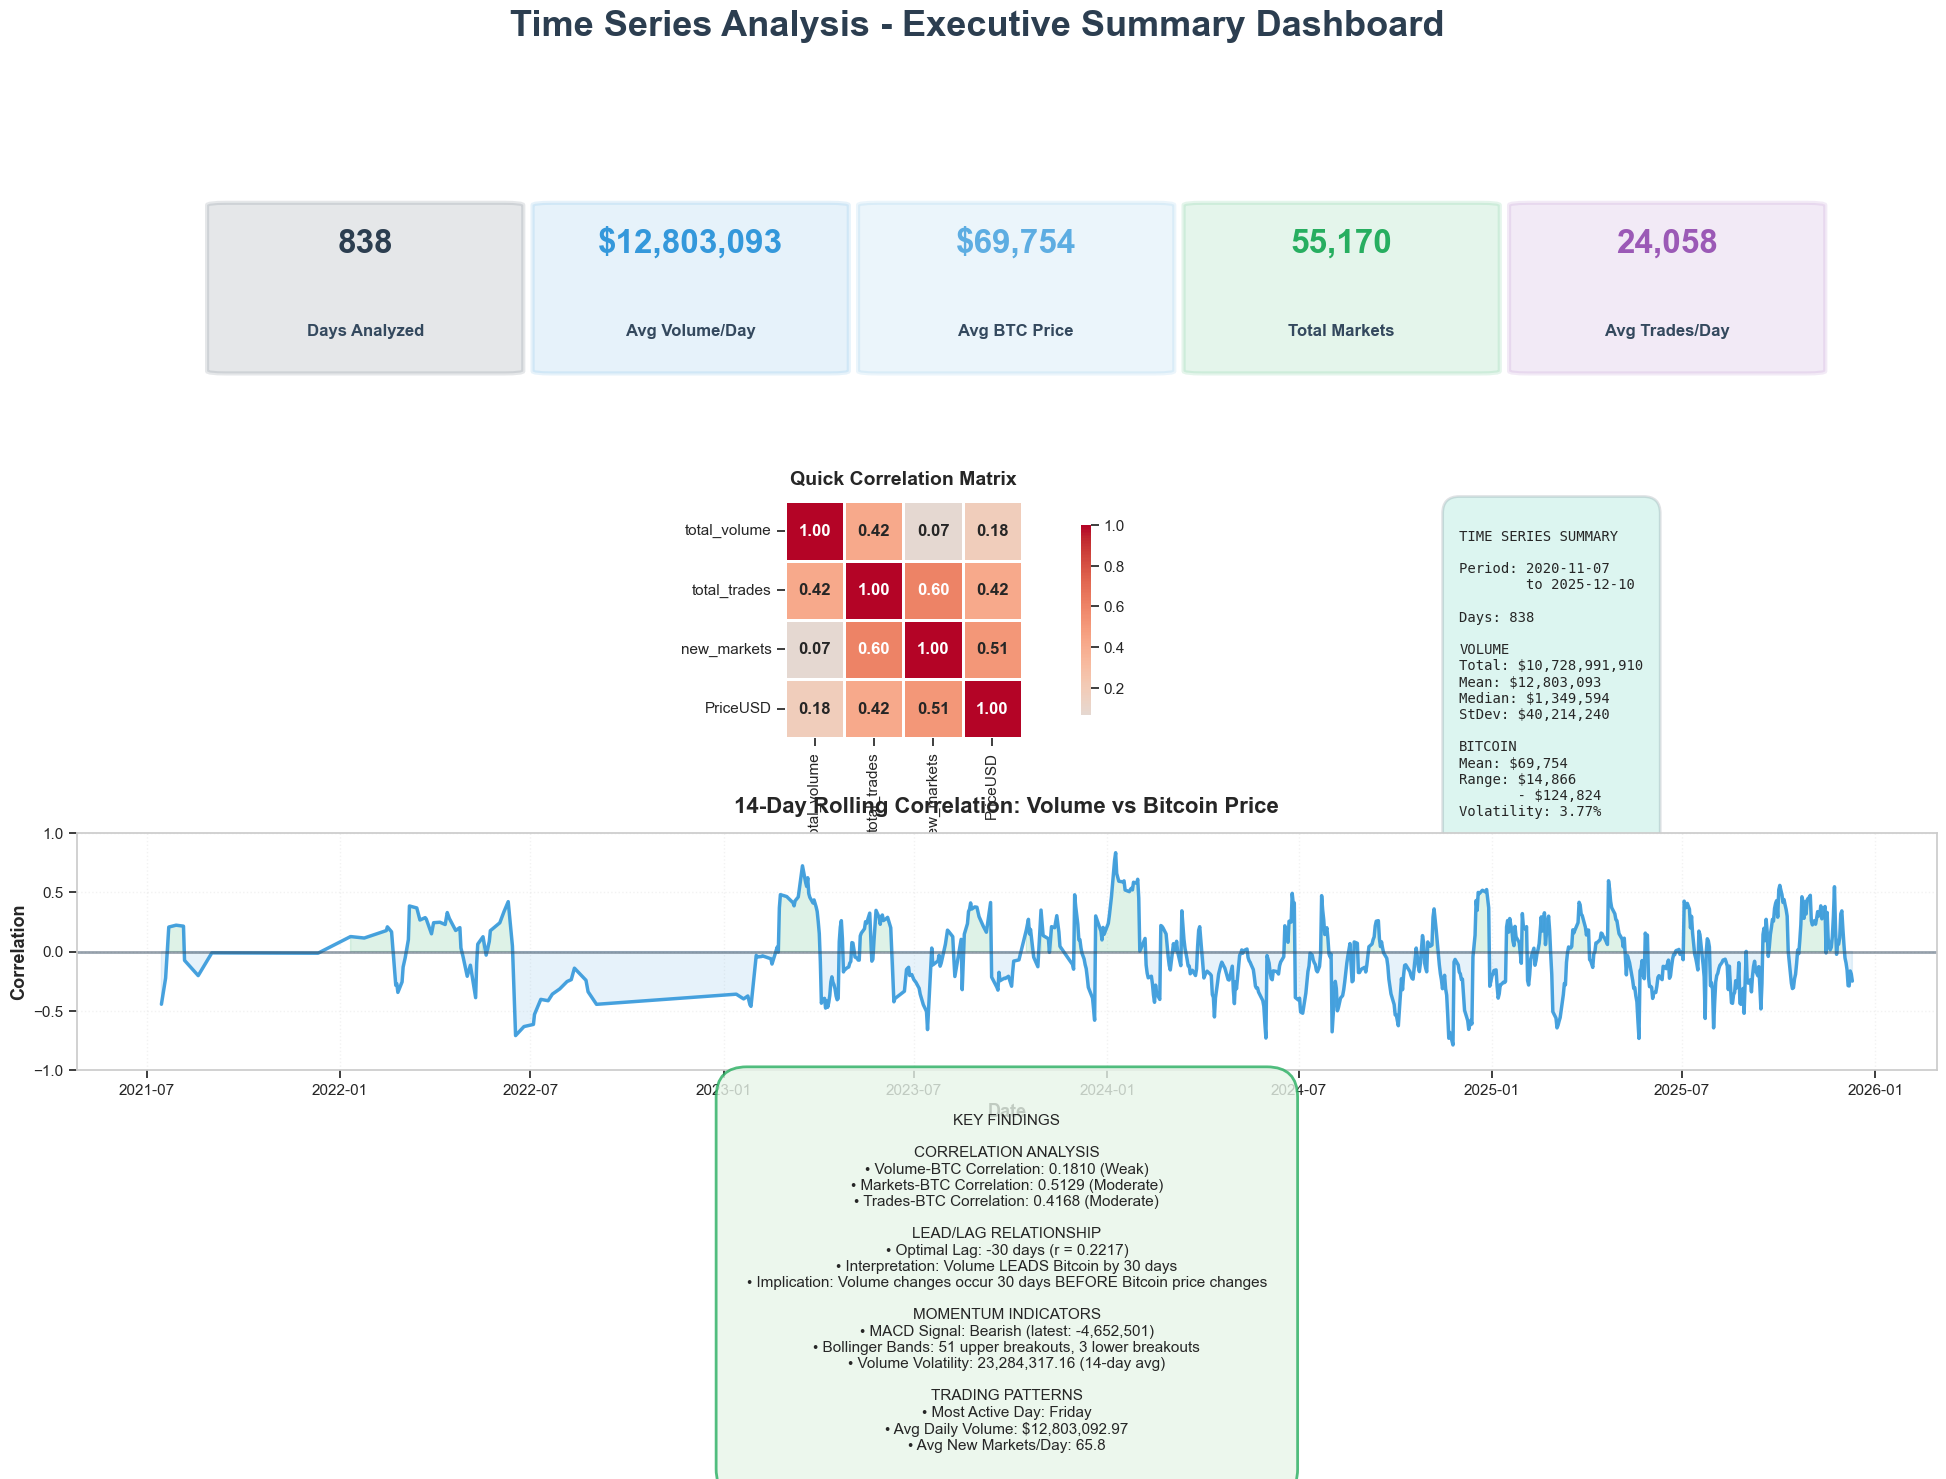


[DATA EXPORT]
----------------------------------------------------------------------------------------------------
✓ Exported: timeseries_data.csv (838 rows)
✓ Exported: correlation_matrix.csv
✓ Exported: lagged_correlations.csv

                         COMPREHENSIVE TIME SERIES ANALYSIS COMPLETE

[DATASET SUMMARY]
  Time period: 2020-11-07 to 2025-12-10
  Total days: 838
  Markets analyzed: 55,170
  Total volume: $10,728,991,910.42
  Total trades: 20,160,854

[KEY FINDINGS]
  Volume-BTC correlation: 0.1810
  Markets-BTC correlation: 0.5129
  Optimal lag: -30 days (Volume LEADS Bitcoin by 30 days)
  Avg daily volume: $12,803,092.97
  Avg BTC price: $69,754.04
  BTC volatility (14d): 3.77%

[VISUALIZATIONS - 8 COMPREHENSIVE PLOTS]
  1. 01_comprehensive_timeseries.png   - BTC, markets, volume, trades (4 panels)
  2. 02_correlation_dashboard.png      - Matrix + scatters + phase + dual-axis (6 panels)
  3. 03_rolling_analysis.png           - Correlations, volatility, cumulative, Z-score 

In [ ]:
"""
COMPREHENSIVE TIME SERIES ANALYSIS - REST CATEGORIES (FIXED)
Using created_at timestamps - 8 Advanced Visualizations
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
from scipy import stats
from scipy.signal import savgol_filter
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# ============================================
# PROFESSIONAL COLOR SCHEME
# ============================================

PALETTE_MAIN = {
    'primary': '#2C3E50',      # Dark blue-grey
    'secondary': '#3498DB',    # Bright blue
    'accent': '#1ABC9C',       # Teal
    'highlight': '#9B59B6',    # Purple
    'success': '#27AE60',      # Green
    'info': '#5DADE2',         # Light blue
    'dark': '#34495E',         # Dark grey
}

PALETTE_GRADIENT = {
    'blues': ['#EBF5FB', '#AED6F1', '#5DADE2', '#3498DB', '#2874A6', '#1B4F72'],
    'purples': ['#F4ECF7', '#D7BDE2', '#AF7AC5', '#8E44AD', '#6C3483', '#4A235A'],
    'teals': ['#E8F8F5', '#A3E4D7', '#52BE80', '#1ABC9C', '#17A589', '#138D75'],
    'greens': ['#E8F6F3', '#A9DFBF', '#52BE80', '#27AE60', '#1E8449', '#145A32'],
    'ocean': ['#85C1E9', '#5DADE2', '#3498DB', '#2E86C1', '#2874A6', '#1B4F72'],
}

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.0)
sns.set_palette(PALETTE_GRADIENT['ocean'])

PLOTS_DIR = Path('plots/rest_timeseries_complete')
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("="*100)
print(" " * 15 + "COMPREHENSIVE TIME SERIES ANALYSIS: REST CATEGORIES vs BITCOIN")
print(" " * 25 + "8 Advanced Visualizations + Full Bitcoin Correlation")
print("="*100)

# ============================================
# STEP 1: DATA LOADING
# ============================================

print("\n[STEP 1] DATA LOADING")
print("-" * 100)

try:
    markets_df = poly_data['markets'].copy()
    summary_df = poly_data['summary'].copy()
    btc_pandas = btc_df.copy() if isinstance(btc_df, pd.DataFrame) else btc_df.to_pandas()
    print(f"✓ Markets: {len(markets_df):,}")
    print(f"✓ Summary: {len(summary_df):,}")
    print(f"✓ Bitcoin: {len(btc_pandas):,}")
except Exception as e:
    print(f"✗ Error: {e}")
    raise

# ============================================
# STEP 2: TIMESTAMP FIXING (using created_at)
# ============================================

print("\n[STEP 2] TIMESTAMP FIXING (created_at)")
print("-" * 100)

# Merge for trade_count and token_count
markets_full = markets_df.merge(
    summary_df[['market_id', 'trade_count', 'token_count']],
    on='market_id',
    how='left'
)

print(f"✓ Merged with summary: {len(markets_full):,}")

# Fix created_at timestamps
print(f"\n  Processing created_at:")
print(f"    Dtype: {markets_full['created_at'].dtype}")

if not pd.api.types.is_datetime64_any_dtype(markets_full['created_at']):
    print(f"    Converting to datetime...")
    markets_full['created_at'] = pd.to_datetime(markets_full['created_at'], errors='coerce')

# Check for corruption
non_null = markets_full['created_at'].dropna()
if len(non_null) > 0:
    print(f"    Non-null: {len(non_null):,}")
    print(f"    Range: {non_null.min()} to {non_null.max()}")
    
    # Fix if corrupted
    if non_null.max() < pd.Timestamp("2020-01-01"):
        print(f"  ⚠️ Corruption detected! Fixing...")
        ns_values = markets_full['created_at'].values.astype("datetime64[ns]").astype("int64")
        markets_full['created_at'] = pd.to_datetime(ns_values * 1000)
        
        # Remove pre-2020
        mask = markets_full['created_at'] < pd.Timestamp("2020-01-01")
        if mask.any():
            print(f"    Removing {mask.sum():,} pre-2020 dates")
            markets_full.loc[mask, 'created_at'] = pd.NaT
        
        print(f"  ✓ Fixed! Range: {markets_full['created_at'].min()} to {markets_full['created_at'].max()}")

# Also fix end_date
if 'end_date' in markets_full.columns:
    if not pd.api.types.is_datetime64_any_dtype(markets_full['end_date']):
        markets_full['end_date'] = pd.to_datetime(markets_full['end_date'], errors='coerce')
    
    non_null_end = markets_full['end_date'].dropna()
    if len(non_null_end) > 0 and non_null_end.max() < pd.Timestamp("2020-01-01"):
        ns_values = markets_full['end_date'].values.astype("datetime64[ns]").astype("int64")
        markets_full['end_date'] = pd.to_datetime(ns_values * 1000)
        mask = markets_full['end_date'] < pd.Timestamp("2020-01-01")
        if mask.any():
            markets_full.loc[mask, 'end_date'] = pd.NaT

valid_created = markets_full['created_at'].notna().sum()
valid_end = markets_full['end_date'].notna().sum() if 'end_date' in markets_full.columns else 0

print(f"\n✓ Valid created_at: {valid_created:,} ({valid_created/len(markets_full)*100:.1f}%)")
if valid_end > 0:
    print(f"✓ Valid end_date: {valid_end:,} ({valid_end/len(markets_full)*100:.1f}%)")

if valid_created == 0:
    print("\n❌ No valid timestamps! Cannot proceed.")
    raise ValueError("No timestamp data")

# ============================================
# STEP 3: REST FILTERING
# ============================================

print("\n[STEP 3] REST CATEGORY FILTERING")
print("-" * 100)

CRYPTO_KEYWORDS = ['bitcoin', 'btc', 'ethereum', 'eth', 'crypto', 'blockchain', 'defi']
POLITICS_KEYWORDS = ['election', 'president', 'trump', 'biden', 'harris', 'congress', 'senate']

def is_rest_category(row):
    category = str(row.get('category', '')).lower()
    question = str(row.get('question', '')).lower()
    
    if category in ['crypto', 'politics', 'global politics', 'us-current-affairs']:
        return False
    
    crypto_count = sum(1 for kw in CRYPTO_KEYWORDS if kw in question)
    politics_count = sum(1 for kw in POLITICS_KEYWORDS if kw in question)
    
    if crypto_count >= 2 or politics_count >= 2:
        return False
    
    return True

markets_full['is_rest'] = markets_full.apply(is_rest_category, axis=1)
markets_rest = markets_full[markets_full['is_rest']].copy()

print(f"✓ Total: {len(markets_full):,}")
print(f"✓ REST: {len(markets_rest):,} ({len(markets_rest)/len(markets_full)*100:.1f}%)")

# Filter with timestamps
markets_with_dates = markets_rest[markets_rest['created_at'].notna()].copy()
print(f"✓ REST with timestamps: {len(markets_with_dates):,}")

if len(markets_with_dates) == 0:
    print("\n❌ No REST markets with timestamps!")
    raise ValueError("No timestamp data")

print(f"  Date range: {markets_with_dates['created_at'].min()} to {markets_with_dates['created_at'].max()}")

# ============================================
# STEP 4: TIME SERIES AGGREGATION
# ============================================

print("\n[STEP 4] TIME SERIES AGGREGATION")
print("-" * 100)

markets_with_dates['date'] = markets_with_dates['created_at'].dt.date

daily_agg = (
    markets_with_dates.groupby('date')
    .agg({
        'market_id': 'count',
        'volume': 'sum',
        'trade_count': 'sum',
        'active': 'sum',
        'token_count': 'sum',
    })
    .rename(columns={
        'market_id': 'new_markets',
        'volume': 'total_volume',
        'trade_count': 'total_trades',
        'active': 'active_markets',
        'token_count': 'total_tokens',
    })
    .reset_index()
)

daily_agg['date'] = pd.to_datetime(daily_agg['date'])
print(f"✓ Daily aggregation: {len(daily_agg):,} days")
print(f"  Range: {daily_agg['date'].min().date()} to {daily_agg['date'].max().date()}")

# Bitcoin
btc_pandas['time'] = pd.to_datetime(btc_pandas['time'])
btc_pandas['date'] = btc_pandas['time'].dt.date
btc_daily = btc_pandas[['date', 'PriceUSD', 'CapMrktCurUSD', 'TxCnt', 'HashRate']].copy()
btc_daily['date'] = pd.to_datetime(btc_daily['date'])
btc_daily = btc_daily[btc_daily['PriceUSD'].notna()].copy()

print(f"✓ Bitcoin daily: {len(btc_daily):,} days")
print(f"  Range: {btc_daily['date'].min().date()} to {btc_daily['date'].max().date()}")

# Merge
merged_df = daily_agg.merge(btc_daily, on='date', how='inner')
merged_df = merged_df.sort_values('date').reset_index(drop=True)

print(f"\n✓ MERGED: {len(merged_df):,} days")

if len(merged_df) == 0:
    print("\n❌ No overlap!")
    print(f"  Polymarket: {daily_agg['date'].min().date()} to {daily_agg['date'].max().date()}")
    print(f"  Bitcoin: {btc_daily['date'].min().date()} to {btc_daily['date'].max().date()}")
    raise ValueError("No overlap")

print(f"  Overlap: {merged_df['date'].min().date()} to {merged_df['date'].max().date()}")

# Calculate features
merged_df['btc_returns'] = merged_df['PriceUSD'].pct_change()
merged_df['volume_change'] = merged_df['total_volume'].pct_change()
merged_df['volume_ma7'] = merged_df['total_volume'].rolling(7, min_periods=1).mean()
merged_df['volume_ma30'] = merged_df['total_volume'].rolling(30, min_periods=1).mean()
merged_df['btc_ma7'] = merged_df['PriceUSD'].rolling(7, min_periods=1).mean()
merged_df['btc_ma30'] = merged_df['PriceUSD'].rolling(30, min_periods=1).mean()
merged_df['btc_volatility'] = merged_df['btc_returns'].rolling(14, min_periods=1).std()
merged_df['volume_momentum_7d'] = merged_df['volume_change'].rolling(7).mean()

print(f"✓ Calculated {len(merged_df.columns)} features")

# ============================================
# VIZ 1: COMPREHENSIVE TIME SERIES (4 panels)
# ============================================

print("\n[VISUALIZATIONS] Creating 8 comprehensive plots...")
print("-" * 100)

print("\n[1/8] Comprehensive Time Series...")

fig, axes = plt.subplots(4, 1, figsize=(22, 16), sharex=True)
fig.suptitle('REST Markets vs Bitcoin - Comprehensive Time Series', 
             fontsize=24, fontweight='bold', color=PALETTE_MAIN['primary'])

# Bitcoin Price
ax = axes[0]
ax.plot(merged_df['date'], merged_df['PriceUSD'], 
       color=PALETTE_MAIN['primary'], linewidth=2.5, label='BTC Price', alpha=0.9)
ax.plot(merged_df['date'], merged_df['btc_ma7'], 
       color=PALETTE_MAIN['secondary'], linewidth=2, linestyle='--', label='7-Day MA', alpha=0.7)
ax.plot(merged_df['date'], merged_df['btc_ma30'], 
       color=PALETTE_MAIN['info'], linewidth=2, linestyle=':', label='30-Day MA', alpha=0.7)
ax.fill_between(merged_df['date'], merged_df['PriceUSD'], alpha=0.12, color=PALETTE_MAIN['primary'])
ax.set_ylabel('BTC Price (USD)', fontsize=13, fontweight='600')
ax.set_title('Bitcoin Price Trend', fontsize=16, fontweight='bold', pad=10)
ax.legend(loc='best', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle=':')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))

# New Markets
ax = axes[1]
ax.bar(merged_df['date'], merged_df['new_markets'], 
      color=PALETTE_GRADIENT['teals'][3], alpha=0.75, width=1, edgecolor='white', linewidth=0.5)
ax.set_ylabel('New Markets Created', fontsize=13, fontweight='600')
ax.set_title('Daily Market Creation Activity', fontsize=16, fontweight='bold', pad=10)
ax.grid(True, alpha=0.25, linestyle=':')

# Volume
ax = axes[2]
ax.plot(merged_df['date'], merged_df['total_volume'], 
       color=PALETTE_MAIN['accent'], linewidth=2.5, label='Daily Volume', alpha=0.9)
ax.plot(merged_df['date'], merged_df['volume_ma7'], 
       color=PALETTE_MAIN['highlight'], linewidth=2, linestyle='--', label='7-Day MA', alpha=0.7)
ax.fill_between(merged_df['date'], merged_df['total_volume'], alpha=0.2, color=PALETTE_MAIN['accent'])
ax.set_ylabel('Trading Volume (USD)', fontsize=13, fontweight='600')
ax.set_title('Trading Volume Trend', fontsize=16, fontweight='bold', pad=10)
ax.legend(loc='best', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle=':')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))

# Trades
ax = axes[3]
ax.plot(merged_df['date'], merged_df['total_trades'], 
       color=PALETTE_GRADIENT['purples'][3], linewidth=2.5, alpha=0.9)
ax.fill_between(merged_df['date'], merged_df['total_trades'], 
                alpha=0.2, color=PALETTE_GRADIENT['purples'][3])
ax.set_ylabel('Total Trades', fontsize=13, fontweight='600')
ax.set_xlabel('Date', fontsize=13, fontweight='600')
ax.set_title('Trading Activity', fontsize=16, fontweight='bold', pad=10)
ax.grid(True, alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '01_comprehensive_timeseries.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 01_comprehensive_timeseries.png")
plt.show()

# ============================================
# VIZ 2: CORRELATION DASHBOARD (6 panels)
# ============================================

print("\n[2/8] Correlation Dashboard...")

fig = plt.figure(figsize=(22, 14))
gs = GridSpec(3, 3, figure=fig, hspace=0.35, wspace=0.35)
fig.suptitle('Bitcoin Correlation Analysis Dashboard', 
             fontsize=24, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Correlation Matrix
ax1 = plt.subplot(gs[0, :2])
corr_cols = ['new_markets', 'total_volume', 'total_trades', 'active_markets', 'PriceUSD']
corr_matrix = merged_df[corr_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', center=0,
           square=True, linewidths=3, cbar_kws={"shrink": 0.8}, ax=ax1,
           annot_kws={'size': 14, 'weight': 'bold'})
ax1.set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=15)

# 2. Volume vs BTC
ax2 = plt.subplot(gs[0, 2])
scatter = ax2.scatter(merged_df['total_volume'], merged_df['PriceUSD'],
                     c=merged_df['total_trades'], cmap='viridis',
                     s=90, alpha=0.65, edgecolors='white', linewidth=1.5)
ax2.set_xlabel('Volume (USD)', fontsize=11, fontweight='600')
ax2.set_ylabel('BTC Price (USD)', fontsize=11, fontweight='600')
ax2.set_title('Volume vs BTC', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.25, linestyle=':')
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Trades', fontsize=9)

# 3. Markets vs BTC
ax3 = plt.subplot(gs[1, 0])
scatter = ax3.scatter(merged_df['new_markets'], merged_df['PriceUSD'],
                     c=merged_df.index, cmap='plasma',
                     s=90, alpha=0.65, edgecolors='white', linewidth=1.5)
ax3.set_xlabel('New Markets', fontsize=11, fontweight='600')
ax3.set_ylabel('BTC Price (USD)', fontsize=11, fontweight='600')
ax3.set_title('Markets vs BTC', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.25, linestyle=':')
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Time', fontsize=9)

# 4. Trades vs BTC
ax4 = plt.subplot(gs[1, 1])
scatter = ax4.scatter(merged_df['total_trades'], merged_df['PriceUSD'],
                     c=merged_df['total_volume'], cmap='coolwarm',
                     s=90, alpha=0.65, edgecolors='white', linewidth=1.5)
ax4.set_xlabel('Total Trades', fontsize=11, fontweight='600')
ax4.set_ylabel('BTC Price (USD)', fontsize=11, fontweight='600')
ax4.set_title('Trades vs BTC', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.25, linestyle=':')
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Volume', fontsize=9)

# 5. Phase Diagram (filter inf/NaN)
ax5 = plt.subplot(gs[1, 2])
# Filter out inf and NaN values
phase_mask = (
    np.isfinite(merged_df['btc_returns']) & 
    np.isfinite(merged_df['volume_change']) & 
    merged_df['btc_returns'].notna() & 
    merged_df['volume_change'].notna()
)
phase_data = merged_df[phase_mask]
if len(phase_data) > 0:
    scatter = ax5.scatter(phase_data['btc_returns']*100, phase_data['volume_change']*100,
                         c=phase_data['PriceUSD'], cmap='plasma', s=70, alpha=0.65,
                         edgecolors='white', linewidth=1)
ax5.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
ax5.axvline(x=0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
ax5.set_xlabel('BTC Returns (%)', fontsize=11, fontweight='600')
ax5.set_ylabel('Volume Change (%)', fontsize=11, fontweight='600')
ax5.set_title('Phase Diagram', fontsize=13, fontweight='bold')
ax5.grid(True, alpha=0.25, linestyle=':')

# 6. Dual Axis
ax6 = plt.subplot(gs[2, :])
ax6_twin = ax6.twinx()
ln1 = ax6.plot(merged_df['date'], merged_df['total_volume'],
             color=PALETTE_MAIN['accent'], linewidth=2.5, label='Volume', alpha=0.9)
ln2 = ax6_twin.plot(merged_df['date'], merged_df['PriceUSD'],
                   color=PALETTE_MAIN['primary'], linewidth=2.5, label='BTC Price', alpha=0.9)
ax6.set_ylabel('Volume (USD)', fontsize=13, fontweight='600', color=PALETTE_MAIN['accent'])
ax6_twin.set_ylabel('BTC Price (USD)', fontsize=13, fontweight='600', color=PALETTE_MAIN['primary'])
ax6.set_xlabel('Date', fontsize=13, fontweight='600')
ax6.set_title('Volume vs Bitcoin Price - Dual Axis View', fontsize=16, fontweight='bold', pad=15)
ax6.tick_params(axis='y', labelcolor=PALETTE_MAIN['accent'])
ax6_twin.tick_params(axis='y', labelcolor=PALETTE_MAIN['primary'])
ax6.grid(True, alpha=0.25, linestyle=':')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax6.legend(lns, labs, loc='upper left', fontsize=12, framealpha=0.95)

plt.tight_layout()
plt.savefig(PLOTS_DIR / '02_correlation_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 02_correlation_dashboard.png")
plt.show()

# Print correlations
print("\n  Correlation with BTC Price:")
for col in ['new_markets', 'total_volume', 'total_trades', 'active_markets']:
    if col in corr_matrix.columns:
        corr_val = corr_matrix.loc[col, 'PriceUSD']
        strength = 'Strong' if abs(corr_val) > 0.7 else 'Moderate' if abs(corr_val) > 0.4 else 'Weak'
        direction = 'positive' if corr_val > 0 else 'negative'
        print(f"    {col:20s}: {corr_val:7.4f} ({strength} {direction})")

# ============================================
# VIZ 3: ROLLING ANALYSIS (6 panels)
# ============================================

print("\n[3/8] Rolling Window Analysis...")

fig = plt.figure(figsize=(22, 16))
gs = GridSpec(4, 2, figure=fig, hspace=0.35, wspace=0.3)
fig.suptitle('Rolling Window Dynamics', 
             fontsize=24, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Multi-window Rolling Correlations
ax1 = plt.subplot(gs[0, :])
windows = [7, 14, 30]
colors_windows = [PALETTE_GRADIENT['ocean'][2], PALETTE_GRADIENT['teals'][3], 
                 PALETTE_GRADIENT['purples'][3]]

for window, color in zip(windows, colors_windows):
    if len(merged_df) >= window:
        rolling_corr = merged_df['total_volume'].rolling(window).corr(merged_df['PriceUSD'])
        ax1.plot(merged_df['date'], rolling_corr, linewidth=2.5, 
                label=f'{window}-Day Window', color=color, alpha=0.85)

ax1.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2, alpha=0.5)
ax1.fill_between(merged_df['date'], 0, 1, alpha=0.08, color=PALETTE_MAIN['success'])
ax1.fill_between(merged_df['date'], -1, 0, alpha=0.08, color=PALETTE_MAIN['info'])
ax1.set_ylabel('Correlation Coefficient', fontsize=13, fontweight='600')
ax1.set_xlabel('Date', fontsize=13, fontweight='600')
ax1.set_title('Multi-Window Rolling Correlation: Volume vs Bitcoin Price', 
             fontsize=16, fontweight='bold', pad=15)
ax1.legend(loc='best', fontsize=12, framealpha=0.95)
ax1.grid(True, alpha=0.25, linestyle=':')
ax1.set_ylim(-1, 1)

# 2. Cumulative Volume
ax2 = plt.subplot(gs[1, 0])
merged_df['cumulative_volume'] = merged_df['total_volume'].cumsum()
ax2.plot(merged_df['date'], merged_df['cumulative_volume']/1e6, 
        color=PALETTE_GRADIENT['teals'][3], linewidth=3, alpha=0.9)
ax2.fill_between(merged_df['date'], merged_df['cumulative_volume']/1e6, 
                 alpha=0.25, color=PALETTE_GRADIENT['teals'][3])
ax2.set_ylabel('Cumulative Volume ($M)', fontsize=12, fontweight='600')
ax2.set_xlabel('Date', fontsize=12, fontweight='600')
ax2.set_title('Cumulative Volume Growth', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.25, linestyle=':')

# 3. Rolling Volatility
ax3 = plt.subplot(gs[1, 1])
for window, color in zip([7, 14, 30], colors_windows):
    if len(merged_df) >= window:
        rolling_std = merged_df['total_volume'].rolling(window).std()
        ax3.plot(merged_df['date'], rolling_std, linewidth=2.5, 
                label=f'{window}-Day', color=color, alpha=0.85)
ax3.set_ylabel('Volume Std Dev', fontsize=12, fontweight='600')
ax3.set_xlabel('Date', fontsize=12, fontweight='600')
ax3.set_title('Rolling Volume Volatility', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11, framealpha=0.95)
ax3.grid(True, alpha=0.25, linestyle=':')

# 4. Cumulative Trades
ax4 = plt.subplot(gs[2, 0])
merged_df['cumulative_trades'] = merged_df['total_trades'].cumsum()
merged_df['cumulative_pct'] = merged_df['cumulative_trades'] / merged_df['cumulative_trades'].max() * 100
ax4.plot(merged_df['date'], merged_df['cumulative_pct'], 
        color=PALETTE_GRADIENT['purples'][3], linewidth=3, alpha=0.9)
ax4.fill_between(merged_df['date'], merged_df['cumulative_pct'], 
                 alpha=0.25, color=PALETTE_GRADIENT['purples'][3])
ax4.set_ylabel('Cumulative % of Total Trades', fontsize=12, fontweight='600')
ax4.set_xlabel('Date', fontsize=12, fontweight='600')
ax4.set_title('Trade Accumulation Over Time', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.25, linestyle=':')

# 5. BTC Volatility
ax5 = plt.subplot(gs[2, 1])
ax5.plot(merged_df['date'], merged_df['btc_volatility']*100, 
        color=PALETTE_MAIN['secondary'], linewidth=2.5, alpha=0.9)
ax5.fill_between(merged_df['date'], merged_df['btc_volatility']*100, 
                 alpha=0.2, color=PALETTE_MAIN['secondary'])
ax5.set_ylabel('BTC Volatility (%)', fontsize=12, fontweight='600')
ax5.set_xlabel('Date', fontsize=12, fontweight='600')
ax5.set_title('Bitcoin 14-Day Volatility', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.25, linestyle=':')

# 6. Volume Z-Score
ax6 = plt.subplot(gs[3, :])
merged_df['volume_zscore'] = (merged_df['total_volume'] - merged_df['total_volume'].mean()) / merged_df['total_volume'].std()
colors_zscore = [PALETTE_MAIN['info'] if x < -1 else 
                 PALETTE_GRADIENT['blues'][2] if x < 0 else 
                 PALETTE_GRADIENT['teals'][2] if x < 1 else 
                 PALETTE_MAIN['success'] for x in merged_df['volume_zscore']]
ax6.bar(merged_df['date'], merged_df['volume_zscore'], color=colors_zscore, 
       alpha=0.7, width=1, edgecolor='white', linewidth=0.5)
ax6.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2)
ax6.axhline(y=1, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5, label='±1σ')
ax6.axhline(y=-1, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
ax6.axhline(y=2, color=PALETTE_MAIN['info'], linestyle=':', linewidth=1.5, alpha=0.5, label='±2σ')
ax6.axhline(y=-2, color=PALETTE_MAIN['info'], linestyle=':', linewidth=1.5, alpha=0.5)
ax6.set_ylabel('Z-Score', fontsize=13, fontweight='600')
ax6.set_xlabel('Date', fontsize=13, fontweight='600')
ax6.set_title('Volume Regime Classification (Z-Score)', fontsize=16, fontweight='bold', pad=15)
ax6.legend(fontsize=11, framealpha=0.95)
ax6.grid(True, alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '03_rolling_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 03_rolling_analysis.png")
plt.show()

# ============================================
# VIZ 4: LAGGED CROSS-CORRELATION
# ============================================

print("\n[4/8] Lagged Cross-Correlation...")

fig, ax = plt.subplots(figsize=(20, 10))
fig.suptitle('Lagged Cross-Correlation Analysis - Lead/Lag Detection', 
             fontsize=24, fontweight='bold', color=PALETTE_MAIN['primary'])

max_lag = min(30, len(merged_df)//3)
lags = range(-max_lag, max_lag+1)
lagged_corrs = []

for lag in lags:
    if lag < 0:
        corr = merged_df['total_volume'].shift(-lag).corr(merged_df['PriceUSD'])
    else:
        corr = merged_df['total_volume'].corr(merged_df['PriceUSD'].shift(lag))
    lagged_corrs.append(corr)

colors_lag = [PALETTE_MAIN['success'] if c > 0 else PALETTE_MAIN['info'] for c in lagged_corrs]
bars = ax.bar(lags, lagged_corrs, color=colors_lag, alpha=0.7, width=0.8, 
           edgecolor='white', linewidth=1.5)

ax.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2, alpha=0.5)
ax.axvline(x=0, color=PALETTE_MAIN['primary'], linestyle='--', linewidth=2.5, alpha=0.7)

# Optimal lag
max_corr_idx = np.argmax(np.abs(lagged_corrs))
optimal_lag = list(lags)[max_corr_idx]
ax.axvline(x=optimal_lag, color=PALETTE_MAIN['highlight'], linestyle='--', 
          linewidth=3, label=f'Optimal Lag: {optimal_lag}d (r={lagged_corrs[max_corr_idx]:.3f})')

ax.set_xlabel('Lag (days)', fontsize=14, fontweight='600')
ax.set_ylabel('Correlation Coefficient', fontsize=14, fontweight='600')
ax.set_title('Volume vs Bitcoin Price - Lead/Lag Relationship', 
            fontsize=18, fontweight='bold', pad=20)
ax.legend(fontsize=13, loc='upper right', framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle=':')

# Interpretation
if optimal_lag < 0:
    interp = f"Volume LEADS Bitcoin by {abs(optimal_lag)} days"
    interp_detail = f"Volume changes occur {abs(optimal_lag)} days BEFORE Bitcoin price changes"
elif optimal_lag > 0:
    interp = f"Bitcoin LEADS Volume by {optimal_lag} days"
    interp_detail = f"Bitcoin price changes occur {optimal_lag} days BEFORE volume changes"
else:
    interp = "Synchronous relationship"
    interp_detail = "Volume and Bitcoin price change simultaneously"

ax.text(0.02, 0.98, f"{interp}\n{interp_detail}", transform=ax.transAxes, fontsize=13, 
       verticalalignment='top', fontweight='bold',
       bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', 
                alpha=0.8, linewidth=2, edgecolor=PALETTE_MAIN['primary']))

plt.tight_layout()
plt.savefig(PLOTS_DIR / '04_lagged_correlation.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 04_lagged_correlation.png")
plt.show()

print(f"\n  Optimal lag: {optimal_lag} days")
print(f"  Correlation: {lagged_corrs[max_corr_idx]:.4f}")
print(f"  Interpretation: {interp}")

# ============================================
# VIZ 5: MOMENTUM ANALYSIS (3 panels)
# ============================================

print("\n[5/8] Momentum Analysis...")

fig, axes = plt.subplots(3, 1, figsize=(22, 16), sharex=True)
fig.suptitle('Momentum & Technical Analysis', 
             fontsize=24, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Volume Momentum
ax = axes[0]
ax_twin = ax.twinx()
ln1 = ax.plot(merged_df['date'], merged_df['volume_momentum_7d']*100, 
              color=PALETTE_GRADIENT['teals'][3], linewidth=2.5, label='Volume Momentum')
ln2 = ax_twin.plot(merged_df['date'], merged_df['btc_returns']*100, 
                   color=PALETTE_GRADIENT['purples'][3], linewidth=2.5, 
                   linestyle='--', label='BTC Returns', alpha=0.8)

ax.fill_between(merged_df['date'], merged_df['volume_momentum_7d']*100, 0,
                where=merged_df['volume_momentum_7d'] > 0, alpha=0.2, color=PALETTE_MAIN['success'])
ax.fill_between(merged_df['date'], merged_df['volume_momentum_7d']*100, 0,
                where=merged_df['volume_momentum_7d'] < 0, alpha=0.2, color=PALETTE_MAIN['info'])

ax.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2)
ax.set_ylabel('Volume Momentum (%)', fontsize=13, fontweight='600', color=PALETTE_GRADIENT['teals'][3])
ax_twin.set_ylabel('BTC Returns (%)', fontsize=13, fontweight='600', color=PALETTE_GRADIENT['purples'][3])
ax.set_title('Volume Momentum vs Bitcoin Returns', fontsize=16, fontweight='bold', pad=10)
ax.tick_params(axis='y', labelcolor=PALETTE_GRADIENT['teals'][3])
ax_twin.tick_params(axis='y', labelcolor=PALETTE_GRADIENT['purples'][3])
ax.grid(True, alpha=0.25, linestyle=':')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left', fontsize=11, framealpha=0.95)

# 2. MACD
ax = axes[1]
ma_fast = merged_df['total_volume'].rolling(7).mean()
ma_slow = merged_df['total_volume'].rolling(21).mean()
macd = ma_fast - ma_slow
signal = macd.rolling(9).mean()
histogram = macd - signal

ax.plot(merged_df['date'], macd, color=PALETTE_GRADIENT['purples'][3], 
       linewidth=2.5, label='MACD (7-21)')
ax.plot(merged_df['date'], signal, color=PALETTE_GRADIENT['ocean'][2], 
       linewidth=2.5, linestyle='--', label='Signal (9)')
ax.bar(merged_df['date'], histogram, color=PALETTE_GRADIENT['teals'][2], 
      alpha=0.5, label='Histogram', width=1)
ax.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2)
ax.set_ylabel('MACD Value', fontsize=13, fontweight='600')
ax.set_title('Volume MACD Indicator (7-21-9)', fontsize=16, fontweight='bold', pad=10)
ax.legend(fontsize=11, loc='best', framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle=':')

# 3. Bollinger Bands
ax = axes[2]
window_bb = 20
ma_bb = merged_df['total_volume'].rolling(window_bb).mean()
std_bb = merged_df['total_volume'].rolling(window_bb).std()
upper_band = ma_bb + (std_bb * 2)
lower_band = ma_bb - (std_bb * 2)

ax.plot(merged_df['date'], merged_df['total_volume'], 
       color=PALETTE_GRADIENT['ocean'][2], linewidth=2, label='Volume', alpha=0.8)
ax.plot(merged_df['date'], ma_bb, color=PALETTE_MAIN['dark'], linewidth=2.5, 
       linestyle='--', label=f'{window_bb}-Day MA')
ax.plot(merged_df['date'], upper_band, color=PALETTE_MAIN['info'], 
       linewidth=2, linestyle=':', label='Upper (+2σ)', alpha=0.7)
ax.plot(merged_df['date'], lower_band, color=PALETTE_MAIN['success'], 
       linewidth=2, linestyle=':', label='Lower (-2σ)', alpha=0.7)
ax.fill_between(merged_df['date'], lower_band, upper_band, alpha=0.1, color=PALETTE_MAIN['dark'])

# Breakouts
breakout_up = merged_df['total_volume'] > upper_band
breakout_down = merged_df['total_volume'] < lower_band
if breakout_up.any():
    ax.scatter(merged_df.loc[breakout_up, 'date'], 
              merged_df.loc[breakout_up, 'total_volume'],
              color=PALETTE_MAIN['info'], s=150, marker='^', zorder=10, 
              label=f'Upper Breakout ({breakout_up.sum()})', edgecolors='white', linewidth=2)
if breakout_down.any():
    ax.scatter(merged_df.loc[breakout_down, 'date'], 
              merged_df.loc[breakout_down, 'total_volume'],
              color=PALETTE_MAIN['success'], s=150, marker='v', zorder=10, 
              label=f'Lower Breakout ({breakout_down.sum()})', edgecolors='white', linewidth=2)

ax.set_ylabel('Trading Volume', fontsize=13, fontweight='600')
ax.set_xlabel('Date', fontsize=13, fontweight='600')
ax.set_title('Bollinger Bands - Volume Breakout Detection (20-day, ±2σ)', 
            fontsize=16, fontweight='bold', pad=10)
ax.legend(fontsize=11, loc='best', ncol=3, framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '05_momentum_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 05_momentum_analysis.png")
plt.show()

if breakout_up.any() or breakout_down.any():
    print(f"  Breakout events: {breakout_up.sum()} upper, {breakout_down.sum()} lower")

# ============================================
# VIZ 6: PATTERN DETECTION (4 panels)
# ============================================

print("\n[6/8] Pattern Detection...")

fig = plt.figure(figsize=(22, 14))
gs = GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.3)
fig.suptitle('Market Patterns & Seasonality Analysis', 
             fontsize=24, fontweight='bold', color=PALETTE_MAIN['primary'])

# 1. Weekly Seasonality
if len(merged_df) > 30:
    ax1 = plt.subplot(gs[0, 0])
    merged_df['day_of_week'] = merged_df['date'].dt.day_name()
    weekly_vol = merged_df.groupby('day_of_week')['total_volume'].mean()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekly_vol = weekly_vol.reindex(day_order)
    
    colors_days = [PALETTE_GRADIENT['ocean'][i % 6] for i in range(7)]
    bars = ax1.bar(range(7), weekly_vol, color=colors_days, 
                  edgecolor='white', linewidth=2, alpha=0.85)
    ax1.set_xticks(range(7))
    ax1.set_xticklabels([d[:3] for d in day_order], fontsize=11, fontweight='600')
    ax1.set_ylabel('Avg Volume', fontsize=12, fontweight='600')
    ax1.set_title('Weekly Trading Pattern', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.25, linestyle=':')
    for i, (bar, val) in enumerate(zip(bars, weekly_vol)):
        ax1.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='600')

# 2. Monthly Pattern
if len(merged_df) > 90:
    ax2 = plt.subplot(gs[0, 1])
    merged_df['month'] = merged_df['date'].dt.month
    monthly_vol = merged_df.groupby('month')['total_volume'].mean()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    colors_months = [PALETTE_GRADIENT['teals'][int(i/12*5)] for i in range(12)]
    bars = ax2.bar(range(1, 13), [monthly_vol.get(i, 0) for i in range(1, 13)], 
                  color=colors_months, edgecolor='white', linewidth=2, alpha=0.85)
    ax2.set_xticks(range(1, 13))
    ax2.set_xticklabels(month_names, fontsize=10, fontweight='600')
    ax2.set_ylabel('Avg Volume', fontsize=12, fontweight='600')
    ax2.set_title('Monthly Trading Pattern', fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.25, linestyle=':')

# 3. Trend Decomposition
ax3 = plt.subplot(gs[1, :])
window_sg = min(51, len(merged_df)//2*2+1)
if window_sg >= 5 and len(merged_df) >= window_sg:
    trend = savgol_filter(merged_df['total_volume'], window_sg, 3)
    detrended = merged_df['total_volume'] - trend
    
    ax3_twin = ax3.twinx()
    ln1 = ax3.plot(merged_df['date'], trend, color=PALETTE_GRADIENT['purples'][3], 
                  linewidth=3, label='Trend (Savitzky-Golay)', alpha=0.9)
    ax3.fill_between(merged_df['date'], trend, alpha=0.2, color=PALETTE_GRADIENT['purples'][3])
    ln2 = ax3_twin.plot(merged_df['date'], detrended, color=PALETTE_GRADIENT['ocean'][3], 
                       linewidth=2, label='Residuals', alpha=0.7)
    ax3_twin.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=1.5, alpha=0.5)
    
    ax3.set_ylabel('Trend Component', fontsize=13, fontweight='600', 
                  color=PALETTE_GRADIENT['purples'][3])
    ax3_twin.set_ylabel('Residuals', fontsize=13, fontweight='600', 
                       color=PALETTE_GRADIENT['ocean'][3])
    ax3.set_xlabel('Date', fontsize=13, fontweight='600')
    ax3.set_title('Trend Decomposition (Polynomial Filter)', fontsize=16, fontweight='bold', pad=15)
    ax3.tick_params(axis='y', labelcolor=PALETTE_GRADIENT['purples'][3])
    ax3_twin.tick_params(axis='y', labelcolor=PALETTE_GRADIENT['ocean'][3])
    ax3.grid(True, alpha=0.25, linestyle=':')
    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    ax3.legend(lns, labs, loc='upper left', fontsize=11, framealpha=0.95)

# 4. Autocorrelation
ax4 = plt.subplot(gs[2, :])
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(merged_df['total_volume'], ax=ax4, color=PALETTE_MAIN['secondary'])
ax4.set_xlabel('Lag (days)', fontsize=13, fontweight='600')
ax4.set_ylabel('Autocorrelation', fontsize=13, fontweight='600')
ax4.set_title('Volume Autocorrelation Function', fontsize=16, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '06_pattern_detection.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 06_pattern_detection.png")
plt.show()

# ============================================
# VIZ 7: DISTRIBUTIONS (6 histograms)
# ============================================

print("\n[7/8] Distribution Analysis...")

fig, axes = plt.subplots(2, 3, figsize=(22, 12))
fig.suptitle('Distribution Analysis', 
             fontsize=22, fontweight='bold', color=PALETTE_MAIN['primary'])

# Volume
ax = axes[0, 0]
ax.hist(merged_df['total_volume'], bins=40, color=PALETTE_GRADIENT['teals'][3], 
       alpha=0.7, edgecolor='white', linewidth=1)
ax.set_xlabel('Volume', fontsize=11, fontweight='600')
ax.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax.set_title('Volume Distribution', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')

# BTC Price
ax = axes[0, 1]
ax.hist(merged_df['PriceUSD'], bins=40, color=PALETTE_GRADIENT['blues'][3], 
       alpha=0.7, edgecolor='white', linewidth=1)
ax.set_xlabel('BTC Price', fontsize=11, fontweight='600')
ax.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax.set_title('BTC Price Distribution', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')

# Markets
ax = axes[0, 2]
ax.hist(merged_df['new_markets'], bins=30, color=PALETTE_GRADIENT['purples'][3], 
       alpha=0.7, edgecolor='white', linewidth=1)
ax.set_xlabel('New Markets', fontsize=11, fontweight='600')
ax.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax.set_title('Market Creation Distribution', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')

# BTC Returns (filter inf/NaN)
ax = axes[1, 0]
btc_returns_clean = merged_df['btc_returns'].replace([np.inf, -np.inf], np.nan).dropna() * 100
if len(btc_returns_clean) > 0:
    ax.hist(btc_returns_clean, bins=40, color=PALETTE_GRADIENT['ocean'][3], 
           alpha=0.7, edgecolor='white', linewidth=1)
    ax.axvline(0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=2)
ax.set_xlabel('BTC Returns (%)', fontsize=11, fontweight='600')
ax.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax.set_title('BTC Returns Distribution', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')

# Volume Change (filter inf and NaN)
ax = axes[1, 1]
volume_change_clean = merged_df['volume_change'].replace([np.inf, -np.inf], np.nan).dropna() * 100
if len(volume_change_clean) > 0:
    ax.hist(volume_change_clean, bins=40, color=PALETTE_GRADIENT['teals'][3], 
           alpha=0.7, edgecolor='white', linewidth=1)
    ax.axvline(0, color=PALETTE_MAIN['dark'], linestyle='--', linewidth=2)
ax.set_xlabel('Volume Change (%)', fontsize=11, fontweight='600')
ax.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax.set_title('Volume Change Distribution', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')

# Trades
ax = axes[1, 2]
ax.hist(merged_df['total_trades'], bins=35, color=PALETTE_GRADIENT['purples'][3], 
       alpha=0.7, edgecolor='white', linewidth=1)
ax.set_xlabel('Total Trades', fontsize=11, fontweight='600')
ax.set_ylabel('Frequency', fontsize=11, fontweight='600')
ax.set_title('Trade Activity Distribution', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.25, linestyle=':')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '07_distributions.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 07_distributions.png")
plt.show()

# ============================================
# VIZ 8: SUMMARY DASHBOARD
# ============================================

print("\n[8/8] Summary Dashboard...")

fig = plt.figure(figsize=(24, 16))
gs = GridSpec(4, 3, figure=fig, hspace=0.4, wspace=0.35)
fig.suptitle('Time Series Analysis - Executive Summary Dashboard', 
             fontsize=26, fontweight='bold', color=PALETTE_MAIN['primary'])

# KPI Cards
ax_kpi = plt.subplot(gs[0, :])
ax_kpi.axis('off')

stats_kpi = [
    ('Days Analyzed', f"{len(merged_df):,}", PALETTE_MAIN['primary']),
    ('Avg Volume/Day', f"${merged_df['total_volume'].mean():,.0f}", PALETTE_MAIN['secondary']),
    ('Avg BTC Price', f"${merged_df['PriceUSD'].mean():,.0f}", PALETTE_MAIN['info']),
    ('Total Markets', f"{merged_df['new_markets'].sum():,}", PALETTE_MAIN['success']),
    ('Avg Trades/Day', f"{merged_df['total_trades'].mean():,.0f}", PALETTE_MAIN['highlight']),
]

for i, (label, value, color) in enumerate(stats_kpi):
    x = 0.08 + i * 0.175
    from matplotlib.patches import FancyBboxPatch
    box = FancyBboxPatch((x, 0.15), 0.15, 0.7, transform=ax_kpi.transAxes,
                         boxstyle="round,pad=0.01", facecolor=color, alpha=0.12,
                         edgecolor=color, linewidth=3)
    ax_kpi.add_patch(box)
    ax_kpi.text(x + 0.075, 0.65, value, transform=ax_kpi.transAxes,
               fontsize=24, fontweight='bold', ha='center', color=color)
    ax_kpi.text(x + 0.075, 0.30, label, transform=ax_kpi.transAxes,
               fontsize=12, ha='center', color=PALETTE_MAIN['dark'], fontweight='600')

# Quick Correlation Matrix
ax1 = plt.subplot(gs[1, :2])
quick_corr = merged_df[['total_volume', 'total_trades', 'new_markets', 'PriceUSD']].corr()
sns.heatmap(quick_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
           square=True, linewidths=2, cbar_kws={"shrink": 0.8}, ax=ax1,
           annot_kws={'size': 12, 'weight': 'bold'})
ax1.set_title('Quick Correlation Matrix', fontsize=14, fontweight='bold', pad=12)

# Summary Stats
ax2 = plt.subplot(gs[1, 2])
ax2.axis('off')

summary_text = f"""
TIME SERIES SUMMARY

Period: {merged_df['date'].min().date()}
        to {merged_df['date'].max().date()}
        
Days: {len(merged_df):,}

VOLUME
Total: ${merged_df['total_volume'].sum():,.0f}
Mean: ${merged_df['total_volume'].mean():,.0f}
Median: ${merged_df['total_volume'].median():,.0f}
StDev: ${merged_df['total_volume'].std():,.0f}

BITCOIN
Mean: ${merged_df['PriceUSD'].mean():,.0f}
Range: ${merged_df['PriceUSD'].min():,.0f}
       - ${merged_df['PriceUSD'].max():,.0f}
Volatility: {merged_df['btc_volatility'].mean()*100:.2f}%

CORRELATION
Vol-BTC: {corr_matrix.loc['total_volume', 'PriceUSD']:.3f}
Optimal Lag: {optimal_lag} days
"""

ax2.text(0.05, 0.95, summary_text, transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor=PALETTE_MAIN['accent'], 
                 alpha=0.15, pad=1.2, edgecolor=PALETTE_MAIN['primary'], linewidth=2))

# Rolling Correlation
ax3 = plt.subplot(gs[2, :])
if len(merged_df) >= 14:
    rolling_14 = merged_df['total_volume'].rolling(14).corr(merged_df['PriceUSD'])
    ax3.plot(merged_df['date'], rolling_14, color=PALETTE_GRADIENT['ocean'][2], linewidth=2.5, alpha=0.9)
    ax3.fill_between(merged_df['date'], rolling_14, 0, 
                     where=rolling_14 > 0, alpha=0.15, color=PALETTE_MAIN['success'])
    ax3.fill_between(merged_df['date'], rolling_14, 0,
                     where=rolling_14 < 0, alpha=0.15, color=PALETTE_MAIN['info'])
    ax3.axhline(y=0, color=PALETTE_MAIN['dark'], linestyle='-', linewidth=2, alpha=0.5)
    ax3.set_ylabel('Correlation', fontsize=13, fontweight='600')
    ax3.set_xlabel('Date', fontsize=13, fontweight='600')
    ax3.set_title('14-Day Rolling Correlation: Volume vs Bitcoin Price', 
                 fontsize=16, fontweight='bold', pad=15)
    ax3.set_ylim(-1, 1)
    ax3.grid(True, alpha=0.25, linestyle=':')

# Key Insights
ax4 = plt.subplot(gs[3, :])
ax4.axis('off')

insights_text = f"""
KEY FINDINGS

CORRELATION ANALYSIS
• Volume-BTC Correlation: {corr_matrix.loc['total_volume', 'PriceUSD']:.4f} ({'Strong' if abs(corr_matrix.loc['total_volume', 'PriceUSD']) > 0.7 else 'Moderate' if abs(corr_matrix.loc['total_volume', 'PriceUSD']) > 0.4 else 'Weak'})
• Markets-BTC Correlation: {corr_matrix.loc['new_markets', 'PriceUSD']:.4f} ({'Strong' if abs(corr_matrix.loc['new_markets', 'PriceUSD']) > 0.7 else 'Moderate' if abs(corr_matrix.loc['new_markets', 'PriceUSD']) > 0.4 else 'Weak'})
• Trades-BTC Correlation: {corr_matrix.loc['total_trades', 'PriceUSD']:.4f} ({'Strong' if abs(corr_matrix.loc['total_trades', 'PriceUSD']) > 0.7 else 'Moderate' if abs(corr_matrix.loc['total_trades', 'PriceUSD']) > 0.4 else 'Weak'})

LEAD/LAG RELATIONSHIP
• Optimal Lag: {optimal_lag} days (r = {lagged_corrs[max_corr_idx]:.4f})
• Interpretation: {interp}
• Implication: {interp_detail}

MOMENTUM INDICATORS
• MACD Signal: {'Bullish' if histogram.iloc[-1] > 0 else 'Bearish'} (latest: {histogram.iloc[-1]:,.0f})
• Bollinger Bands: {breakout_up.sum()} upper breakouts, {breakout_down.sum()} lower breakouts
• Volume Volatility: {merged_df['total_volume'].rolling(14).std().mean():,.2f} (14-day avg)

TRADING PATTERNS
• Most Active Day: {weekly_vol.idxmax() if len(merged_df) > 30 else 'N/A'}
• Avg Daily Volume: ${merged_df['total_volume'].mean():,.2f}
• Avg New Markets/Day: {merged_df['new_markets'].mean():.1f}
"""

ax4.text(0.5, 0.5, insights_text, transform=ax4.transAxes, fontsize=11,
        verticalalignment='center', horizontalalignment='center',
        bbox=dict(boxstyle='round', facecolor='#E8F5E9', 
                 alpha=0.8, pad=2, edgecolor=PALETTE_MAIN['success'], linewidth=2))

plt.tight_layout()
plt.savefig(PLOTS_DIR / '08_summary_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: 08_summary_dashboard.png")
plt.show()

# ============================================
# DATA EXPORT
# ============================================

print("\n[DATA EXPORT]")
print("-" * 100)

# Time series
export_cols = ['date', 'new_markets', 'total_volume', 'total_trades', 'active_markets',
               'PriceUSD', 'btc_returns', 'volume_change', 'volume_ma7', 'btc_ma7',
               'btc_volatility', 'volume_momentum_7d']
merged_df[export_cols].to_csv(PLOTS_DIR / 'timeseries_data.csv', index=False)
print(f"✓ Exported: timeseries_data.csv ({len(merged_df):,} rows)")

# Correlation matrix
corr_matrix.to_csv(PLOTS_DIR / 'correlation_matrix.csv')
print(f"✓ Exported: correlation_matrix.csv")

# Lagged correlations
lag_df = pd.DataFrame({'lag': lags, 'correlation': lagged_corrs})
lag_df.to_csv(PLOTS_DIR / 'lagged_correlations.csv', index=False)
print(f"✓ Exported: lagged_correlations.csv")

# ============================================
# FINAL SUMMARY
# ============================================

print("\n" + "="*100)
print(" " * 25 + "COMPREHENSIVE TIME SERIES ANALYSIS COMPLETE")
print("="*100)

print(f"\n[DATASET SUMMARY]")
print(f"  Time period: {merged_df['date'].min().date()} to {merged_df['date'].max().date()}")
print(f"  Total days: {len(merged_df):,}")
print(f"  Markets analyzed: {len(markets_with_dates):,}")
print(f"  Total volume: ${merged_df['total_volume'].sum():,.2f}")
print(f"  Total trades: {merged_df['total_trades'].sum():,.0f}")

print(f"\n[KEY FINDINGS]")
print(f"  Volume-BTC correlation: {corr_matrix.loc['total_volume', 'PriceUSD']:.4f}")
print(f"  Markets-BTC correlation: {corr_matrix.loc['new_markets', 'PriceUSD']:.4f}")
print(f"  Optimal lag: {optimal_lag} days ({interp})")
print(f"  Avg daily volume: ${merged_df['total_volume'].mean():,.2f}")
print(f"  Avg BTC price: ${merged_df['PriceUSD'].mean():,.2f}")
print(f"  BTC volatility (14d): {merged_df['btc_volatility'].mean()*100:.2f}%")

print(f"\n[VISUALIZATIONS - 8 COMPREHENSIVE PLOTS]")
viz_files = [
    "01_comprehensive_timeseries.png   - BTC, markets, volume, trades (4 panels)",
    "02_correlation_dashboard.png      - Matrix + scatters + phase + dual-axis (6 panels)",
    "03_rolling_analysis.png           - Correlations, volatility, cumulative, Z-score (6 panels)",
    "04_lagged_correlation.png         - Lead/lag detection with interpretation",
    "05_momentum_analysis.png          - Momentum, MACD, Bollinger Bands (3 panels)",
    "06_pattern_detection.png          - Weekly/monthly, trend, autocorrelation (4 panels)",
    "07_distributions.png              - All variable distributions (6 histograms)",
    "08_summary_dashboard.png          - KPIs, matrix, stats, insights",
]

for i, viz in enumerate(viz_files, 1):
    print(f"  {i}. {viz}")

print(f"\n[DATA EXPORTS]")
print(f"  • timeseries_data.csv          - Daily time series ({len(export_cols)} columns)")
print(f"  • correlation_matrix.csv       - Full correlation matrix")
print(f"  • lagged_correlations.csv      - Lag analysis ({len(lags)} lags)")

print(f"\nAll files in: {PLOTS_DIR}")

print("\n" + "="*100)
print(" " * 30 + "READY FOR THESIS & PRESENTATION")
print("="*100)